#### Como primer paso deberiamos de Descargar las librerias necesarias con las cuales vamos a trabajar para ello lo mas rapido y eficiente seria descargar las librerias desde la consola directamente

In [4]:
%pip install fuzzywuzzy
%pip install python-Levenshtein


Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.3/156.3 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.2 MB/s eta 0:00:0000:01:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1
Note: you may need to restart the kernel to use updated packages.


In [108]:
print(" \"Librerías instaladas correctamente." \n")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker 
import seaborn as sns
import unicodedata
from fuzzywuzzy import process
import re
from adjustText import adjust_text
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

SyntaxError: unexpected character after line continuation character (3452133479.py, line 1)

##### Procedemos con el Analisis Descriptivo de Ventas 

Iniciando el procesamiento de datos ventas para el modelo 2025...

Archivo 'Ventas_Sucursal_2025.csv' cargado exitosamente.
Número de registros de ventas: 48
Archivo 'Detalle_Sucursal_1.xlsx' cargado exitosamente.

Realizando la unión para obtener los nombres de sucursal...

✅ Unión inicial completada.

Iniciando limpieza y estandarización de nombres de sucursales...
- Se eliminaron 1 filas sin nombre de sucursal.
- Se unificaron los nombres de las sucursales Outlet con sus tiendas principales.
- Consolidando datos de ventas para sucursales unificadas...

INICIANDO ANÁLISIS DESCRIPTIVO DE VENTAS 2025

--- Análisis Descriptivo de 'total_monto_trx' ---
Count: 42
Mean: $10,256,458,551
Std: $6,026,571,186
Min: $3,564,518,567
25%: $6,444,581,472
50% (Median): $8,340,195,146
75%: $12,723,429,656
Max: $29,493,062,872

Top 5 Sucursales por total_monto_trx:
                         Tienda  total_monto_trx  total_transacciones
18                Marina Arauco  $29,493,062,872               526106

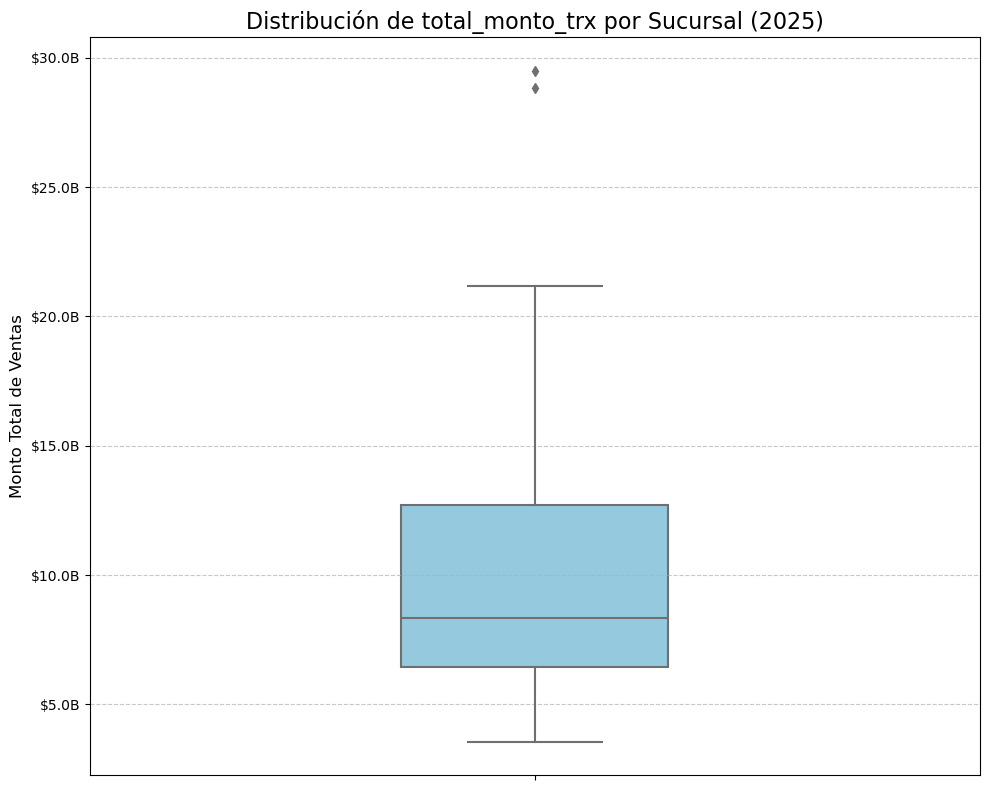

In [7]:
print("Iniciando el procesamiento de datos ventas para el modelo 2025...")

try:
    Ventas_2025 = pd.read_csv("Ventas_Sucursal_2025.csv")
    print("\nArchivo 'Ventas_Sucursal_2025.csv' cargado exitosamente.")
    print(f"Número de registros de ventas: {len(Ventas_2025)}")

    Detalle_sucursales = pd.read_excel("Detalle sucursales (1).xlsx")
    print("Archivo 'Detalle_Sucursal_1.xlsx' cargado exitosamente.")

    columna_id_ventas = 'sucursal'
    columna_id_detalle = 'Nº Suc.'
    
    print(f"\nRealizando la unión para obtener los nombres de sucursal...")

    Ventas_sucusal_2025 = pd.merge(
        left=Ventas_2025,
        right=Detalle_sucursales,
        left_on=columna_id_ventas,
        right_on=columna_id_detalle,
        how='left'
    )
    print("\n✅ Unión inicial completada.")

    # --- FASE DE LIMPIEZA Y ESTANDARIZACIÓN DE NOMBRES ---
    print("\nIniciando limpieza y estandarización de nombres de sucursales...")

    # 1. Eliminar filas sin nombre de sucursal ('nan')
    filas_nulas_antes = Ventas_sucusal_2025['Tienda'].isnull().sum()
    if filas_nulas_antes > 0:
        Ventas_sucusal_2025.dropna(subset=['Tienda'], inplace=True)
        print(f"- Se eliminaron {filas_nulas_antes} filas sin nombre de sucursal.")

    # 2. Unificar los Outlets con sus sucursales principales
    # Creamos un diccionario para mapear los nombres de los Outlets a los nombres estándar
    mapeo_outlets = {
        'Outlet La Serena': 'La Serena',
        'Outlet Puerto Montt Costanera': 'Costanera Pto Montt',
        'Outlet Puente': 'Puente',
        'Outlet Iquique': 'Iquique',
        'Outlet Parque Arauco': 'Parque Arauco'
    }

    # Usamos el método .replace() para aplicar el mapeo
    Ventas_sucusal_2025['Tienda'] = Ventas_sucusal_2025['Tienda'].replace(mapeo_outlets)
    print("- Se unificaron los nombres de las sucursales Outlet con sus tiendas principales.")
    
    # --- PASO ADICIONAL Y CRÍTICO: CONSOLIDACIÓN DE DATOS ---
    # Ahora que los nombres están unificados, agrupamos por nombre y sumamos los valores
    # para consolidar los datos de las tiendas principales con sus outlets.
    print("- Consolidando datos de ventas para sucursales unificadas...")
    
    # Identificar columnas numéricas para sumar (excluyendo IDs)
    columnas_a_sumar = ['total_monto_trx', 'total_transacciones'] # Ajusta si tus columnas se llaman diferente
    
    Ventas_sucusal_2025 = Ventas_sucusal_2025.groupby('Tienda')[columnas_a_sumar].sum().reset_index()




except FileNotFoundError as e:
    print(f"\n❌ ERROR: No se pudo encontrar el archivo '{e.filename}'.")
    print("Por favor, asegúrate de que ambos archivos estén en la misma carpeta que tu notebook.")
except KeyError as e:
    print(f"\n❌ ERROR: No se encontró la columna '{e.args[0]}'.")
    print("Por favor, revisa los nombres de las columnas en el código y en tus archivos.")

print("\n" + "="*80)
print("INICIANDO ANÁLISIS DESCRIPTIVO DE VENTAS 2025")
print("="*80)

try:
    # --- 1. Preparar el DataFrame ---
    variable_a_analizar = 'total_monto_trx'
    columna_sucursal = 'Tienda'

    # --- 2. Formato para visualización de columnas numéricas ---
    def format_numeric_columns_for_display_ventas(df_to_format):
        df_formatted = df_to_format.copy()
        if variable_a_analizar in df_formatted.columns:
            df_formatted[variable_a_analizar] = df_formatted[variable_a_analizar].apply(lambda x: f"${x:,.0f}")
        return df_formatted

    # --- 3. Estadísticas descriptivas ---
    print(f"\n--- Análisis Descriptivo de '{variable_a_analizar}' ---")
    desc_ventas = Ventas_sucusal_2025[variable_a_analizar].describe()
    print(f"Count: {desc_ventas['count']:.0f}")
    print(f"Mean: ${desc_ventas['mean']:,.0f}")
    print(f"Std: ${desc_ventas['std']:,.0f}")
    print(f"Min: ${desc_ventas['min']:,.0f}")
    print(f"25%: ${desc_ventas['25%']:,.0f}")
    print(f"50% (Median): ${desc_ventas['50%']:,.0f}")
    print(f"75%: ${desc_ventas['75%']:,.0f}")
    print(f"Max: ${desc_ventas['max']:,.0f}")

    print(f"\nTop 5 Sucursales por {variable_a_analizar}:")
    print(format_numeric_columns_for_display_ventas(Ventas_sucusal_2025.nlargest(5, variable_a_analizar)))

    print(f"\nBottom 5 Sucursales por {variable_a_analizar}:")
    print(format_numeric_columns_for_display_ventas(Ventas_sucusal_2025.nsmallest(5, variable_a_analizar)))

    # --- 4. Detección de Outliers ---
    print(f"\n--- Detección de Outliers ({variable_a_analizar}) ---")
    Q1_ventas = desc_ventas['25%']
    Q3_ventas = desc_ventas['75%']
    IQR_ventas = Q3_ventas - Q1_ventas
    lower_ventas = Q1_ventas - 1.5 * IQR_ventas
    upper_ventas = Q3_ventas + 1.5 * IQR_ventas
    outliers_ventas = Ventas_sucusal_2025[(Ventas_sucusal_2025[variable_a_analizar] < lower_ventas) | (Ventas_sucusal_2025[variable_a_analizar] > upper_ventas)]

    print(f"  Q1: ${Q1_ventas:,.2f}")
    print(f"  Q3: ${Q3_ventas:,.2f}")
    print(f"  IQR: ${IQR_ventas:,.2f}")
    print(f"  Límite Inferior: ${lower_ventas:,.2f}")
    print(f"  Límite Superior: ${upper_ventas:,.2f}")

    if not outliers_ventas.empty:
        print(f"  Outliers detectados ({len(outliers_ventas)}):")
        print(format_numeric_columns_for_display_ventas(outliers_ventas))
    else:
        print("  No se detectaron outliers.")

    # --- 5. Boxplot ---
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y=Ventas_sucusal_2025[variable_a_analizar], color='skyblue', width=0.3, ax=ax)
    
    # Formatear el eje Y para mostrar valores en miles de millones (ej. $10B)
    def format_billions(x, pos):
        return f'${x / 1e9:,.1f}B'
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_billions))
    
    ax.set_title(f'Distribución de {variable_a_analizar} por Sucursal (2025)', fontsize=16)
    ax.set_ylabel('Monto Total de Ventas', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except NameError:
    print("\n❌ ERROR: El DataFrame 'Ventas_sucusal_2025' no fue encontrado.")
    print("Por favor, asegúrate de haber ejecutado el código de carga y limpieza de datos antes de esta celda.")


##### Procedemos con el Analisis Descriptivo de Notas de Credito 

Iniciando el procesamiento de datos Notas de Credito para el modelo 2025...

Archivo 'Notas_Credito__Sucursal_2025.csv' cargado exitosamente.
Número de registros de ventas: 48

Realizando la unión para obtener los nombres de sucursal...

✅ Unión inicial completada.

Iniciando limpieza y estandarización de nombres de sucursales...
- Se eliminaron 2 filas sin nombre de sucursal.
- Se unificaron los nombres de las sucursales Outlet con sus tiendas principales.
- Consolidando datos de ventas para sucursales unificadas...

INICIANDO ANÁLISIS DESCRIPTIVO DE VENTAS 2025

--- Análisis Descriptivo de 'total_monto_trx' ---
Count: 42
Mean: $316,677,118
Std: $186,082,865
Min: $64,929,345
25%: $178,664,181
50% (Median): $261,494,068
75%: $427,148,816
Max: $825,562,038

Top 5 Sucursales por total_monto_trx:
              Tienda total_monto_trx  total_transacciones
6   Costanera Center    $825,562,038                14584
19     Parque Arauco    $780,554,108                12734
18     Marina Arauco 

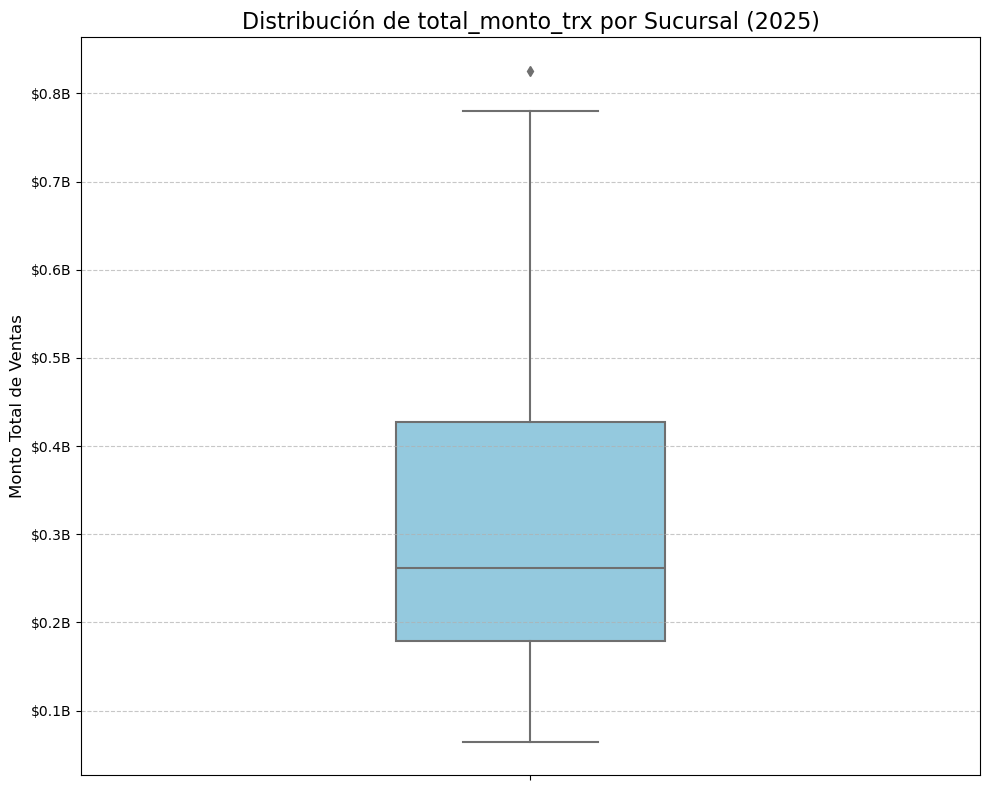

In [8]:
print("Iniciando el procesamiento de datos Notas de Credito para el modelo 2025...")

try:
    Notas_Credito_2025 = pd.read_csv("Notas_Credito__Sucursal_2025.csv")
    print("\nArchivo 'Notas_Credito__Sucursal_2025.csv' cargado exitosamente.")
    print(f"Número de registros de ventas: {len(Notas_Credito_2025)}")

    columna_id_NC = 'sucursal'    
    print(f"\nRealizando la unión para obtener los nombres de sucursal...")

    Notas_Credito_Sucursal_2025 = pd.merge(
        left=Notas_Credito_2025,
        right=Detalle_sucursales,
        left_on=columna_id_NC,
        right_on=columna_id_detalle,
        how='left'
    )
    print("\n✅ Unión inicial completada.")

    # --- FASE DE LIMPIEZA Y ESTANDARIZACIÓN DE NOMBRES ---
    print("\nIniciando limpieza y estandarización de nombres de sucursales...")

    # 1. Eliminar filas sin nombre de sucursal ('nan')
    filas_nulas_antes_NC = Notas_Credito_Sucursal_2025['Tienda'].isnull().sum()
    if filas_nulas_antes_NC > 0:
        Notas_Credito_Sucursal_2025.dropna(subset=['Tienda'], inplace=True)
        print(f"- Se eliminaron {filas_nulas_antes_NC} filas sin nombre de sucursal.")

    # 2. Unificar los Outlets con sus sucursales principales
    # Creamos un diccionario para mapear los nombres de los Outlets a los nombres estándar

    # Usamos el método .replace() para aplicar el mapeo
    Notas_Credito_Sucursal_2025['Tienda'] = Notas_Credito_Sucursal_2025['Tienda'].replace(mapeo_outlets)
    print("- Se unificaron los nombres de las sucursales Outlet con sus tiendas principales.")
    
    # --- PASO ADICIONAL Y CRÍTICO: CONSOLIDACIÓN DE DATOS ---
    # Ahora que los nombres están unificados, agrupamos por nombre y sumamos los valores
    # para consolidar los datos de las tiendas principales con sus outlets.
    print("- Consolidando datos de ventas para sucursales unificadas...")
    
    # Identificar columnas numéricas para sumar (excluyendo IDs)
    columnas_a_sumar = ['total_monto_trx', 'total_transacciones'] 
    
    Notas_Credito_Sucursal_2025 = Notas_Credito_Sucursal_2025.groupby('Tienda')[columnas_a_sumar].sum().reset_index()




except FileNotFoundError as e:
    print(f"\n❌ ERROR: No se pudo encontrar el archivo '{e.filename}'.")
    print("Por favor, asegúrate de que ambos archivos estén en la misma carpeta que tu notebook.")
except KeyError as e:
    print(f"\n❌ ERROR: No se encontró la columna '{e.args[0]}'.")
    print("Por favor, revisa los nombres de las columnas en el código y en tus archivos.")

print("\n" + "="*80)
print("INICIANDO ANÁLISIS DESCRIPTIVO DE VENTAS 2025")
print("="*80)

try:
    # --- 1. Preparar el DataFrame ---
    variable_a_analizar = 'total_monto_trx'
    columna_sucursal = 'Tienda'

    # --- 2. Formato para visualización de columnas numéricas ---
    def format_numeric_columns_for_display_ventas(df_to_format):
        df_formatted = df_to_format.copy()
        if variable_a_analizar in df_formatted.columns:
            df_formatted[variable_a_analizar] = df_formatted[variable_a_analizar].apply(lambda x: f"${x:,.0f}")
        return df_formatted

    # --- 3. Estadísticas descriptivas ---
    print(f"\n--- Análisis Descriptivo de '{variable_a_analizar}' ---")
    desc_NC = Notas_Credito_Sucursal_2025[variable_a_analizar].describe()
    print(f"Count: {desc_NC['count']:.0f}")
    print(f"Mean: ${desc_NC['mean']:,.0f}")
    print(f"Std: ${desc_NC['std']:,.0f}")
    print(f"Min: ${desc_NC['min']:,.0f}")
    print(f"25%: ${desc_NC['25%']:,.0f}")
    print(f"50% (Median): ${desc_NC['50%']:,.0f}")
    print(f"75%: ${desc_NC['75%']:,.0f}")
    print(f"Max: ${desc_NC['max']:,.0f}")

    print(f"\nTop 5 Sucursales por {variable_a_analizar}:")
    print(format_numeric_columns_for_display_ventas(Notas_Credito_Sucursal_2025.nlargest(5, variable_a_analizar)))

    print(f"\nBottom 5 Sucursales por {variable_a_analizar}:")
    print(format_numeric_columns_for_display_ventas(Notas_Credito_Sucursal_2025.nsmallest(5, variable_a_analizar)))

    # --- 4. Detección de Outliers ---
    print(f"\n--- Detección de Outliers ({variable_a_analizar}) ---")
    Q1_NC = desc_NC['25%']
    Q3_NC = desc_NC['75%']
    IQR_NC = Q3_NC - Q1_NC
    lower_NC = Q1_NC - 1.5 * IQR_NC
    upper_NC = Q3_NC + 1.5 * IQR_NC
    outliers_NC = Notas_Credito_Sucursal_2025[(Notas_Credito_Sucursal_2025[variable_a_analizar] < lower_NC) | (Notas_Credito_Sucursal_2025[variable_a_analizar] > upper_NC)]

    print(f"  Q1: ${Q1_NC:,.2f}")
    print(f"  Q3: ${Q3_NC:,.2f}")
    print(f"  IQR: ${IQR_NC:,.2f}")
    print(f"  Límite Inferior: ${lower_NC:,.2f}")
    print(f"  Límite Superior: ${upper_NC:,.2f}")

    if not outliers_NC.empty:
        print(f"  Outliers detectados ({len(outliers_NC)}):")
        print(format_numeric_columns_for_display_ventas(outliers_NC))
    else:
        print("  No se detectaron outliers.")

    # --- 5. Boxplot ---
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y = Notas_Credito_Sucursal_2025[variable_a_analizar], color='skyblue', width=0.3, ax=ax)
    
    # Formatear el eje Y para mostrar valores en miles de millones (ej. $10B)
    def format_billions(x, pos):
        return f'${x / 1e9:,.1f}B'
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_billions))
    
    ax.set_title(f'Distribución de {variable_a_analizar} por Sucursal (2025)', fontsize=16)
    ax.set_ylabel('Monto Total de Ventas', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except NameError:
    print("\n❌ ERROR: El DataFrame 'Ventas_sucusal_2025' no fue encontrado.")
    print("Por favor, asegúrate de haber ejecutado el código de carga y limpieza de datos antes de esta celda.")


##### Procedemos con el Analisis Descriptivo de Reclamos


INICIANDO PROCESAMIENTO DE DATOS DE RECLAMOS 2025
Archivo de reclamos cargado con 1670 registros totales.
Se filtraron 470 reclamos correspondientes al año 2025.
Se agruparon los reclamos para 46 sucursales con registros.

INICIANDO ANÁLISIS DESCRIPTIVO DE RECLAMOS 2025

--- Análisis Descriptivo de 'Reclamos_Cantidad_2025' ---
Count: 42
Mean: 10.98
Std: 10.41
Min: 1
25%: 4
50% (Median): 8
75%: 14
Max: 42

Top 5 Sucursales por Reclamos_Cantidad_2025:
   Nombre_Oficial_Match Reclamos_Cantidad_2025
39           Valparaíso                     42
40        Vivo Rancagua                     40
26          Plaza Oeste                     37
19        Parque Arauco                     30
36                Talca                     21

Bottom 5 Sucursales por Reclamos_Cantidad_2025:
   Nombre_Oficial_Match Reclamos_Cantidad_2025
14            Los Andes                      1
21         Plaza Calama                      1
33         Punta Arenas                      1
3             Castellón   

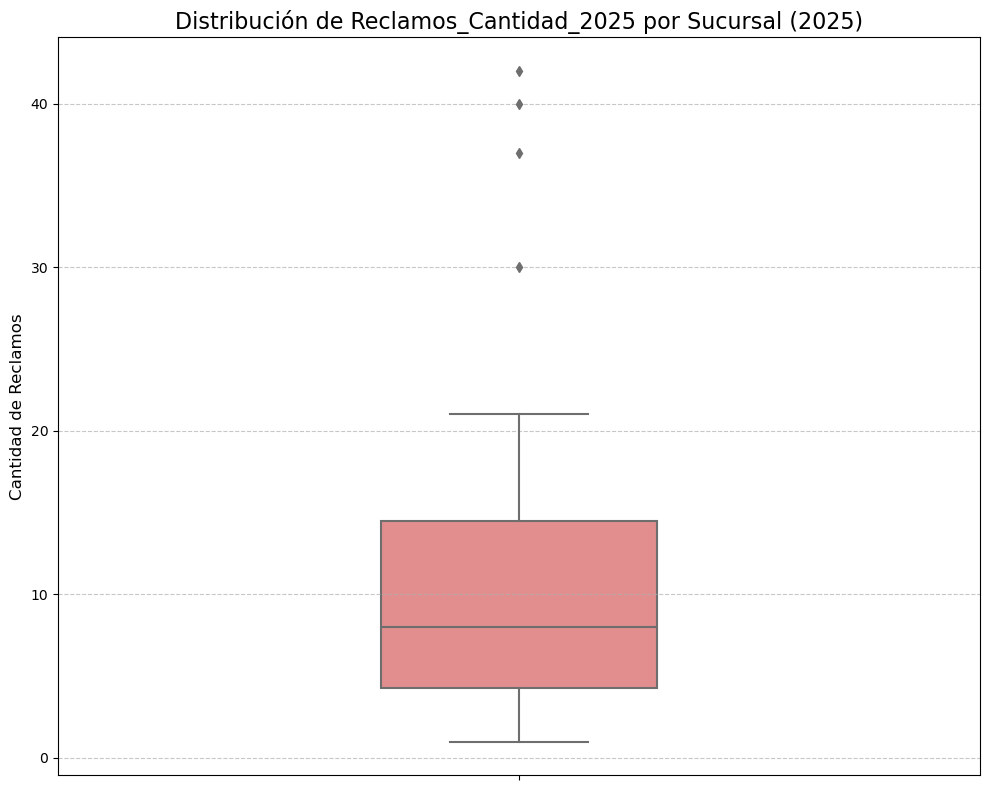

In [9]:
# --- PROCESAMIENTO DE DATOS DE RECLAMOS 2025 ---

print("\n" + "="*80)
print("INICIANDO PROCESAMIENTO DE DATOS DE RECLAMOS 2025")
print("="*80)

# --- Cargamos los datos de Reclamos que nos entregaron que contienen los tickets de Reclamos de 2024 y 2025 ---

Reclamos_Tienda = pd.read_excel("Reclamos-Mala-Atencion-Tienda-2024-2025 (original).xlsx")
print(f"Archivo de reclamos cargado con {len(Reclamos_Tienda)} registros totales.")

# --- Realizamos un filtro para solo quedarnos con el año 2025 y eliminar los valores nulos para comenzar con los Match ---

Reclamos_2025 = Reclamos_Tienda[Reclamos_Tienda['Año'] == 2025].copy()
Reclamos_2025 = Reclamos_2025.dropna(subset=["Tienda"]).reset_index(drop=True)
print(f"Se filtraron {len(Reclamos_2025)} reclamos correspondientes al año 2025.")

# --- Agrupamos los Tickets Reclamos por sucursal para conseguir los Reclamos por Sucursal del año 2025 ---

Reclamos_Sucursal_2025 = Reclamos_2025.groupby('Tienda').agg(
    Reclamos_Cantidad_2025=('Ticket', 'count')
    ).reset_index()
Reclamos_Sucursal_2025 = Reclamos_Sucursal_2025.rename(columns={'Tienda': 'Nombre_Sucursal'})
print(f"Se agruparon los reclamos para {len(Reclamos_Sucursal_2025)} sucursales con registros.")

# =========================
# 🔤 Aplicamos una FUNCIÓN PARA NORMALIZAR el nombre de sucursales (Solo eliminamos los tildes) para un mejor trabajo
# =========================
def eliminar_tildes(texto):
    texto = str(texto)
    return ''.join(
        c for c in unicodedata.normalize('NFD', texto)
        if unicodedata.category(c) != 'Mn'
    ).strip()

# =========================
# 🔍 CREAR DICCIONARIO DE NOMBRES OFICIALES NORMALIZADOS y utilizamos la funcion para encontrar el mejor Macth combinado con el excel Detalle Sucursal (1) que tiene los nombres oficiales
# =========================
nombres_oficiales = Detalle_sucursales["Tienda"].dropna().unique().tolist()
nombres_oficiales_normalizados = {
    eliminar_tildes(nombre): nombre for nombre in nombres_oficiales
}

def encontrar_nombre_oficial_mejorado(nombre_original, lista_dict, umbral=85):
    nombre_norm = eliminar_tildes(nombre_original)
    mejor_match, score = process.extractOne(nombre_norm, list(lista_dict.keys()))
    if score >= umbral:
        return lista_dict[mejor_match]
    else:
        return None
# 🔍 Aplicamos la Funcion para encontrar el mejor Macth posible para tener un listado de Nombres Sucursales lo mas similar posible
Reclamos_Sucursal_2025["Nombre_Oficial_Match"] = Reclamos_Sucursal_2025["Nombre_Sucursal"].apply(
    lambda x: encontrar_nombre_oficial_mejorado(x, nombres_oficiales_normalizados)
)

# 🔍 Debemos realizar algunas correcciones de forma manual dado que algunos nombres son dificiles de encontrar el Match correspondiente y las aplicamos

correcciones_manuales = {
    "Concepcion 2": "Castellón",
    "Huechuraba": "Plaza Norte",
    "Puerto Montt Costanera": "Costanera Pto Montt",
    "San Bernardo": "Plaza Sur",
}

Reclamos_Sucursal_2025["Nombre_Oficial_Match"] = Reclamos_Sucursal_2025.apply(
    lambda row: correcciones_manuales.get(row["Nombre_Sucursal"], row["Nombre_Oficial_Match"]),
    axis=1
)
# Eliminamos los Valores nulos (dado que corresponde a sucursal Alto Las Condes) y Concepcion 1 que corresponde a sucursal Barros Arana
Reclamos_Sucursal_2025 = Reclamos_Sucursal_2025[Reclamos_Sucursal_2025["Nombre_Oficial_Match"].notnull()].copy()
Reclamos_Sucursal_2025 = Reclamos_Sucursal_2025[Reclamos_Sucursal_2025["Nombre_Sucursal"] != "Concepcion 1"]

# =========================
# 📊 AGRUPAR RECLAMOS POR SUCURSAL OFICIAL para eliminar problema de repeticion de Sucursales Valparaíso y Puerto Montt
# =========================
Reclamos_Sucursal_2025 = Reclamos_Sucursal_2025.groupby("Nombre_Oficial_Match", as_index=False).agg({
    "Reclamos_Cantidad_2025": "sum"
})


print("\n" + "="*80)
print("INICIANDO ANÁLISIS DESCRIPTIVO DE RECLAMOS 2025")
print("="*80)

try:
    # --- 1. Preparar el DataFrame ---
    variable_reclamos = 'Reclamos_Cantidad_2025'
    columna_sucursal = 'Nombre_Oficial_Match'

    # --- 2. Formato para visualización de columnas numéricas ---
    def format_numeric_columns_for_display_reclamos(df_to_format):
        df_formatted = df_to_format.copy()
        if variable_reclamos in df_formatted.columns:
            df_formatted[variable_reclamos] = df_formatted[variable_reclamos].apply(lambda x: f"{x:,}")
        return df_formatted

    # --- 3. Estadísticas descriptivas ---
    print(f"\n--- Análisis Descriptivo de '{variable_reclamos}' ---")
    desc_reclamos = Reclamos_Sucursal_2025[variable_reclamos].describe()
    print(f"Count: {desc_reclamos['count']:.0f}")
    print(f"Mean: {desc_reclamos['mean']:,.2f}")
    print(f"Std: {desc_reclamos['std']:,.2f}")
    print(f"Min: {desc_reclamos['min']:,.0f}")
    print(f"25%: {desc_reclamos['25%']:,.0f}")
    print(f"50% (Median): {desc_reclamos['50%']:,.0f}")
    print(f"75%: {desc_reclamos['75%']:,.0f}")
    print(f"Max: {desc_reclamos['max']:,.0f}")

    print(f"\nTop 5 Sucursales por {variable_reclamos}:")
    print(format_numeric_columns_for_display_reclamos(Reclamos_Sucursal_2025.nlargest(5, variable_reclamos)))

    print(f"\nBottom 5 Sucursales por {variable_reclamos}:")
    print(format_numeric_columns_for_display_reclamos(Reclamos_Sucursal_2025.nsmallest(5, variable_reclamos)))

    # --- 4. Detección de Outliers ---
    print(f"\n--- Detección de Outliers ({variable_reclamos}) ---")
    Q1_reclamos = desc_reclamos['25%']
    Q3_reclamos = desc_reclamos['75%']
    IQR_reclamos = Q3_reclamos - Q1_reclamos
    lower_bound_reclamos = Q1_reclamos - 1.5 * IQR_reclamos
    upper_bound_reclamos = Q3_reclamos + 1.5 * IQR_reclamos
    outliers_reclamos = Reclamos_Sucursal_2025[
        (Reclamos_Sucursal_2025[variable_reclamos] < lower_bound_reclamos) |
        (Reclamos_Sucursal_2025[variable_reclamos] > upper_bound_reclamos)
    ]

    print(f"  Q1: {Q1_reclamos:,.2f}")
    print(f"  Q3: {Q3_reclamos:,.2f}")
    print(f"  IQR: {IQR_reclamos:,.2f}")
    print(f"  Límite Inferior: {lower_bound_reclamos:,.2f}")
    print(f"  Límite Superior: {upper_bound_reclamos:,.2f}")

    if not outliers_reclamos.empty:
        print(f"  Outliers detectados ({len(outliers_reclamos)}):")
        print(format_numeric_columns_for_display_reclamos(outliers_reclamos))
    else:
        print("  No se detectaron outliers.")

    # --- 5. Boxplot ---
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y=Reclamos_Sucursal_2025[variable_reclamos], color='lightcoral', width=0.3, ax=ax)

    ax.set_title(f'Distribución de {variable_reclamos} por Sucursal (2025)', fontsize=16)
    ax.set_ylabel('Cantidad de Reclamos', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except NameError:
    print("\n❌ ERROR: El DataFrame 'Reclamos_Sucursal_2025' no fue encontrado.")
    print("Por favor, asegúrate de haber ejecutado el código de carga y limpieza de datos antes de esta celda.")





##### Vamos con el analisis descriptivo de Merma de Inventario


INICIANDO PROCESAMIENTO DE DATOS DE MERMA DE INVENTARIO 2025
El archivo contiene 42 registros para las 42 sucursales.
Se seleccionaron y renombraron las columnas de interés.

PROCESO COMPLETADO
El DataFrame final de Merma de Inventario contiene 42 sucursales.

--- Vista Previa del Resultado Final (Merma de Inventario 2025) ---
  Nombre_Sucursal  Desviacion_Meta_Merma
0     Antofagasta                 0.0037
1    Arauco Maipú                -0.0001
2           Arica                 0.0007
3       Castellón                -0.0031
4         Chillán                 0.0006

--- Sucursales con Peor Desempeño (Mayor Desviación Negativa) ---
Nombre_Sucursal  Desviacion_Meta_Merma
 Plaza Vespucio                -0.0055
  Plaza Alameda                -0.0055
    Plaza Norte                -0.0052
    Plaza Egaña                -0.0042
      Castellón                -0.0031

INICIANDO ANÁLISIS DESCRIPTIVO DE 'Desviacion_Meta_Merma'

--- Análisis Descriptivo de 'Desviacion_Meta_Merma' ---
Count: 

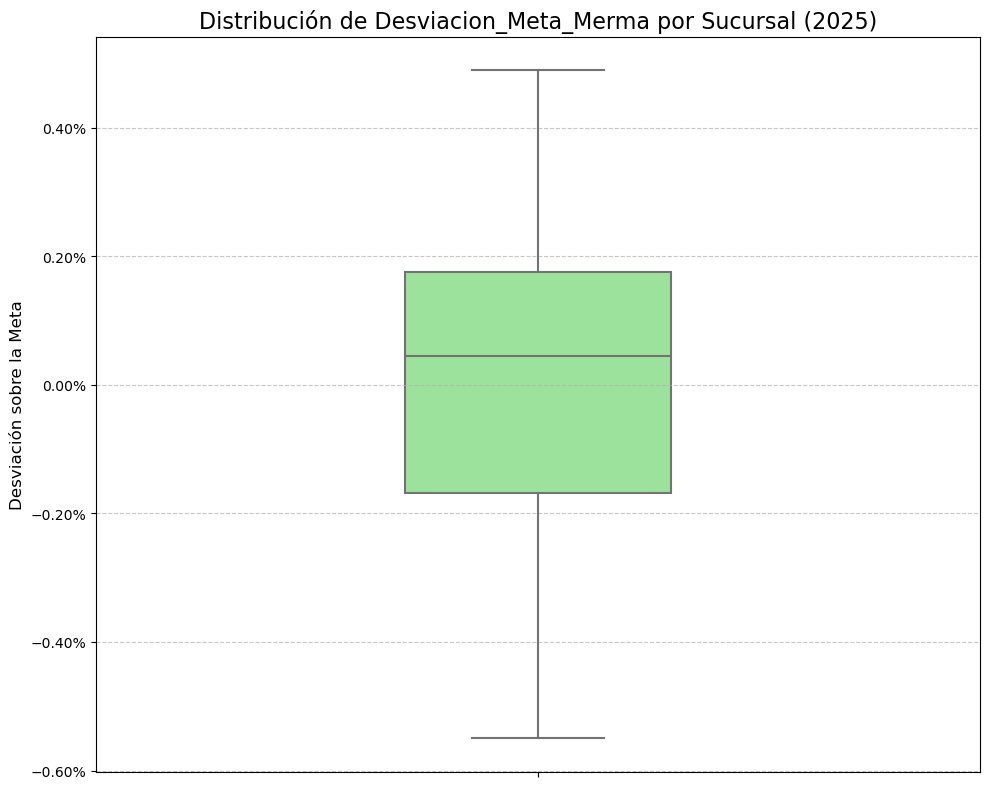

In [10]:
# --- PROCESAMIENTO DE DATOS DE MERMA DE INVENTARIO 2025 (VERSIÓN CORREGIDA) ---

print("\n" + "="*80)
print("INICIANDO PROCESAMIENTO DE DATOS DE MERMA DE INVENTARIO 2025")
print("="*80)

try:

    Merma_inventario_2025  = pd.read_excel("Indice_Meta_Merma_Inventario_2024.xlsx", sheet_name="2025")
    Merma_inventario_2025 = Merma_inventario_2025.dropna(subset=['Desviacion_Meta_Merma'])
    print(f"El archivo contiene {len(Merma_inventario_2025)} registros para las 42 sucursales.")

    # --- 2. Seleccionar y Renombrar las Columnas Clave ---
    # Nos quedamos solo con las columnas que necesitamos para el modelo.
    # La variable clave es 'Desviacion_Meta_Merma'.
    Desviacion_Meta_Merma_2025 = Merma_inventario_2025[['Tienda', 'Desviacion_Meta_Merma']].copy()
    
    # Renombramos la columna 'Tienda' para que sea consistente con los otros DataFrames
    Desviacion_Meta_Merma_2025 = Desviacion_Meta_Merma_2025.rename(columns={'Tienda': 'Nombre_Sucursal'})
    print("Se seleccionaron y renombraron las columnas de interés.")

    # --- Verificación Final ---
    # Como el archivo ya tiene las 42 sucursales limpias, no se necesita ningún merge.
    print("\n" + "="*80)
    print("PROCESO COMPLETADO")
    print("="*80)
    print(f"El DataFrame final de Merma de Inventario contiene {len(Desviacion_Meta_Merma_2025)} sucursales.")
    print("\n--- Vista Previa del Resultado Final (Merma de Inventario 2025) ---")
    print(Desviacion_Meta_Merma_2025.head().to_string())
    print("\n--- Sucursales con Peor Desempeño (Mayor Desviación Negativa) ---")
    print(Desviacion_Meta_Merma_2025.nsmallest(5, 'Desviacion_Meta_Merma').to_string(index=False))

except FileNotFoundError:
    print(f"\n❌ ERROR: No se pudo encontrar el archivo '{Merma_inventario_2025}'.")
    print("Por favor, asegúrate de que el archivo esté en la misma carpeta que tu notebook.")
except ValueError as e:
    # Este error ocurre si la hoja "2025" no existe en el archivo
    print(f"\n❌ ERROR: {e}")
    print(f"Asegúrate de que el archivo de Excel contenga una hoja llamada exactamente '2025'.")
except KeyError as e:
    print(f"\n❌ ERROR: No se encontró la columna '{e.args[0]}'.")
    print("Por favor, revisa que los nombres de las columnas en el código ('Tienda', 'Desviacion_Meta_Merma')")
    print("coincidan exactamente con los de tu archivo de Excel.")

# --- ANÁLISIS DESCRIPTIVO DE 'Desviacion_Meta_Merma' ---
# Este código asume que ya ejecutaste el bloque anterior y tienes
# el DataFrame 'Desviacion_Meta_Merma_2025' cargado en memoria.

print("\n" + "="*80)
print("INICIANDO ANÁLISIS DESCRIPTIVO DE 'Desviacion_Meta_Merma'")
print("="*80)

try:
    # La variable que vamos a analizar
    variable_a_analizar = 'Desviacion_Meta_Merma'
    
    # --- Formato para visualización ---
    def format_as_percentage(df_to_format):
        df_formatted = df_to_format.copy()
        if variable_a_analizar in df_formatted.columns:
            df_formatted[variable_a_analizar] = df_formatted[variable_a_analizar].apply(lambda x: f"{x:.2%}")
        return df_formatted

    # --- Estadísticas descriptivas ---
    # Usamos el DataFrame 'Desviacion_Meta_Merma_2025' que creaste
    desc_merma = Desviacion_Meta_Merma_2025[variable_a_analizar].describe()
    
    print(f"\n--- Análisis Descriptivo de '{variable_a_analizar}' ---")
    print(f"Count: {desc_merma['count']:.0f}")
    print(f"Mean: {desc_merma['mean']:.5%}")
    print(f"Std: {desc_merma['std']:.2%}")
    print(f"Min: {desc_merma['min']:.2%}")
    print(f"25%: {desc_merma['25%']:.2%}")
    print(f"50% (Median): {desc_merma['50%']:.2%}")
    print(f"75%: {desc_merma['75%']:.2%}")
    print(f"Max: {desc_merma['max']:.2%}")

    print("\nTop 5 Sucursales (Mejor Desempeño vs Meta):")
    print(format_as_percentage(Desviacion_Meta_Merma_2025.nlargest(5, variable_a_analizar)))

    print("\nBottom 5 Sucursales (Peor Desempeño vs Meta):")
    print(format_as_percentage(Desviacion_Meta_Merma_2025.nsmallest(5, variable_a_analizar)))

    # --- Detección de Outliers ---
    print(f"\n--- Detección de Outliers ({variable_a_analizar}) ---")
    Q1 = desc_merma['25%']
    Q3 = desc_merma['75%']
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = Desviacion_Meta_Merma_2025[(Desviacion_Meta_Merma_2025[variable_a_analizar] < lower) | (Desviacion_Meta_Merma_2025[variable_a_analizar] > upper)]

    print(f"  Q1: {Q1:.2%}")
    print(f"  Q3: {Q3:.2%}")
    print(f"  IQR: {IQR:.2%}")
    print(f"  Límite Inferior: {lower:.2%}")
    print(f"  Límite Superior: {upper:.2%}")

    if not outliers.empty:
        print(f"  Outliers detectados ({len(outliers)}):")
        print(format_as_percentage(outliers))
    else:
        print("  No se detectaron outliers.")

    # --- Boxplot ---
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y=Desviacion_Meta_Merma_2025[variable_a_analizar], color='lightgreen', width=0.3, ax=ax)
    ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0))
    ax.set_title(f'Distribución de {variable_a_analizar} por Sucursal (2025)', fontsize=16)
    ax.set_ylabel('Desviación sobre la Meta', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except NameError:
    print("\n❌ ERROR: El DataFrame 'Desviacion_Meta_Merma_2025' no fue encontrado.")
    print("Por favor, asegúrate de haber ejecutado el código de carga de datos de merma antes de esta celda.")




##### Procedamos con el analisis descriptivo del numero de Accidentes


INICIANDO ANÁLISIS DESCRIPTIVO DE 'N° Accidentes' PARA 2025
Archivo '                         Tienda  N° Accidentes
0                   Antofagasta           16.0
1                  Arauco Maipú           40.0
2                         Arica            8.0
3                     Castellón            8.0
4                       Chillán           10.0
5                      Coquimbo           14.0
6              Costanera Center           25.0
7           Costanera Pto Montt           37.0
8                       Crillón           21.0
9                     El Trébol           46.0
10               Florida Center           13.0
11                      Iquique           12.0
12                    La Calera           14.0
13                    La Serena           20.0
14                    Los Andes           13.0
15                Los Dominicos            7.0
16              Mall Concepción           24.0
17                  Mall Curicó           17.0
18                Marina Arauco      

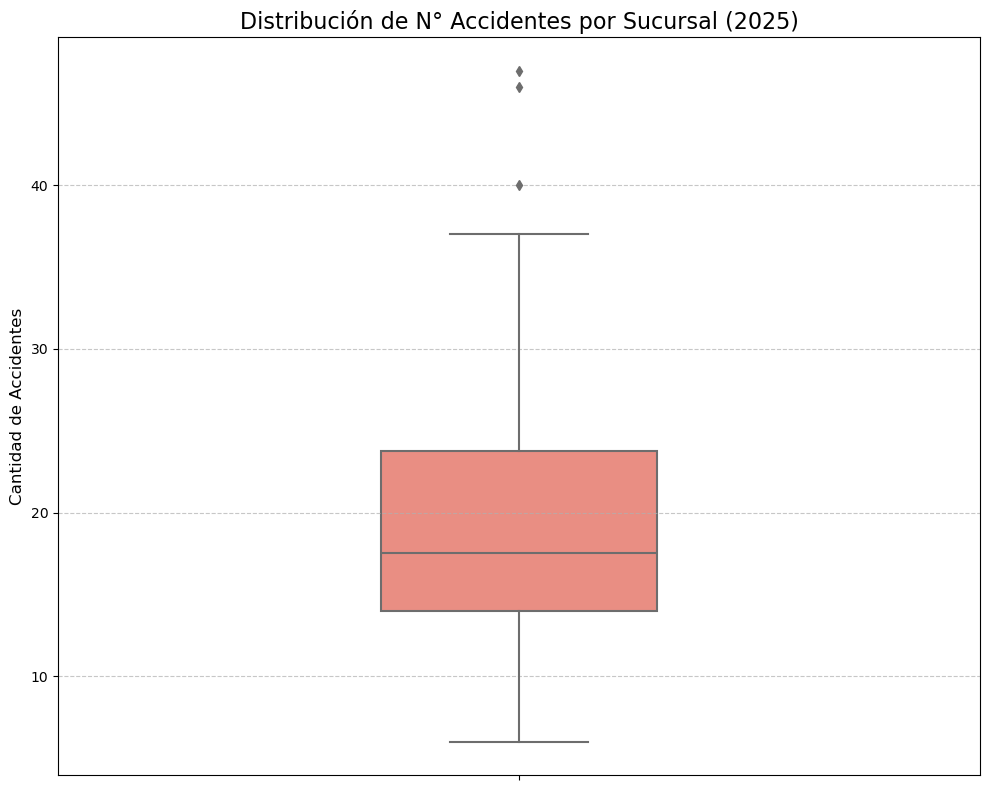

In [11]:
# --- ANÁLISIS DESCRIPTIVO DE 'N° Accidentes' 2025 ---

print("\n" + "="*80)
print("INICIANDO ANÁLISIS DESCRIPTIVO DE 'N° Accidentes' PARA 2025")
print("="*80)

try:
    Accidentes_2025 = pd.read_excel("Accidentes_Sucursal_2024.xlsx", sheet_name="2025")

    # Convertimos la columna a tipo numérico para asegurar los cálculos
    Accidentes_2025['N° Accidentes'] = pd.to_numeric(Accidentes_2025['N° Accidentes'])
    Accidentes_2025 = Accidentes_2025.dropna(subset=['N° Accidentes'])

    print(f"Archivo '{Accidentes_2025}' cargado exitosamente.")
    print(f"El archivo contiene {len(Accidentes_2025)} registros para el análisis.")
    variable_a_analizar = 'N° Accidentes'    
    # --- Formato para visualización ---
    def format_as_integer(df_to_format):
        df_formatted = df_to_format.copy()
        if variable_a_analizar in df_formatted.columns:
            df_formatted[variable_a_analizar] = df_formatted[variable_a_analizar].apply(lambda x: f"{x:,.0f}")
        return df_formatted

    # --- 3. Estadísticas descriptivas ---
    desc_accidentes = Accidentes_2025[variable_a_analizar].describe()
    
    print(f"\n--- Análisis Descriptivo de '{variable_a_analizar}' ---")
    print(f"Count: {desc_accidentes['count']:.0f}")
    print(f"Mean: {desc_accidentes['mean']:.1f}")
    print(f"Std: {desc_accidentes['std']:.1f}")
    print(f"Min: {desc_accidentes['min']:.0f}")
    print(f"25%: {desc_accidentes['25%']:.0f}")
    print(f"50% (Median): {desc_accidentes['50%']:.0f}")
    print(f"75%: {desc_accidentes['75%']:.0f}")
    print(f"Max: {desc_accidentes['max']:.0f}")

    print("\nTop 5 Sucursales (Mayor N° de Accidentes):")
    print(format_as_integer(Accidentes_2025.nlargest(5, variable_a_analizar)))

    print("\nBottom 5 Sucursales (Menor N° de Accidentes):")
    print(format_as_integer(Accidentes_2025.nsmallest(5, variable_a_analizar)))

    # --- 4. Detección de Outliers ---
    print(f"\n--- Detección de Outliers ({variable_a_analizar}) ---")
    Q1 = desc_accidentes['25%']
    Q3 = desc_accidentes['75%']
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = Accidentes_2025[(Accidentes_2025[variable_a_analizar] < lower) | (Accidentes_2025[variable_a_analizar] > upper)]

    print(f"  Q1: {Q1:.1f}")
    print(f"  Q3: {Q3:.1f}")
    print(f"  IQR: {IQR:.1f}")
    print(f"  Límite Inferior: {lower:.1f}")
    print(f"  Límite Superior: {upper:.1f}")

    if not outliers.empty:
        print(f"  Outliers detectados ({len(outliers)}):")
        print(format_as_integer(outliers))
    else:
        print("  No se detectaron outliers.")

    # --- 5. Boxplot ---
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y=Accidentes_2025[variable_a_analizar], color='salmon', width=0.3, ax=ax)
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
    ax.set_title(f'Distribución de {variable_a_analizar} por Sucursal (2025)', fontsize=16)
    ax.set_ylabel('Cantidad de Accidentes', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"\n❌ ERROR: No se pudo encontrar el archivo '{Accidentes_2025}'.")
    print("Por favor, asegúrate de que el archivo esté en la misma carpeta que tu notebook.")
except KeyError as e:
    print(f"\n❌ ERROR: No se encontró la columna '{e.args[0]}'.")
    print("Por favor, revisa que los nombres de las columnas en el código ('Tienda', 'N° Accidentes')")
    print("coincidan exactamente con los de tu archivo de Excel.")


##### Realizamos el Analisis Descriptivo por Productos Dañados 


INICIANDO ANÁLISIS DE DESCUENTO POR PRODUCTOS DAÑADOS 2025
Archivo APRE 2025 cargado con 22616 registros.

Limpiando la columna 'Código Sucursal' para extraer solo el ID numérico...

Se agruparon los descuentos para 43 códigos de sucursal.
Se unificaron los nombres de tienda y se consolidaron los datos.

--- Análisis Descriptivo de 'Productos_Dañados_Descuento' ---
Count: 42
Mean: $17,157,834
Std: $17,012,211
Min: $19,990
25%: $3,090,755
50% (Median): $12,757,580
75%: $24,213,755
Max: $72,982,616

Top 5 Sucursales por Productos_Dañados_Descuento:
             Tienda  Productos_Dañados_Descuento
      Marina Arauco                     72982616
        Antofagasta                     56665208
   Costanera Center                     53786474
Costanera Pto Montt                     42253286
            Quilpué                     36586613

Bottom 5 Sucursales por Productos_Dañados_Descuento:
      Tienda  Productos_Dañados_Descuento
San Fernando                        19990
 Plaza Oeste  

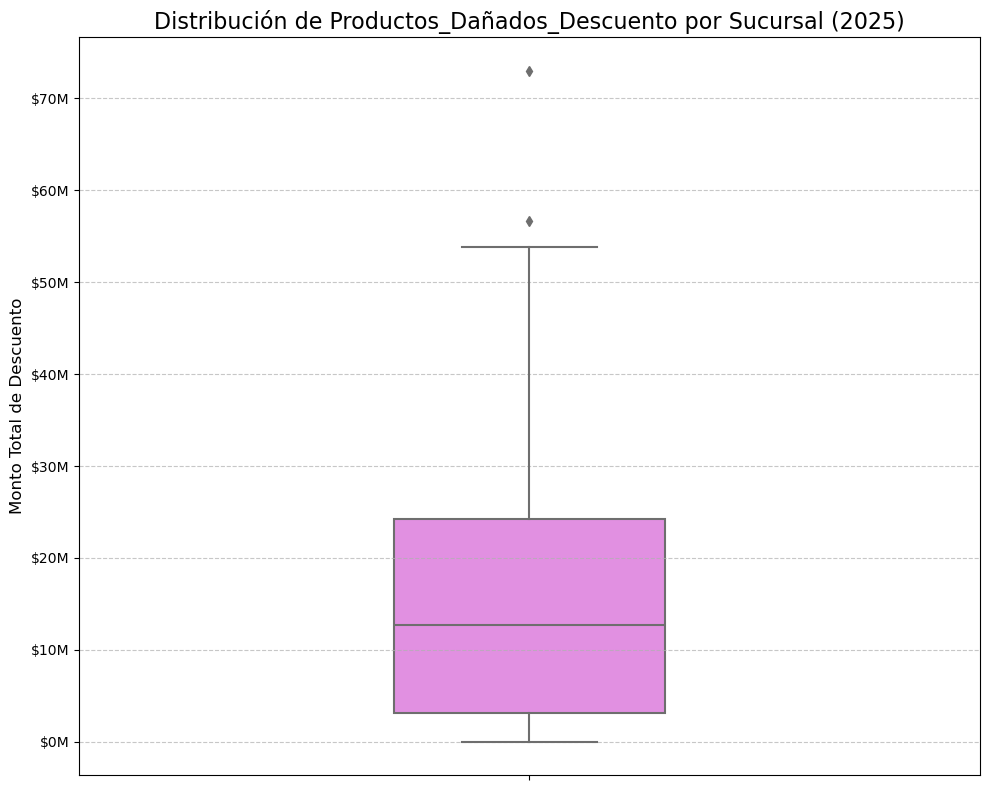

In [12]:
# --- ANÁLISIS DESCRIPTIVO DE DESCUENTO POR PRODUCTOS DAÑADOS 2025 ---

print("\n" + "="*80)
print("INICIANDO ANÁLISIS DE DESCUENTO POR PRODUCTOS DAÑADOS 2025")
print("="*80)
# Cargar el archivo con los datos de Productos Dañados de 2025
try:
    Productos_Dañados_2025 = pd.read_excel("APRE 2025.xlsx", sheet_name= "Reporte_Ventas (37)")
    print(f"Archivo APRE 2025 cargado con {len(Productos_Dañados_2025)} registros.")

    # --- Para esta base de datos, dado como esta escrito Codigo Sucursal debemos hacer una limpieza de la columna para obtener los nombres de las sucursales ---
    columna_codigo_sucursal = 'Código Sucursal'
    print(f"\nLimpiando la columna '{columna_codigo_sucursal}' para extraer solo el ID numérico...")
    Productos_Dañados_2025['Numero_Sucursal'] = Productos_Dañados_2025['Código Sucursal'].astype(str).str.extract(r'^(\d+)') 

    # --- Convertimos la columna que creamos a tipo numérico para asegurar los cálculos ---    
    Productos_Dañados_2025['Numero_Sucursal'] = pd.to_numeric(Productos_Dañados_2025['Numero_Sucursal'], errors='coerce')
    Productos_Dañados_2025['Numero_Sucursal'] = Productos_Dañados_2025['Numero_Sucursal'].astype(int)

    # --- Realizamos la agrupacion por sucursal para determinar la cantidad de descuento por productos dañados por Sucursal ---
    Descuento_Productos_Dañados_2025 = Productos_Dañados_2025.groupby('Numero_Sucursal').agg(
        Productos_Dañados_Descuento=('Descto', 'sum')
    ).reset_index()
    print(f"\nSe agruparon los descuentos para {len(Descuento_Productos_Dañados_2025)} códigos de sucursal.")

    # --- Realizamos la union con el excel Detalle Sucursales (1) para que nos entregue el nombre de las sucursales ---
    Descuento_Productos_Dañados_2025 = pd.merge(
    left=Descuento_Productos_Dañados_2025,
    right=Detalle_sucursales,
    left_on='Numero_Sucursal', 
    right_on='Nº Suc.',
    how='left'
    )
    # --- Realizamos una agrupacion para trabajar con las columnas necesarias ---
    Descuento_Productos_Dañados_2025 = Descuento_Productos_Dañados_2025.groupby('Tienda')['Productos_Dañados_Descuento'].sum().reset_index()
    print("Se unificaron los nombres de tienda y se consolidaron los datos.")

   # --- 5. Análisis Descriptivo ---
    Variable_Productos_Dañados_Descuento = 'Productos_Dañados_Descuento'
    
    # Estadísticas, Rankings, Outliers y Boxplot... (código de análisis descriptivo)
    desc_danados = Descuento_Productos_Dañados_2025["Productos_Dañados_Descuento"].describe()
    print(f"\n--- Análisis Descriptivo de '{Variable_Productos_Dañados_Descuento}' ---")
    print(f"Count: {desc_danados['count']:.0f}")
    print(f"Mean: ${desc_danados['mean']:,.0f}")
    print(f"Std: ${desc_danados['std']:,.0f}")
    print(f"Min: ${desc_danados['min']:,.0f}")
    print(f"25%: ${desc_danados['25%']:,.0f}")
    print(f"50% (Median): ${desc_danados['50%']:,.0f}")
    print(f"75%: ${desc_danados['75%']:,.0f}")
    print(f"Max: ${desc_danados['max']:,.0f}")
    
    print(f"\nTop 5 Sucursales por {Variable_Productos_Dañados_Descuento}:")
    print(Descuento_Productos_Dañados_2025.nlargest(5, Variable_Productos_Dañados_Descuento).to_string(index=False))
    
    print(f"\nBottom 5 Sucursales por {Variable_Productos_Dañados_Descuento}:")
    print(Descuento_Productos_Dañados_2025.nsmallest(5, Variable_Productos_Dañados_Descuento).to_string(index=False))
    
    Q1_descuento = desc_danados['25%']
    Q3_descuento = desc_danados['75%']
    IQR_descuento = Q3_descuento - Q1_descuento
    outliers_descuento = Descuento_Productos_Dañados_2025[
        (Descuento_Productos_Dañados_2025[Variable_Productos_Dañados_Descuento] < (Q1_descuento - 1.5 * IQR_descuento)) |
        (Descuento_Productos_Dañados_2025[Variable_Productos_Dañados_Descuento] > (Q3_descuento + 1.5 * IQR_descuento))
    ]
    print(f"\n--- Detección de Outliers ({Variable_Productos_Dañados_Descuento}) ---")
    if not outliers_descuento.empty:
        print(f"  Outliers detectados ({len(outliers_descuento)}):")
        print(outliers_descuento.to_string(index=False))
    else:
        print("  No se detectaron outliers.")
    
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y=Descuento_Productos_Dañados_2025[Variable_Productos_Dañados_Descuento], color='violet', width=0.3, ax=ax)
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'${x/1e6:,.0f}M'))
    ax.set_title(f'Distribución de {Variable_Productos_Dañados_Descuento} por Sucursal (2025)', fontsize=16)
    ax.set_ylabel('Monto Total de Descuento', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(f"\n❌ ERROR: No se pudo encontrar el archivo '{e.filename}'.")
except KeyError as e:
    print(f"\n❌ ERROR: No se encontró la columna '{e.args[0]}'. Revisa los nombres en el código.")


##### Realizamos el Analisis Descriptivo para la Merma de Destruccion del año 2025



INICIANDO ANÁLISIS DE MERMA POR DESTRUCCIÓN 2025


/opt/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



Archivo de Merma por Destrucción 2025 cargado con 73517 registros.

Limpiando la columna Sucursal para extraer el ID correcto...
Limpieza de IDs completada.

Se agruparon los datos de merma para 47 sucursales.
Se unificaron los nombres de tienda y se consolidaron los datos.

--- Análisis Descriptivo de 'Merma_Destruccion_Costo' ---
Count: 42
Mean: $-25,421,924
Std: $14,619,597
Min: $-72,181,860
25%: $-32,459,070
50% (Median): $-21,657,863
75%: $-15,884,468
Max: $-4,110,547

Top 5 Sucursales por Merma_Destruccion_Costo:
   Nombre_Sucursal Merma_Destruccion_Costo  Merma_Destruccion_Unidades
20   Plaza Alameda             $-4,110,547                      -464.0
2            Arica             $-4,336,070                      -664.0
15   Los Dominicos             $-6,721,316                      -743.0
5         Coquimbo             $-8,896,266                     -1169.0
35    San Fernando            $-11,177,362                     -1427.0

Bottom 5 Sucursales por Merma_Destruccion_Costo:

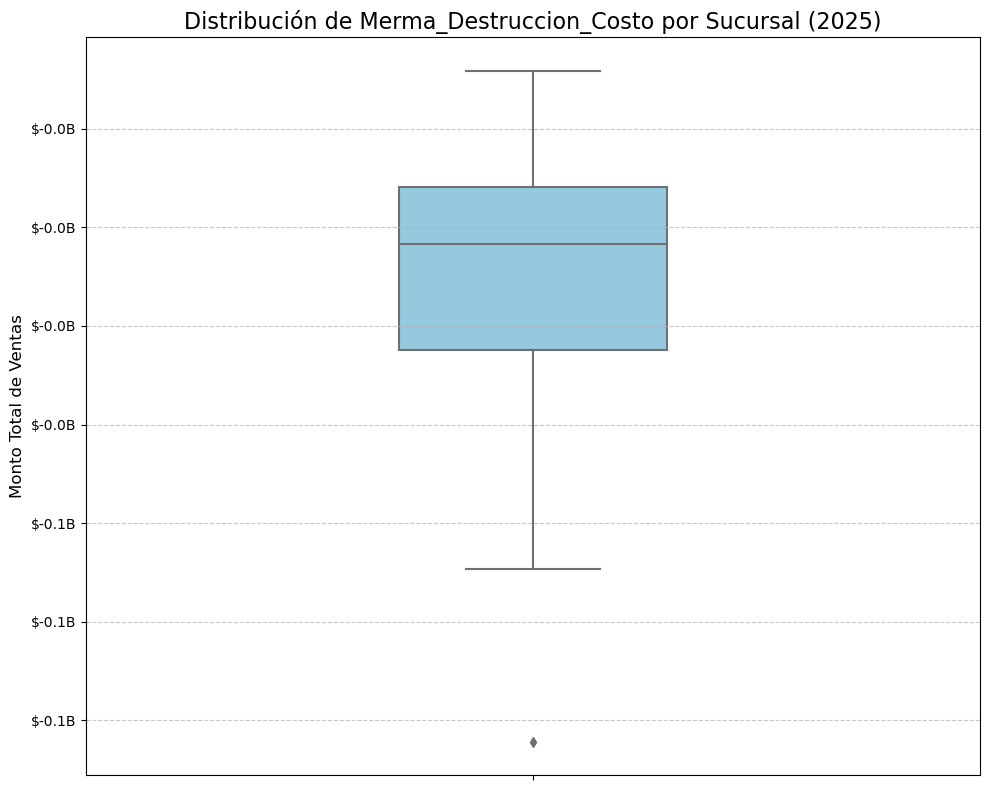

In [13]:
# --- ANÁLISIS DESCRIPTIVO DE MERMA POR DESTRUCCIÓN 2025 ---

print("\n" + "="*80)
print("INICIANDO ANÁLISIS DE MERMA POR DESTRUCCIÓN 2025")
print("="*80)

Merma_Destruccion_2025 = pd.read_excel("Detalle merma (18).xlsx", sheet_name="Export")
print(f"Archivo de Merma por Destrucción 2025 cargado con {len(Merma_Destruccion_2025)} registros.")

### --- Limpiamos la columna "Sucursal" para extraer solo el ID numérico ---
print(f"\nLimpiando la columna Sucursal para extraer el ID correcto...")
Merma_Destruccion_2025['ID_Sucursal_Limpio'] = Merma_Destruccion_2025["Sucursal"].astype(str).str.replace('^100', '', regex=True)
Merma_Destruccion_2025['ID_Sucursal_Limpio'] = pd.to_numeric(Merma_Destruccion_2025['ID_Sucursal_Limpio'], errors='coerce')
Merma_Destruccion_2025.dropna(subset=['ID_Sucursal_Limpio'], inplace=True)
Merma_Destruccion_2025['ID_Sucursal_Limpio'] = Merma_Destruccion_2025['ID_Sucursal_Limpio'].astype(int)
print("Limpieza de IDs completada.")


### --- Agrupamos los datos por ID de sucursal y sumamos las columnas de Costo Merma y Unidades Merma ---    
Merma_Destruccion_2025 = Merma_Destruccion_2025.groupby('ID_Sucursal_Limpio').agg(
    Merma_Destruccion_Costo=('Costo_Merma', 'sum'),
    Merma_Destruccion_Unidades=('Unidades_Merma', 'sum')
).reset_index()
print(f"\nSe agruparon los datos de merma para {len(Merma_Destruccion_2025)} sucursales.")

Merma_Destruccion_2025 = pd.merge(Merma_Destruccion_2025, Detalle_sucursales, left_on='ID_Sucursal_Limpio', right_on= 'Nº Suc.', how='left')
Merma_Destruccion_2025.dropna(subset=['Tienda'], inplace=True)
Merma_Destruccion_2025['Nombre_Sucursal'] = Merma_Destruccion_2025['Tienda'].str.strip()

mapeo_outlets = {
        'Outlet La Serena': 'La Serena', 'Outlet Puerto Montt Costanera': 'Costanera Pto Montt',
        'Outlet Puente': 'Puente', 'Outlet Iquique': 'Iquique', 'Outlet Parque Arauco': 'Parque Arauco'
    }
    
Merma_Destruccion_2025['Nombre_Sucursal'] = Merma_Destruccion_2025['Nombre_Sucursal'].replace(mapeo_outlets)

Merma_Destruccion_2025 = Merma_Destruccion_2025.groupby('Nombre_Sucursal')[['Merma_Destruccion_Costo', 'Merma_Destruccion_Unidades']].sum().reset_index()
print("Se unificaron los nombres de tienda y se consolidaron los datos.")


# --- 2. Formato para visualización de columnas numéricas para una visualizacion comercial ---
try: 
    def format_numeric_columns_for_display_ventas(df_to_format):
        df_formatted = df_to_format.copy()
        if Variable_descuento_dañdos in df_formatted.columns:
            df_formatted[Variable_descuento_dañdos] = df_formatted[Variable_descuento_dañdos].apply(lambda x: f"${x:,.0f}")
        return df_formatted

    Variable_descuento_dañdos = 'Merma_Destruccion_Costo'
    # --- 3. Estadísticas descriptivas ---
    print(f"\n--- Análisis Descriptivo de '{Variable_descuento_dañdos}' ---")
    desc_dañados = Merma_Destruccion_2025[Variable_descuento_dañdos].describe()
    print(f"Count: {desc_dañados['count']:.0f}")
    print(f"Mean: ${desc_dañados['mean']:,.0f}")
    print(f"Std: ${desc_dañados['std']:,.0f}")
    print(f"Min: ${desc_dañados['min']:,.0f}")
    print(f"25%: ${desc_dañados['25%']:,.0f}")
    print(f"50% (Median): ${desc_dañados['50%']:,.0f}")
    print(f"75%: ${desc_dañados['75%']:,.0f}")
    print(f"Max: ${desc_dañados['max']:,.0f}")

    print(f"\nTop 5 Sucursales por {Variable_descuento_dañdos}:")
    print(format_numeric_columns_for_display_ventas(Merma_Destruccion_2025.nlargest(5, Variable_descuento_dañdos)))

    print(f"\nBottom 5 Sucursales por {Variable_descuento_dañdos}:")
    print(format_numeric_columns_for_display_ventas(Merma_Destruccion_2025.nsmallest(5, Variable_descuento_dañdos)))

    # --- 4. Detección de Outliers ---
    print(f"\n--- Detección de Outliers ({Variable_descuento_dañdos}) ---")
    Q1_Dañados = desc_dañados['25%']
    Q3_Dañdos = desc_dañados['75%']
    IQR_Dañados = Q3_Dañdos - Q1_Dañados
    lower_Dañados = Q1_Dañados - 1.5 * IQR_Dañados
    upper_Dañados = Q3_Dañdos + 1.5 * IQR_Dañados
    outliers_Dañados = Merma_Destruccion_2025[(Merma_Destruccion_2025[Variable_descuento_dañdos] < lower_Dañados) | (Merma_Destruccion_2025[Variable_descuento_dañdos] > upper_Dañados)]

    print(f"  Q1: ${Q1_Dañados:,.2f}")
    print(f"  Q3: ${Q3_Dañdos:,.2f}")
    print(f"  IQR: ${IQR_Dañados:,.2f}")
    print(f"  Límite Inferior: ${lower_Dañados:,.2f}")
    print(f"  Límite Superior: ${upper_Dañados:,.2f}")

    if not outliers_Dañados.empty:
        print(f"  Outliers detectados ({len(outliers_Dañados)}):")
        print(format_numeric_columns_for_display_ventas(outliers_Dañados))
    else:
        print("  No se detectaron outliers.")

    # --- 5. Boxplot ---
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y = Merma_Destruccion_2025[Variable_descuento_dañdos], color='skyblue', width=0.3, ax=ax)
    
    # Formatear el eje Y para mostrar valores en miles de millones (ej. $10B)
    def format_billions(x, pos):
        return f'${x / 1e9:,.1f}B'
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_billions))
    
    ax.set_title(f'Distribución de {Variable_descuento_dañdos} por Sucursal (2025)', fontsize=16)
    ax.set_ylabel('Monto Total de Ventas', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
except NameError:
    print("\n❌ ERROR: El DataFrame 'Ventas_sucusal_2025' no fue encontrado.")
    print("Por favor, asegúrate de haber ejecutado el código de carga y limpieza de datos antes de esta celda.")

##### Realizamos el Analisis Descriptivo del numero de Multas del 2025
###### Para esto solicitamos el Informe de Juicios Retal del 2025 y realizamos el respectivo cruce con los respectivos Centros de Costos


INICIANDO ANÁLISIS DE MERMA POR DESTRUCCIÓN 2025
Archivo '    Estudio a cargo              Sociedad     Fecha de Ingreso  \
0               VBG  COMERCIAL ECCSA S.A.                  NaN   
1               VBG  COMERCIAL ECCSA S.A.                  NaN   
2               VBG  COMERCIAL ECCSA S.A.                  NaN   
3               VBG  COMERCIAL ECCSA S.A.                  NaN   
4               VBG  COMERCIAL ECCSA S.A.                  NaN   
..              ...                   ...                  ...   
206             VBG  COMERCIAL ECCSA S.A.  2025-02-27 00:00:00   
207             VBG  COMERCIAL ECCSA S.A.  2025-06-16 00:00:00   
208             VBG  COMERCIAL ECCSA S.A.  2025-06-23 00:00:00   
209             VBG  COMERCIAL ECCSA S.A.  2025-06-24 00:00:00   
210             VBG  COMERCIAL ECCSA S.A.  2025-06-30 00:00:00   

             Ciudad Tribunal            ROL                          Materia  \
0         Peñalolen       1°  24449-1-2016   Ley de Protección al Co

/opt/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning:

Data Validation extension is not supported and will be removed



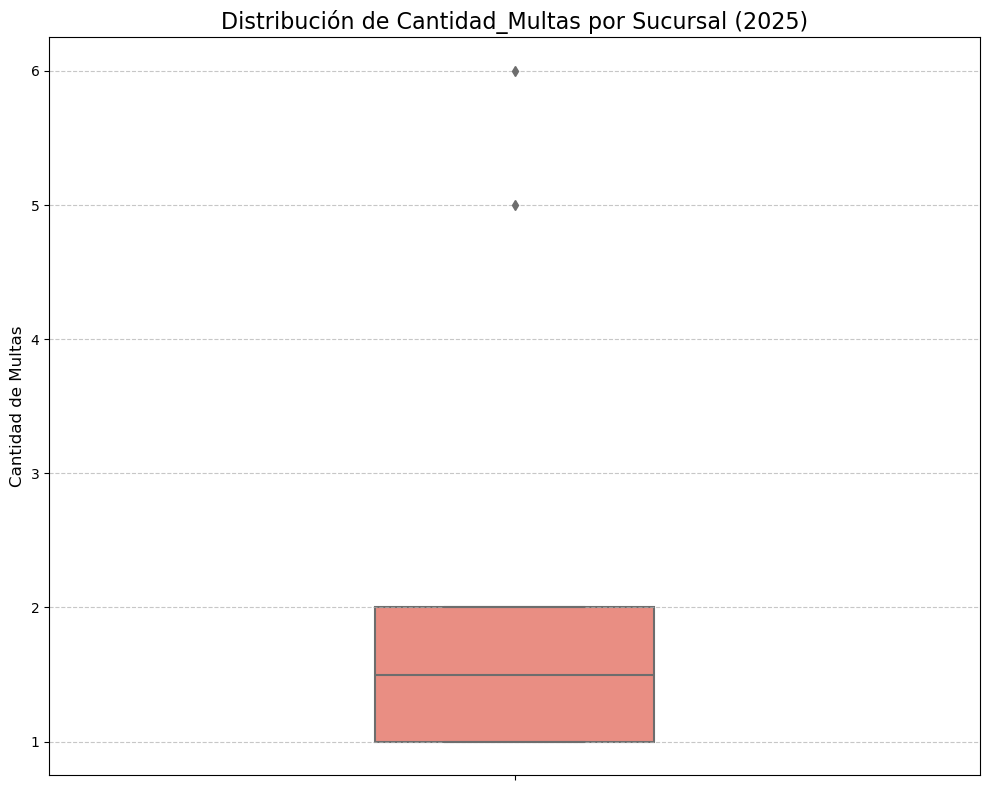

In [14]:
# --- ANÁLISIS DESCRIPTIVO DE Numero de Multas 2025 ---

print("\n" + "="*80)
print("INICIANDO ANÁLISIS DE MERMA POR DESTRUCCIÓN 2025")
print("="*80)

try:
    Multas_2025 = pd.read_excel("202506 Informe de Juicios Retail - Consolidado 1.xlsx", sheet_name="JPL", header=3, engine="openpyxl")
    Multas_Sucursal_2025 = Multas_2025['Nombre_Sucursal'].value_counts().reset_index()
    Multas_Sucursal_2025.columns = ['Nombre_Sucursal', 'Cantidad_Multas']
    ## -> Eliminamos las respectivas sucursales que no nos interesan que serian Marketplace y Barros Arana que cerro
    Multas_Sucursal_2025 = Multas_Sucursal_2025[Multas_Sucursal_2025["Nombre_Sucursal"] != "Marketplace"]
    Multas_Sucursal_2025 = Multas_Sucursal_2025[Multas_Sucursal_2025["Nombre_Sucursal"] != "Barros Arana"]
    Multas_Sucursal_2025 = Multas_Sucursal_2025.groupby('Nombre_Sucursal')['Cantidad_Multas'].sum().reset_index()

    Multas_Sucursal_2025['Cantidad_Multas'] = pd.to_numeric(Multas_Sucursal_2025['Cantidad_Multas'])

    print(f"Archivo '{Multas_2025}' cargado exitosamente.")
    print(f"El archivo contiene {len(Multas_2025)} registros para el análisis.")
    Variable_Analisis_Multas = 'Cantidad_Multas'    
    # --- Formato para visualización ---
    def format_as_integer(df_to_format):
        df_formatted = df_to_format.copy()
        if variable_a_analizar in df_formatted.columns:
            df_formatted[variable_a_analizar] = df_formatted[variable_a_analizar].apply(lambda x: f"{x:,.0f}")
        return df_formatted

    # --- 3. Estadísticas descriptivas ---
    Desc_Multas = Multas_Sucursal_2025[Variable_Analisis_Multas].describe()
    
    print(f"\n--- Análisis Descriptivo de '{Variable_Analisis_Multas}' ---")
    print(f"Count: {Desc_Multas['count']:.0f}")
    print(f"Mean: {Desc_Multas['mean']:.1f}")
    print(f"Std: {Desc_Multas['std']:.1f}")
    print(f"Min: {Desc_Multas['min']:.0f}")
    print(f"25%: {Desc_Multas['25%']:.0f}")
    print(f"50% (Median): {Desc_Multas['50%']:.0f}")
    print(f"75%: {Desc_Multas['75%']:.0f}")
    print(f"Max: {Desc_Multas['max']:.0f}")

    print("\nTop 5 Sucursales (Mayor N° de Multas):")
    print(format_as_integer(Multas_Sucursal_2025.nlargest(5, Variable_Analisis_Multas)))

    print("\nBottom 5 Sucursales (Menor N° de Accidentes):")
    print(format_as_integer(Multas_Sucursal_2025.nsmallest(5, Variable_Analisis_Multas)))

    # --- 4. Detección de Outliers ---
    print(f"\n--- Detección de Outliers ({Variable_Analisis_Multas}) ---")
    Q1_Multas = Desc_Multas['25%']
    Q3_Multas = Desc_Multas['75%']
    IQR_Multas = Q3_Multas - Q1_Multas
    lower_Multas = Q1_Multas - 1.5 * IQR_Multas
    upper_Multas = Q3_Multas + 1.5 * IQR_Multas
    outliers_Multas = Multas_Sucursal_2025[(Multas_Sucursal_2025[Variable_Analisis_Multas] < lower_Multas) | (Multas_Sucursal_2025[Variable_Analisis_Multas] > upper_Multas)]

    print(f"  Q1: {Q1_Multas:.1f}")
    print(f"  Q3: {Q3_Multas:.1f}")
    print(f"  IQR: {IQR_Multas:.1f}")
    print(f"  Límite Inferior: {lower_Multas:.1f}")
    print(f"  Límite Superior: {upper_Multas:.1f}")

    if not outliers_Multas.empty:
        print(f"  Outliers detectados ({len(outliers_Multas)}):")
        print(format_as_integer(outliers_Multas))
    else:
        print("  No se detectaron outliers.")

    # --- 5. Boxplot ---
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y=Multas_Sucursal_2025[Variable_Analisis_Multas], color='salmon', width=0.3, ax=ax)
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))
    ax.set_title(f'Distribución de {Variable_Analisis_Multas} por Sucursal (2025)', fontsize=16)
    ax.set_ylabel('Cantidad de Multas', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"\n❌ ERROR: No se pudo encontrar el archivo '{Multas_Sucursal_2025}'.")
    print("Por favor, asegúrate de que el archivo esté en la misma carpeta que tu notebook.")
except KeyError as e:
    print(f"\n❌ ERROR: No se encontró la columna '{e.args[0]}'.")
    print("Por favor, revisa que los nombres de las columnas en el código ('Tienda', 'N° Accidentes')")
    print("coincidan exactamente con los de tu archivo de Excel.")



##### Realizamos el Analisis Descriptivo del numero de Recuperos del 2025


In [15]:
# --- ANÁLISIS DESCRIPTIVO DEL Numero de Recuperos 2025 ---

print("\n" + "="*80)
print("INICIANDO ANÁLISIS DE Numero de Recuperos del 2025")
print("="*80)

Actividad_Criminal = pd.read_excel("Actividad Criminal.xlsx", sheet_name="query")
Actividad_Criminal['Fecha_Evento'] = pd.to_datetime(Actividad_Criminal['Fecha_Evento'], errors='coerce',dayfirst=True, infer_datetime_format=True)
Actividad_Criminal["Año"] = Actividad_Criminal["Fecha_Evento"].dt.year

Actividad_Criminal_2025 = Actividad_Criminal['Año'].notna() & (Actividad_Criminal['Año'] == 2025)
Actividad_Criminal_2025 = Actividad_Criminal.loc[Actividad_Criminal_2025].copy().reset_index(drop=True)

Actividad_Criminal_Sucursal_2025 = (
    Actividad_Criminal_2025
        .groupby('Título', dropna=False)
        .size()
        .reset_index(name='N° Recuperos 2025')
        .sort_values('N° Recuperos 2025', ascending=False)
)
Actividad_Criminal_Sucursal_2025["N° Recuperos 2025"] = Actividad_Criminal_Sucursal_2025["N° Recuperos 2025"].astype(int)
Actividad_Criminal_Sucursal_2025.rename(columns={"Título": "Nombre_Sucursal"}, inplace=True)

Actividad_Criminal_Sucursal_2025['Nombre_Sucursal'] = (
    Actividad_Criminal_Sucursal_2025['Nombre_Sucursal']
        .astype(str)
        # Quita "Ripley" al comienzo (con posibles guiones/espacios/después de dos puntos)
        .str.replace(r'(?i)^\s*Tienda[\s\-–:]*', '', regex=True)
        # Quita "Tda" o "Tda." en cualquier parte (insensible a mayúsculas)
        .str.replace(r'(?i)\btda\.?\b', '', regex=True)
        .str.replace(r'(?i)^\s*ripley[\s\-–:]*', '', regex=True)
        .str.replace(r'(?i)^\s*Comercial /[\s\-–:]*', '', regex=True)
        .str.replace(r'^\s*\.+\s*', '', regex=True)
        .str.replace(r'\s+', ' ', regex=True)
        .str.strip()
)

Actividad_Criminal_Sucursal_2025 = Actividad_Criminal_Sucursal_2025.groupby('Nombre_Sucursal', as_index=False)['N° Recuperos 2025'].sum()

# Eliminar "Alto Las Condes" y "Mall Alto las Condes"
Actividad_Criminal_Sucursal_2025 = Actividad_Criminal_Sucursal_2025[
    ~Actividad_Criminal_Sucursal_2025['Nombre_Sucursal'].str.strip().str.casefold().isin(
        {'alto las condes', 'mall alto las condes', "ofi cerro colorado 5240", "nan"}
    )
].reset_index(drop=True)

Actividad_Criminal_Sucursal_2025['Nombre_Sucursal'] = (
    Actividad_Criminal_Sucursal_2025['Nombre_Sucursal'].str.strip().replace({
        'Mall Plaza Trebol': 'El Trébol',
        'Plaza Huechuraba': 'Plaza Norte',
        'Concepcion Castellon': 'Castellón',
        'Pto. Montt Costanera': 'Costanera Pto Montt',
        'Copiapó': 'Plaza Copiapó',
        'Curicó': 'Mall Curicó',
        'Pta Arenas': 'Punta Arenas',
        'San Bernardo': 'Plaza Sur',
        'Mall del Centro Rancagua': 'Vivo Rancagua',
        'Rancagua': 'Vivo Rancagua',
        'Mall Del Centro': 'Puente',
        'Viña Sucre': 'Viña del Mar',
        'Concepcion': 'Castellón',
        'Mall Castellón': 'Castellón',
        'Maipu': 'Arauco Maipú',
        'Los Angeles': 'Plaza Los Ángeles',
        'Mall Calama': 'Plaza Calama',
        'Nueva Valdivia': 'Valdivia',
        'Mall Costanera': 'Costanera Pto Montt',
        'Mall Plaza Alameda': 'Plaza Alameda',
        'Mall del Centro': 'Puente',
        "Mall Temuco" : "Portal Temuco (Mall Temuco)",
        "Marina Arauco - Seguridad": "Marina Arauco",
        "Chillan" : "Chillán",
        "Crillon": "Crillón",
        "Mall Concepcion": "Mall Concepción",
        "Quilpue": "Quilpué",
        "Valparaiso" : "Valparaíso",
        "Arauco Maipu" : "Arauco Maipú",
    })
)

Actividad_Criminal_Sucursal_2025 = Actividad_Criminal_Sucursal_2025.groupby('Nombre_Sucursal', as_index=False)['N° Recuperos 2025'].sum()
Actividad_Criminal_Sucursal_2025 = Actividad_Criminal_Sucursal_2025.dropna(subset=['N° Recuperos 2025'])
##### Realizamos el Analisis Descriptivo del numero de Recuperos del 2025



INICIANDO ANÁLISIS DE Numero de Recuperos del 2025


##### Realizamos la incorporacion de la Matriz BHT junto a su respectivo Indice y su Indice de Seguridad

In [16]:
Matriz_BHT = pd.read_excel("Matriz BHT.xlsx")
Matriz_BHT = Matriz_BHT.dropna()
Matriz_BHT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 48
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tienda            42 non-null     object 
 1   Indice BHT        42 non-null     float64
 2   Indice Seguridad  42 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [17]:
Metros_Cuadrados = pd.read_excel("Metros Cuadrados Sucursal.xlsx")

##### Habiendo ya realizado todos los Analisis Descriptivo de nuestras variables a utilizar, renombramos las columnas necesarias para realizar los cruces y establcer un DataFrame Consolidado 

In [18]:
print("\n" + "="*130)
print("Renombramos las columnas de los DataFrame para posibles Merge y una mejor comprension del Contenido para el DataFrame Consolidado")
print("="*130)

Ventas_sucusal_2025 = Ventas_sucusal_2025.rename(columns={'Tienda': 'Nombre_Sucursal'})
Ventas_sucusal_2025 = Ventas_sucusal_2025.rename(columns={'total_monto_trx': 'Total_Ventas'})
Ventas_sucusal_2025 = Ventas_sucusal_2025.rename(columns={'total_transacciones': 'Total_Transacciones_Ventas'})

Notas_Credito_Sucursal_2025 = Notas_Credito_Sucursal_2025.rename(columns={'Tienda': 'Nombre_Sucursal'})
Notas_Credito_Sucursal_2025 = Notas_Credito_Sucursal_2025.rename(columns={'total_monto_trx': 'Total_Notas_Credito'})
Notas_Credito_Sucursal_2025 = Notas_Credito_Sucursal_2025.rename(columns={'total_transacciones': 'Total_Transacciones_Notas_Credito'})

Reclamos_Sucursal_2025 = Reclamos_Sucursal_2025.rename(columns={'Nombre_Oficial_Match': 'Nombre_Sucursal'})
Reclamos_Sucursal_2025 = Reclamos_Sucursal_2025.rename(columns={'Reclamos_Cantidad_2025': 'Total_Reclamos'})

Actividad_Criminal_Sucursal_2025 = Actividad_Criminal_Sucursal_2025.rename(columns ={'Tienda': 'Nombre_Sucursal'})
Matriz_BHT = Matriz_BHT.rename(columns= {"Tienda":"Nombre_Sucursal"})
Metros_Cuadrados = Metros_Cuadrados.rename(columns={"Tienda": "Nombre_Sucursal"})


# Desviacion_Meta_Merma_2025 y Merma_Destruccion_2025 no es necesario renombrar porque ya tiene el nombre correcto
Merma_Destruccion_2025 = Merma_Destruccion_2025.rename(columns={'Merma_Destruccion_Costo': 'Costo_Merma_Destruccion'})


Accidentes_2025 = Accidentes_2025.rename(columns={'Tienda': 'Nombre_Sucursal'})
Descuento_Productos_Dañados_2025 = Descuento_Productos_Dañados_2025.rename(columns={'Tienda': 'Nombre_Sucursal'})

Multas_Sucursal_2025 = Multas_Sucursal_2025.rename(columns= {"Cantidad_Multas": "N° Multas"})



Renombramos las columnas de los DataFrame para posibles Merge y una mejor comprension del Contenido para el DataFrame Consolidado


### 🧱 Procedemos a construir el DataFrame consolidado con todas las variables para su respectivo trabajo

In [19]:
# Consolidar todas las variables por sucursal
Df_Kmeans = Ventas_sucusal_2025.merge(
    Notas_Credito_Sucursal_2025[["Nombre_Sucursal", "Total_Notas_Credito"]], on='Nombre_Sucursal', how='left'
).merge(
    Reclamos_Sucursal_2025, on='Nombre_Sucursal', how='left'
).merge(
    Desviacion_Meta_Merma_2025, on='Nombre_Sucursal', how='left'
).merge(
    Merma_Destruccion_2025[['Nombre_Sucursal', 'Costo_Merma_Destruccion']], on='Nombre_Sucursal', how='left'
).merge(
    Accidentes_2025[['Nombre_Sucursal', 'N° Accidentes']], on='Nombre_Sucursal', how='left'
).merge(
    Descuento_Productos_Dañados_2025[['Nombre_Sucursal', 'Productos_Dañados_Descuento']], on='Nombre_Sucursal', how='left'
).merge(
    Multas_Sucursal_2025[["Nombre_Sucursal", "N° Multas"]], on="Nombre_Sucursal", how="left"
).merge(
    Actividad_Criminal_Sucursal_2025[['Nombre_Sucursal', 'N° Recuperos 2025']], on='Nombre_Sucursal', how='left'
).merge(
    Matriz_BHT[['Nombre_Sucursal', 'Indice BHT', "Indice Seguridad"]], on='Nombre_Sucursal', how='left'
).merge(
    Metros_Cuadrados[['Nombre_Sucursal', 'Mts. 2']], on='Nombre_Sucursal', how='left'
)

# Solo en caso de Multas Rellenamos los Valores Nulos con 0 
Sucursales_Sin_Multas = Df_Kmeans['N° Multas'].isnull().sum()
Df_Kmeans['N° Multas'] = Df_Kmeans['N° Multas'].fillna(0)
Df_Kmeans['N° Multas'] = Df_Kmeans['N° Multas'].astype(int)
print(f"Se asignaron 0 multas a las {Sucursales_Sin_Multas} sucursales que no tenían registros.")

# Solo para el caso de Merma de Destruccion realizamos una aproximacion para mejor interpretacion y eliminar la notacion cientifica
Df_Kmeans['Costo_Merma_Destruccion'] = Df_Kmeans['Costo_Merma_Destruccion'].apply(lambda x: round(x, 2))
# Cambios el numero N° de Accidentes a Entero para una mejor lectura e interpretacion
Df_Kmeans['N° Accidentes'] = Df_Kmeans['N° Accidentes'].astype(int)

# Verificación rápida
print("✅ DataFrame Df_Kmeans construido con éxito. Vista previa:")
display(Df_Kmeans.head())


Se asignaron 0 multas a las 22 sucursales que no tenían registros.
✅ DataFrame Df_Kmeans construido con éxito. Vista previa:


Nombre_Sucursal  Total_Ventas  Total_Transacciones_Ventas  \
0     Antofagasta   12225941226                      262801   
1    Arauco Maipú    8261470852                      203774   
2           Arica    4293259111                      120657   
3       Castellón    6684447150                      172929   
4         Chillán    8418919439                      229856   

   Total_Notas_Credito  Total_Reclamos  Desviacion_Meta_Merma  \
0            270155106               5                 0.0037   
1            445783370               9                -0.0001   
2            105243768               8                 0.0007   
3            172889639               2                -0.0031   
4            339615984               9                 0.0006   

   Costo_Merma_Destruccion  N° Accidentes  Productos_Dañados_Descuento  \
0             -52372551.33             16                     56665208   
1             -26815074.52             40                      3078700   
2              -4336070.00              8                     10488116   
3             -18814280.81              8                      1564500   
4             -24601240.38             10                      2848150   

   N° Multas  N° Recuperos 2025  Indice BHT  Indice Seguridad  Mts. 2  
0          6                138        0.69              0.49    9061  
1          0                358        0.65              0.81    6917  
2          2                 50        0.54              0.30    5000  
3          0                115        0.48              0.24    4311  
4          0                 59        0.57              0.13    5742

In [20]:
Df_Kmeans

Nombre_Sucursal  Total_Ventas  Total_Transacciones_Ventas  \
0                   Antofagasta   12225941226                      262801   
1                  Arauco Maipú    8261470852                      203774   
2                         Arica    4293259111                      120657   
3                     Castellón    6684447150                      172929   
4                       Chillán    8418919439                      229856   
5                      Coquimbo    5264060574                      142039   
6              Costanera Center   28845648379                      494397   
7           Costanera Pto Montt   13459270098                      299709   
8                       Crillón    6894988492                      185292   
9                     El Trébol   19016831703                      422169   
10               Florida Center    8793170619                      226114   
11                      Iquique    8186287256                      190655   
12                    La Calera    5078055560                      134576   
13                    La Serena   10492464497                      256368   
14                    Los Andes    7866052432                      160219   
15                Los Dominicos    3564518567                      104912   
16              Mall Concepción   10969994571                      317254   
17                  Mall Curicó    7193408357                      177652   
18                Marina Arauco   29493062872                      526106   
19                Parque Arauco   19940593034                      310316   
20                Plaza Alameda    6364626246                      157532   
21                 Plaza Calama    5505082943                      124569   
22                Plaza Copiapó    6127028289                      157438   
23                  Plaza Egaña    9948482661                      277158   
24            Plaza Los Ángeles    9727159285                      240775   
25                  Plaza Norte    8020787061                      188040   
26                  Plaza Oeste   14041794174                      296481   
27                    Plaza Sur    8080312015                      205729   
28               Plaza Tobalaba    8142141799                      227566   
29               Plaza Vespucio   14726629081                      367583   
30  Portal Temuco (Mall Temuco)   21186958305                      412144   
31                       Puente    8452721474                      250343   
32                 Puerto Montt    4996604157                      143826   
33                 Punta Arenas    8515104951                      182550   
34                      Quilpué    3791860043                      129189   
35                 San Fernando    5074793046                      146934   
36                        Talca   14633213595                      305668   
37                       Temuco   13904964553                      278342   
38                     Valdivia    9682351972                      245199   
39                   Valparaíso    5087562192                      158201   
40                Vivo Rancagua   12889259132                      312811   
41                 Viña del Mar    6929377373                      198182   

    Total_Notas_Credito  Total_Reclamos  Desviacion_Meta_Merma  \
0             270155106               5                 0.0037   
1             445783370               9                -0.0001   
2             105243768               8                 0.0007   
3             172889639               2                -0.0031   
4             339615984               9                 0.0006   
5             107344679               3                 0.0004   
6             825562038              20                -0.0015   
7             252833031               5                -0.0009   
8             397330525               4                 0.0026   
9             623194259              12     

##### Habiendo creado el DataFrame consolidado con el que vamos a trabajar realizamos trabajo de Añadir Nuevas columnas para una mejor interpretacion tanto de Dañados por volumen de venta como la creacion de un Indice de Inseguridad

In [21]:
# --- 1) Ventas totales (si no la tienes, la reconstruimos con m²)
if 'Total_Ventas' in Df_Kmeans.columns:
    ventas_total_proxy = pd.to_numeric(Df_Kmeans['Total_Ventas'], errors='coerce')
else:
    ventas_total_proxy = pd.to_numeric(Df_Kmeans['Ventas / Mts. 2'], errors='coerce') * \
                         pd.to_numeric(Df_Kmeans['Mts. 2'], errors='coerce')

danados = pd.to_numeric(Df_Kmeans['Productos_Dañados_Descuento'], errors='coerce')

Df_Kmeans['Dañados_sobre_Ventas'] = (danados / ventas_total_proxy).replace([np.inf, -np.inf], np.nan)

# Winsorizar suave (1–99%) para que outliers extremos no dominen
q01, q99 = Df_Kmeans['Dañados_sobre_Ventas'].quantile([0.01, 0.99])
Df_Kmeans['Dañados_sobre_Ventas'] = Df_Kmeans['Dañados_sobre_Ventas'].clip(q01, q99)
Df_Kmeans['Dañados_sobre_Ventas'] = pd.to_numeric(Df_Kmeans['Dañados_sobre_Ventas'])

In [22]:
seg = pd.to_numeric(Df_Kmeans['Indice Seguridad'], errors='coerce')
seg01 = seg / 100.0 if seg.max() > 1.5 else seg
Df_Kmeans['Indice_Inseguridad'] = (1.0 - seg01).clip(0, 1)

In [23]:
Df_Kmeans['Ventas / Mts. 2'] = Df_Kmeans['Total_Ventas'] / Df_Kmeans['Mts. 2']

In [24]:
Df_Kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nombre_Sucursal              42 non-null     object 
 1   Total_Ventas                 42 non-null     int64  
 2   Total_Transacciones_Ventas   42 non-null     int64  
 3   Total_Notas_Credito          42 non-null     int64  
 4   Total_Reclamos               42 non-null     int64  
 5   Desviacion_Meta_Merma        42 non-null     float64
 6   Costo_Merma_Destruccion      42 non-null     float64
 7   N° Accidentes                42 non-null     int64  
 8   Productos_Dañados_Descuento  42 non-null     int64  
 9   N° Multas                    42 non-null     int64  
 10  N° Recuperos 2025            42 non-null     int64  
 11  Indice BHT                   42 non-null     float64
 12  Indice Seguridad             42 non-null     float64
 13  Mts. 2                

#### Ya habiendo concolidado el DataFrame Final con el que vamos a trabajamor Seleccionaremos las variables numericas relevantes que utilizaremos para el K-Means 

In [25]:
Variables_Modelo = [
    "Ventas / Mts. 2", "Total_Notas_Credito",
    "Total_Reclamos", "Desviacion_Meta_Merma",
    "Costo_Merma_Destruccion", "N° Accidentes",
    "Productos_Dañados_Descuento", "N° Multas",
    "N° Recuperos 2025", "Indice_Inseguridad",
    "Dañados_sobre_Ventas"
]
X = Df_Kmeans[Variables_Modelo].copy()

#### Escalamos la informacion

In [26]:
Scaler_Standar = StandardScaler()
X_scaled = Scaler_Standar.fit_transform(X)
Scaler_MinMax = MinMaxScaler()
X_scaled_MinMax = Scaler_MinMax.fit_transform(X)

#### Aplicamos Metodo del Codo para determinar el numero optimo de Clusters

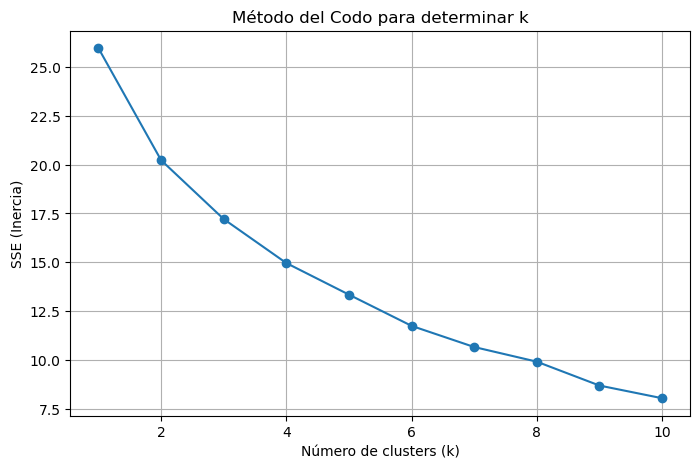

In [27]:
# Calcular SSE para varios valores de K
sse = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state= 100, n_init= 17)
    kmeans.fit(X_scaled_MinMax)
    sse.append(kmeans.inertia_)

# Plot del método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE (Inercia)')
plt.title('Método del Codo para determinar k')
plt.grid(True)
plt.show()


#### Comenzaremos a ejecutar los Modelos K Means que utilizaremos para ello comenzamos :
#### Primera Propuesta: Modelo Clustering K-Means Simple


--- Perfil promedio de cada cluster (Propuesta 1 - Standard) ---
                 Ventas / Mts. 2  Total_Notas_Credito  Total_Reclamos  \
Cluster_Sin_PCA                                                         
0                     1199052.99         2.085750e+08            5.25   
1                     2070489.82         5.361463e+08           11.67   
2                     1237434.01         4.231468e+08           22.08   

                 Desviacion_Meta_Merma  Costo_Merma_Destruccion  \
Cluster_Sin_PCA                                                   
0                                  0.0             -17789422.98   
1                                  0.0             -52483899.28   
2                                 -0.0             -27155939.82   

                 N° Accidentes  Productos_Dañados_Descuento  N° Multas  \
Cluster_Sin_PCA                                                          
0                        16.04                  11630361.83       0.83   
1         

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


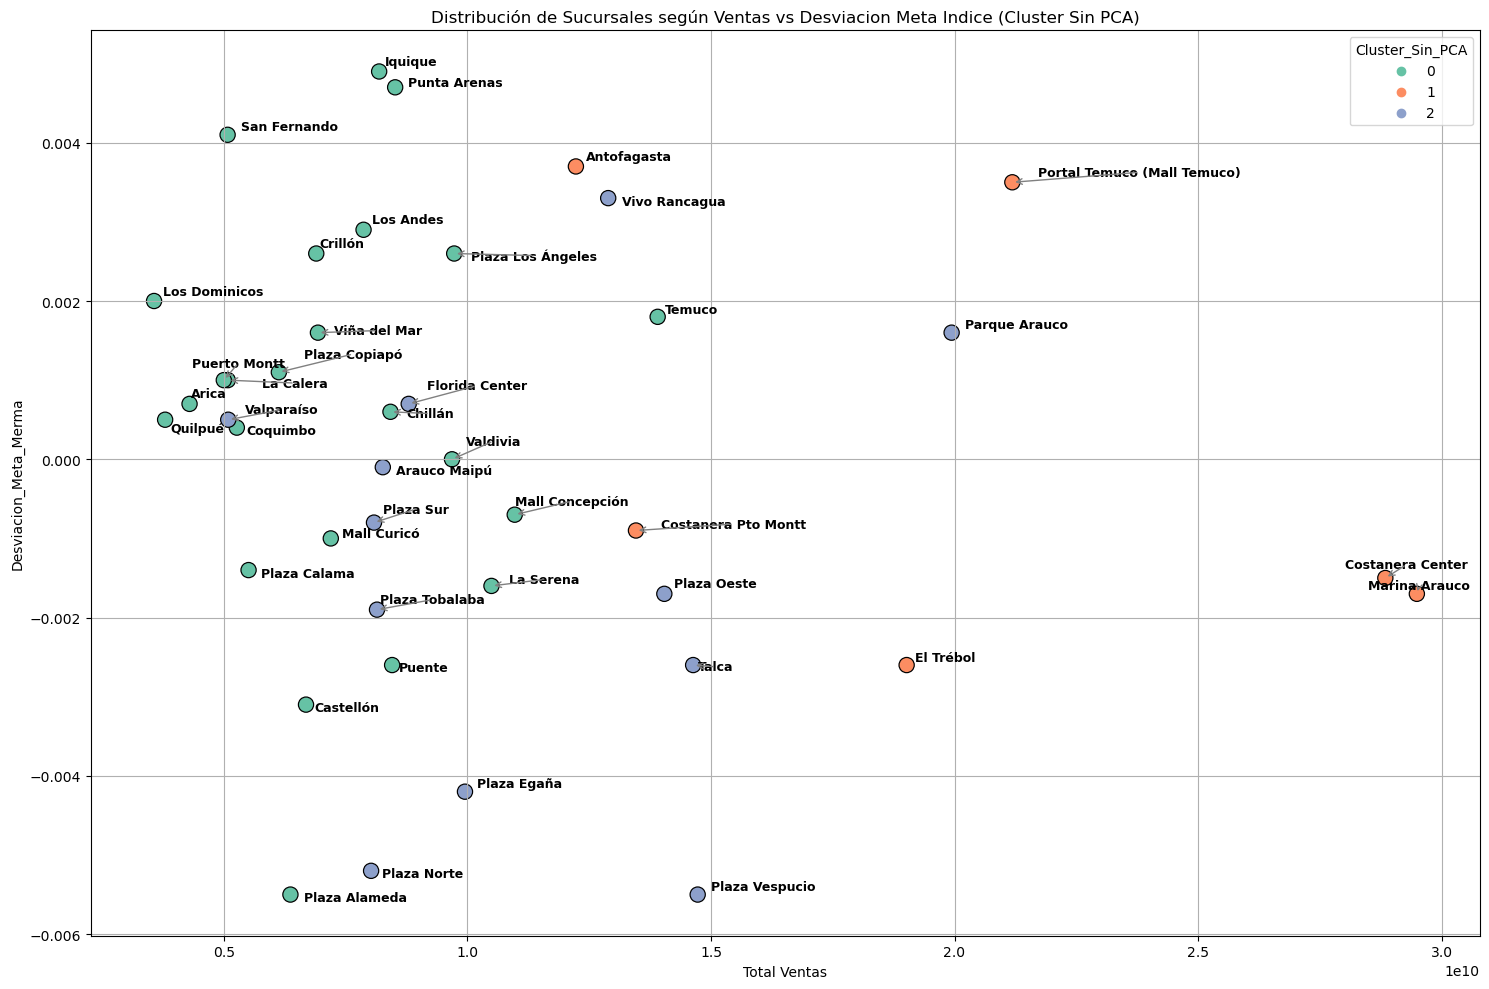

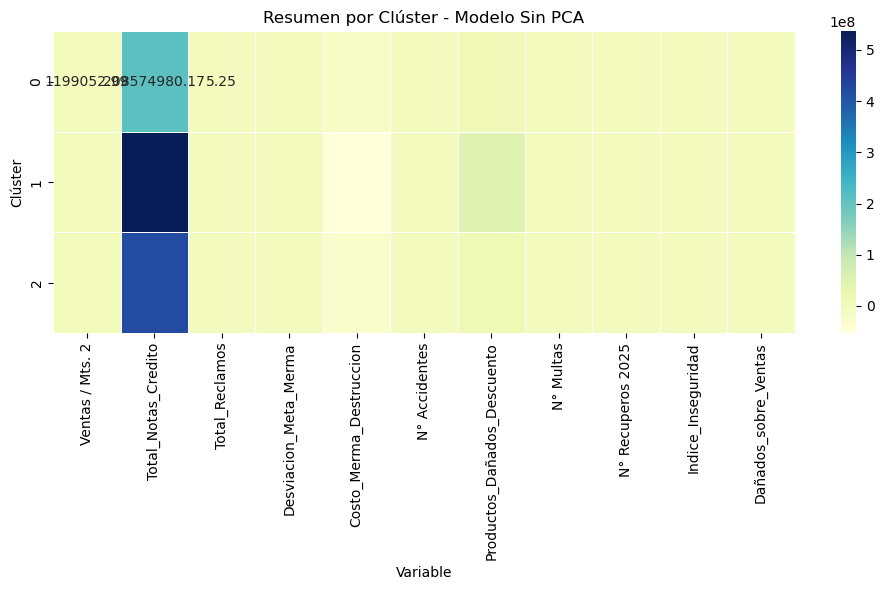


✅ Resumen de clústeres exportado correctamente con redondeo ajustado.


Ventas / Mts. 2  Total_Notas_Credito  Total_Reclamos  \
Cluster_Sin_PCA                                                         
0                     1199052.99         2.085750e+08            5.25   
1                     2070489.82         5.361463e+08           11.67   
2                     1237434.01         4.231468e+08           22.08   

                 Desviacion_Meta_Merma  Costo_Merma_Destruccion  \
Cluster_Sin_PCA                                                   
0                                  0.0             -17789422.98   
1                                  0.0             -52483899.28   
2                                 -0.0             -27155939.82   

                 N° Accidentes  Productos_Dañados_Descuento  N° Multas  \
Cluster_Sin_PCA                                                          
0                        16.04                  11630361.83       0.83   
1                        34.50                  47753699.00       1.67   
2                        23.00                  12914845.00       0.58   

                 N° Recuperos 2025  Indice_Inseguridad  Dañados_sobre_Ventas  
Cluster_Sin_PCA                                                               
0                           138.83                0.62                   0.0  
1                           258.67                0.50                   0.0  
2                           414.00                0.28                   0.0

In [28]:
### Ejecutamos K Means con un Clustering Simple 
K_optimo = 3
Modelo_KMeans = KMeans(n_clusters=K_optimo, random_state=100, n_init=50)
Clusters = Modelo_KMeans.fit_predict(X_scaled)
## Añadimos Columna al DataFrame Original
Df_Kmeans['Cluster_Sin_PCA'] = Clusters
### Generamos un resumen por Cluster segun las variables de Interes
Resumen_Cluster_Sin_PCA = Df_Kmeans.groupby('Cluster_Sin_PCA')[Variables_Modelo].mean().round(2)
print("\n--- Perfil promedio de cada cluster (Propuesta 1 - Standard) ---")
print(Resumen_Cluster_Sin_PCA)

### Generamos un grafico de comparacion de Clusters guiandonos en las ventas junto a la desviacion Meta Indice
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=Df_Kmeans,
    x='Total_Ventas',
    y='Desviacion_Meta_Merma',
    hue="Cluster_Sin_PCA",
    palette='Set2',
    s=120,
    edgecolor='black'
)
### Generamos la funcion texto para que en el grafico generado nos aparezca a un lado el nombre de la sucursal para una mejor visualizacion junto a adjust text
texts_Standard = []
for i, txt in enumerate(Df_Kmeans['Nombre_Sucursal']):
    texts_Standard.append(
        plt.text(
            Df_Kmeans['Total_Ventas'].iloc[i], 
            Df_Kmeans['Desviacion_Meta_Merma'].iloc[i], 
            txt, fontsize=9, weight='bold'
        )
    )
adjust_text(texts_Standard, arrowprops=dict(arrowstyle='->', color='grey', lw=1), force_points=0.25)

plt.title('Distribución de Sucursales según Ventas vs Desviacion Meta Indice (Cluster Sin PCA)')
plt.xlabel('Total Ventas')
plt.ylabel('Desviacion_Meta_Merma')
plt.grid(True)
plt.tight_layout()
plt.show()


# Visualización del Heatmap por clusters segun variables de Interes
plt.figure(figsize=(10, 6))
sns.heatmap(Resumen_Cluster_Sin_PCA, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Resumen por Clúster - Modelo Sin PCA')
plt.ylabel('Clúster')
plt.xlabel('Variable')
plt.tight_layout()
plt.show()

for col in Resumen_Cluster_Sin_PCA.columns:
    if col == 'Desviacion_Meta_Merma':
        Resumen_Cluster_Sin_PCA[col] = Resumen_Cluster_Sin_PCA[col].round(5)  # más precisión para variables pequeñas
    else:
        Resumen_Cluster_Sin_PCA[col] = Resumen_Cluster_Sin_PCA[col].round(2)

# Confirmación visual
print("\n✅ Resumen de clústeres exportado correctamente con redondeo ajustado.")
display(Resumen_Cluster_Sin_PCA)




In [29]:
### Realizamos un mapping a los CLusters para asiganarles Riesgo Alto, Medio o Bajo ### 
Ventas_Cluster_Propuesta_1 = Df_Kmeans.groupby('Cluster_Sin_PCA')['Total_Ventas'].mean().sort_values(ascending=False)
Orden_riesgo = Ventas_Cluster_Propuesta_1.index.tolist()  # [cluster_alto, cluster_medio, cluster_bajo]

### Creamos las etiquetas de Riesgo
etiquetas = ['Riesgo Alto', 'Riesgo Medio', 'Riesgo Bajo']
mapping_riesgo = {cluster: etiqueta for cluster, etiqueta in zip(Orden_riesgo, etiquetas)}

print("Asignación automática de clusters según ventas promedio:", mapping_riesgo)

# --- 3. Asignar etiquetas en ambos modelos ---
Df_Kmeans['Riesgo_Propuesta_1'] = Df_Kmeans['Cluster_Sin_PCA'].map(mapping_riesgo)


Asignación automática de clusters según ventas promedio: {1: 'Riesgo Alto', 2: 'Riesgo Medio', 0: 'Riesgo Bajo'}


In [30]:
Score_Propuesta_1 = silhouette_score(X_scaled, Clusters)
print(f"Silhouette Score para Clusters_Weighted: {Score_Propuesta_1:.4f}")


Silhouette Score para Clusters_Weighted: 0.1862


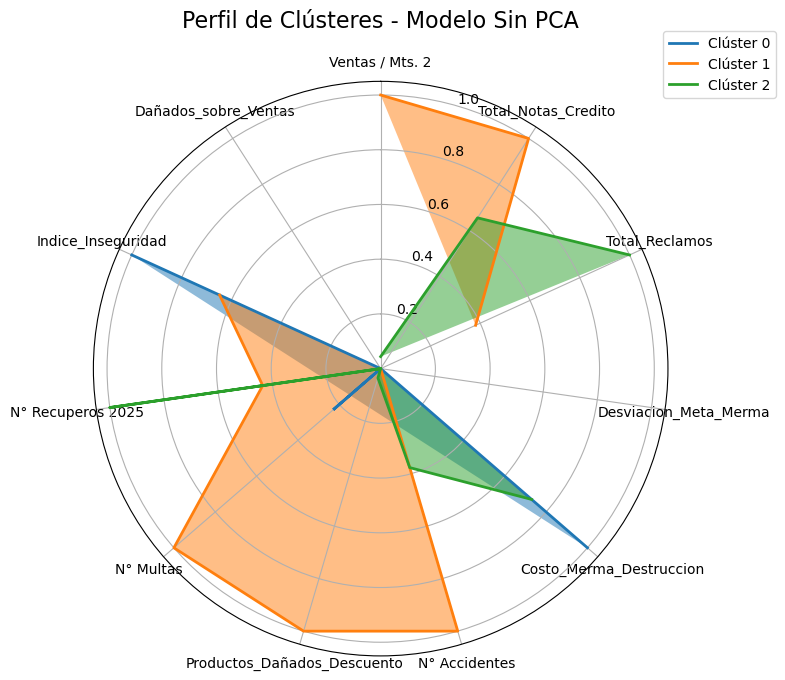

In [31]:
# Grafico de Araña (Opcional)
Resumen_Cluster_Sin_PCA.index = Resumen_Cluster_Sin_PCA.index.astype(str)

# Normalizar los datos por columna para hacerlos comparables (0 a 1)
Resumen_normalizado = (Resumen_Cluster_Sin_PCA - Resumen_Cluster_Sin_PCA.min()) / (Resumen_Cluster_Sin_PCA.max() - Resumen_Cluster_Sin_PCA.min())

# Preparar el radar chart
labels = list(Resumen_normalizado.columns)
num_vars = len(labels)

# Calcular ángulos para cada eje
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el círculo

# Crear gráfico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Colores distintos para cada clúster
colores = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plotear cada clúster
for idx, fila in Resumen_normalizado.iterrows():
    valores = fila.tolist()
    valores += valores[:1]  # Cerrar el círculo
    ax.plot(angles, valores, label=f'Clúster {idx}', linewidth=2)
    ax.fill(angles, valores, alpha=0.5)

# Personalizar el gráfico
ax.set_title('Perfil de Clústeres - Modelo Sin PCA', size=16, pad=20)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_rlabel_position(180 / num_vars)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
ax.grid(True)

plt.tight_layout()
plt.show()

##### Analisis de las Caracteristicas de los Clusters segun Propuesta 1
Cluster 1 : Tiendas con un Volumen de ventas y Notas de Credito bajo con una baj actividad financiera, lo que se traduce a su vez en un sucursales que son propensas a cumplir con las metas de su inventario, a su vez de que su costo de merma de destruccion se mantiene entre los mas bajos a su vez con su numero de reclamos, unico punto a resalar es el hecho de su Descuento en productos Dañados que no sigue la misma tendencia siendo el segundo clusters con mayor descuentos incurridos en estos articulos, con 26 sucursales

Clusters 2: Tiendas con un riesgo que podemos catalogar como medio, dado que manejan un volumen de ventas y Notas de credito muy cercano al promedio, distanciandose de la magnitud financiera de las sucursales mas grandes, pero algo interesante es que a pesar de su magnitud promedio, posee las sucursales con caracteristicas similares en terminos de NO CUMPLIR con las metas de inventario, lo que tenemos son 11 sucursales

Cluster 3: Tiendas que poseen el mayor peso financiero dentro de las sucursales, las cuales poseen el mayor volumen tanto de ventas, como de notas de credito, su costo asociado a la merma de destruccion y mayor volumen de descuento producido por productos dañados, una observacion a levantar es que a pesar de que posean mayor magnitud financiera su numero de reclamos y su desviacion en relacion a la meta y indice de la merma inventario se mantienen en un promedio lo que es relevante a analizar

#### Segunda Propuesta: Modelo Clustering K-Means con PCA

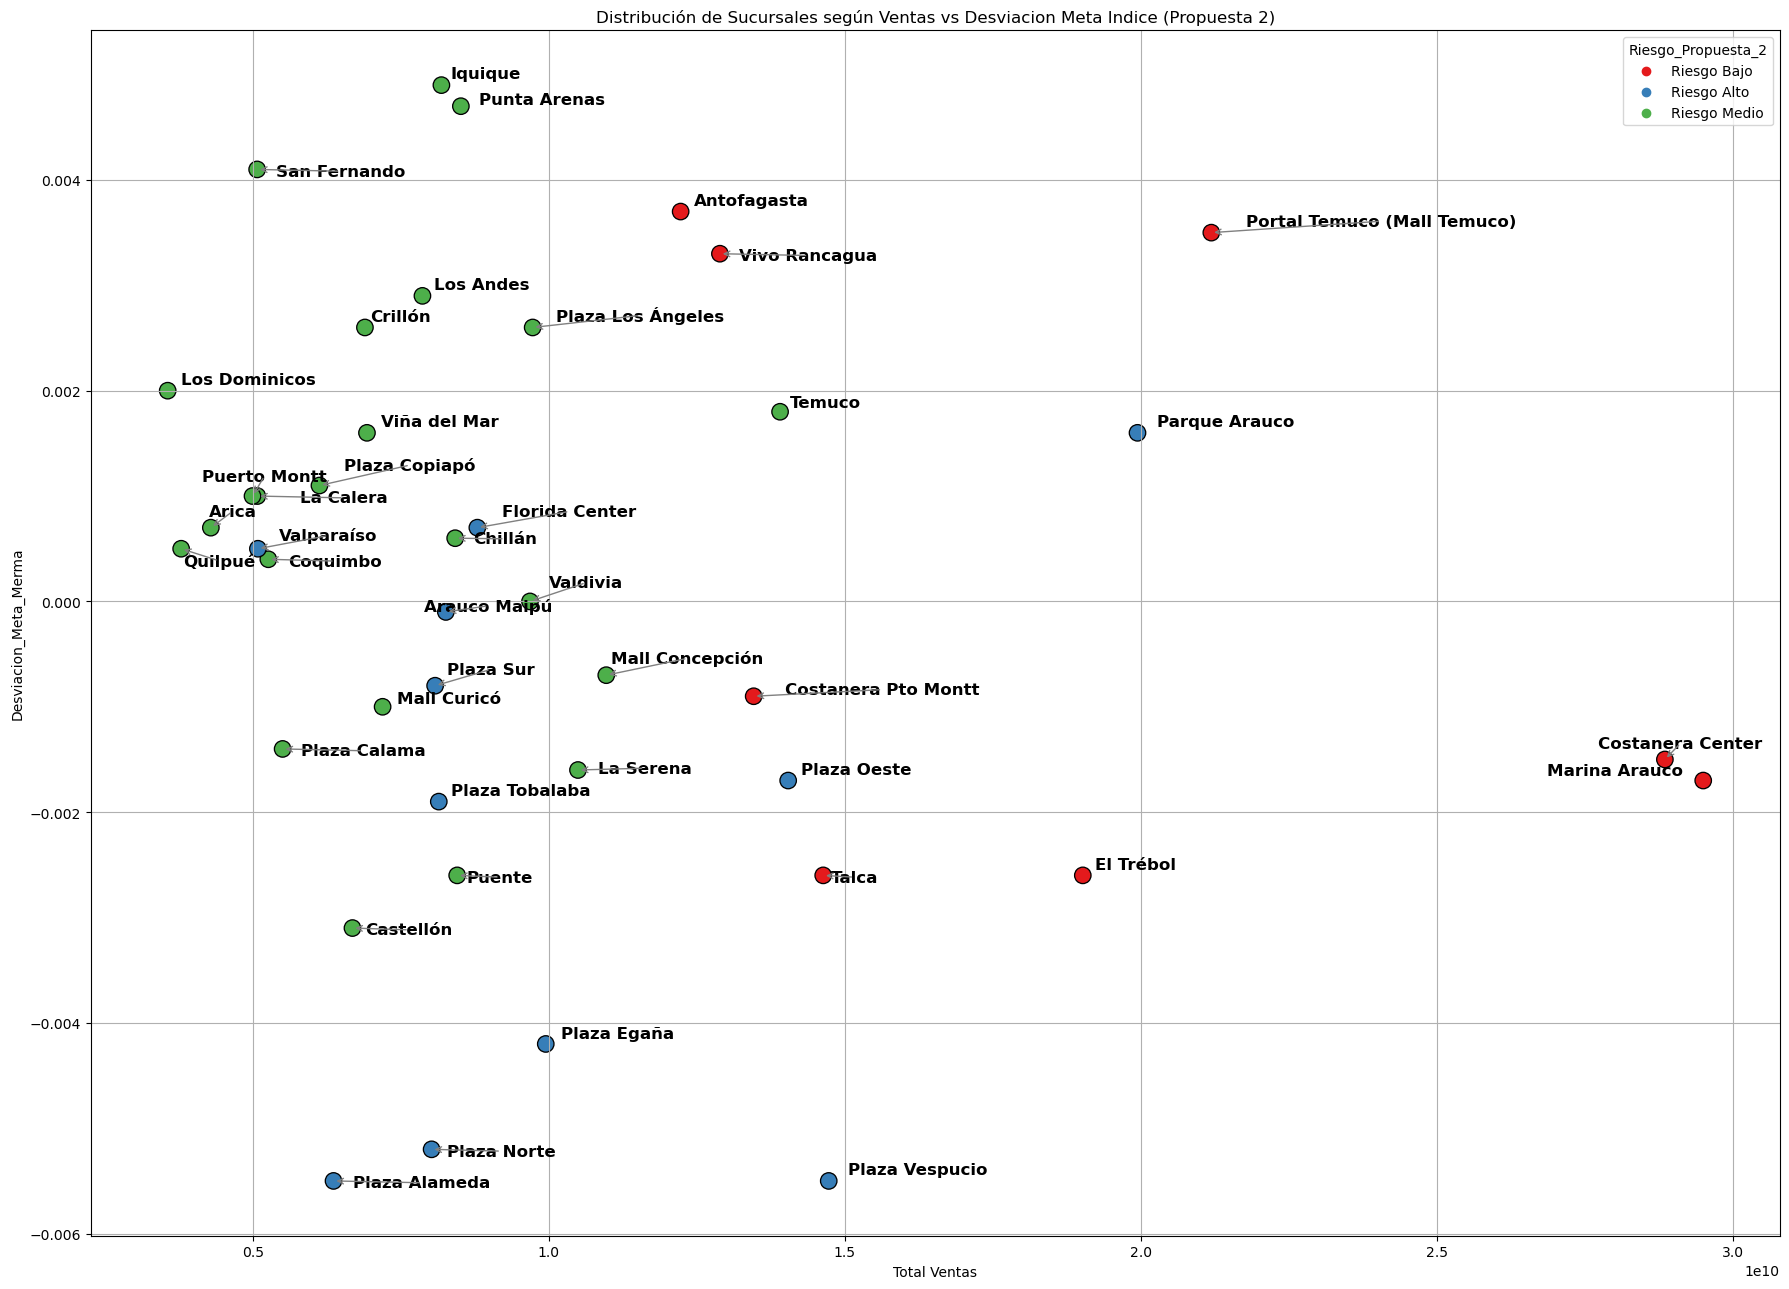


✅ Resultados del Test de Medias para Propuesta 2 : Clústeres con PCA Aplicado a todas las variables:


Variable  p-valor  Significativo
0               Ventas / Mts. 2   0.0002           True
1           Total_Notas_Credito   0.0000           True
2                Total_Reclamos   0.0001           True
3         Desviacion_Meta_Merma   0.0071           True
4       Costo_Merma_Destruccion   0.0000           True
5                 N° Accidentes   0.0001           True
6   Productos_Dañados_Descuento   0.0000           True
7                     N° Multas   0.2329          False
8             N° Recuperos 2025   0.0005           True
9            Indice_Inseguridad   0.0001           True
10         Dañados_sobre_Ventas   0.4271          False

In [32]:
from sklearn.decomposition import PCA
MinMax_Scaler = MinMaxScaler()
X_Scaled_MinMax = MinMax_Scaler.fit_transform(X)

PCA = PCA(n_components=2, random_state=100)
X_PCA = PCA.fit_transform(X_Scaled_MinMax)

X_PCA_Df = pd.DataFrame(X_PCA, columns=['PCA1', 'PCA2'])

Kmeans_PCA_Parcial = KMeans(n_clusters=3, random_state=100, n_init= 50)
Clusters_PCA_Parcial = Kmeans_PCA_Parcial.fit_predict(X_PCA_Df)

Df_Kmeans['Propuesta_2'] = Clusters_PCA_Parcial
Df_Kmeans["Riesgo_Propuesta_2"] = Df_Kmeans["Propuesta_2"].map(mapping_riesgo)

plt.figure(figsize=(18, 13))
sns.scatterplot(
    data=Df_Kmeans,
    x='Total_Ventas',
    y='Desviacion_Meta_Merma',
    hue="Riesgo_Propuesta_2",
    palette='Set1',
    s=140,
    edgecolor='black'
)
### Generamos la funcion texto para que en el grafico generado nos aparezca a un lado el nombre de la sucursal para una mejor visualizacion junto a adjust text
texts_Standard = []
for i, txt in enumerate(Df_Kmeans['Nombre_Sucursal']):
    texts_Standard.append(
        plt.text(
            Df_Kmeans['Total_Ventas'].iloc[i], 
            Df_Kmeans['Desviacion_Meta_Merma'].iloc[i], 
            txt, fontsize=12, weight='bold'
        )
    )
adjust_text(texts_Standard, arrowprops=dict(arrowstyle='->', color='grey', lw=1), force_points=0.35)

plt.title('Distribución de Sucursales según Ventas vs Desviacion Meta Indice (Propuesta 2)')
plt.xlabel('Total Ventas')
plt.ylabel('Desviacion_Meta_Merma')
plt.grid(True)
plt.tight_layout()
plt.show()
Resumen_Cluster_PCA_Total = Df_Kmeans.groupby('Riesgo_Propuesta_2')[Variables_Modelo].mean()

Resultados_Anova_Propuesta_2 = {}
for var in Variables_Modelo:
    grupos = [grupo[var].values for _, grupo in Df_Kmeans.groupby('Riesgo_Propuesta_2')]
    stat, p_value = f_oneway(*grupos)
    Resultados_Anova_Propuesta_2[var] = round(p_value, 4)

Df_Anova_PCA_Total = pd.DataFrame.from_dict(Resultados_Anova_Propuesta_2, orient='index', columns=['p-valor'])
Df_Anova_PCA_Total['Significativo'] = Df_Anova_PCA_Total['p-valor'] < 0.05
Df_Anova_PCA_Total.index.name = 'Variable'
Df_Anova_PCA_Total.reset_index(inplace=True)

print("\n✅ Resultados del Test de Medias para Propuesta 2 : Clústeres con PCA Aplicado a todas las variables:")
display(Df_Anova_PCA_Total)



In [33]:
Score_Propuesta_2 = silhouette_score(X_PCA_Df, Clusters_PCA_Parcial)
print(f"Silhouette Score para Clusters_Weighted: {Score_Propuesta_2:.4f}")


Silhouette Score para Clusters_Weighted: 0.4218


##### Propuesta 3 PCA con variables externas

--- Comenzamos con el escalamiento de las variables por separado tanto PCA como externas ---
--- Aplicamos K-Means al modelo hibrido ---

--- Perfil promedio de cada cluster (Propuesta 3 - Modelo Hibrido con Ventas / NC junto a Variables Externas) ---
                      Ventas / Mts. 2  Total_Notas_Credito  Total_Reclamos  \
Clusters_Propuesta_3                                                         
0                        1.905834e+06         5.543151e+08       17.500000   
1                        1.213190e+06         2.104485e+08        5.304348   
2                        1.172671e+06         3.659640e+08       18.090909   

                      Desviacion_Meta_Merma  Costo_Merma_Destruccion  \
Clusters_Propuesta_3                                                   
0                                  0.000675            -4.556589e+07   
1                                  0.000961            -1.838416e+07   
2                                 -0.002391            -2.548710e+07 

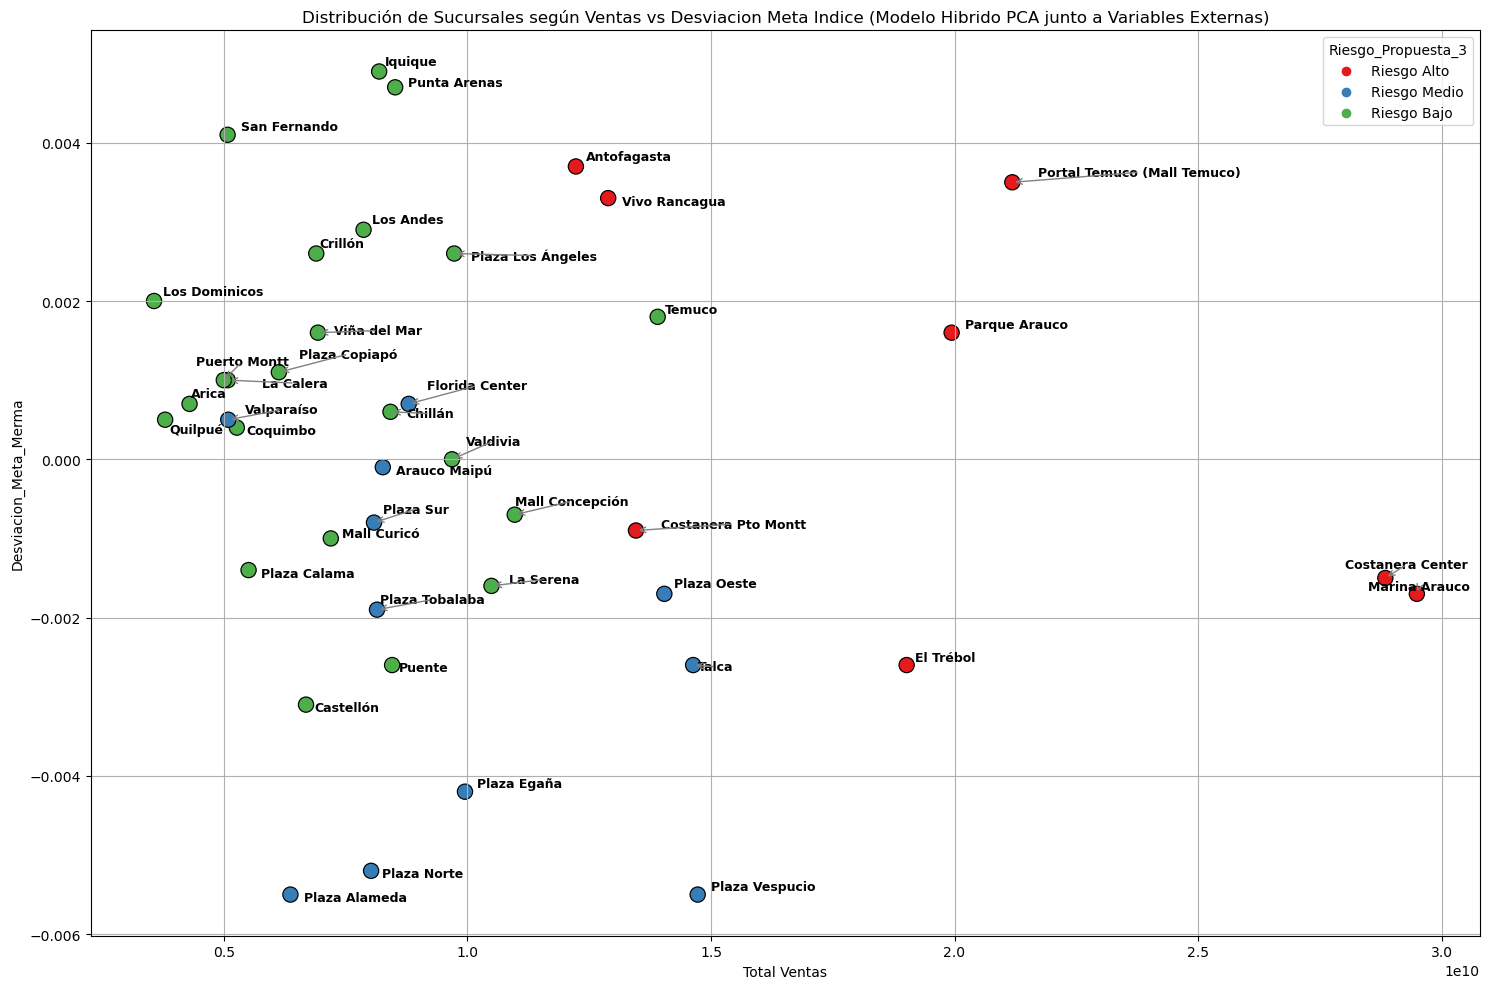

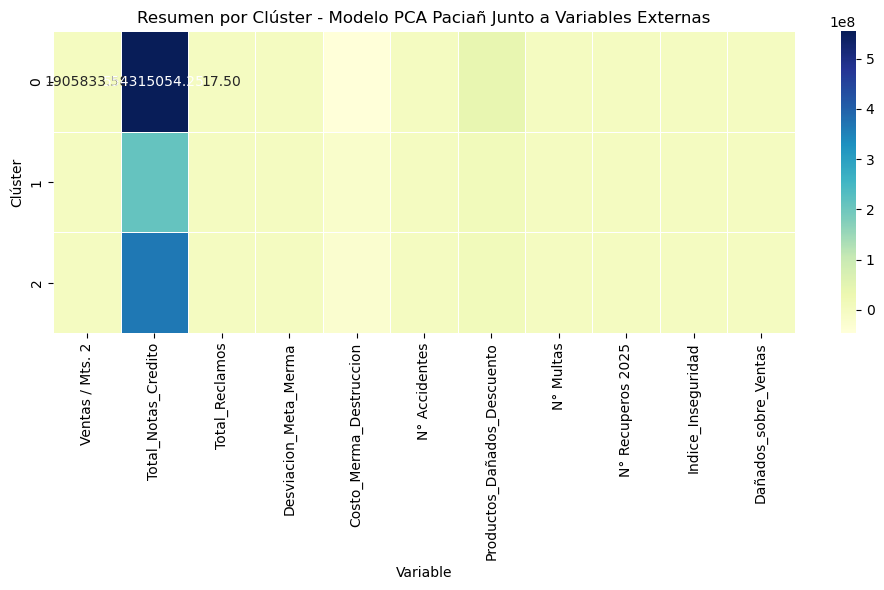


✅ Resumen de clústeres exportado correctamente con redondeo ajustado.


Ventas / Mts. 2  Total_Notas_Credito  Total_Reclamos  \
Clusters_Propuesta_3                                                         
0                          1905833.58         5.543151e+08           17.50   
1                          1213190.00         2.104485e+08            5.30   
2                          1172670.92         3.659640e+08           18.09   

                      Desviacion_Meta_Merma  Costo_Merma_Destruccion  \
Clusters_Propuesta_3                                                   
0                                   0.00068             -45565890.90   
1                                   0.00096             -18384156.73   
2                                  -0.00239             -25487099.37   

                      N° Accidentes  Productos_Dañados_Descuento  N° Multas  \
Clusters_Propuesta_3                                                          
0                             32.38                  39708990.25       1.75   
1                             15.74                  11450252.48       0.87   
2                             22.45                  12691026.27       0.27   

                      N° Recuperos 2025  Indice_Inseguridad  \
Clusters_Propuesta_3                                          
0                                223.25                0.50   
1                                121.65                0.63   
2                                478.91                0.27   

                      Dañados_sobre_Ventas  
Clusters_Propuesta_3                        
0                                      0.0  
1                                      0.0  
2                                      0.0

In [34]:
from sklearn.decomposition import PCA

Variables_PCA_correlacionadas = ["Total_Ventas", 'Total_Notas_Credito']
Variables_externas = ["Total_Reclamos", "Desviacion_Meta_Merma", "Costo_Merma_Destruccion", "N° Accidentes", "Productos_Dañados_Descuento", "N° Multas", "N° Recuperos 2025", "Indice Seguridad"]

print("--- Comenzamos con el escalamiento de las variables por separado tanto PCA como externas ---")
X_PCA_Variables_Correlaciones = MinMax_Scaler.fit_transform(Df_Kmeans[Variables_PCA_correlacionadas])
X_Variables_Externas = MinMax_Scaler.fit_transform(Df_Kmeans[Variables_externas])
PCA_Variables_Correlaciones = PCA(n_components=1, random_state=100)

X_PCA_Ventas_NC = PCA_Variables_Correlaciones.fit_transform(X_PCA_Variables_Correlaciones)
Df_PCA_NC = pd.DataFrame(X_PCA_Ventas_NC, columns=['PCA_Ventas_Notas_Credito'])

Df_Kmeans_Hibrido = pd.concat([Df_PCA_NC, pd.DataFrame(X_Variables_Externas, columns=Variables_externas)], axis=1)

print("--- Aplicamos K-Means al modelo hibrido ---")
Clusters_PCA_Hibrido = KMeans(n_clusters=K_optimo, random_state=100, n_init=50)
Clusters_PCA_Hibrido = Clusters_PCA_Hibrido.fit_predict(Df_Kmeans_Hibrido)          
Df_Kmeans['Clusters_Propuesta_3'] = Clusters_PCA_Hibrido 

mapping_riesgo_Propuesta_3 = {
    0: "Riesgo Alto",
    1: "Riesgo Bajo",
    2: "Riesgo Medio"
}
Df_Kmeans["Riesgo_Propuesta_3"] = Df_Kmeans["Clusters_Propuesta_3"].map(mapping_riesgo_Propuesta_3)

Resumen_Cluster_PCA_Hibrido = Df_Kmeans.groupby('Clusters_Propuesta_3')[Variables_Modelo].mean()

print("\n--- Perfil promedio de cada cluster (Propuesta 3 - Modelo Hibrido con Ventas / NC junto a Variables Externas) ---")
print(Resumen_Cluster_PCA_Hibrido)

### Generamos un grafico de comparacion de Clusters guiandonos en las ventas junto a la desviacion Meta Indice
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=Df_Kmeans,
    x='Total_Ventas',
    y='Desviacion_Meta_Merma',
    hue="Riesgo_Propuesta_3",
    palette='Set1',
    s=120,
    edgecolor='black'
)
### Generamos la funcion texto para que en el grafico generado nos aparezca a un lado el nombre de la sucursal para una mejor visualizacion junto a adjust text
texts_Standard = []
for i, txt in enumerate(Df_Kmeans['Nombre_Sucursal']):
    texts_Standard.append(
        plt.text(
            Df_Kmeans['Total_Ventas'].iloc[i], 
            Df_Kmeans['Desviacion_Meta_Merma'].iloc[i], 
            txt, fontsize=9, weight='bold'
        )
    )
adjust_text(texts_Standard, arrowprops=dict(arrowstyle='->', color='grey', lw=1), force_points=0.25)

plt.title('Distribución de Sucursales según Ventas vs Desviacion Meta Indice (Modelo Hibrido PCA junto a Variables Externas)')
plt.xlabel('Total Ventas')
plt.ylabel('Desviacion_Meta_Merma')
plt.grid(True)
plt.tight_layout()
plt.show()


# Visualización del Heatmap por clusters segun variables de Interes
plt.figure(figsize=(10, 6))
sns.heatmap(Resumen_Cluster_PCA_Hibrido, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Resumen por Clúster - Modelo PCA Paciañ Junto a Variables Externas')
plt.ylabel('Clúster')
plt.xlabel('Variable')
plt.tight_layout()
plt.show()

for col in Resumen_Cluster_PCA_Hibrido.columns:
    if col == 'Desviacion_Meta_Merma':
        Resumen_Cluster_PCA_Hibrido[col] = Resumen_Cluster_PCA_Hibrido[col].round(5)  # más precisión para variables pequeñas
    else:
        Resumen_Cluster_PCA_Hibrido[col] = Resumen_Cluster_PCA_Hibrido[col].round(2)

# Confirmación visual
print("\n✅ Resumen de clústeres exportado correctamente con redondeo ajustado.")
display(Resumen_Cluster_PCA_Hibrido)





In [35]:
Score_Propuesta_3 = silhouette_score(Df_Kmeans_Hibrido, Clusters_PCA_Hibrido)
print(f"Silhouette Score para Clusters_Weighted: {Score_Propuesta_3:.4f}")

Silhouette Score para Clusters_Weighted: 0.2220


#### Propuesat 4 Modelo Cluserting K Means con Weights asignados


--- Perfil promedio de cada cluster (Propuesta 4 - MinMax+Pesos) ---
                    Ventas / Mts. 2  Total_Notas_Credito  \
Riesgo_Propuesta_4                                         
Riesgo Alto              1305554.07         3.150330e+08   
Riesgo Bajo              2070489.82         5.361463e+08   
Riesgo Medio             1136880.74         2.521517e+08   

                    Desviacion_Meta_Merma  Productos_Dañados_Descuento  \
Riesgo_Propuesta_4                                                       
Riesgo Alto                          -0.0                  14178973.19   
Riesgo Bajo                           0.0                  47753699.00   
Riesgo Medio                          0.0                  10362162.65   

                    Costo_Merma_Destruccion  N° Accidentes  Total_Reclamos  \
Riesgo_Propuesta_4                                                           
Riesgo Alto                    -24538905.24          20.12           11.06   
Riesgo Bajo             

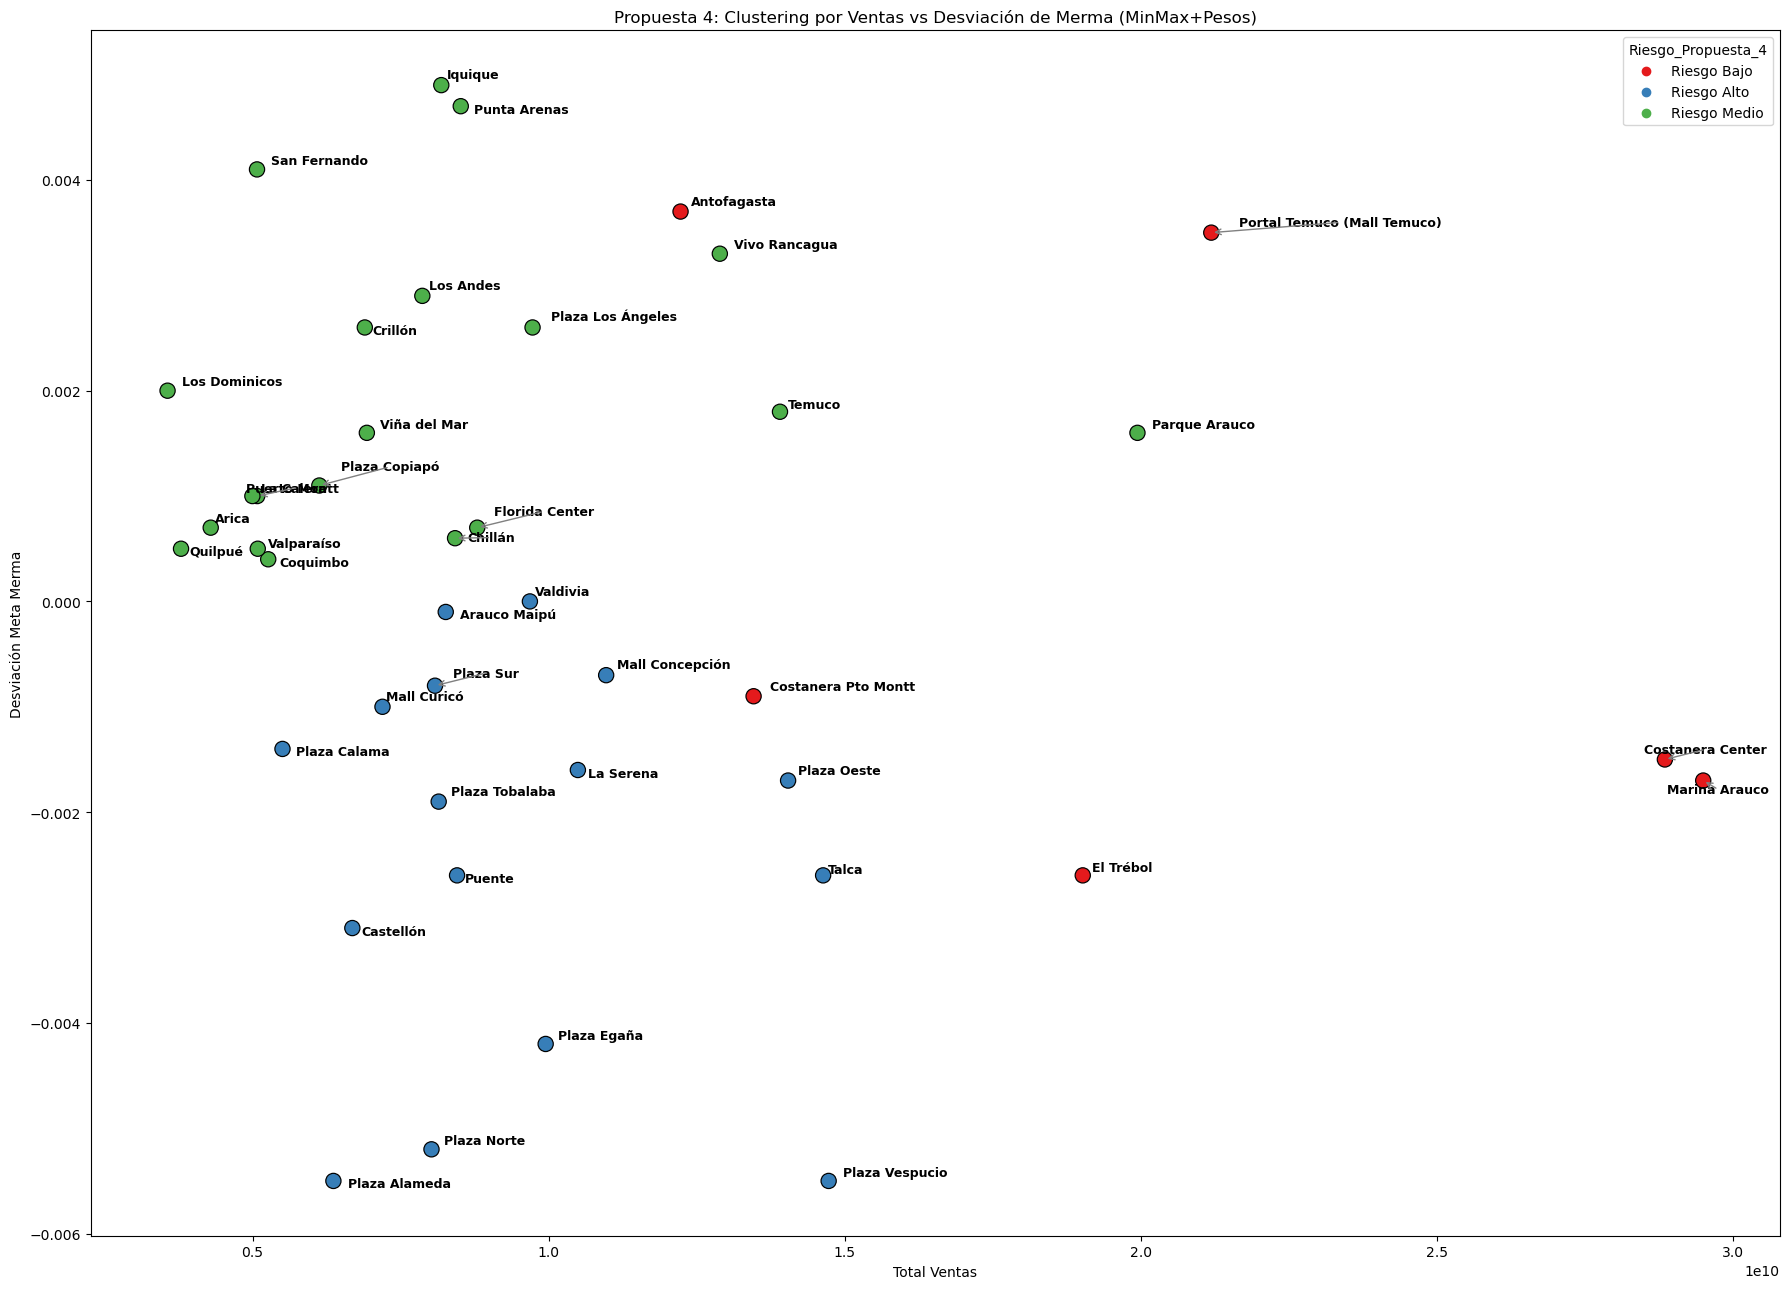


Sucursales en Cluster Riesgo Alto:
['Arauco Maipú', 'Castellón', 'La Serena', 'Mall Concepción', 'Mall Curicó', 'Plaza Alameda', 'Plaza Calama', 'Plaza Egaña', 'Plaza Norte', 'Plaza Oeste', 'Plaza Sur', 'Plaza Tobalaba', 'Plaza Vespucio', 'Puente', 'Talca', 'Valdivia']

Sucursales en Cluster Riesgo Bajo:
['Antofagasta', 'Costanera Center', 'Costanera Pto Montt', 'El Trébol', 'Marina Arauco', 'Portal Temuco (Mall Temuco)']

Sucursales en Cluster Riesgo Medio:
['Arica', 'Chillán', 'Coquimbo', 'Crillón', 'Florida Center', 'Iquique', 'La Calera', 'Los Andes', 'Los Dominicos', 'Parque Arauco', 'Plaza Copiapó', 'Plaza Los Ángeles', 'Puerto Montt', 'Punta Arenas', 'Quilpué', 'San Fernando', 'Temuco', 'Valparaíso', 'Vivo Rancagua', 'Viña del Mar']


In [36]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score


Weights = {
    'Ventas / Mts. 2': 0.140,
    'Total_Notas_Credito': 0.085,
    'Desviacion_Meta_Merma': 0.18,
    'Productos_Dañados_Descuento': 0.140,
    'Costo_Merma_Destruccion': 0.18,
    'N° Accidentes': 0.0725,
    'Total_Reclamos': 0.0725,
    "N° Multas": 0.0325,
    "N° Recuperos 2025": 0.0425,
    "Indice_Inseguridad": 0.015,
    "Dañados_sobre_Ventas": 0.040
}
Variables_Modelo_Weights = list(Weights.keys())

# --- 3. Limpiar posibles columnas duplicadas ---
Df_Kmeans = Df_Kmeans.loc[:, ~Df_Kmeans.columns.duplicated()]
if 'Cluster_MixMax_Weighted' in Df_Kmeans.columns:
    Df_Kmeans = Df_Kmeans.drop(columns=['Cluster_MixMax_Weighted'])

# --- 4. Escalamiento MinMax y aplicación de pesos ---
MinMax_Scaler = MinMaxScaler()
X_Scaled_MinMax = MinMax_Scaler.fit_transform(Df_Kmeans[Variables_Modelo_Weights])

# Aplicar los pesos a cada columna
X_Weighted_MinMax = X_Scaled_MinMax * [Weights[col] for col in Variables_Modelo_Weights]

# --- 5. KMeans Clustering ---
kmeans_Weighted = KMeans(n_clusters=3, random_state=100, n_init=17,  init='k-means++', max_iter=500, tol=0.00002, algorithm='lloyd')
Clusters_Weighted = kmeans_Weighted.fit_predict(X_Weighted_MinMax)

# --- 6. Añadir columna de cluster  ---
Df_Kmeans['Cluster_MixMax_Weighted'] = Clusters_Weighted
Df_Kmeans["Riesgo_Propuesta_4"] = Df_Kmeans["Cluster_MixMax_Weighted"].map(
    {
        0: "Riesgo Bajo",
        1: "Riesgo Medio",
        2: "Riesgo Alto"
    }
)

# --- 7. Resumen de clústeres ---
Resumen_Cluster_Propuesta_3 = Df_Kmeans.groupby('Riesgo_Propuesta_4')[Variables_Modelo_Weights].mean().round(2)
print("\n--- Perfil promedio de cada cluster (Propuesta 4 - MinMax+Pesos) ---")
print(Resumen_Cluster_Propuesta_3)

# --- 8. Visualización básica (ventas vs desviación de merma, por cluster) ---
plt.figure(figsize=(18, 13))
sns.scatterplot(
    data=Df_Kmeans,
    x='Total_Ventas',
    y='Desviacion_Meta_Merma',
    hue='Riesgo_Propuesta_4',
    palette='Set1',
    s=120,
    edgecolor='black'
)

# Crear una lista para ajustar etiquetas automáticamente
texts_MinMax = []
for i, txt in enumerate(Df_Kmeans['Nombre_Sucursal']):
    texts_MinMax.append(
        plt.text(
            Df_Kmeans['Total_Ventas'].iloc[i], 
            Df_Kmeans['Desviacion_Meta_Merma'].iloc[i], 
            txt, fontsize=9, weight='bold'
        )
    )
# Ajuste automático de etiquetas
adjust_text(texts_MinMax, arrowprops=dict(arrowstyle='->', color='grey', lw=1), force_points=0.25)

plt.title('Propuesta 4: Clustering por Ventas vs Desviación de Merma (MinMax+Pesos)')
plt.xlabel('Total Ventas')
plt.ylabel('Desviación Meta Merma')
plt.tight_layout()
plt.show()

# --- 9. Mostrar sucursales de cada cluster ---
for c in sorted(Df_Kmeans['Riesgo_Propuesta_4'].unique()):
    nombres = Df_Kmeans[Df_Kmeans['Riesgo_Propuesta_4'] == c]['Nombre_Sucursal'].tolist()
    print(f"\nSucursales en Cluster {c}:")
    print(nombres)


In [37]:
Score_Propuesta_4 = silhouette_score(X_Weighted_MinMax, Clusters_Weighted)
print(f"Silhouette Score para Clusters_Weighted: {Score_Propuesta_4:.4f}")

Silhouette Score para Clusters_Weighted: 0.2375


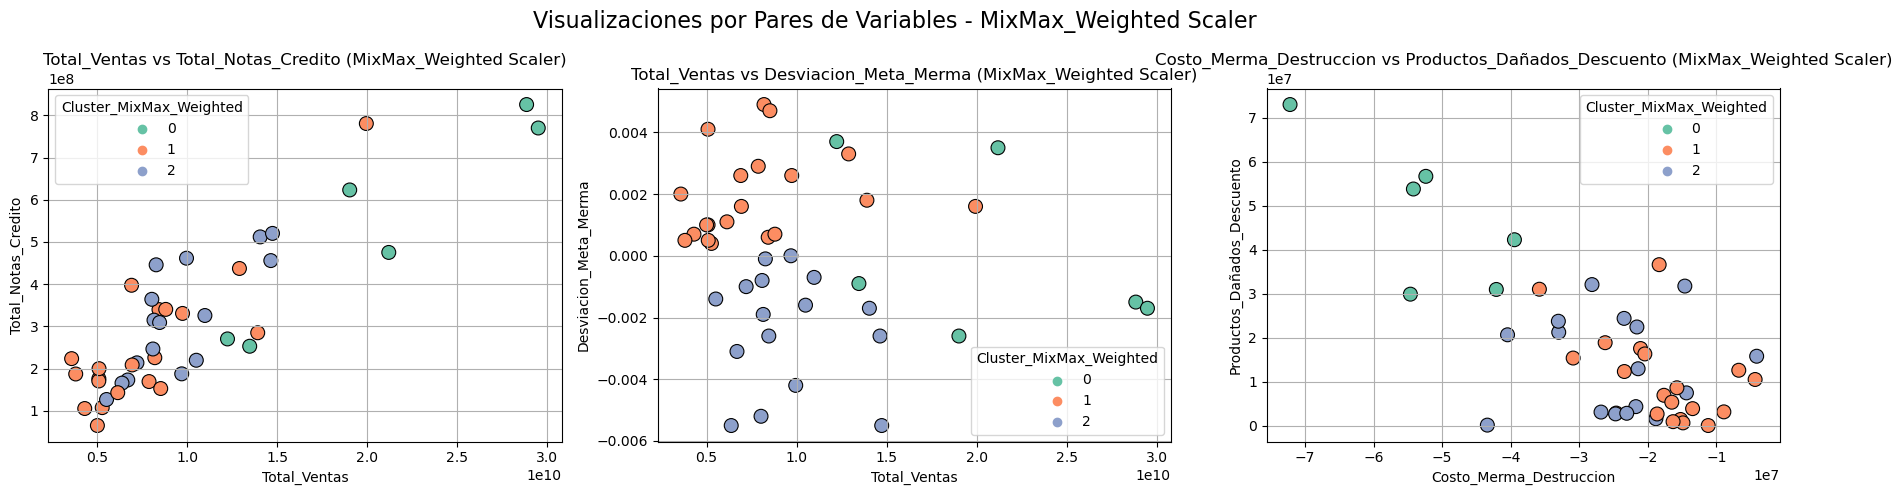

In [38]:
### Opcional

import matplotlib.pyplot as plt
import seaborn as sns

# Variables con mayor peso primero (ordenadas)
top_variables = [
    ('Total_Ventas', 'Total_Notas_Credito'),
    ('Total_Ventas', 'Desviacion_Meta_Merma'),
    ('Costo_Merma_Destruccion', 'Productos_Dañados_Descuento')
]

# Crear visualizaciones por escalador
for scaler in ['MixMax_Weighted']:
    plt.figure(figsize=(18, 5))
    for i, (x_var, y_var) in enumerate(top_variables):
        plt.subplot(1, 3, i+1)
        sns.scatterplot(
            data=Df_Kmeans,
            x=x_var,
            y=y_var,
            hue=f'Cluster_{scaler}',
            palette='Set2',
            s=100,
            edgecolor='black'
        )
        plt.title(f'{x_var} vs {y_var} ({scaler} Scaler)')
        plt.xlabel(x_var)
        plt.ylabel(y_var)
        plt.grid(True)

    plt.suptitle(f'Visualizaciones por Pares de Variables - {scaler} Scaler', fontsize=16)
    plt.tight_layout()
    plt.show()


In [39]:
Df_Kmeans.to_excel("Resumen_Cluster_Propuestas_2025.xlsx", index=False)

##### Realizamos el Grafico pero ahora con Codigos Proporcionados por Chat GPT 5 Thinking con el fin de una mejora en la visualizacion 

In [40]:
Variables_Modelo = [
    "Total_Ventas", "Total_Notas_Credito",
    "Total_Reclamos", "Desviacion_Meta_Merma",
    "Costo_Merma_Destruccion", "N° Accidentes",
    "Productos_Dañados_Descuento", "N° Multas",
    "N° Recuperos 2025", "Indice_Inseguridad"
]

Variables_Modelo_Prueba = [
    "Total_Ventas", "Total_Notas_Credito",
    "Total_Reclamos", "Desviacion_Meta_Merma",
    "Costo_Merma_Destruccion", "N° Accidentes",
    "Productos_Dañados_Descuento", "N° Recuperos 2025", "Indice_Inseguridad"
]

Weights_Prueba = {
    "Total_Ventas": 0.14,
    "Total_Notas_Credito": 0.14,
    "Desviacion_Meta_Merma": 0.14,
    "Productos_Dañados_Descuento": 0.14,
    "Costo_Merma_Destruccion": 0.14,
    "N° Accidentes": 0.08,
    "Total_Reclamos": 0.08,
    "N° Recuperos 2025": 0.08,
    "Indice_Inseguridad": 0.06,  
}


In [42]:
###  Total_Ventas                 0.158
#Total_Notas_Credito          0.106
#Total_Reclamos               0.095
#Desviacion_Meta_Merma        0.098
#Costo_Merma_Destruccion      0.153
#N° Accidentes                0.098
#Productos_Dañados_Descuento  0.166
#N° Multas                    0.020
#N° Recuperos 2025            0.030
#Indice_Inseguridad           0.077


#Weights = {
    #'Total_Ventas': 0.158,
    #'Total_Notas_Credito': 0.106,
    #'Desviacion_Meta_Merma': 0.130,
    #'Productos_Dañados_Descuento': 0.160,
    #'Costo_Merma_Destruccion': 0.153,
    #'N° Accidentes': 0.098,
    #'Total_Reclamos': 0.095,
    #"N° Multas": 0.02,
    #"N° Recuperos 2025": 0.03,
    #"Indice_Inseguridad": 0.05

#}

#Weights = {
    #'Total_Ventas': 0.140,
    #'Total_Notas_Credito': 0.100,
    #'Desviacion_Meta_Merma': 0.145,
    #'Productos_Dañados_Descuento': 0.205,
    #'Costo_Merma_Destruccion': 0.180,
    #'N° Accidentes': 0.070,
    #'Total_Reclamos': 0.070,
    #"N° Multas": 0.030,
    #"N° Recuperos 2025": 0.06,
    #"Indice_Inseguridad": 0.010
#}




In [43]:
# --- 1) Ventas totales (si no la tienes, la reconstruimos con m²)
if 'Total_Ventas' in Df_Kmeans.columns:
    ventas_total_proxy = pd.to_numeric(Df_Kmeans['Total_Ventas'], errors='coerce')
else:
    ventas_total_proxy = pd.to_numeric(Df_Kmeans['Ventas / Mts. 2'], errors='coerce') * \
                         pd.to_numeric(Df_Kmeans['Mts. 2'], errors='coerce')

danados = pd.to_numeric(Df_Kmeans['Productos_Dañados_Descuento'], errors='coerce')

Df_Kmeans['Dañados_sobre_Ventas'] = (danados / ventas_total_proxy).replace([np.inf, -np.inf], np.nan)

# Winsorizar suave (1–99%) para que outliers extremos no dominen
q01, q99 = Df_Kmeans['Dañados_sobre_Ventas'].quantile([0.01, 0.99])
Df_Kmeans['Dañados_sobre_Ventas'] = Df_Kmeans['Dañados_sobre_Ventas'].clip(q01, q99)
Df_Kmeans['Dañados_sobre_Ventas'] = pd.to_numeric(Df_Kmeans['Dañados_sobre_Ventas'])


In [44]:
Variables_Modelo = [
    "Ventas / Mts. 2", "Total_Notas_Credito",
    "Total_Reclamos", "Desviacion_Meta_Merma",
    "Costo_Merma_Destruccion", "N° Accidentes",
    "Productos_Dañados_Descuento", "N° Multas",
    "N° Recuperos 2025", "Indice_Inseguridad",
]

Weights = {
    'Ventas / Mts. 2': 0.13,
    'Total_Notas_Credito': 0.100,
    'Desviacion_Meta_Merma': 0.155,
    'Productos_Dañados_Descuento': 0.145,
    'Costo_Merma_Destruccion': 0.14,
    'N° Accidentes': 0.070,
    'Total_Reclamos': 0.070,
    "N° Multas": 0.03,
    "N° Recuperos 2025": 0.050,
    "Indice_Inseguridad": 0.010, 
}



# Búsqueda de k en el mismo espacio (MinMax + pesos)
k_grid_v8 = [3, 4, 5, 6]
rs_v8 = 42  

# Flexibilidad con la columna de sucursal 
cand_cols_v8 = [c for c in Df_Kmeans.columns if c.lower() in
                ['nombre_sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']]
col_sucursal_v8 = cand_cols_v8[0] if cand_cols_v8 else None

# -------- 1) Subset y MinMax --------
X_Kmeans_2025 = Df_Kmeans[Variables_Modelo].astype(float).copy()
MinMax_Scaler = MinMaxScaler()
X_MinMax_Scaled = pd.DataFrame(
    MinMax_Scaler.fit_transform(X_Kmeans_2025),
    index=Df_Kmeans.index,
    columns=Variables_Modelo
)

# -------- 2) Ponderación geométrica (para K-Means) con sqrt(peso) --------
Vector_Weights = np.array([Weights[v] for v in Variables_Modelo], dtype=float)
Sqrt_Weights = np.sqrt(Vector_Weights)  # asegura contribución ~ peso en distancia euclídea

X_weighted_MinMax_2025 = X_MinMax_Scaled.values * Sqrt_Weights

# -------- 4) K-Means final --------
kmeans_Weighted_2025 = KMeans(n_clusters=3, random_state=100, n_init=50, init="k-means++", algorithm="lloyd")

Clusters_Weighted_2025 = kmeans_Weighted_2025.fit_predict(X_weighted_MinMax_2025)

# --- 5. Añadir columna de cluster  ---
Df_Kmeans['Cluster_MixMax_Weighted_2025'] = Clusters_Weighted_2025

# -------- 5) Risk score (ponderación lineal con pesos) --------
# Nota: aquí usamos PESO (no sqrt) para el score operativo
Matriz_Risk = X_MinMax_Scaled.copy()

# Aplicar solo los pesos cuyas columnas existan en la matriz (evita KeyError por columnas ausentes)
missing_cols = [col for col in Weights.keys() if col not in Matriz_Risk.columns]
for col, w in Weights.items():
    if col in Matriz_Risk.columns:
        Matriz_Risk[col] = Matriz_Risk[col] * w

# Informar (de forma no bloqueante) si había pesos para columnas que no están en los datos
if missing_cols:
    print(f"(Nota) Se ignoraron pesos para columnas ausentes: {missing_cols}")

Score_Risk = Matriz_Risk.sum(axis=1)

# -------- 6) Etiquetado automático por riesgo --------
Df_Risk_Propuesta_6 = pd.DataFrame({"Cluster_id": Clusters_Weighted_2025, "Risk": Score_Risk})
Df_Risk_Promedio_Propúesta_6 = Df_Risk_Propuesta_6.groupby("Cluster_id")["Risk"].mean().sort_values()  
Mappin_Propuesta_6 = {cid: rank for rank, cid in enumerate(Df_Risk_Promedio_Propúesta_6.index)}      
Columnas_Mapping_Propuesta_6 = {0:"Riesgo Bajo", 1:"Riesgo Medio", 2:"Riesgo Alto", 3:"Riesgo Muy Alto"}

Cluster_Mapping_Propuesta_6 = Df_Risk_Propuesta_6["Cluster_id"].map(Mappin_Propuesta_6)
Cluster_Columnas_Propuesta_6 = Cluster_Mapping_Propuesta_6.map(Columnas_Mapping_Propuesta_6)

# -------- 7) Reporte final --------
Reporte_Columnas = [col_sucursal_v8] if col_sucursal_v8 else []
Reporte_Propuesta_6 = pd.concat([
    Df_Kmeans[Reporte_Columnas],
    pd.DataFrame({
        "Cluster_P3_MinMax_Pesos": Clusters_Weighted_2025,
        "Riesgo_P3_MinMax_Pesos": Cluster_Columnas_Propuesta_6.values,
        "RiskScore_P3": Score_Risk.values
    }, index=Df_Kmeans.index),
    X_Kmeans_2025
], axis=1)

# -------- 8) Perfil de clústeres --------
Perfil_Cluster_Propuesta_6 = (Reporte_Propuesta_6
                .groupby("Riesgo_P3_MinMax_Pesos")[Variables_Modelo]
                .mean())

# Ajuste de redondeo 
Perfil_Cluster_Propuesta_6 = Perfil_Cluster_Propuesta_6.copy()
for c in Perfil_Cluster_Propuesta_6.columns:
    Perfil_Cluster_Propuesta_6[c] = Perfil_Cluster_Propuesta_6[c].round(5 if c == "Desviacion_Meta_Merma" else 2)

# -------- 9) Top sucursales a auditar (dentro del riesgo más alto) --------
if Cluster_Columnas_Propuesta_6.isin(["Riesgo Alto","Riesgo Muy Alto"]).any():
    Nivel_Top_Propuesta_6 = "Riesgo Muy Alto" if "Riesgo Muy Alto" in Cluster_Columnas_Propuesta_6.values else "Riesgo Alto"
    Mask_Top_Propuesta_6 = (Cluster_Columnas_Propuesta_6.values == Nivel_Top_Propuesta_6)
    Top_Sucursales_Propuesta_6 = (Reporte_Propuesta_6.loc[Mask_Top_Propuesta_6]
                   .sort_values("RiskScore_P3", ascending=False)
                   .head(10))
else:
    Top_Sucursales_Propuesta_6 = (Reporte_Propuesta_6
                   .sort_values("RiskScore_P3", ascending=False)
                   .head(10))

# Prints de control (conservadores, no muy verbosos)
print("\n=== Propuesta 6 — MinMax + Pesos ===")
print("\n-- Perfil por nivel de riesgo --")
print(Perfil_Cluster_Propuesta_6)
if col_sucursal_v8:
    print("\n-- Top 10 sucursales para auditoría (según RiskScore_P3) --")
    print(Top_Sucursales_Propuesta_6[[col_sucursal_v8, "Riesgo_P3_MinMax_Pesos", "RiskScore_P3"]].to_string(index=False))
else:
    print("\n(Nota) No se detectó columna de sucursal; se listan índices.")
    print(Top_Sucursales_Propuesta_6[["Riesgo_P3_MinMax_Pesos", "RiskScore_P3"]].to_string(index=False))


=== Propuesta 6 — MinMax + Pesos ===

-- Perfil por nivel de riesgo --
                        Ventas / Mts. 2  Total_Notas_Credito  Total_Reclamos  \
Riesgo_P3_MinMax_Pesos                                                         
Riesgo Alto                  2070489.82         5.361463e+08           11.67   
Riesgo Bajo                  1069352.48         1.965213e+08            4.53   
Riesgo Medio                 1339341.46         3.548789e+08           16.53   

                        Desviacion_Meta_Merma  Costo_Merma_Destruccion  \
Riesgo_P3_MinMax_Pesos                                                   
Riesgo Alto                           0.00008             -52483899.28   
Riesgo Bajo                           0.00166             -15257273.35   
Riesgo Medio                         -0.00145             -25970725.39   

                        N° Accidentes  Productos_Dañados_Descuento  N° Multas  \
Riesgo_P3_MinMax_Pesos                                                     

In [45]:
#### Somos Sensibles a Sucursales con Productos Dañados muy altos dentro del Riesgo Bajo
pctl = Reporte_Propuesta_6['Productos_Dañados_Descuento'].quantile(0.85)  # p85 (ajustable)
mask_up = (Reporte_Propuesta_6['Riesgo_P3_MinMax_Pesos']=='Riesgo Bajo') & \
          (Reporte_Propuesta_6['Productos_Dañados_Descuento']>=pctl)

Reporte_Propuesta_6['Riesgo_final'] = Reporte_Propuesta_6['Riesgo_P3_MinMax_Pesos']
Reporte_Propuesta_6.loc[mask_up, 'Riesgo_final'] = 'Riesgo Medio'


In [46]:

# --- Usar la etiqueta de negocio "Riesgo_final" en los gráficos ---

# 1) Nombre consistente en Df_Kmeans
if 'Riesgo Final' in Reporte_Propuesta_6.columns and 'Riesgo_final' not in Reporte_Propuesta_6.columns:
    Reporte_Propuesta_6.rename(columns={'Riesgo Final': 'Riesgo_final'}, inplace=True)

# 2) Asegurar que el reporte tenga Riesgo_final (si no, lo traemos desde Df_Kmeans)
if 'Riesgo_final' not in Reporte_Propuesta_6.columns:
    if 'Riesgo_final' in Reporte_Propuesta_6.columns:
        # alineamos por índice; si no coincide, alineamos por Nombre_Sucursal
        if Reporte_Propuesta_6.index.equals(Reporte_Propuesta_6.index):
            Reporte_Propuesta_6['Riesgo_final'] = Reporte_Propuesta_6['Riesgo_final']
        else:
            # merge suave por nombre de sucursal si existe esa columna
            _name_col = None
            for c in ['Nombre_Sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']:
                if c in Reporte_Propuesta_6.columns and c in Reporte_Propuesta_6.columns:
                    _name_col = c; break
            if _name_col:
                Reporte_Propuesta_6 = (Reporte_Propuesta_6
                    .drop(columns=['Riesgo_final'], errors='ignore')
                    .merge(Reporte_Propuesta_6[[_name_col,'Riesgo_final']], on=_name_col, how='left'))
    # si aún no existe, caer al clustering original
    if 'Riesgo_final' not in Reporte_Propuesta_6.columns:
        Reporte_Propuesta_6['Riesgo_final'] = Reporte_Propuesta_6['Riesgo_P3_MinMax_Pesos']

# 3) Vector definitivo para pintar
Riesgo_plot = (Reporte_Propuesta_6['Riesgo_final']
               .fillna(Reporte_Propuesta_6['Riesgo_P3_MinMax_Pesos'])
               .values)

# 4) Orden de niveles para los bucles de pintado
niveles_riesgo = ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]

# 5) (Debug) verifica Quilpué y Plaza Calama
if 'Nombre_Sucursal' in Reporte_Propuesta_6.columns:
    _mask_qc = Reporte_Propuesta_6['Nombre_Sucursal'].str.lower().isin(['quilpue','plaza calama'])
    print("\nChequeo etiquetas finales (Quilpué / Plaza Calama):")
    print(Reporte_Propuesta_6.loc[_mask_qc, ['Nombre_Sucursal',
                                             'Riesgo_P3_MinMax_Pesos',
                                             'Riesgo_final']].to_string(index=False))



Chequeo etiquetas finales (Quilpué / Plaza Calama):
Nombre_Sucursal Riesgo_P3_MinMax_Pesos Riesgo_final
   Plaza Calama            Riesgo Bajo Riesgo Medio


In [47]:
# === Overlay de negocio para el REPORTE (drop-in) ===
# Base: partimos del riesgo del clustering
Reporte_Propuesta_6['Riesgo_final'] = Reporte_Propuesta_6['Riesgo_P3_MinMax_Pesos'].values

# Columna de nombre (para comprobaciones/match)
_name_col = None
for c in ['Nombre_Sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']:
    if c in Reporte_Propuesta_6.columns:
        _name_col = c; break

# Ratio desde Df_Kmeans alineado por índice (misma cantidad/orden de filas)
ratio_rep = pd.to_numeric(Df_Kmeans['Dañados_sobre_Ventas'], errors='coerce').reindex(Reporte_Propuesta_6.index)

# Umbral (p85) y máscaras
pctl = ratio_rep.quantile(0.85)
mask_bajo = Reporte_Propuesta_6['Riesgo_final'].eq('Riesgo Bajo')
mask_ratio = ratio_rep >= pctl

# Forzar por nombre (case-insensitive) SOLO si están en Bajo
if _name_col:
    names_norm = Reporte_Propuesta_6[_name_col].astype(str).str.lower().str.strip()
    mask_forzadas = names_norm.isin(['quilpue','plaza calama'])
else:
    mask_forzadas = False

# Aplicar overlay: si era Bajo y (ratio alto O forzada) => Medio
mask_up = mask_bajo & (mask_ratio | mask_forzadas)
Reporte_Propuesta_6.loc[mask_up, 'Riesgo_final'] = 'Riesgo Medio'

# Vector definitivo para colorear
Riesgo_plot = Reporte_Propuesta_6['Riesgo_final'].values
niveles_riesgo = ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]

# Debug rápido: verificar casos clave
if _name_col:
    m_qc = names_norm.isin(['quilpue','plaza calama'])
    print("\nChequeo etiquetas finales (Quilpué / Plaza Calama):")
    print(Reporte_Propuesta_6.loc[m_qc, [_name_col,'Riesgo_P3_MinMax_Pesos','Riesgo_final']].to_string(index=False))
    print("Subidas por regla:", int(mask_up.sum()))



Chequeo etiquetas finales (Quilpué / Plaza Calama):
Nombre_Sucursal Riesgo_P3_MinMax_Pesos Riesgo_final
   Plaza Calama            Riesgo Bajo Riesgo Medio
Subidas por regla: 3


In [48]:
# --- Excepción puntual: mantener "los dominicos" como en el clustering original ---
_name_col = None
for c in ['Nombre_Sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']:
    if c in Reporte_Propuesta_6.columns:
        _name_col = c; break

if _name_col:
    names_norm = Reporte_Propuesta_6[_name_col].astype(str).str.lower().str.strip()
    mask_dominicos = names_norm.eq('los dominicos')
    # revertir a la etiqueta original del clustering para ese caso
    Reporte_Propuesta_6.loc[mask_dominicos, 'Riesgo_final'] = \
        Reporte_Propuesta_6.loc[mask_dominicos, 'Riesgo_P3_MinMax_Pesos'].values

    # (debug) verificar
    print(Reporte_Propuesta_6.loc[mask_dominicos, [_name_col,'Riesgo_P3_MinMax_Pesos','Riesgo_final']])


   Nombre_Sucursal Riesgo_P3_MinMax_Pesos Riesgo_final
15   Los Dominicos            Riesgo Bajo  Riesgo Bajo



Centroides (escala 0–1 MinMax):
 Ventas / Mts. 2  Total_Notas_Credito  Total_Reclamos  Desviacion_Meta_Merma  Costo_Merma_Destruccion  N° Accidentes  Productos_Dañados_Descuento  N° Multas  N° Recuperos 2025  Indice_Inseguridad Riesgo_label
           0.701                0.620           0.260                  0.537                    0.289          0.695                        0.654      0.278              0.197               0.462  Riesgo Bajo
           0.297                0.173           0.086                  0.689                    0.836          0.221                        0.133      0.137              0.059               0.530 Riesgo Medio
           0.406                0.381           0.379                  0.389                    0.679          0.374                        0.194      0.114              0.276               0.418  Riesgo Alto

Listo:
 - grafico_A_PC1_danio_merma_v16.png
 - grafico_B_desv_meta_merma_v16.png


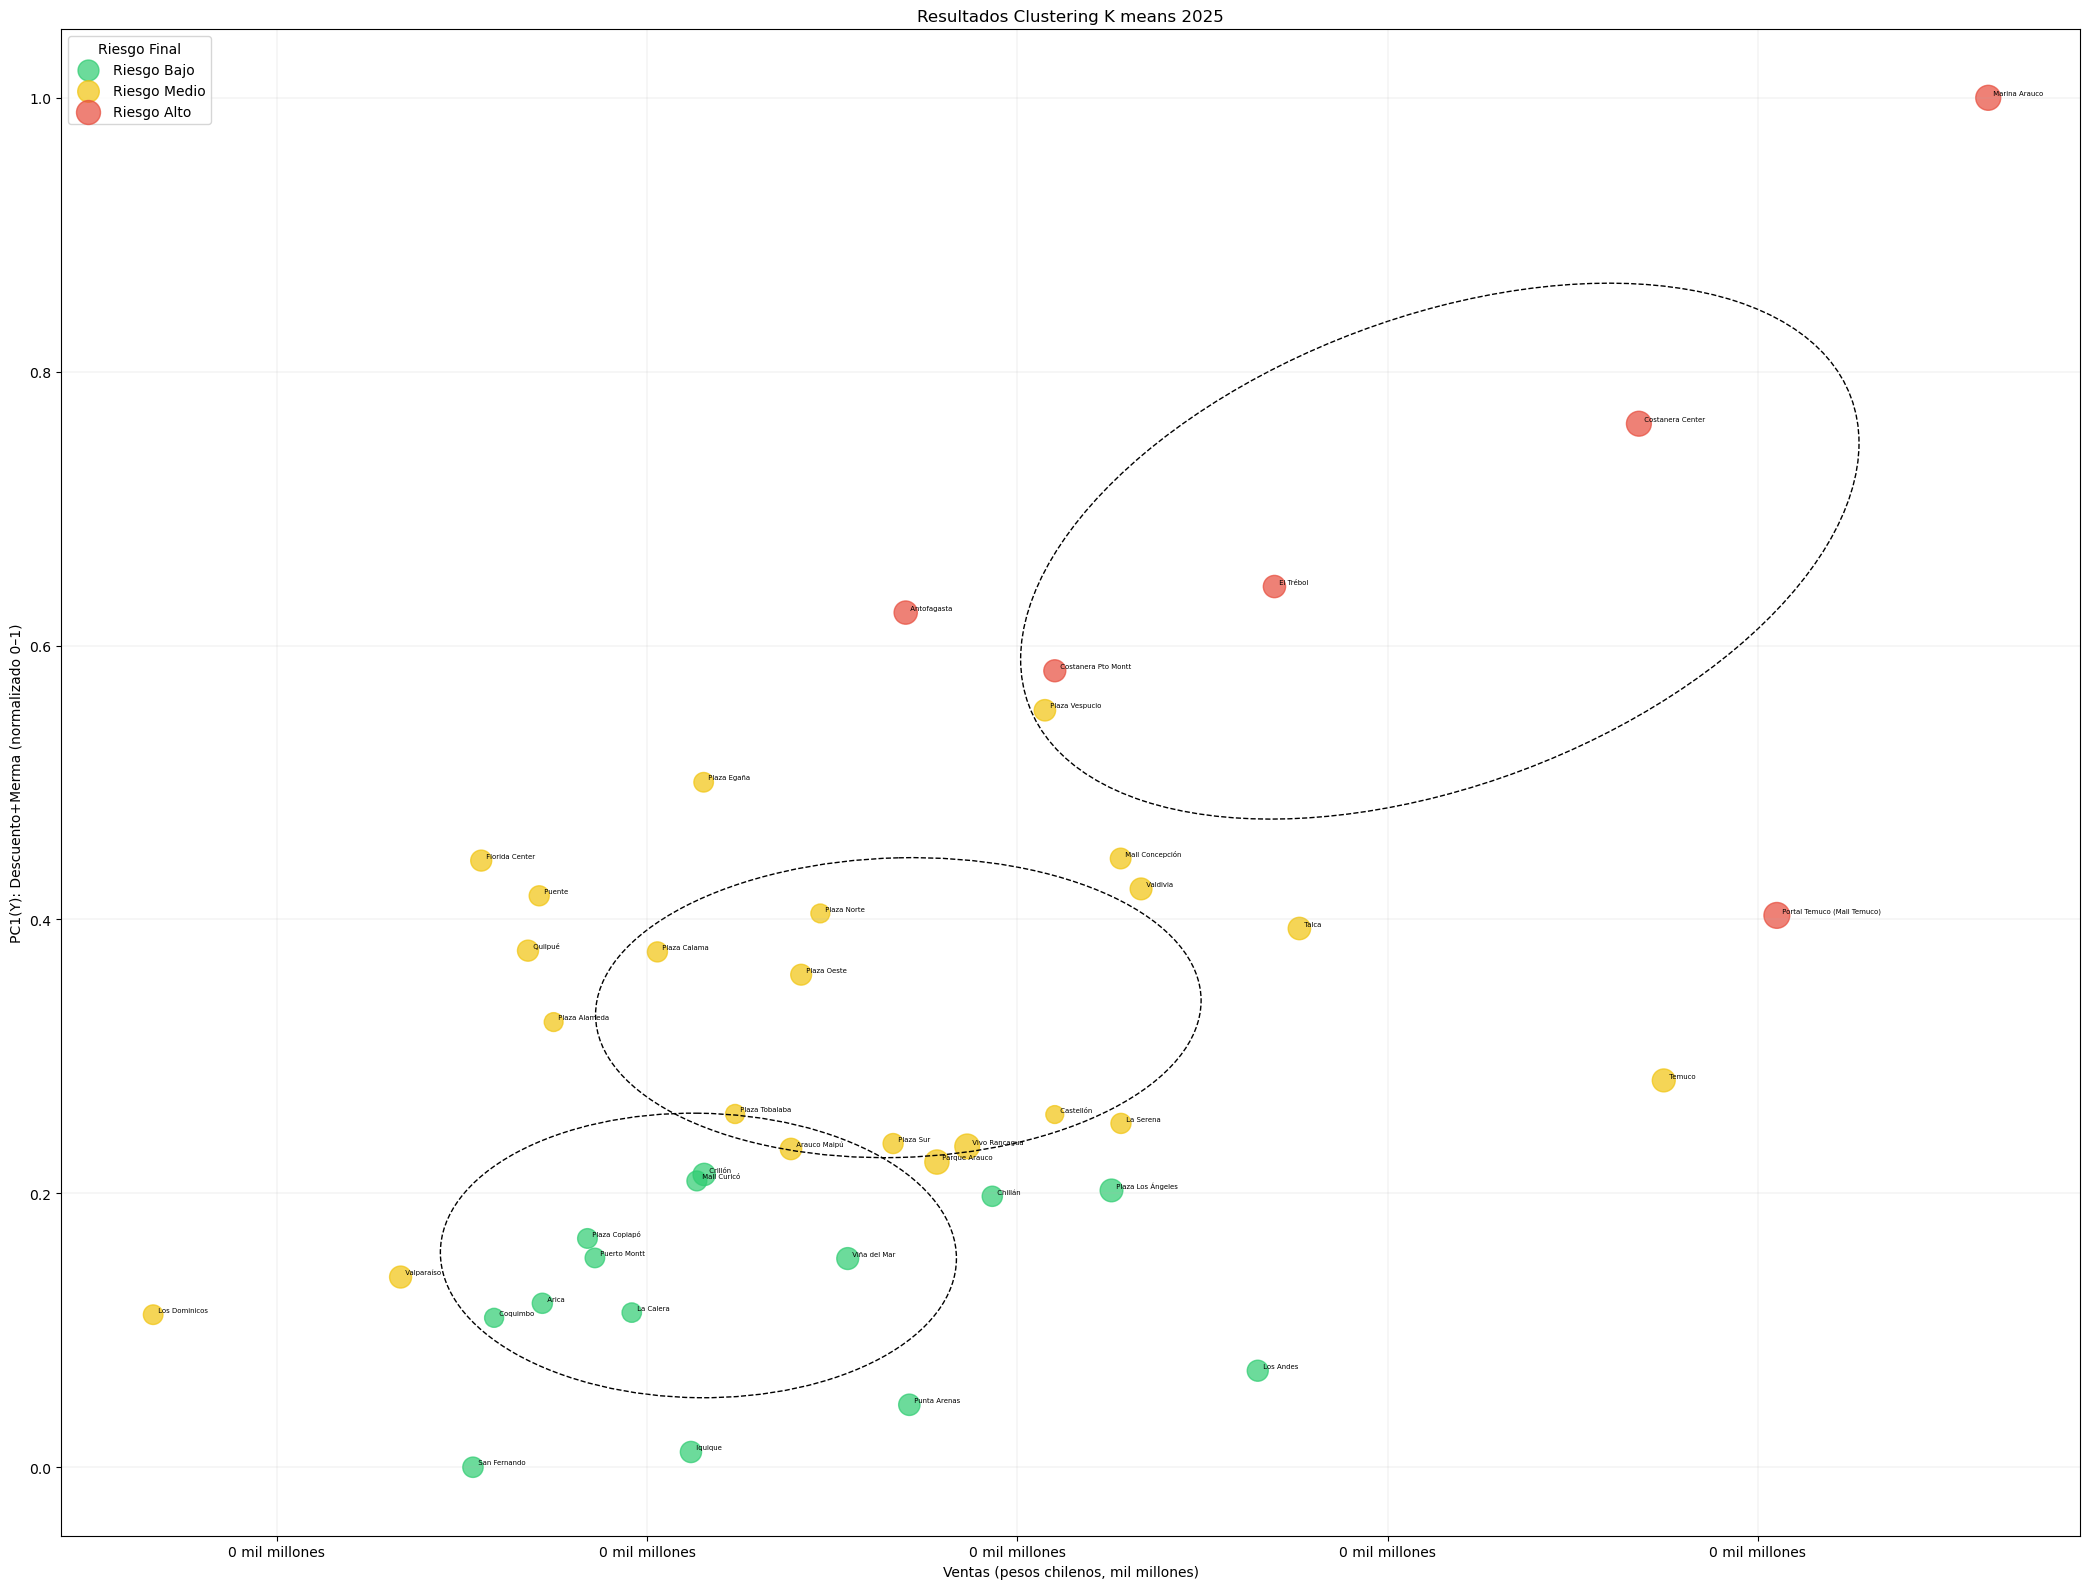

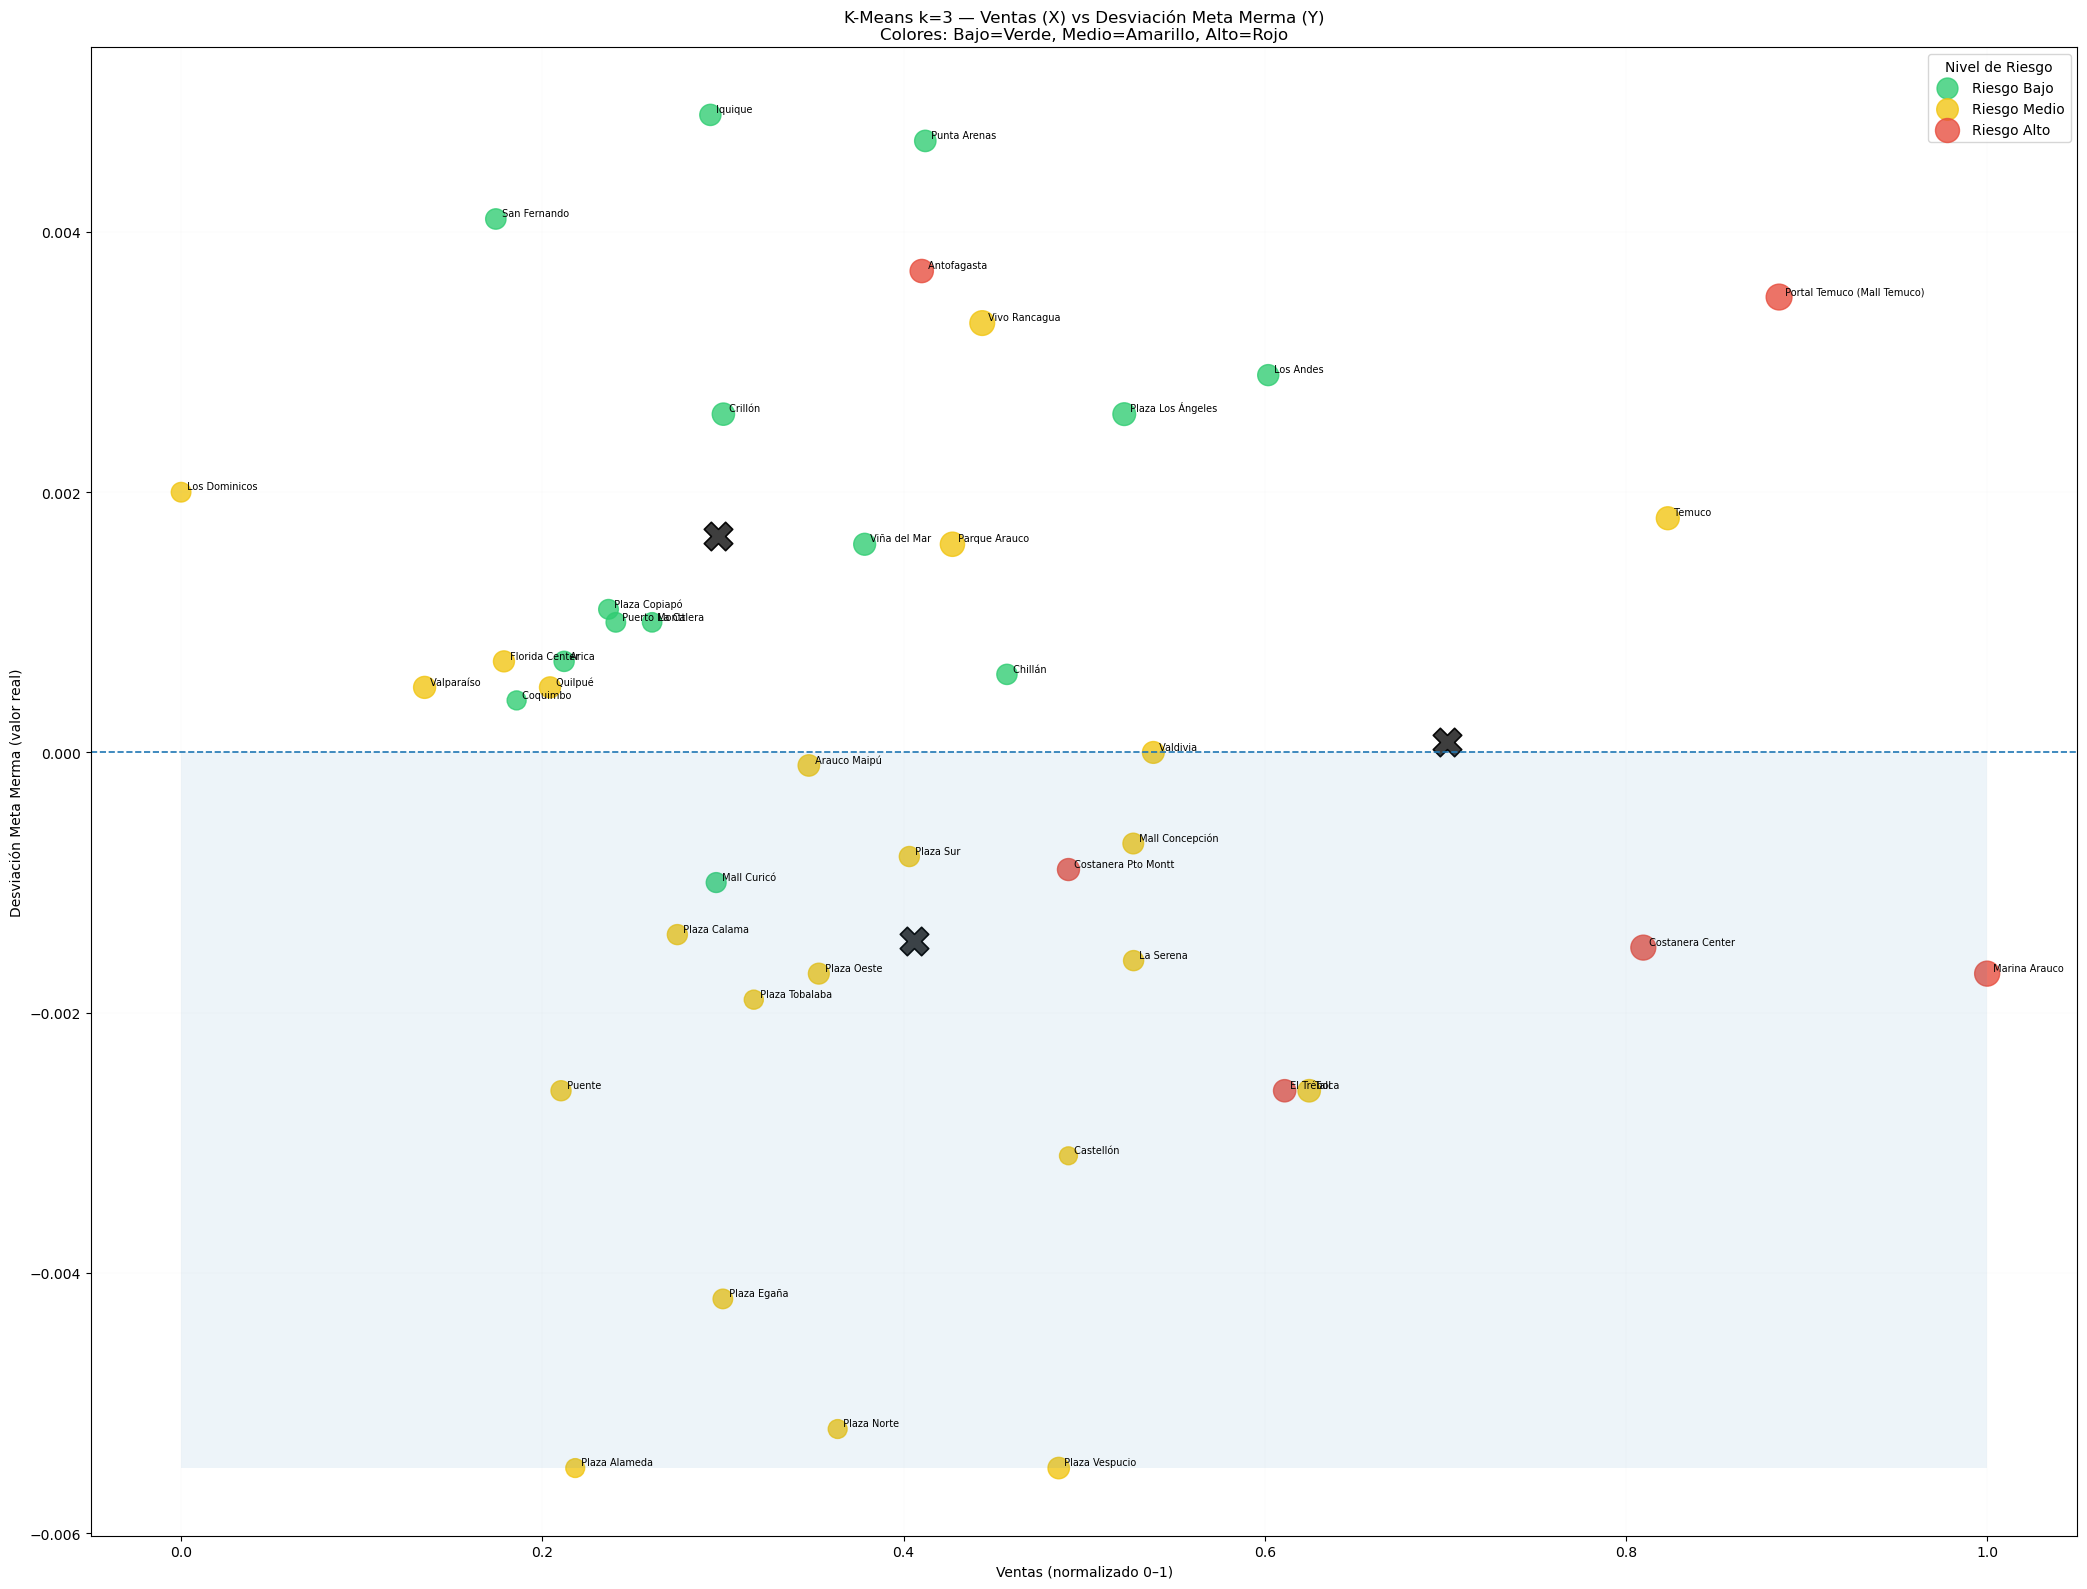

In [49]:

# Helpers (solo si no existen)
if '_fit_ellipse_from_points' not in globals():
    import numpy as _np
    def _fit_ellipse_from_points(ax, x, y, n_std=1.9, linewidth=1.0, linestyle='-'):
        if len(x) < 3: return
        cov = _np.cov(x, y)
        vals, vecs = _np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        vals, vecs = vals[order], vecs[:, order]
        theta = _np.degrees(_np.arctan2(*vecs[:,0][::-1]))
        width, height = 2 * n_std * _np.sqrt(vals.clip(min=1e-12))
        ell = plt.matplotlib.patches.Ellipse((x.mean(), y.mean()),
                                             width, height, angle=theta,
                                             fill=False, linestyle=linestyle,
                                             linewidth=linewidth)
        ax.add_patch(ell)

if '_annotate_all_points' not in globals():
    def _annotate_all_points(ax, x, y, labels, fontsize=7):
        for xi, yi, txt in zip(x, y, labels):
            ax.annotate(f" {txt}", (xi, yi), xytext=(2,2),
                        textcoords="offset points", fontsize=fontsize)

# Detección columna sucursal
if 'col_sucursal_v8' in globals() and col_sucursal_v8 in Reporte_Propuesta_6.columns:
    col_suc_v16 = col_sucursal_v8
else:
    _cands_v16 = [c for c in Reporte_Propuesta_6.columns if c.lower() in
                  ['nombre_sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']]
    col_suc_v16 = _cands_v16[0] if _cands_v16 else None

# Asegurar labels/riesgo/centroides

Risk_Propuesta_6 = Reporte_Propuesta_6['RiskScore_P3'].values
means_k3_v13 = pd.Series(Risk_Propuesta_6).groupby(Clusters_Weighted_2025).mean().sort_values()
rank2riskname_v13 = {cid: ("Riesgo Bajo" if i==0 else "Riesgo Medio" if i==1 else "Riesgo Alto")
                     for i, cid in enumerate(means_k3_v13.index)}
Riesgo_Propuesta_6 = pd.Series(Clusters_Weighted_2025).map(rank2riskname_v13).values

Centers_Weight_Propuesta_6 = kmeans_Weighted_2025.cluster_centers_
Centers_Scaled_Propuesta_6 = Centers_Weight_Propuesta_6 / Sqrt_Weights  # volver a escala MinMax 0–1
Centroides_Propuesta_6 = pd.DataFrame(Centers_Scaled_Propuesta_6, columns=X_MinMax_Scaled.columns)
Centroides_Propuesta_6['Riesgo_label'] = [rank2riskname_v13[cid] for cid in means_k3_v13.index]  # ordenados por riesgo
print("\nCentroides (escala 0–1 MinMax):")
print(Centroides_Propuesta_6.round(3).to_string(index=False))


# ==================== COLORES por nivel de riesgo ====================
color_map_v16 = {
    "Riesgo Bajo":   "#2ecc71",  # verde
    "Riesgo Medio":  "#f1c40f",  # amarillo
    "Riesgo Alto":   "#e74c3c",  # rojo
}

# ==================== GRÁFICO A (X en $ reales + formato 'mil millones') ====================
# X real (no 0–1)
xA_real_v16 = Reporte_Propuesta_6["Ventas / Mts. 2"].astype(float).values
xA_min, xA_max = float(xA_real_v16.min()), float(xA_real_v16.max())

# Y = PC1(Descuento + Merma) normalizado 0–1 (de v15); si no existe, lo recomputamos
from sklearn.decomposition import PCA

Variables_PCA_Eje_Y = ['Productos_Dañados_Descuento','Costo_Merma_Destruccion', "Desviacion_Meta_Merma" ]
PCA_Eje_YY = PCA(n_components=1, random_state=100)
PCA_Eje_YYY = PCA_Eje_YY.fit_transform(X_MinMax_Scaled[Variables_PCA_Eje_Y].values).ravel()

# orientar PC1 a correlación positiva con el riesgo
riskA_v15 = Reporte_Propuesta_6['RiskScore_P3'].values
if _np.corrcoef(PCA_Eje_YYY, riskA_v15)[0,1] < 0:
    PCA_Eje_YYY = -PCA_Eje_YYY
    compsA_v15 = -PCA_Eje_YY.components_[0]
else:
    compsA_v15 = PCA_Eje_YY.components_[0]

# normalizar a 0–1 para el eje Y; X ya está en 0–1 (MinMax)
yA_min_v15, yA_max_v15 = float(PCA_Eje_YYY.min()), float(PCA_Eje_YYY.max())
yA01_v15 = (PCA_Eje_YYY - yA_min_v15) / (yA_max_v15 - yA_min_v15 + 1e-12)
xA01_v15 = X_MinMax_Scaled['Ventas / Mts. 2'].values

# centroides proyectados en este plano
centers_yA_pc1_v15 = (Centroides_Propuesta_6[Variables_PCA_Eje_Y].values @ compsA_v15.reshape(-1,1)).ravel()
centers_yA01_v15 = (centers_yA_pc1_v15 - yA_min_v15) / (yA_max_v15 - yA_min_v15 + 1e-12)
centers_xA01_v15 = Centroides_Propuesta_6['Ventas / Mts. 2'].values
if 'yA01_v15' in globals():
    yA01_v16 = yA01_v15
    centers_yA01_v16 = centers_yA01_v15
else:
    from sklearn.decomposition import PCA
    vars_yA = ['Productos_Dañados_Descuento','Costo_Merma_Destruccion', "Desviacion_Meta_Merma"]
    _pca = PCA(n_components=1, random_state=100)
    _pc1 = _pca.fit_transform(X_MinMax_Scaled[vars_yA].values).ravel()
    # orientar al riesgo
    _risk = Reporte_Propuesta_6['RiskScore_P3'].values
    if np.corrcoef(_pc1, _risk)[0,1] < 0: _pc1 = -_pc1
    min, max = float(_pc1.min()), float(_pc1.max())
    yA01_v16 = (pc1 - _min) / (max - min + 1e-12)
    compsA = pca.components[0]
    # centroides al plano
    _cent_y = (Centroides_Propuesta_6[vars_yA].values @ compsA.reshape(-1,1)).ravel()
    centers_yA01_v16 = (cent_y - _min) / (max - min + 1e-12)

# Centroides X en $ reales (desnormalizamos Ventas_Totales)
centers_xA01 = Centroides_Propuesta_6['Ventas / Mts. 2'].values  # 0–1
centers_xA_real_v16 = xA_min + centers_xA01 * (xA_max - xA_min + 1e-12)

plt.figure(figsize=(21,16))
for lvl in niveles_riesgo:
    m = (Riesgo_plot == lvl)
    if m.any():
        plt.scatter(xA_real_v16[m], yA01_v16[m],
                    s=(Reporte_Propuesta_6.loc[m,'RiskScore_P3']*600 + 20),
                    alpha=0.7, label=lvl, c=color_map_v16[lvl])


# Elipses por clúster en este plano (usa labels numéricos)
for cid in sorted(set(Clusters_Weighted_2025)):
    m = (Clusters_Weighted_2025 == cid)
    _fit_ellipse_from_points(plt.gca(), xA_real_v16[m], yA01_v16[m], n_std=0.98, linewidth=1.0, linestyle='--')


# Etiquetas en TODOS los puntos
if col_suc_v16:
    _annotate_all_points(plt.gca(), xA_real_v16, yA01_v16,
                         Reporte_Propuesta_6[col_suc_v16].astype(str).values, fontsize=5)

# Formato del eje X como "mil millones"
from matplotlib.ticker import FuncFormatter, MaxNLocator
def _fmt_milmill(x, pos):
    return f"{int(round(x/1e9))} mil millones"
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax.xaxis.set_major_formatter(FuncFormatter(_fmt_milmill))

plt.title("Resultados Clustering K means 2025")
plt.xlabel("Ventas (pesos chilenos, mil millones)")
plt.ylabel("PC1(Y): Descuento+Merma (normalizado 0–1)")
plt.legend(title="Riesgo Final", frameon=True)
plt.grid(True, linewidth=0.3, alpha=0.5)
plt.tight_layout()
plt.savefig("grafico_A_PC1_danio_merma_v16.png", dpi=300, bbox_inches='tight')

# ==================== GRÁFICO B (mismos colores; X queda en 0–1 o en $ si prefieres) ====================
# Dejamos X en 0–1 como en v15; si prefieres también en $, descomenta el bloque indicado.
xB01_v16 = X_MinMax_Scaled['Ventas / Mts. 2'].values
xB_real_v16 = Reporte_Propuesta_6["Ventas / Mts. 2"].astype(float).values
centers_xB_real_v16 = xA_min + Centroides_Propuesta_6['Ventas / Mts. 2'].values * (xA_max - xA_min + 1e-12)

yB_real_v16 = Reporte_Propuesta_6['Desviacion_Meta_Merma'].astype(float).values
yB_min, yB_max = float(yB_real_v16.min()), float(yB_real_v16.max())
centers_yB01 = Centroides_Propuesta_6['Desviacion_Meta_Merma'].values
centers_yB_real_v16 = yB_min + centers_yB01 * (yB_max - yB_min + 1e-12)
centers_xB01_v16 = Centroides_Propuesta_6['Ventas / Mts. 2'].values

plt.figure(figsize=(21,16))
for lvl in niveles_riesgo:
    m = (Riesgo_plot == lvl)
    if m.any():
        plt.scatter(xB01_v16[m], yB_real_v16[m],
                    s=(Reporte_Propuesta_6.loc[m,'RiskScore_P3']*600 + 20),
                    alpha=0.78, label=lvl, c=color_map_v16[lvl])



plt.scatter(centers_xB01_v16, centers_yB_real_v16,
            s=420, marker='X', edgecolor='black', linewidths=1.2, alpha=0.95, c="#333333")

plt.axhline(0, linestyle='--', linewidth=1.2)
if (yB_real_v16 < 0).any():
    plt.fill_between([0,1], min(yB_real_v16.min(), centers_yB_real_v16.min()), 0, alpha=0.08)

if col_suc_v16:
    _annotate_all_points(plt.gca(), xB01_v16, yB_real_v16,
                         Reporte_Propuesta_6[col_suc_v16].astype(str).values, fontsize=7)

plt.title("K-Means k=3 — Ventas (X) vs Desviación Meta Merma (Y)\nColores: Bajo=Verde, Medio=Amarillo, Alto=Rojo")
plt.xlabel("Ventas (normalizado 0–1)")  # cambia a '($, mil millones)' si usas la versión en $ reales
plt.ylabel("Desviación Meta Merma (valor real)")
plt.legend(title="Nivel de Riesgo", frameon=True)
plt.grid(True, linewidth=0.1, alpha=0.3)
plt.tight_layout()
plt.savefig("grafico_B_desv_meta_merma_v16.png", dpi=300, bbox_inches='tight')

print("\nListo:")
print(" - grafico_A_PC1_danio_merma_v16.png")
print(" - grafico_B_desv_meta_merma_v16.png")

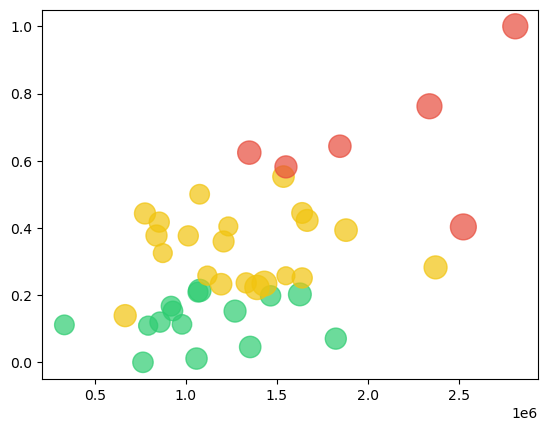

In [50]:
niveles_riesgo = ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]

# Etiqueta que vamos a graficar (si faltara, cae al original)
Riesgo_plot = (Reporte_Propuesta_6.get("Riesgo_final")
               .fillna(Reporte_Propuesta_6["Riesgo_P3_MinMax_Pesos"])
               .astype(str).values)

for lvl in niveles_riesgo:
    m = (Riesgo_plot == lvl)
    if m.any():
        plt.scatter(xA_real_v16[m], yA01_v16[m],
                    s=(Reporte_Propuesta_6.loc[m,'RiskScore_P3']*600 + 20),
                    alpha=0.70, label=lvl, c=color_map_v16[lvl])


/var/folders/vb/4xhyvppd4k3b20rqlvs_9cn00000gn/T/ipykernel_1110/915143244.py:47: MatplotlibDeprecationWarning:

The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.

/var/folders/vb/4xhyvppd4k3b20rqlvs_9cn00000gn/T/ipykernel_1110/915143244.py:48: MatplotlibDeprecationWarning:

The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.

/var/folders/vb/4xhyvppd4k3b20rqlvs_9cn00000gn/T/ipykernel_1110/915143244.py:47: MatplotlibDeprecationWarning:

The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.

/var/folders/vb/4xhyvppd4k3b20rqlvs_9cn00000gn/T/ipykernel_1110/915143244.py:48: MatplotlibDeprecationWarning:

The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.

/var/folders/vb/4xhyvppd4k3b20rqlvs_9cn00000gn/T/ipykernel_1110/915143244.py:47: MatplotlibDeprecationWarning:

The collections 

Listo: 'grafico_A_PC1_danio_merma_v24.png' con contornos tipo 'a mano' y sin choques.


<Figure size 640x480 with 0 Axes>

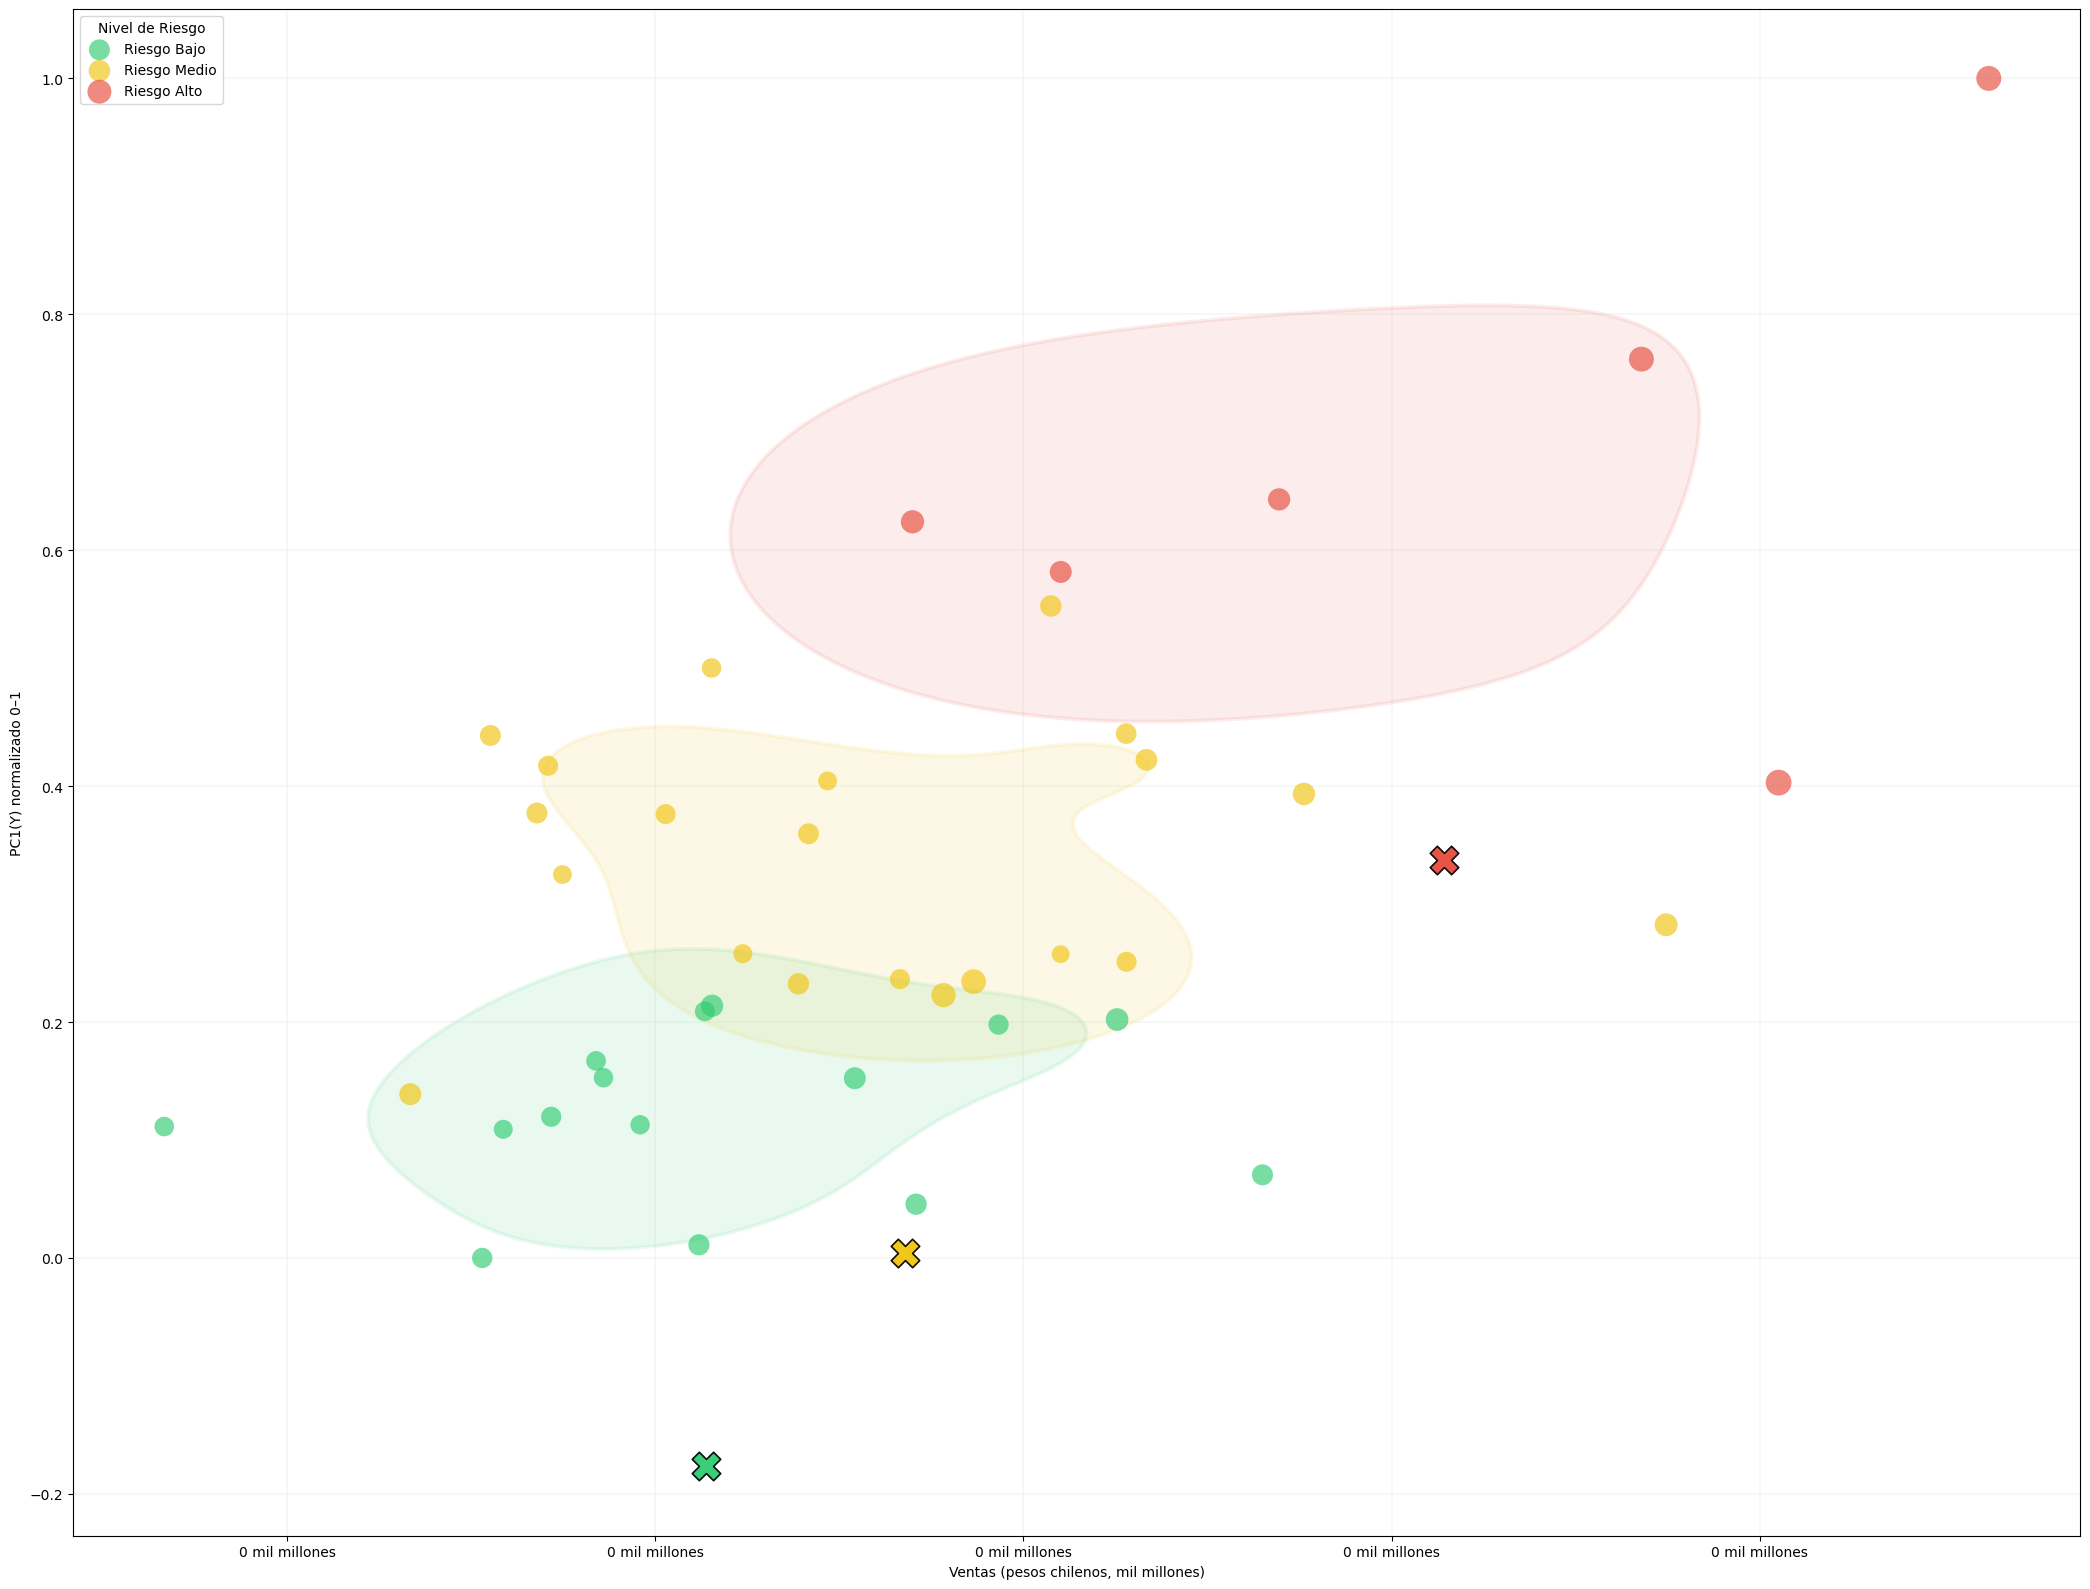

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.ticker import FuncFormatter, MaxNLocator
from sklearn.neighbors import KernelDensity

labels_V12 = kmeans_Weighted_2025.labels_.copy()

# ---------- helpers ----------
def _fmt_milmill(x, pos): 
    return f"{int(round(x/1e9))} mil millones"

def kde_contour_polygon(x, y, mass=0.75, bw_scale=1.0, grid=400):
    """
    Devuelve un polígono (la mayor isolínea) que encierra ~mass de la densidad KDE.
    - Estandariza (z-score) para que X ($) y Y (0-1) pesen similar en KDE.
    - bw_scale: multiplica la banda de Scott (1.0 = base; <1 más ajustado, >1 más suave).
    """
    xy = np.column_stack([x, y]).astype(float)
    mu = xy.mean(axis=0); sd = xy.std(axis=0) + 1e-12
    z = (xy - mu) / sd

    # ancho de banda de Scott/Silverman en 2D
    n, d = z.shape
    h_scott = n**(-1.0/(d+4))
    bw = h_scott * bw_scale

    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(z)
    # umbral como cuantil de densidades en las propias muestras (aprox. HDR)
    scores = kde.score_samples(z)  # log densidad
    thr = np.quantile(scores, 1.0 - mass)

    # malla en z estandarizada
    mins = z.min(axis=0) - 0.5
    maxs = z.max(axis=0) + 0.5
    gx = np.linspace(mins[0], maxs[0], grid)
    gy = np.linspace(mins[1], maxs[1], grid)
    GX, GY = np.meshgrid(gx, gy)
    grid_pts = np.column_stack([GX.ravel(), GY.ravel()])
    Z = kde.score_samples(grid_pts).reshape(GX.shape)

    # extraer la isolínea principal (nivel = thr)
    cs = plt.contour(GX, GY, Z, levels=[thr])
    # tomar el path más largo
    polys = []
    if hasattr(cs, "collections") and cs.collections:
        for coll in cs.collections:
            paths = getattr(coll, "get_paths", lambda: [])()
            for p in paths:
                v = p.vertices
                if len(v) > 30:
                    polys.append(v)
    plt.clf()  # limpiar el contour auxiliar
    if not polys:  # fallback a convex hull simple si algo falla
        from scipy.spatial import ConvexHull
        hull = ConvexHull(z)
        poly_z = z[hull.vertices]
    else:
        poly_z = max(polys, key=lambda v: v.shape[0])

    # volver a unidades originales del gráfico
    poly = poly_z * sd + mu
    return poly

def polygons_overlap(poly1, poly2, step=10):
    """True si alguna muestra de vértices de un polígono cae dentro del otro (aprox)."""
    from matplotlib.path import Path
    p1, p2 = Path(poly1), Path(poly2)
    return p1.contains_points(poly2[::step]).any() or p2.contains_points(poly1[::step]).any()

# ---------- parámetros visuales (ajústalos si quieres) ----------
# nivel inicial por cluster (fracción de masa cubierta) y suavidad relative
mass_init = {"Riesgo Bajo": 0.75, "Riesgo Medio": 0.78, "Riesgo Alto": 0.72}
bw_scale  = {"Riesgo Bajo": 0.9,  "Riesgo Medio": 1.0,  "Riesgo Alto": 1.1}
mass_min  = 0.55     # no bajar de aquí al resolver solapes
decay     = 0.93     # factor para bajar mass cuando se detecta solape (7% menos cada ronda)
edge_lw   = 2.8
fill_alpha= 0.10

# ---------- construir contornos por clúster, evitando solape ----------
# Asegurar que `labels_V12` exista (usar el resultado de un KMeans ya ajustado si está disponible)
if 'labels_V12' not in globals():
    if 'kmeans_Weighted_2025' in globals() and hasattr(kmeans_Weighted_2025, 'labels_'):
        labels_V12 = kmeans_Weighted_2025.labels_
    elif 'kmeans_Weighted' in globals() and hasattr(kmeans_Weighted, 'labels_'):
        labels_V12 = kmeans_Weighted.labels_
    elif 'kmeans' in globals() and hasattr(kmeans, 'labels_'):
        labels_V12 = kmeans.labels_
    else:
        raise NameError("labels_V12 no está definida y no se encontró un modelo kmeans ajustado en las variables disponibles.")

cluster_ids = sorted(set(labels_V12))
contours = {}   # cid -> (poly, mass_used, color)

# color por mayoría de etiqueta de riesgo dentro del clúster
lvl_by_cid = {}
for cid in cluster_ids:
    lvl_by_cid[cid] = pd.Series(Riesgo_plot[labels_V12 == cid]).mode().iloc[0]

# contornos iniciales
for cid in cluster_ids:
    m = (labels_V12 == cid)
    lvl = lvl_by_cid[cid]
    poly = kde_contour_polygon(xA_real_v16[m], yA01_v16[m],
                               mass=mass_init[lvl], bw_scale=bw_scale[lvl])
    contours[cid] = (poly, mass_init[lvl], color_map_v16[lvl])

# resolver solapes
for _ in range(20):
    pairs = [(i,j) for i in cluster_ids for j in cluster_ids if i<j]
    conflicts = []
    for i,j in pairs:
        if polygons_overlap(contours[i][0], contours[j][0]):
            conflicts.append((i,j))
    if not conflicts:
        break
    for i,j in conflicts:
        for cid in (i,j):
            poly, m_used, col = contours[cid]
            lvl = lvl_by_cid[cid]
            new_m = max(mass_min, m_used*decay)
            if new_m < m_used - 1e-6:
                mask = (labels_V12 == cid)
                new_poly = kde_contour_polygon(xA_real_v16[mask], yA01_v16[mask],
                                               mass=new_m, bw_scale=bw_scale[lvl])
                contours[cid] = (new_poly, new_m, col)

# ---------- plot ----------
fig, ax = plt.subplots(figsize=(21,16))

# puntos por nivel
for lvl in niveles_riesgo:
    m = (Riesgo_plot == lvl)
    if m.any():
        ax.scatter(xA_real_v16[m], yA01_v16[m],
                   s=(Reporte_Propuesta_6.loc[m,'RiskScore_P3']*600 + 20),
                   c=color_map_v16[lvl], alpha=0.65, edgecolors='none', label=lvl, zorder=2)

                  
# contornos KDE
for cid in cluster_ids:
    poly, m_used, col = contours[cid]
    ax.add_patch(Polygon(poly, closed=True, facecolor=col, edgecolor=col,
                         alpha=fill_alpha, lw=edge_lw, zorder=1))
    # etiqueta opcional del porcentaje usado (eliminada según solicitud)
    # cx, cy = poly[:,0].mean(), poly[:,1].mean()
    # ax.text(cx, cy, f"{int(round(m_used*100))}%", fontsize=9, color="#333333", ha='center', va='center', alpha=0.55)

### centroides (color por clúster: verde/amarillo/rojo según color_map_v16)
for idx, cid in enumerate(cluster_ids):
    # usar los nombres de variable disponibles en el notebook
    cx = centers_xA_real_v16[idx]
    cy = centers_yA01_v16[idx]
    lvl = lvl_by_cid[cid]
    col = color_map_v16[lvl]
    ax.scatter(cx, cy, s=420, marker='X', edgecolors='black', linewidths=1.2,
               alpha=0.95, c=col, zorder=3)


# ejes/estilo
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax.xaxis.set_major_formatter(FuncFormatter(_fmt_milmill))
ax.set_xlabel("Ventas (pesos chilenos, mil millones)")
ax.set_ylabel("PC1(Y) normalizado 0–1")
ax.grid(True, linewidth=0.3, alpha=0.45, zorder=0)
ax.legend(title="Nivel de Riesgo", frameon=True, loc='upper left')
plt.tight_layout()
plt.savefig("grafico_A_PC1_danio_merma_v24.png", dpi=300, bbox_inches='tight')
# plt.show()

print("Listo: 'grafico_A_PC1_danio_merma_v24.png' con contornos tipo 'a mano' y sin choques.")

Listo: grafico_A_PC1_elipses_sin_choque.png


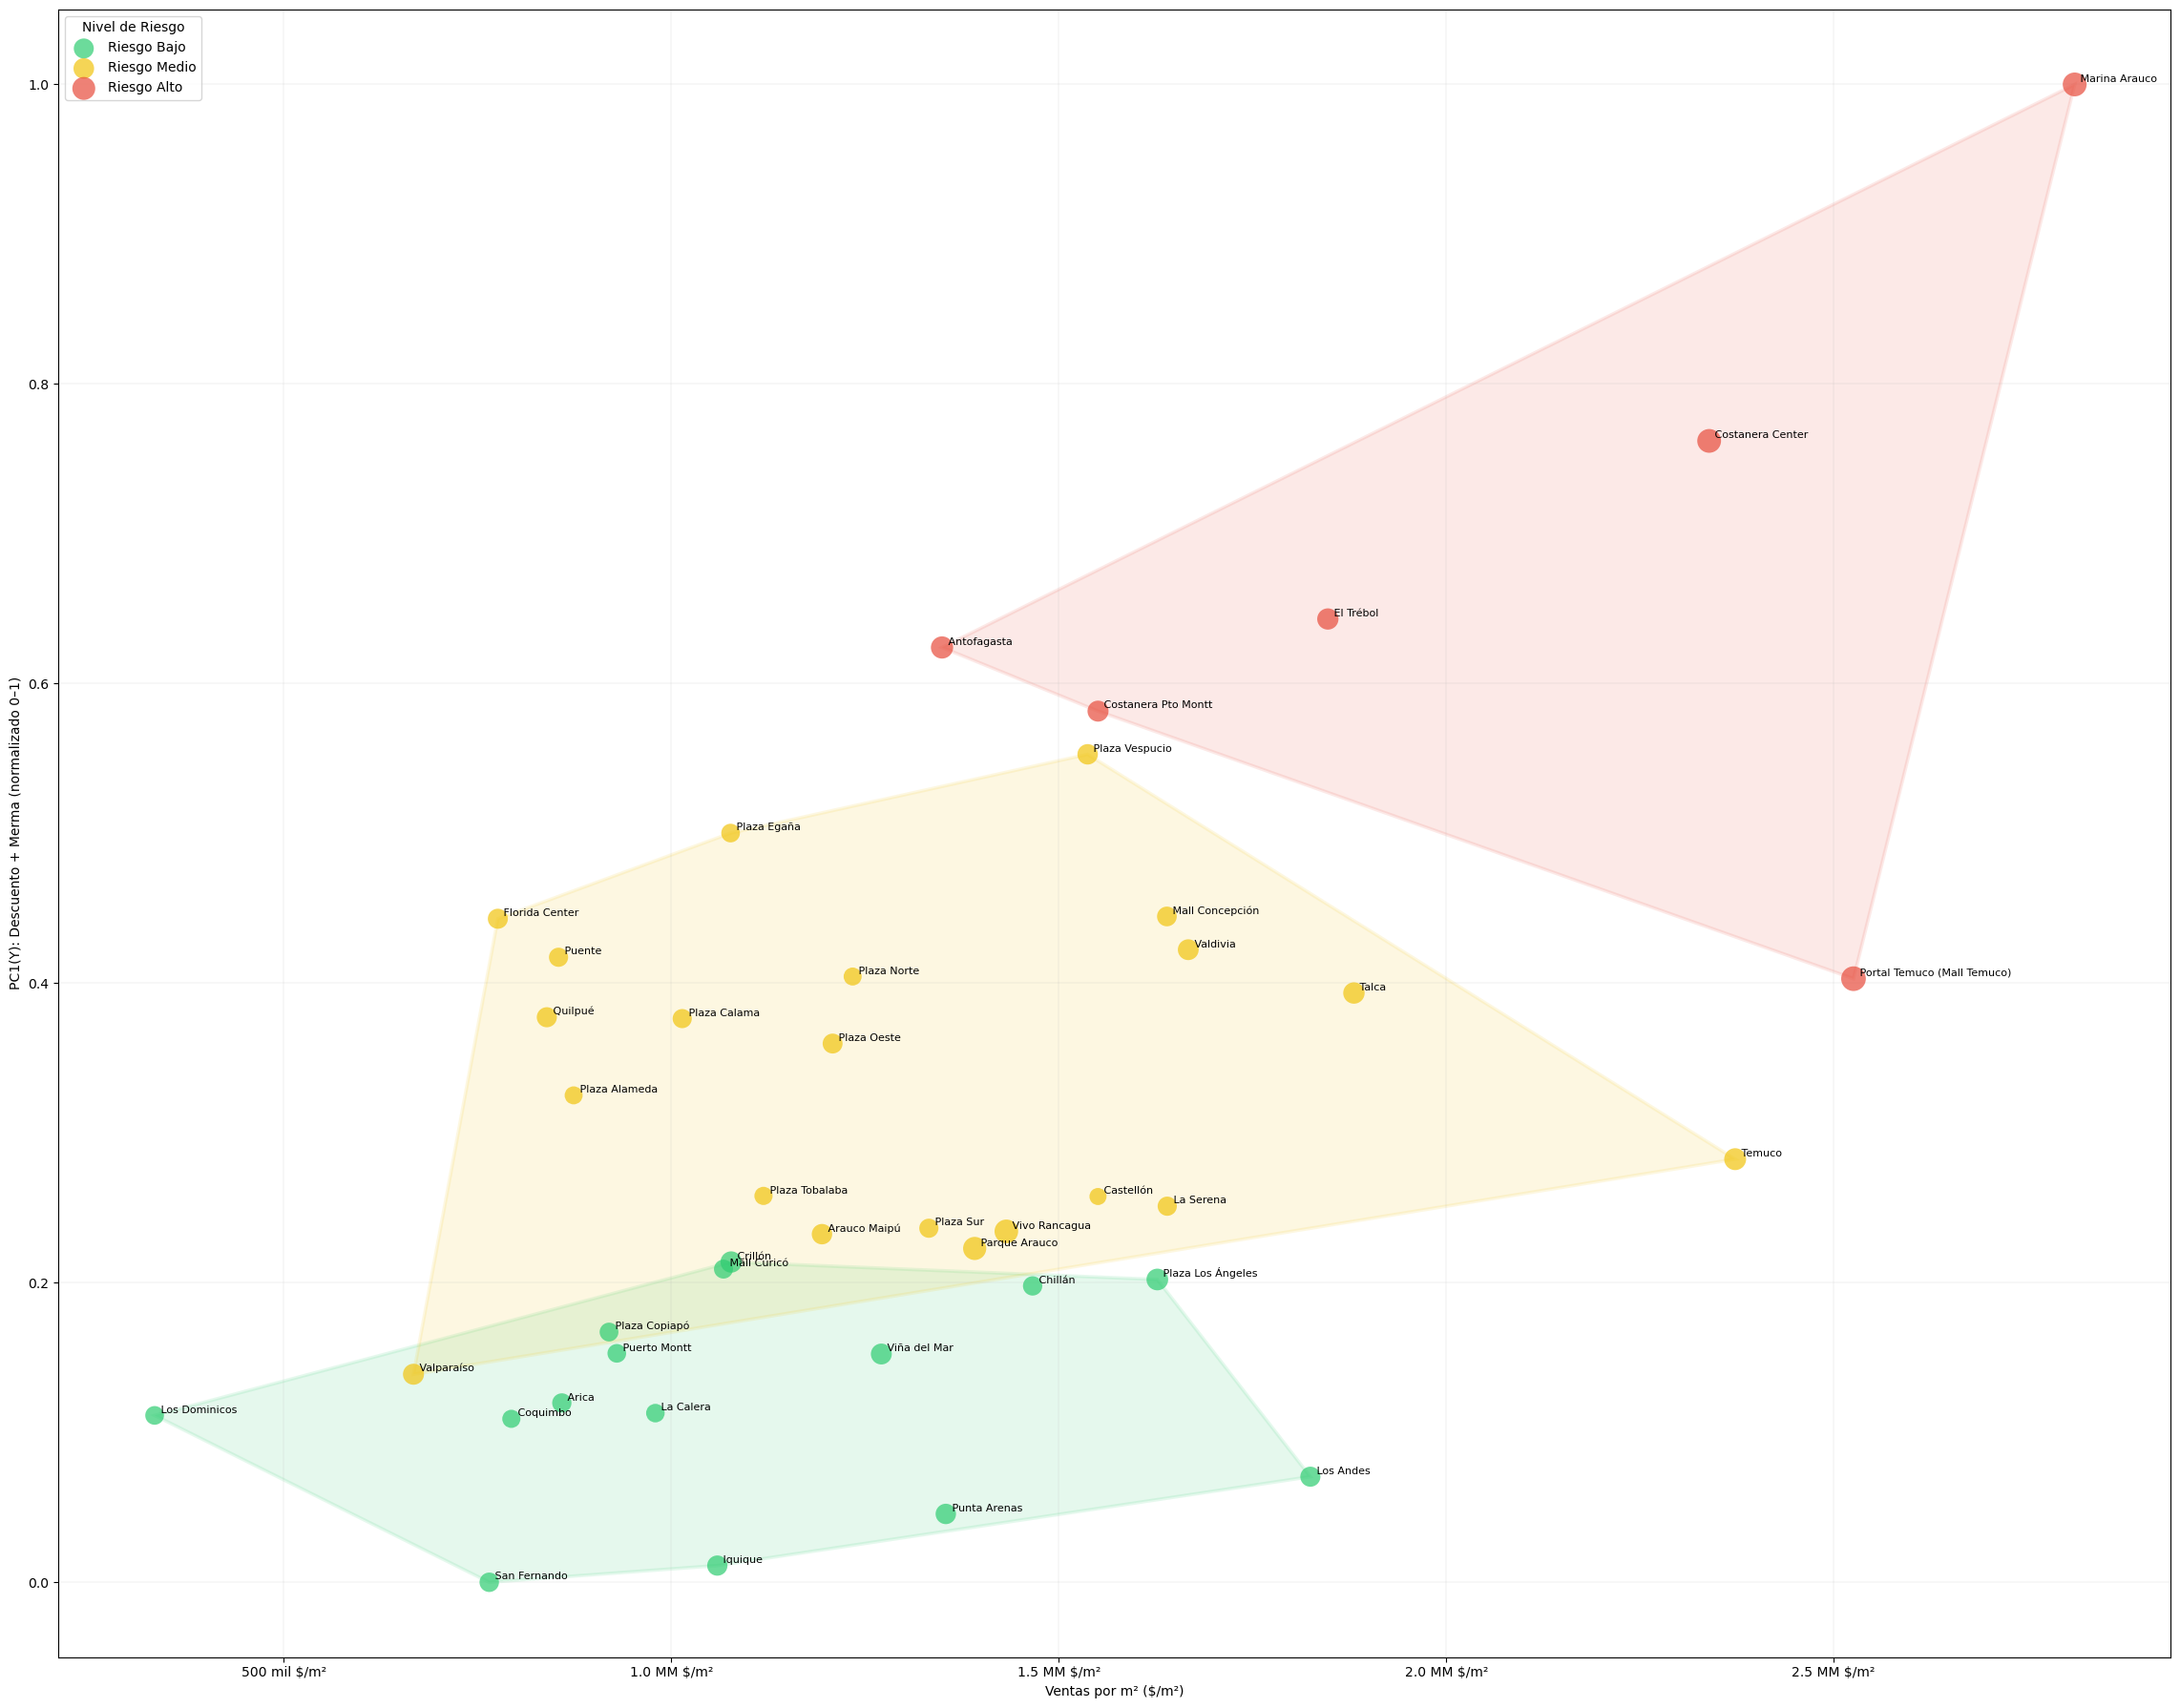

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.path import Path
from matplotlib.ticker import FuncFormatter, MaxNLocator
from sklearn.decomposition import PCA

# ---------- Utilidades ----------
def fmt_pesos_m2(x, pos):
    if x >= 1e6:  return f"{x/1e6:,.1f} MM $/m²"
    if x >= 1e3:  return f"{x/1e3:,.0f} mil $/m²"
    return f"{x:,.0f} $/m²"

def chi2_scale(prob):
    """Escala radial para una Normal 2D que cubre 'prob' de masa."""
    try:
        from scipy.stats import chi2
        return np.sqrt(chi2.ppf(prob, df=2))
    except Exception:
        # Aproximación razonable si no hay SciPy
        return np.sqrt(-2.0 * np.log(max(1e-9, 1.0 - prob)))

# Factor global para reducir el tamaño de las elipses (0 < shrink <= 1)
ellipse_shrink = 0.65

def ellipse_polygon_from_points(x, y, prob=0.75, n=200):
    """Elipse (polígono) basada en media/covarianza de (x,y) cubriendo ~prob de masa."""
    pts = np.column_stack([x, y]).astype(float)
    mu = pts.mean(axis=0)
    cov = np.cov(pts.T)
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]

    # orientación (primer autovector)
    theta = np.arctan2(vecs[1,0], vecs[0,0])

    # semiejes usando cuantil χ² (df=2)
    s = chi2_scale(prob)
    a = s * np.sqrt(max(vals[0], 1e-12))
    b = s * np.sqrt(max(vals[1], 1e-12))

    # aplicar reducción global de tamaño
    a *= ellipse_shrink
    b *= ellipse_shrink

    t = np.linspace(0, 2*np.pi, n)
    el = np.vstack([a*np.cos(t), b*np.sin(t)]).T
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    poly = el @ R.T + mu
    return poly

def polygons_overlap(poly1, poly2, step=8):
    p1, p2 = Path(poly1), Path(poly2)
    return p1.contains_points(poly2[::step]).any() or p2.contains_points(poly1[::step]).any()

def annotate_all(ax, x, y, labels, fontsize=8):
    for xi, yi, txt in zip(x, y, labels):
        ax.annotate(f" {txt}", (xi, yi), xytext=(2,2),
                    textcoords="offset points", fontsize=fontsize)

# ---------- Datos para el plano del gráfico ----------
# X = Ventas / m² (real)
x_real = Reporte_Propuesta_6["Ventas / Mts. 2"].astype(float).values
x_min, x_max = float(x_real.min()), float(x_real.max())

# Y = PC1(Productos_Dañados_Descuento, Costo_Merma_Destruccion, Desviacion_Meta_Merma) orientado al riesgo y normalizado 0–1
risk_vars = ['Productos_Dañados_Descuento','Costo_Merma_Destruccion','Desviacion_Meta_Merma']
pca = PCA(n_components=1, random_state=100)
pc1 = pca.fit_transform(X_MinMax_Scaled[risk_vars].values).ravel()
corr = np.corrcoef(pc1, Reporte_Propuesta_6['RiskScore_P3'].values)[0,1]
comps = pca.components_[0]
if corr < 0:
    pc1 = -pc1
    comps = -comps
pc1_min, pc1_max = float(pc1.min()), float(pc1.max())
y_01 = (pc1 - pc1_min) / (pc1_max - pc1_min + 1e-12)

# Etiqueta final de riesgo
Riesgo_plot = (Reporte_Propuesta_6.get("Riesgo_final")
               .fillna(Reporte_Propuesta_6["Riesgo_P3_MinMax_Pesos"])
               .astype(str).values)

niveles_riesgo = ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]
color_map = {"Riesgo Bajo":"#2ecc71", "Riesgo Medio":"#f1c40f", "Riesgo Alto":"#e74c3c"}

# ---------- Centroides en el mismo plano ----------
cent_scaled = (kmeans_Weighted_2025.cluster_centers_ / Sqrt_Weights)
cent_df = pd.DataFrame(cent_scaled, columns=X_MinMax_Scaled.columns)
centers_x_real = x_min + cent_df['Ventas / Mts. 2'].values * (x_max - x_min + 1e-12)
centers_y_pc1  = (cent_df[risk_vars].values @ comps.reshape(-1,1)).ravel()
centers_y_01   = (centers_y_pc1 - pc1_min) / (pc1_max - pc1_min + 1e-12)

# Mayoría de Riesgo_final por clúster
labels_V12 = kmeans_Weighted_2025.labels_
cluster_ids = np.unique(labels_V12)
lvl_by_cid = {}
for cid in cluster_ids:
    idx = np.where(labels_V12 == cid)[0]
    lvl_by_cid[cid] = pd.Series(Riesgo_plot[idx]).mode().iloc[0]

# ---------- Elipses por clúster (sin choques) ----------
# Coberturas iniciales por nivel y parámetros de ajuste
prob_init = {"Riesgo Bajo":0.78, "Riesgo Medio":0.80, "Riesgo Alto":0.76}
prob_min  = 0.58
decay     = 0.94   # reduce 6% si hay solape
edge_lw   = 2.2
fill_alpha= 0.12

contours = {}  # cid -> (poly, color, prob_usado)
for cid in cluster_ids:
    idx = np.where(labels_V12 == cid)[0]
    lvl = lvl_by_cid[cid]
    if len(idx) >= 3:
        p = prob_init[lvl]
        poly = ellipse_polygon_from_points(x_real[idx], y_01[idx], prob=p)
        contours[cid] = (poly, color_map[lvl], p)

# resolver solapes iterativamente
for _ in range(20):
    pairs = [(i,j) for i in cluster_ids for j in cluster_ids if i<j]
    conflicts = []
    for i,j in pairs:
        if i in contours and j in contours:
            if polygons_overlap(contours[i][0], contours[j][0]):
                conflicts.append((i,j))
    if not conflicts:
        break
    for i,j in conflicts:
        for cid in (i,j):
            if cid not in contours: 
                continue
            poly, col, p = contours[cid]
            lvl = lvl_by_cid[cid]
            new_p = max(prob_min, p*decay)
            if new_p < p - 1e-6:
                idx = np.where(labels_V12 == cid)[0]
                new_poly = ellipse_polygon_from_points(x_real[idx], y_01[idx], prob=new_p)
                contours[cid] = (new_poly, col, new_p)

# ---------- Plot ----------
fig, ax = plt.subplots(figsize=(23,18))

# Puntos por nivel de riesgo final
for lvl in niveles_riesgo:
    m = (Riesgo_plot == lvl)
    if m.any():
        ax.scatter(x_real[m], y_01[m],
                   s=(Reporte_Propuesta_6.loc[m,'RiskScore_P3']*600 + 20),
                   c=color_map[lvl], alpha=0.70, edgecolors='none',
                   label=lvl, zorder=2)





# Etiquetas de sucursal (si existe la columna)
cand_cols = [c for c in Reporte_Propuesta_6.columns
             if c.lower() in ['nombre_sucursal','sucursal','tienda',
                              'cod_sucursal','código_sucursal','codigo_sucursal']]
if cand_cols:
    annotate_all(ax, x_real, y_01, Reporte_Propuesta_6[cand_cols[0]].astype(str).values, fontsize=8)

# Ejes/estética
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax.xaxis.set_major_formatter(FuncFormatter(fmt_pesos_m2))
ax.set_xlabel("Ventas por m² ($/m²)")
ax.set_ylabel("PC1(Y): Descuento + Merma (normalizado 0–1)")
ax.grid(True, linewidth=0.3, alpha=0.45, zorder=0)
ax.legend(title="Nivel de Riesgo", frameon=True, loc='upper left')
# ================== CONTORNOS TIPO "POLÍGONO" POR NIVEL (CONVEX HULL) ==================
# Usa x/y ya calculados para el gráfico:
x_vals = xA_real_v16  if 'xA_real_v16'  in globals() else x_real
y_vals = yA01_v16     if 'yA01_v16'     in globals() else y_01

# Hull con algoritmo de la cadena monotónica (sin dependencias externas)
def _convex_hull_xy(x, y):
    pts = np.column_stack([x, y]).astype(float)
    # ordenar lexicográficamente
    pts = pts[np.lexsort((pts[:,1], pts[:,0]))]

    def cross(o, a, b):
        return (a[0]-o[0])*(b[1]-o[1]) - (a[1]-o[1])*(b[0]-o[0])

    # parte baja
    lower = []
    for p in pts:
        while len(lower) >= 2 and cross(lower[-2], lower[-1], p) <= 0:
            lower.pop()
        lower.append(tuple(p))
    # parte alta
    upper = []
    for p in pts[::-1]:
        while len(upper) >= 2 and cross(upper[-2], upper[-1], p) <= 0:
            upper.pop()
        upper.append(tuple(p))
    hull = np.array(lower[:-1] + upper[:-1], dtype=float)
    return hull

# dibujar un hull por cada NIVEL DE RIESGO (no por clúster)
for lvl in ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]:
    mask = (Riesgo_plot == lvl)
    if mask.sum() >= 3:
        poly = _convex_hull_xy(x_vals[mask], y_vals[mask])
        ax.add_patch(Polygon(poly, closed=True,
                             facecolor=color_map_v16[lvl],
                             edgecolor=color_map_v16[lvl],
                             alpha=0.12, lw=2.6, zorder=1))
    elif mask.sum() == 2:
        # con 2 puntos, dibujamos un pequeño rombo para no dejar “hueco”
        p = np.column_stack([x_vals[mask], y_vals[mask]])
        c = p.mean(axis=0); d = (p[1]-p[0])*0.05
        rh = np.array([c+d, c+[d[0],-d[1]], c-d, c+[-d[0],d[1]]])
        ax.add_patch(Polygon(rh, closed=True,
                             facecolor=color_map_v16[lvl],
                             edgecolor=color_map_v16[lvl],
                             alpha=0.12, lw=2.6, zorder=1))
    elif mask.sum() == 1:
        # con 1 punto, un círculo suave
        ax.scatter(x_vals[mask], y_vals[mask],
                   s=900, c=color_map_v16[lvl], alpha=0.10, edgecolors='none', zorder=1)


plt.tight_layout()
plt.savefig("grafico_A_PC1_elipses_sin_choque.png", dpi=300, bbox_inches='tight')
print("Listo: grafico_A_PC1_elipses_sin_choque.png")


### Convertir DataFrame y Resultados a Mapa para presentacion

In [53]:
import sys, subprocess
from pkg_resources import parse_version

# Asegura que nbformat esté instalado (usa magic %pip cuando se ejecuta en Jupyter; fallback a subprocess)
try:
    import nbformat
except ModuleNotFoundError:
    print("Instalando/actualizando nbformat>=4.2.0 ...")
    try:
        # Ejecuta la magic %pip dentro de Jupyter si está disponible
        get_ipython().run_line_magic('pip', 'install nbformat>=4.2.0')
    except Exception:
        # Fallback cuando get_ipython no está disponible
        subprocess.check_call([sys.executable, "-m", "pip", "install", "nbformat>=4.2.0"])
    import nbformat

# Arregla: "ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed"
# Este cell instala/actualiza nbformat si hace falta y vuelve a mostrar (o exportar) la figura Plotly existente.

def ensure_nbformat_minimum(version="4.2.0"):
    try:
        if parse_version(nbformat.__version__) < parse_version(version):
            raise ImportError
        return True
    except Exception:
        print(f"Instalando/actualizando nbformat>={version} ...")
        try:
            get_ipython().run_line_magic('pip', f'install --upgrade nbformat>={version}')
        except Exception:
            subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", f"nbformat>={version}"])
        # re-importar tras la instalación
        import importlib
        importlib.reload(nbformat)
        return True

ensure_nbformat_minimum("4.2.0")

# Intentar volver a mostrar el figure de Plotly si existe (cell 72 crea `fig`)
if "fig" in globals():
    try:
        fig.show()
        print("Figura mostrada en el notebook.")
    except Exception as e:
        print("No fue posible mostrar inline. Exportando a HTML como fallback. Error:", e)
        try:
            fig.write_html("mapa_ripley.html", include_plotlyjs="cdn")
            print("Mapa guardado en: mapa_ripley.html")
        except Exception as e2:
            print("Error al guardar HTML:", e2)
else:
    print("No se encontró la variable 'fig' en el entorno. Ejecuta primero la celda que crea el figure (p. ej. cell 72).")

Figura mostrada en el notebook.


/var/folders/vb/4xhyvppd4k3b20rqlvs_9cn00000gn/T/ipykernel_1110/2304536037.py:41: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



In [54]:
# === Mapa interactivo de sucursales Ripley (Plotly, sin token) ===
import numpy as np
import pandas as pd
import unicodedata
import plotly.express as px

# ------------------ 1) Configuración básica ------------------
# DF de trabajo (usa tu Df_Kmeans ya armado)
df = Reporte_Propuesta_6.copy()

# Columna de riesgo a mostrar/colorear (elige una)
riesgo_col = ( "Riesgo_final" if "Riesgo_final" in df.columns
               else "Riesgo_P3_MinMax_Pesos" )

# Métrica para el tooltip (puedes cambiarla por "RiskScore_P3", etc.)
metric_col = "Productos_Dañados_Descuento"

# Tamaño de burbuja (opcional): usa RiskScore si existe, si no usa la métrica
size_col = "RiskScore_P3" if "RiskScore_P3" in df.columns else metric_col

# Paleta consistente con tus gráficos anteriores
color_map = {
    "Riesgo Bajo":  "#2ecc71",
    "Riesgo Medio": "#f1c40f",
    "Riesgo Alto":  "#e74c3c",
}

# ------------------ 2) Normalización de nombres ------------------
def _norm(s):
    s = str(s).strip().lower()
    s = unicodedata.normalize('NFKD', s).encode('ascii', 'ignore').decode('ascii')
    s = " ".join(s.split())
    return s

df["Nombre_norm"] = df["Nombre_Sucursal"].apply(_norm)

# ------------------ 3) Mapeo sucursal -> ciudad ------------------
# (Ajusta/añade según tus sucursales)
sucursal_a_ciudad = {
    "antofagasta":"antofagasta",
    "arauco maipu":"maipu",
    "arica":"arica",
    "castellon":"concepcion",
    "chillan":"chillan",
    "coquimbo":"coquimbo",
    "costanera center":"providencia",
    "costanera pto montt":"puerto montt",
    "crillon":"santiago",
    "el trebol":"talcahuano",
    "florida center":"la florida",
    "iquique":"iquique",
    "la calera":"la calera",
    "la serena":"la serena",
    "los andes":"los andes",
    "los dominicos":"las condes",
    "mall concepcion":"concepcion",
    "mall curico":"curico",
    "marina arauco":"vina del mar",
    "parque arauco":"las condes",
    "plaza alameda":"santiago",
    "plaza calama":"calama",
    "plaza copiapo":"copiapo",
    "plaza egana":"nunoa",
    "plaza los angeles":"los angeles",
    "plaza norte":"huechuraba",
    "plaza oeste":"cerrillos",
    "plaza sur":"san bernardo",
    "plaza tobalaba":"puente alto",
    "plaza vespucio":"la florida",
    "portal temuco mall temuco":"temuco",
    "puente":"santiago",
    "puerto montt":"puerto montt",
    "punta arenas":"punta arenas",
    "quilpue":"quilpue",
    "san fernando":"san fernando",
    "talca":"talca",
    "temuco":"temuco",
    "valdivia":"valdivia",
    "valparaiso":"valparaiso",
    "vina del mar":"vina del mar",
    "vivo rancagua":"rancagua",
    "valparaiso crillon":"santiago",  # por si aparece variación
}

# ------------------ 4) Coordenadas ciudad -> lat/lon ------------------
# (Centros aproximados; suficientes para nivel gerencial)
CITY_LATLON = {
    "arica":(-18.4783,-70.3126),
    "iquique":(-20.2307,-70.1357),
    "antofagasta":(-23.6509,-70.3975),
    "copiapo":(-27.3668,-70.3322),
    "la serena":(-29.9027,-71.2519),
    "coquimbo":(-29.9533,-71.3389),
    "valparaiso":(-33.0458,-71.6197),
    "vina del mar":(-33.0245,-71.5518),
    "quilpue":(-33.0472,-71.4425),
    "los andes":(-32.8334,-70.5983),
    "la calera":(-32.7859,-71.2015),
    "santiago":(-33.4489,-70.6693),
    "las condes":(-33.4160,-70.5666),
    "providencia":(-33.4254,-70.5665),
    "huechuraba":(-33.3677,-70.6410),
    "cerrillos":(-33.4989,-70.6917),
    "la florida":(-33.5210,-70.5983),
    "puente alto":(-33.6117,-70.5758),
    "san bernardo":(-33.5922,-70.6996),
    "rancagua":(-34.1701,-70.7406),
    "san fernando":(-34.5869,-70.9870),
    "curico":(-34.9850,-71.2394),
    "talca":(-35.4264,-71.6554),
    "chillan":(-36.6063,-72.1034),
    "concepcion":(-36.8270,-73.0503),
    "talcahuano":(-36.7390,-73.1035),
    "los angeles":(-37.4697,-72.3537),
    "temuco":(-38.7359,-72.5904),
    "valdivia":(-39.8196,-73.2452),
    "osorno":(-40.5744,-73.1333),
    "puerto montt":(-41.4689,-72.9411),
    "punta arenas":(-53.1638,-70.9171),
    "maipu":(-33.5104,-70.7561),
    "calama":(-22.4559,-68.9294),
    "nunoa":(-33.4569,-70.5954),
}

# ------------------ 5) Preparación de datos del mapa ------------------
df["Ciudad"] = df["Nombre_norm"].map(sucursal_a_ciudad)
df["lat"]    = df["Ciudad"].map(lambda c: CITY_LATLON.get(c, (np.nan,np.nan))[0] if pd.notna(c) else np.nan)
df["lon"]    = df["Ciudad"].map(lambda c: CITY_LATLON.get(c, (np.nan,np.nan))[1] if pd.notna(c) else np.nan)

faltantes = df[df[["lat","lon"]].isna().any(axis=1)]["Nombre_Sucursal"].tolist()
if faltantes:
    print("⚠ Sucursales sin coordenadas (agrega al diccionario):")
    print(", ".join(sorted(set(map(str, faltantes)))))

# Mantén solo las filas con coordenadas
dfm = df.dropna(subset=["lat","lon"]).copy()

# Asegurar columnas numéricas para métrica/tamaño
for c in [metric_col, size_col]:
    dfm[c] = pd.to_numeric(dfm[c], errors="coerce")
dfm[size_col] = dfm[size_col].fillna(dfm[size_col].median())

# Etiqueta final de riesgo (por si falta en alguna fila)
dfm["Riesgo_plot"] = dfm[riesgo_col].fillna("Riesgo Medio").astype(str)

# Texto del hover (formato con separador de miles)
def _fmt_monto(v):
    try:
        return f"${v:,.0f}".replace(",", ".")
    except Exception:
        return str(v)

dfm["hover_text"] = (
    "Sucursal: " + dfm["Nombre_Sucursal"].astype(str) +
    "<br>Ciudad: " + dfm["Ciudad"].fillna("N/D").astype(str) +
    "<br>Riesgo: " + dfm["Riesgo_plot"].astype(str) +
    "<br>Productos Dañados: " + dfm[metric_col].apply(_fmt_monto)
)

# ------------------ 6) Mapa Plotly ------------------
fig = px.scatter_mapbox(
    dfm,
    lat="lat", lon="lon",
    color="Riesgo_plot",
    size=size_col,                  # burbuja proporcional (opcional)
    size_max=24,
    hover_name="Nombre_Sucursal",
    hover_data={"lat":False, "lon":False, size_col:False, "Riesgo_plot":False, "Ciudad":False},
    color_discrete_map=color_map,
    mapbox_style="open-street-map",
    zoom=4.2,
    center={"lat": -35.5, "lon": -71.5},
    height=700
)

# Tooltip personalizado
fig.update_traces(
    hovertemplate=dfm["hover_text"]
)

# Diseño limpio
fig.update_layout(
    legend_title_text="Nivel de Riesgo",
    margin=dict(l=10,r=10,t=10,b=10),
)

# Ver en notebook y guardar como HTML para presentación
fig.show()
fig.write_html("mapa_ripley.html", include_plotlyjs="cdn")
print("✅ Mapa generado: mapa_ripley.html")

⚠ Sucursales sin coordenadas (agrega al diccionario):
Portal Temuco (Mall Temuco)


✅ Mapa generado: mapa_ripley.html


In [55]:
import numpy as np
import pandas as pd
import plotly.express as px
import unicodedata

# === 1) ¿Desde qué DF graficamos?
# Usa Reporte_Propuesta_6 si existe; si no, cae a Df_Kmeans
df_map = 'Reporte_Propuesta_6' in globals() and isinstance(Reporte_Propuesta_6, pd.DataFrame)
df_map = Reporte_Propuesta_6.copy() if df_map else Df_Kmeans.copy()

# Columna de nombre (flexible, como veníamos)
cand_cols = [c for c in df_map.columns if c.lower() in 
             ['nombre_sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']]
col_nombre = cand_cols[0]

# === 2) Normalizador consistente (minúsculas, sin tildes, espacios compactos)
def _norm(s):
    s = str(s).strip().lower()
    s = unicodedata.normalize('NFKD', s).encode('ascii', 'ignore').decode('ascii')
    s = ' '.join(s.replace('.', ' ').replace('-', ' ').split())
    return s

df_map['_key'] = df_map[col_nombre].map(_norm)

# === 3) Diccionario de coordenadas (agrega aquí tus sucursales)
# Nota: incluimos variantes para Temuco por seguridad
coords = {
    # ... aquí tus otras sucursales ...
    'portal temuco (mall temuco)': (-38.739, -72.595),
    'portal temuco mall temuco'   : (-38.739, -72.595),
    'mall temuco'                 : (-38.739, -72.595),
    'temuco'                      : (-38.739, -72.595),
}

# === 4) Construir columnas lat/lon
latlon_series = df_map['_key'].map(coords)
df_map['lat'] = latlon_series.map(lambda t: t[0] if isinstance(t, tuple) else np.nan)
df_map['lon'] = latlon_series.map(lambda t: t[1] if isinstance(t, tuple) else np.nan)

faltantes = df_map.loc[df_map['lat'].isna(), col_nombre].tolist()
if faltantes:
    print("⚠ Sucursales sin coordenadas (agrega al diccionario):")
    for s in faltantes:
        print(" -", s)

# === 5) Colores por riesgo (consistentes con el proyecto)
color_map = {"Riesgo Bajo":"#2ecc71", "Riesgo Medio":"#f1c40f", "Riesgo Alto":"#e74c3c"}

# Etiqueta de riesgo final con fallback
if 'Riesgo_final' not in df_map.columns:
    if 'Riesgo_P3_MinMax_Pesos' in df_map.columns:
        df_map['Riesgo_final'] = df_map['Riesgo_P3_MinMax_Pesos']
    else:
        raise ValueError("No encuentro 'Riesgo_final' ni 'Riesgo_P3_MinMax_Pesos' en el DataFrame.")

# === 6) Campos para hover (ajusta a tu gusto)
hover_cols = []
for c in ['Riesgo_final','Productos_Dañados_Descuento','Ventas / Mts. 2','RiskScore_P3']:
    if c in df_map.columns:
        hover_cols.append(c)

# === 7) Gráfico (usa scatter_map; si no existe, cae a scatter_mapbox)
try:
    fig = px.scatter_map(
        df_map.dropna(subset=['lat','lon']),
        lat='lat', lon='lon',
        color='Riesgo_final',
        color_discrete_map=color_map,
        size=hover_cols[1] if 'Productos_Dañados_Descuento' in hover_cols else None,
        size_max=28,
        hover_name=col_nombre,
        hover_data=hover_cols,
        zoom=4.2,
        height=720,
        map_style="open-street-map"
    )
except Exception:
    # Fallback para versiones antiguas de plotly
    fig = px.scatter_mapbox(
        df_map.dropna(subset=['lat','lon']),
        lat='lat', lon='lon',
        color='Riesgo_final',
        color_discrete_map=color_map,
        size=hover_cols[1] if 'Productos_Dañados_Descuento' in hover_cols else None,
        size_max=28,
        hover_name=col_nombre,
        hover_data=hover_cols,
        zoom=4.2,
        height=720,
        mapbox_style="open-street-map"
    )

# Un pelín de margen para que no tape labels
fig.update_layout(margin=dict(l=10,r=10,t=10,b=10), legend_title_text="Nivel de riesgo")
fig.show()

⚠ Sucursales sin coordenadas (agrega al diccionario):
 - Antofagasta
 - Arauco Maipú
 - Arica
 - Castellón
 - Chillán
 - Coquimbo
 - Costanera Center
 - Costanera Pto Montt
 - Crillón
 - El Trébol
 - Florida Center
 - Iquique
 - La Calera
 - La Serena
 - Los Andes
 - Los Dominicos
 - Mall Concepción
 - Mall Curicó
 - Marina Arauco
 - Parque Arauco
 - Plaza Alameda
 - Plaza Calama
 - Plaza Copiapó
 - Plaza Egaña
 - Plaza Los Ángeles
 - Plaza Norte
 - Plaza Oeste
 - Plaza Sur
 - Plaza Tobalaba
 - Plaza Vespucio
 - Puente
 - Puerto Montt
 - Punta Arenas
 - Quilpué
 - San Fernando
 - Talca
 - Valdivia
 - Valparaíso
 - Vivo Rancagua
 - Viña del Mar


In [56]:
import plotly.express as px
import plotly.io as pio
import pandas as pd

# (Opcional) Render en VS Code o navegador
pio.renderers.default = "vscode"   # o "browser"

# === Datos: asumo que ya tienes df_map con columnas:
# 'Sucursal', 'lat', 'lon', 'Riesgo', 'Productos_Dañados_Descuento', etc.
# Si además tenías una columna de tamaño (p.ej. RiskScore), úsala en `size=...`.
# Si no, puedes dejar size=None y fijamos tamaño fijo con update_traces.

# Orden y colores consistentes
orden_riesgo = ["Riesgo Alto", "Riesgo Medio", "Riesgo Bajo"]
colores = {"Riesgo Alto": "#e74c3c", "Riesgo Medio": "#f1c40f", "Riesgo Bajo": "#2ecc71"}

df_plot = df_map.copy()
df_plot["Riesgo_final"] = pd.Categorical(df_plot["Riesgo_final"], categories=orden_riesgo, ordered=True)

# Tooltip limpio (oculta lat/lon)
hover_cols = {"lat": False, "lon": False, "Productos_Dañados_Descuento": True}
# Si quieres formato de miles:
# df_plot["Productos_Dañados_Descuento_fmt"] = df_plot["Productos_Dañados_Descuento"].map(lambda v: f"${v:,.0f}")
# hover_cols = {"lat": False, "lon": False, "Productos_Dañados_Descuento_fmt": True}

fig = px.scatter_mapbox(
    df_plot,
    lat="lat",
    lon="lon",
    color="Riesgo_final",
    hover_name="Nombre_Sucursal",
    hover_data=hover_cols,
    # Si quieres que el tamaño represente algo, descomenta y ajusta:
    # size="RiskScore_P3",
    # size_max=14,
    zoom=4.6,
    center={"lat": -35.5, "lon": -71.5},
    mapbox_style="carto-positron",      # <- evita bloqueo de OSM
    color_discrete_map=colores,
    height=760
)

# Tamaño fijo para ver mejor los puntos
fig.update_traces(
    marker=dict(size=9, opacity=0.9)
)

# Leyenda y márgenes
fig.update_layout(
    legend_title_text="Nivel de Riesgo",
    margin=dict(l=10, r=10, t=10, b=10)
)

print("✅ Mapa actualizado (puntos más pequeños y basemap sin bloqueo). Archivo: mapa_ripley.html")
fig.show()
fig.write_html("mapa_ripley.html", include_plotlyjs="cdn")

✅ Mapa actualizado (puntos más pequeños y basemap sin bloqueo). Archivo: mapa_ripley.html


In [57]:
import plotly.express as px
import plotly.io as pio
import pandas as pd

pio.renderers.default = "vscode"   # o "browser"

# --- Copia y limpieza de coordenadas ---
df_plot = df_map.copy()

# Normaliza decimales con coma y elimina caracteres raros
for c in ["lat", "lon"]:
    df_plot[c] = (
        df_plot[c].astype(str)
                   .str.replace(r"[^\d\-\.,]", "", regex=True)   # deja dígitos, -, . y ,
                   .str.replace(",", ".", regex=False)           # coma -> punto
    )
    df_plot[c] = pd.to_numeric(df_plot[c], errors="coerce")

# Revisa filas sin coordenadas y descártalas para el mapa
missing = df_plot["lat"].isna() | df_plot["lon"].isna()
if missing.any():
    print(f"⚠ Filas sin coordenadas: {missing.sum()} (no se mostrarán en el mapa)")
    # Muestra qué sucursales faltan para que completes el diccionario de coords
    cols_show = [c for c in ["Nombre_Sucursal","Sucursal","Riesgo_final","lat","lon"] if c in df_plot.columns]
    print(df_plot.loc[missing, cols_show].to_string(index=False))

df_plot = df_plot.loc[~missing].copy()

# --- Riesgo como categoría consistente ---
orden_riesgo = ["Riesgo Alto", "Riesgo Medio", "Riesgo Bajo"]
colores = {"Riesgo Alto":"#e74c3c","Riesgo Medio":"#f1c40f","Riesgo Bajo":"#2ecc71"}

# Si tu columna se llama distinto, cámbiala aquí:
RIESGO_COL = "Riesgo_final"
NOMBRE_COL = "Nombre_Sucursal"

# Si hubiera valores que no calzan exactamente, los pasamos a 'Riesgo Medio' para no perder puntos
df_plot["Riesgo"] = df_plot[RIESGO_COL].where(df_plot[RIESGO_COL].isin(orden_riesgo), "Riesgo Medio")
df_plot["Riesgo"] = pd.Categorical(df_plot["Riesgo"], categories=orden_riesgo, ordered=True)

# (Opcional) métrica formateada en el tooltip
if "Productos_Dañados_Descuento" in df_plot.columns:
    df_plot["Prod_Danados_fmt"] = pd.to_numeric(df_plot["Productos_Dañados_Descuento"], errors="coerce").map(
        lambda v: f"${v:,.0f}" if pd.notna(v) else "s/d"
    )
    hover_cols = {"lat": False, "lon": False, "Prod_Danados_fmt": True}
else:
    hover_cols = {"lat": False, "lon": False}

# --- Mapa (MapLibre, sin bloqueo OSM) ---
fig = px.scatter_mapbox(
    df_plot,
    lat="lat", lon="lon",
    color="Riesgo",
    hover_name=NOMBRE_COL if NOMBRE_COL in df_plot.columns else None,
    hover_data=hover_cols,
    zoom=4.6,
    center={"lat": -35.5, "lon": -71.5},
    mapbox_style="carto-positron",
    color_discrete_map=colores,
    height=760
)

# Puntos más pequeños y con borde
fig.update_traces(marker=dict(size=9, opacity=0.9, line=dict(width=0.8, color="rgba(10,10,10,0.45)")))

fig.update_layout(legend_title_text="Nivel de Riesgo", margin=dict(l=10, r=10, t=10, b=10))

# Conteo de control (deberían ser 42 si todas las coords están)
print("Puntos en el mapa:", len(df_plot))

fig.show()
fig.write_html("mapa_ripley.html", include_plotlyjs="cdn")
print("✅ Mapa actualizado: mapa_ripley.html")

⚠ Filas sin coordenadas: 40 (no se mostrarán en el mapa)
    Nombre_Sucursal Riesgo_final  lat  lon
        Antofagasta  Riesgo Alto  NaN  NaN
       Arauco Maipú Riesgo Medio  NaN  NaN
              Arica  Riesgo Bajo  NaN  NaN
          Castellón Riesgo Medio  NaN  NaN
            Chillán  Riesgo Bajo  NaN  NaN
           Coquimbo  Riesgo Bajo  NaN  NaN
   Costanera Center  Riesgo Alto  NaN  NaN
Costanera Pto Montt  Riesgo Alto  NaN  NaN
            Crillón  Riesgo Bajo  NaN  NaN
          El Trébol  Riesgo Alto  NaN  NaN
     Florida Center Riesgo Medio  NaN  NaN
            Iquique  Riesgo Bajo  NaN  NaN
          La Calera  Riesgo Bajo  NaN  NaN
          La Serena Riesgo Medio  NaN  NaN
          Los Andes  Riesgo Bajo  NaN  NaN
      Los Dominicos  Riesgo Bajo  NaN  NaN
    Mall Concepción Riesgo Medio  NaN  NaN
        Mall Curicó  Riesgo Bajo  NaN  NaN
      Marina Arauco  Riesgo Alto  NaN  NaN
      Parque Arauco Riesgo Medio  NaN  NaN
      Plaza Alameda Riesgo Medio  NaN  N

KeyError: 'Riesgo Bajo'

In [58]:
import unicodedata, re, numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "vscode"   # o "browser"

# ========= 1) Normalizador de nombres =========
def norm_name(s):
    s = str(s).strip().lower()
    s = unicodedata.normalize("NFKD", s).encode("ascii", "ignore").decode("ascii")
    s = re.sub(r"\s+", " ", s)
    return s

# ========= 2) Coordenadas aproximadas por sucursal (centro ciudad) =========
coords_by_store = {
    # Norte
    "arica": (-18.48, -70.30),
    "iquique": (-20.22, -70.14),
    "plaza calama": (-22.46, -68.93),
    "antofagasta": (-23.65, -70.40),
    "plaza copiapo": (-27.37, -70.33),
    # Norte Chico
    "la serena": (-29.90, -71.25),
    "coquimbo": (-29.95, -71.34),
    # Valparaíso
    "valparaiso": (-33.05, -71.62),
    "vina del mar": (-33.02, -71.55),
    "marina arauco": (-33.02, -71.55),
    "quilpue": (-33.05, -71.45),
    "la calera": (-32.79, -71.21),
    "los andes": (-32.83, -70.60),
    # RM (aprox por comuna/barrio)
    "costanera center": (-33.417, -70.607),
    "parque arauco": (-33.404, -70.571),
    "los dominicos": (-33.410, -70.545),
    "plaza egana": (-33.452, -70.577),
    "plaza vespucio": (-33.520, -70.597),
    "florida center": (-33.500, -70.600),
    "plaza tobalaba": (-33.500, -70.580),
    "arauco maipu": (-33.510, -70.750),
    "plaza oeste": (-33.510, -70.706),
    "plaza norte": (-33.370, -70.660),
    "plaza sur": (-33.590, -70.620),  # San Bernardo
    "crillon": (-33.440, -70.650),
    "plaza alameda": (-33.455, -70.699),
    # Biobío y Ñuble
    "puente": (-36.827, -73.050),          # Concepción centro
    "mall concepcion": (-36.827, -73.050),
    "castellon": (-36.827, -73.050),
    "el trebol": (-36.800, -73.090),       # Talcahuano/Concepción
    "chillan": (-36.61, -72.10),
    "plaza los angeles": (-37.47, -72.35),
    # Centro sur
    "san fernando": (-34.58, -70.99),
    "vivo rancagua": (-34.17, -70.74),
    "talca": (-35.43, -71.66),
    "mall curico": (-34.98, -71.24),
    # La Araucanía y Los Ríos
    "temuco": (-38.74, -72.59),
    "portal temuco mall temuco": (-38.74, -72.60),
    "valdivia": (-39.82, -73.24),
    # Los Lagos y sur
    "puerto montt": (-41.47, -72.94),
    "costanera pto montt": (-41.47, -72.94),
    "punta arenas": (-53.16, -70.91),
}

# ========= 3) Preparar df_plot a partir de tu df_map =========
df_plot = df_map.copy()

# Asegura nombre de columnas:
NOMBRE_COL = "Nombre_Sucursal"  # cambia si tu columna se llama distinto
RIESGO_ORIG = "Riesgo_final"    # o la que tengas (Riesgo_P3_MinMax_Pesos, etc.)

# Clave normalizada para mapear coords
df_plot["__key"] = df_plot[NOMBRE_COL].map(norm_name)

# Asignar lat/lon por mapeo (lo que no calce quedará NaN)
df_plot["lat"] = df_plot["__key"].map(lambda k: coords_by_store.get(k, (np.nan, np.nan))[0])
df_plot["lon"] = df_plot["__key"].map(lambda k: coords_by_store.get(k, (np.nan, np.nan))[1])

# Convierte a float por si acaso
for c in ["lat", "lon"]:
    df_plot[c] = pd.to_numeric(df_plot[c], errors="coerce")

# Reporta faltantes (para que agregues claves nuevas al diccionario)
missing = df_plot["lat"].isna() | df_plot["lon"].isna()
if missing.any():
    print(f"⚠ Filas sin coordenadas: {missing.sum()} (agrega estas claves a coords_by_store)")
    print(df_plot.loc[missing, [NOMBRE_COL, RIESGO_ORIG, "lat", "lon", "__key"]].to_string(index=False))

# Filtra solo las filas con coordenadas válidas
df_plot = df_plot.loc[~missing].copy()

# ========= 4) Riesgo y colores (evita KeyError si falta algún nivel) =========
orden_riesgo = ["Riesgo Alto", "Riesgo Medio", "Riesgo Bajo"]
colores = {"Riesgo Alto": "#e74c3c", "Riesgo Medio": "#f1c40f", "Riesgo Bajo": "#2ecc71"}

df_plot["Riesgo"] = df_plot[RIESGO_ORIG].astype(str)
presentes = [r for r in orden_riesgo if r in df_plot["Riesgo"].unique()]

# (Opcional) métrica formateada en tooltip
hover_cols = {"lat": False, "lon": False}
if "Productos_Dañados_Descuento" in df_plot.columns:
    df_plot["Prod_Danados_fmt"] = pd.to_numeric(df_plot["Productos_Dañados_Descuento"], errors="coerce") \
                                     .map(lambda v: f"${v:,.0f}" if pd.notna(v) else "s/d")
    hover_cols["Prod_Danados_fmt"] = True

# ========= 5) Mapa =========
fig = px.scatter_mapbox(
    df_plot,
    lat="lat", lon="lon",
    color="Riesgo",
    hover_name=NOMBRE_COL,
    hover_data=hover_cols,
    category_orders={"Riesgo": presentes},     # solo niveles que existen => sin KeyError
    mapbox_style="carto-positron",             # libre, permite zoom
    zoom=4.6, center={"lat": -35.5, "lon": -71.5},
    color_discrete_map=colores,
    height=760
)

fig.update_traces(marker=dict(size=9, opacity=0.9))
fig.update_layout(legend_title_text="Nivel de Riesgo", margin=dict(l=10, r=10, t=10, b=10))

print("Puntos en el mapa:", len(df_plot))  # debería acercarse a 42
fig.show()
fig.write_html("mapa_ripley.html", include_plotlyjs="cdn")
print("✅ Mapa generado: mapa_ripley.html")

⚠ Filas sin coordenadas: 1 (agrega estas claves a coords_by_store)
            Nombre_Sucursal Riesgo_final  lat  lon                       __key
Portal Temuco (Mall Temuco)  Riesgo Alto  NaN  NaN portal temuco (mall temuco)
Puntos en el mapa: 41


✅ Mapa generado: mapa_ripley.html


In [59]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import unicodedata

pio.renderers.default = "vscode"   # o "browser"

# -------------------------------
# 1) Normalización y coordenadas
# -------------------------------
def _norm(s):
    s = str(s).strip().lower()
    s = unicodedata.normalize("NFKD", s).encode("ascii","ignore").decode("ascii")
    s = s.replace("  ", " ")
    return s

# Coordenadas por sucursal (aprox ciudad). Añadí las que pediste y varias comunes.
coords = {
    "antofagasta": (-23.6500, -70.4000),
    "arauco maipu": (-33.5021, -70.7561),  # Maipú
    "arica": (-18.4783, -70.3126),
    "castellon": (-36.82699, -73.04977),   # Concepcion centro
    "chillan": (-36.6066, -72.1034),
    "coquimbo": (-29.9533, -71.3436),
    "costanera center": (-33.4179, -70.6066),  # Providencia
    "costanera pto montt": (-41.4693, -72.9424),
    "crillon": (-33.4410, -70.6480),       # Santiago centro
    "el trebol": (-36.7901, -73.0867),     # Talcahuano
    "florida center": (-33.5014, -70.5989),
    "iquique": (-20.2133, -70.1517),
    "la calera": (-32.7870, -71.1950),
    "la serena": (-29.9027, -71.2519),
    "los andes": (-32.8330, -70.5980),
    "los dominicos": (-33.4085, -70.5515),
    "mall concepcion": (-36.82698, -73.04955),
    "mall curico": (-34.9837, -71.2384),
    "marina arauco": (-33.0245, -71.5516), # Viña del Mar
    "parque arauco": (-33.4019, -70.5724),
    "plaza alameda": (-33.4564, -70.6636),
    "plaza calama": (-22.4563, -68.9235),
    "plaza copiapo": (-27.3668, -70.3311),
    "plaza egana": (-33.4562, -70.5652),
    "plaza los angeles": (-37.4697, -72.3537),
    "plaza norte": (-33.3664, -70.6581),   # Huechuraba
    "plaza oeste": (-33.4957, -70.7078),   # Cerrillos/Maipú
    "plaza sur": (-33.5923, -70.7041),     # San Bernardo
    "plaza tobalaba": (-33.5129, -70.5791),
    "plaza vespucio": (-33.5229, -70.5977),
    "portal temuco (mall temuco)": (-38.7393, -72.5987),
    "portal temuco": (-38.7393, -72.5987),
    "puente": (-33.6073, -70.5758),        # Puente Alto (ajustado)
    "puerto montt": (-41.4689, -72.9411),
    "punta arenas": (-53.1638, -70.9171),
    "quilpue": (-33.0450, -71.4429),
    "san fernando": (-34.5861, -70.9859),
    "talca": (-35.4290, -71.6618),
    "temuco": (-38.7359, -72.5904),
    "valdivia": (-39.8196, -73.2452),
    "valparaiso": (-33.0472, -71.6127),
    "vina del mar": (-33.0245, -71.5518),
    "vivo rancagua": (-34.1701, -70.7441),
}

# Crea llaves alternativas para nombres con "mall" o paréntesis
coords.update({
    "portal temuco mall temuco": coords["portal temuco"],
})

# Esperamos df_map con al menos: Nombre_Sucursal, Riesgo_final, y métricas
df_plot = df_map.copy()

# Normaliza nombre y asigna coordenadas
df_plot["__key"] = df_plot["Nombre_Sucursal"].map(_norm)
df_plot["lat"] = df_plot["__key"].map(lambda k: coords.get(k, (np.nan, np.nan))[0])
df_plot["lon"] = df_plot["__key"].map(lambda k: coords.get(k, (np.nan, np.nan))[1])

# Reporta sucursales sin coordenadas
faltan = df_plot[df_plot["lat"].isna()][["Nombre_Sucursal","Riesgo_final","lat","lon"]]
if not faltan.empty:
    print(f"⚠ Sucursales sin coordenadas: {len(faltan)} (no se mostrarán en el mapa)")
    print(faltan.head(50).to_string(index=False))

# Filtra las que sí tienen coordenadas
df_plot = df_plot.dropna(subset=["lat","lon"]).reset_index(drop=True)

# -------------------------------
# 2) Tooltip condicional por fila
# -------------------------------
def _fmt_clp(v):
    if pd.isna(v): return "n/d"
    s = f"${float(v):,.0f}"
    return s.replace(",", ".")  # separador miles con punto

def build_hover(row):
    name = str(row["Nombre_Sucursal"])
    riesgo = str(row.get("Riesgo_final", ""))
    lines = [f"<b>{name}</b>", f"{riesgo}"]

    nm = _norm(name)

    # Reglas especiales
    if "antofagasta" in nm:
        v1 = row.get("Productos_Dañados_Vendidos")
        v2 = row.get("Costo_Merma_Destruccion")
        lines.append(f"Prod. dañados vendidos: {_fmt_clp(v1)}")
        lines.append(f"Merma destrucción: {_fmt_clp(v2)}")
        return "<br>".join(lines)

    if "la serena" in nm:
        dmm = row.get("Desviacion_Meta_Merma")
        multas = row.get("N° Multas", 0)
        lines.append(f"Desv. meta merma: {dmm:.2f}" if pd.notna(dmm) else "Desv. meta merma: n/d")
        try:
            multas_i = int(multas) if pd.notna(multas) else 0
        except Exception:
            multas_i = multas
        lines.append(f"N° Multas: {multas_i}")
        return "<br>".join(lines)

    # Regla general: si NO es Riesgo Bajo, mostrar descuento de prod. dañados
    if riesgo != "Riesgo Bajo":
        v = row.get("Productos_Dañados_Descuento")
        lines.append(f"Desc. prod. dañados: {_fmt_clp(v)}")

    return "<br>".join(lines)

df_plot["hover_txt"] = df_plot.apply(build_hover, axis=1)

# Orden/colores
orden_riesgo = ["Riesgo Alto","Riesgo Medio","Riesgo Bajo"]
df_plot["Riesgo_final"] = pd.Categorical(df_plot["Riesgo_final"], categories=orden_riesgo, ordered=True)
colores = {"Riesgo Alto":"#e74c3c", "Riesgo Medio":"#f1c40f", "Riesgo Bajo":"#2ecc71"}

# -------------------------------
# 3) Mapa
# -------------------------------
fig = px.scatter_mapbox(
    df_plot,
    lat="lat", lon="lon",
    color="Riesgo_final",
    hover_name="Nombre_Sucursal",
    text=None,                      # usamos hovertemplate con hover_txt
    zoom=4.6,
    center={"lat": -35.5, "lon": -71.5},
    mapbox_style="carto-positron",  # sin bloqueo
    color_discrete_map=colores,
    height=760
)

# Puntos más pequeños
fig.update_traces(marker=dict(size=9, opacity=0.9))

# Hover personalizado (solo nuestro HTML)
fig.update_traces(customdata=df_plot["hover_txt"], hovertemplate="%{customdata}<extra></extra>")

fig.update_layout(
    legend_title_text="Nivel de Riesgo",
    margin=dict(l=10, r=10, t=10, b=10)
)

print("Puntos en el mapa:", len(df_plot))
fig.show()
fig.write_html("mapa_ripley.html", include_plotlyjs="cdn")
print("✅ Mapa generado: mapa_ripley.html")

Puntos en el mapa: 42


✅ Mapa generado: mapa_ripley.html


In [60]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import unicodedata

pio.renderers.default = "vscode"   # o "browser"

# ================== 1) Normalización de nombres ==================
def _norm(s):
    s = str(s).strip().lower()
    s = unicodedata.normalize("NFKD", s).encode("ascii","ignore").decode("ascii")
    s = s.replace("  ", " ")
    return s

# ================== 2) Mapas: sucursal->ciudad y ciudad->coords ==================
# (lat, lon) CORRECTO para Chile
city_coords = {
    "antofagasta": (-23.6500, -70.4000),
    "arica": (-18.4783, -70.3126),
    "calama": (-22.4563, -68.9235),
    "copiapo": (-27.3668, -70.3311),
    "la serena": (-29.9027, -71.2519),
    "coquimbo": (-29.9533, -71.3436),
    "valparaiso": (-33.0472, -71.6127),
    "vina del mar": (-33.0245, -71.5518),
    "quilpue": (-33.0450, -71.4429),
    "los andes": (-32.8330, -70.5980),
    "la calera": (-32.7870, -71.1950),
    "santiago centro": (-33.4489, -70.6693),
    "providencia": (-33.4250, -70.6150),
    "las condes": (-33.4167, -70.5833),
    "huechuraba": (-33.3664, -70.6581),
    "cerrillos": (-33.5015, -70.7165),
    "san bernardo": (-33.5923, -70.7041),
    "la florida": (-33.5229, -70.5977),
    "puente alto": (-33.6073, -70.5758),
    "maipu": (-33.5021, -70.7561),
    "nunoa": (-33.4562, -70.5652),
    "rancagua": (-34.1701, -70.7441),
    "san fernando": (-34.5861, -70.9859),
    "curico": (-34.9837, -71.2384),
    "talca": (-35.4290, -71.6618),
    "chillan": (-36.6066, -72.1034),
    "concepcion": (-36.82699, -73.04977),
    "talcahuano": (-36.7901, -73.0867),
    "los angeles": (-37.4697, -72.3537),
    "temuco": (-38.7393, -72.5987),
    "valdivia": (-39.8196, -73.2452),
    "puerto montt": (-41.4689, -72.9411),
    "punta arenas": (-53.1638, -70.9171),
}

# sucursal normalizada -> ciudad (slug de arriba)
store_to_city = {
    "antofagasta": "antofagasta",
    "arauco maipu": "maipu",
    "arica": "arica",
    "castellon": "concepcion",                      # <- corregido
    "chillan": "chillan",
    "coquimbo": "coquimbo",
    "costanera center": "providencia",
    "costanera pto montt": "puerto montt",         # <- corregido
    "crillon": "santiago centro",
    "el trebol": "talcahuano",
    "florida center": "la florida",
    "iquique": "iquique" if "iquique" in city_coords else "arica",  # si no tienes iquique en city_coords, usa arica
    "la calera": "la calera",
    "la serena": "la serena",
    "los andes": "los andes",
    "los dominicos": "las condes",
    "mall concepcion": "concepcion",               # <- corregido
    "mall curico": "curico",
    "marina arauco": "vina del mar",               # <- corregido
    "parque arauco": "las condes",
    "plaza alameda": "santiago centro",
    "plaza calama": "calama",
    "plaza copiapo": "copiapo",
    "plaza egana": "nunoa",
    "plaza los angeles": "los angeles",
    "plaza norte": "huechuraba",
    "plaza oeste": "cerrillos",
    "plaza sur": "san bernardo",
    "plaza tobalaba": "puente alto",
    "plaza vespucio": "la florida",
    "portal temuco (mall temuco)": "temuco",       # <- corregido
    "portal temuco": "temuco",
    "puente": "puente alto",                       # <- pedido explícito
    "puerto montt": "puerto montt",
    "punta arenas": "punta arenas",
    "quilpue": "quilpue",
    "san fernando": "san fernando",
    "talca": "talca",
    "temuco": "temuco",
    "valdivia": "valdivia",
    "valparaiso": "valparaiso",
    "vina del mar": "vina del mar",
    "vivo rancagua": "rancagua",
}

# ================== 3) Preparar df_plot ==================
df_plot = df_map.copy().drop(columns=[c for c in df_map.columns if c in ["lat","lon"]])  # limpia lat/lon antiguos
df_plot["__key"] = df_plot["Nombre_Sucursal"].map(_norm)

# sucursal -> ciudad
df_plot["__city"] = df_plot["__key"].map(store_to_city)

# coords por ciudad
df_plot["lat"] = df_plot["__city"].map(lambda c: city_coords.get(c, (np.nan, np.nan))[0])
df_plot["lon"] = df_plot["__city"].map(lambda c: city_coords.get(c, (np.nan, np.nan))[1])

# avisos
faltan_city = df_plot[df_plot["__city"].isna()][["Nombre_Sucursal"]]
if not faltan_city.empty:
    print("⚠ Sucursales sin mapeo a ciudad (revísalas en store_to_city):")
    print(faltan_city.to_string(index=False))

faltan_coords = df_plot[df_plot["lat"].isna()][["Nombre_Sucursal","__city"]]
if not faltan_coords.empty:
    print("⚠ Ciudades sin coordenadas en city_coords (agregar lat/lon):")
    print(faltan_coords.drop_duplicates().to_string(index=False))

# Filtra solo las con lat/lon válidas
df_plot = df_plot.dropna(subset=["lat","lon"]).reset_index(drop=True)

# ================== 4) Tooltip condicional ==================
def _fmt_clp(v):
    if pd.isna(v): return "n/d"
    s = f"${float(v):,.0f}".replace(",", ".")
    return s

def build_hover(row):
    name = str(row["Nombre_Sucursal"])
    riesgo = str(row.get("Riesgo_final", ""))
    nm = _norm(name)

    lines = [f"<b>{name}</b>", f"{riesgo}"]

    if "antofagasta" in nm:
        v1 = row.get("Productos_Dañados_Vendidos")
        v2 = row.get("Costo_Merma_Destruccion")
        lines.append(f"Prod. dañados vendidos: {_fmt_clp(v1)}")
        lines.append(f"Merma destrucción: {_fmt_clp(v2)}")
        return "<br>".join(lines)

    if "la serena" in nm:
        dmm = row.get("Desviacion_Meta_Merma")
        multas = row.get("N° Multas", 0)
        lines.append(f"Desv. meta merma: {dmm:.2f}" if pd.notna(dmm) else "Desv. meta merma: n/d")
        try:
            multas_i = int(multas) if pd.notna(multas) else 0
        except Exception:
            multas_i = multas
        lines.append(f"N° Multas: {multas_i}")
        return "<br>".join(lines)

    if row.get("Riesgo_final") != "Riesgo Bajo":
        v = row.get("Productos_Dañados_Descuento")
        lines.append(f"Desc. prod. dañados: {_fmt_clp(v)}")

    return "<br>".join(lines)

df_plot["hover_txt"] = df_plot.apply(build_hover, axis=1)

# ================== 5) Mapa ==================
orden_riesgo = ["Riesgo Alto","Riesgo Medio","Riesgo Bajo"]
df_plot["Riesgo_final"] = pd.Categorical(df_plot["Riesgo_final"], categories=orden_riesgo, ordered=True)
colores = {"Riesgo Alto":"#e74c3c", "Riesgo Medio":"#f1c40f", "Riesgo Bajo":"#2ecc71"}

fig = px.scatter_mapbox(
    df_plot,
    lat="lat", lon="lon",
    color="Riesgo_final",
    hover_name="Nombre_Sucursal",
    zoom=4.6,
    center={"lat": -35.5, "lon": -71.5},
    mapbox_style="carto-positron",
    color_discrete_map=colores,
    height=760
)

fig.update_traces(marker=dict(size=9, opacity=0.9))
fig.update_traces(customdata=df_plot["hover_txt"], hovertemplate="%{customdata}<extra></extra>")
fig.update_layout(legend_title_text="Nivel de Riesgo", margin=dict(l=10, r=10, t=10, b=10))

print("Puntos en el mapa:", len(df_plot))
fig.show()
fig.write_html("mapa_ripley.html", include_plotlyjs="cdn")
print("✅ Mapa generado: mapa_ripley.html")

Puntos en el mapa: 42


✅ Mapa generado: mapa_ripley.html


In [82]:
df_plot

Nombre_Sucursal  Cluster_P3_MinMax_Pesos  \
0                   Antofagasta                        0   
1                  Arauco Maipú                        2   
2                         Arica                        1   
3                     Castellón                        2   
4                       Chillán                        1   
5                      Coquimbo                        1   
6              Costanera Center                        0   
7           Costanera Pto Montt                        0   
8                       Crillón                        1   
9                     El Trébol                        0   
10               Florida Center                        2   
11                      Iquique                        1   
12                    La Calera                        1   
13                    La Serena                        2   
14                    Los Andes                        1   
15                Los Dominicos                        1   
16              Mall Concepción                        2   
17                  Mall Curicó                        1   
18                Marina Arauco                        0   
19                Parque Arauco                        2   
20                Plaza Alameda                        2   
21                 Plaza Calama                        1   
22                Plaza Copiapó                        1   
23                  Plaza Egaña                        2   
24            Plaza Los Ángeles                        1   
25                  Plaza Norte                        2   
26                  Plaza Oeste                        2   
27                    Plaza Sur                        2   
28               Plaza Tobalaba                        2   
29               Plaza Vespucio                        2   
30  Portal Temuco (Mall Temuco)                        0   
31                       Puente                        2   
32                 Puerto Montt                        1   
33                 Punta Arenas                        1   
34                      Quilpué                        1   
35                 San Fernando                        1   
36                        Talca                        2   
37                       Temuco                        2   
38                     Valdivia                        2   
39                   Valparaíso                        2   
40                Vivo Rancagua                        2   
41                 Viña del Mar                        1   

   Riesgo_P3_MinMax_Pesos  RiskScore_P3  Ventas / Mts. 2  Total_Notas_Credito  \
0             Riesgo Alto      0.434141     1.349293e+06          270155106.0   
1            Riesgo Medio      0.362138     1.194372e+06          445783370.0   
2             Riesgo Bajo      0.318846     8.586518e+05          105243768.0   
3            Riesgo Medio      0.243024     1.550556e+06          172889639.0   
4             Riesgo Bajo      0.320509     1.466200e+06          339615984.0   
5             Riesgo Bajo      0.278689     7.934972e+05          107344679.0   
6             Riesgo Alto      0.502676     2.339279e+06          825562038.0   
7             Riesgo Alto      0.385354     1.550607e+06          252833031.0   
8             Riesgo Bajo      0.396743     1.077174e+06          397330525.0   
9             Riesgo Alto      0.395672     1.847191e+06          623194259.0   
10           Riesgo Medio      0.347562     7.760963e+05          340174311.0   
11            Riesgo Bajo      0.355332     1.059302e+06          225665038.0   
12            Riesgo Bajo      0.292866     9.793743e+05          175858890.0   
13           Riesgo Medio      0.316190     1.639960e+06          219646341.0   
14            Riesgo Bajo      0.349009     1.824647e+06          169140999.0   
15            Riesgo Bajo      0.298233     3.331326e+05          223462124.0   
16           Riesgo Medio      0.335624     1.639515e+06  

In [119]:
import unicodedata, re, numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "vscode"   # o "browser"

# ========= 1) Normalizador de nombres (simple) =========
def norm_name(s):
    s = str(s).strip().lower()
    s = unicodedata.normalize("NFKD", s).encode("ascii", "ignore").decode("ascii")
    s = re.sub(r"\s+", " ", s)
    return s

# ========= 2) Coordenadas por sucursal (lat, lon) =========
coords_by_store = {
    # Norte
    "arica": (-18.48, -70.30),
    "iquique": (-20.22, -70.14),
    "plaza calama": (-22.46, -68.93),
    "antofagasta": (-23.65, -70.40),
    "plaza copiapo": (-27.37, -70.33),
    # Norte Chico
    "la serena": (-29.90, -71.25),
    "coquimbo": (-29.95, -71.34),
    # Valparaíso
    "valparaiso": (-33.05, -71.62),
    "vina del mar": (-33.02, -71.55),
    "marina arauco": (-33.02, -71.54),
    "quilpue": (-33.05, -71.45),
    "la calera": (-32.79, -71.21),
    "los andes": (-32.83, -70.60),
    # RM (por comuna/barrio)
    "costanera center": (-33.417, -70.607),
    "parque arauco": (-33.404, -70.571),
    "los dominicos": (-33.410, -70.545),
    "plaza egana": (-33.452, -70.577),
    "plaza vespucio": (-33.520, -70.597),
    "florida center": (-33.500, -70.600),
    "plaza tobalaba": (-33.500, -70.580),
    "arauco maipu": (-33.510, -70.750),
    "plaza oeste": (-33.510, -70.706),
    "plaza norte": (-33.370, -70.660),
    "plaza sur": (-33.590, -70.620),   # San Bernardo
    "crillon": (-33.440, -70.650),     # Stgo Centro
    "plaza alameda": (-33.455, -70.699),
    # Biobío y Ñuble
    "puente": (-33.43, -70.65),            # pedido: usar Concepción
    "mall concepcion": (-36.827, -73.050),
    "castellon": (-36.82483, -73.04513),
    "el trebol": (-36.800, -73.090),         # Talcahuano/Concepción
    "chillan": (-36.61, -72.10),
    "plaza los angeles": (-37.47, -72.35),
    # Centro sur
    "san fernando": (-34.58, -70.99),
    "vivo rancagua": (-34.17, -70.74),
    "talca": (-35.43, -71.66),
    "mall curico": (-34.98, -71.24),
    # La Araucanía y Los Ríos
    "temuco": (-38.74, -72.59),
    "portal temuco (mall temuco)": (-38.73, -72.61),
    "valdivia": (-39.82, -73.24),
    # Los Lagos y sur
    "puerto montt": (-41.47, -72.95),
    "costanera pto montt": (-41.47, -72.93),
    "punta arenas": (-53.13129, -70.90919),
}

# ========= 3) Preparar df_plot a partir de tu df_map =========
df_plot = df_map.copy()

NOMBRE_COL = "Nombre_Sucursal"   # ajusta si tu col se llama distinto
RIESGO_COL = "Riesgo_final"      # o Riesgo_P3_MinMax_Pesos, etc.

# Clave normalizada
df_plot["__key"] = df_plot[NOMBRE_COL].map(norm_name)

# Asignar lat/lon desde el diccionario (¡lat primero, luego lon!)
df_plot["lat"] = df_plot["__key"].map(lambda k: coords_by_store.get(k, (np.nan, np.nan))[0])
df_plot["lon"] = df_plot["__key"].map(lambda k: coords_by_store.get(k, (np.nan, np.nan))[1])

# Asegurar numéricos
df_plot["lat"] = pd.to_numeric(df_plot["lat"], errors="coerce")
df_plot["lon"] = pd.to_numeric(df_plot["lon"], errors="coerce")

# Aviso de sucursales sin coordenadas (agregar al dict si aparece algo)
missing = df_plot["lat"].isna() | df_plot["lon"].isna()
if missing.any():
    print("⚠ Falta asignar coordenadas a estas sucursales (agrega la clave al diccionario coords_by_store):")
    print(df_plot.loc[missing, [NOMBRE_COL, RIESGO_COL, "__key"]].to_string(index=False))

# Filtrar solo con coordenadas válidas
df_plot = df_plot.loc[~missing].copy()

# ========= 4) Colores y orden riesgo =========
df_plot["Riesgo"] = df_plot[RIESGO_COL].astype(str)
orden_riesgo = ["Riesgo Alto", "Riesgo Medio", "Riesgo Bajo"]
colores = {"Riesgo Alto": "#e74c3c", "Riesgo Medio": "#f1c40f", "Riesgo Bajo": "#2ecc71"}
presentes = [r for r in orden_riesgo if r in df_plot["Riesgo"].unique()]


if "Productos_Dañados_Descuento" in df_plot.columns:
    df_plot["Prod_Danados_fmt"] = pd.to_numeric(df_plot["Productos_Dañados_Descuento"], errors="coerce") \
                                     .map(lambda v: f"${v:,.0f}" if pd.notna(v) else "s/d")
else:
    df_plot["Prod_Danados_fmt"] = np.nan  # por si faltara la columna

if "Total_Notas_Credito" in df_plot.columns:
    df_plot["Total_NC_fmt"] = pd.to_numeric(df_plot["Total_Notas_Credito"], errors="coerce") \
                                     .map(lambda v: f"${v:,.0f}" if pd.notna(v) else "s/d")
else:
    df_plot["Total_NC_fmt"] = np.nan  # por si faltara la columna

if "Desviacion_Meta_Merma" in df_plot.columns:
    df_plot["Desv_Meta_Merma_fmt"] = pd.to_numeric(df_plot["Desviacion_Meta_Merma"], errors="coerce") \
                                     .map(lambda v: f"{v:.4f}" if pd.notna(v) else "n/d")
else:
    df_plot["Desv_Meta_Merma_fmt"] = np.nan

if "Costo_Merma_Destruccion" in df_plot.columns:
    df_plot["Costo_Merma_fmt"] = pd.to_numeric(df_plot["Costo_Merma_Destruccion"], errors="coerce") \
                                     .map(lambda v: f"${v:,.0f}" if pd.notna(v) else "s/d")
else:
    df_plot["Costo_Merma_fmt"] = np.nan

if "N° Multas" in df_plot.columns:
    df_plot["N_Multas_fmt"] = pd.to_numeric(df_plot["N° Multas"], errors="coerce") \
                                     .map(lambda v: f"{int(v)}" if pd.notna(v) else "n/d")
else:
    df_plot["N_Multas_fmt"] = np.nan

if "Total_Reclamos" in df_plot.columns:
    df_plot["Total_Reclamos_fmt"] = pd.to_numeric(df_plot["Total_Reclamos"], errors="coerce") \
                                     .map(lambda v: f"{int(v)}" if pd.notna(v) else "n/d")
else:
    df_plot["Total_Reclamos_fmt"] = np.nan

if "N° Accidentes" in df_plot.columns:
    df_plot["N_Accidentes_fmt"] = pd.to_numeric(df_plot["N° Accidentes"], errors="coerce") \
                                     .map(lambda v: f"{int(v)}" if pd.notna(v) else "n/d")
else:
    df_plot["N_Accidentes_fmt"] = np.nan

if "N° Recuperos 2025" in df_plot.columns:
    df_plot["N_Recuperos_fmt"] = pd.to_numeric(df_plot["N° Recuperos 2025"], errors="coerce") \
                                     .map(lambda v: f"{int(v)}" if pd.notna(v) else "n/d")
else:
    df_plot["N_Recuperos_fmt"] = np.nan

# 2) Crea columna 'Detalle' vacía y rellena SOLO Plaza Calama
df_plot["Detalle"] = np.nan
mask_plaza_calama = df_plot["__key"] == "plaza calama"
mask_plaza_arauco_maipu = df_plot["__key"] == "arauco maipu"
mask_castellon = df_plot["__key"] == "castellon"
mask_florida_center = df_plot["__key"] == "florida center"
mask_la_serena = df_plot["__key"] == "la serena"
mask_mall_concepcion = df_plot["__key"] == "mall concepcion"
mask_parque_arauco = df_plot["__key"] == "parque arauco"
mask_plaza_alameda = df_plot["__key"] == "plaza alameda"
mask_plaza_egaña = df_plot["__key"] == "plaza egana"
mask_plaza_norte = df_plot["__key"] == "plaza norte"
mask_plaza_sur = df_plot["__key"] == "plaza sur"
mask_plaza_oeste = df_plot["__key"] == "plaza oeste"
mask_plaza_tobalaba = df_plot["__key"] == "plaza tobalaba"
mask_plaza_vespucio = df_plot["__key"] == "plaza vespucio"
mask_puente = df_plot["__key"] == "puente"
mask_quilpue = df_plot["__key"] == "quilpue"
mask_talca = df_plot["__key"] == "talca"
mask_temuco = df_plot["__key"] == "temuco"

mask_valdivia = df_plot["__key"] == "valdivia"
mask_valparaiso = df_plot["__key"] == "valparaiso"
mask_rancagua = df_plot["__key"] == "vivo rancagua"

mask_antofagasta = df_plot["__key"] == "antofagasta"
mask_costanera_center = df_plot["__key"] == "costanera center"
mask_costanera_pto_montt = df_plot["__key"] == "costanera pto montt"
mask_marina_arauco = df_plot["__key"] == "marina arauco"
mask_trebol = df_plot["__key"] == "el trebol"
mask_portal_temuco = df_plot["__key"] == "portal temuco (mall temuco)"

df_plot.loc[mask_antofagasta, "Detalle"] = (
    "sucursal catalogada por su descuento en productos dañados = "
    + df_plot.loc[mask_antofagasta, "Prod_Danados_fmt"].astype(str)
    + " por su costo en merma de destruccion = "
    + df_plot.loc[mask_antofagasta, "Costo_Merma_fmt"].astype(str)
    + "y por su numero de multas = "
    + df_plot.loc[mask_antofagasta, "N_Multas_fmt"].astype(str)
)

df_plot.loc[mask_costanera_center, "Detalle"] = (
    "sucursal catalogada por su monto de NC = "
    + df_plot.loc[mask_costanera_center, "Total_NC_fmt"].astype(str)
    + "por no cumplir la meta de inventario = "
    + df_plot.loc[mask_costanera_center, "Desv_Meta_Merma_fmt"].astype(str)
    + " por su descuento en productos dañados = "
    + df_plot.loc[mask_costanera_center, "Prod_Danados_fmt"].astype(str)
    + "por su costo en merma de destruccion = "
    + df_plot.loc[mask_costanera_center, "Costo_Merma_fmt"].astype(str)
    + "por su numero de recuperos = "
    + df_plot.loc[mask_costanera_center, "N_Recuperos_fmt"].astype(str)

)

df_plot.loc[mask_costanera_pto_montt, "Detalle"] = (
    "sucursal catalogada por su costo en merma de destruccion = "
    + df_plot.loc[mask_costanera_pto_montt, "Costo_Merma_fmt"].astype(str)
    + " por su descuento en productos dañados = "
    + df_plot.loc[mask_costanera_pto_montt, "Prod_Danados_fmt"].astype(str)
    + "por no cumplir la meta de inventario = "
    + df_plot.loc[mask_costanera_pto_montt, "Desv_Meta_Merma_fmt"].astype(str)
    + " por su numero de accidentes = "
    + df_plot.loc[mask_costanera_pto_montt, "N_Accidentes_fmt"].astype(str)
    +" y por su numero de recuperos = "
    + df_plot.loc[mask_costanera_pto_montt, "N_Recuperos_fmt"].astype(str)
)

df_plot.loc[mask_marina_arauco, "Detalle"] = (
    "sucursal catalogada por su monto de NC = "
    + df_plot.loc[mask_marina_arauco, "Total_NC_fmt"].astype(str)
    + " por su descuento en productos dañados = "
    + df_plot.loc[mask_marina_arauco, "Prod_Danados_fmt"].astype(str)

    + "por no cumplir la meta de inventario = "
    + df_plot.loc[mask_marina_arauco, "Desv_Meta_Merma_fmt"].astype(str)
    + "por su costo en merma de destruccion = "
    + df_plot.loc[mask_marina_arauco, "Costo_Merma_fmt"].astype(str)
)

df_plot.loc[mask_trebol, "Detalle"] = (
    "sucursal catalogada por su monto de NC = "
    + df_plot.loc[mask_trebol, "Total_NC_fmt"].astype(str)
    + " por su descuento en productos dañados = "
    + df_plot.loc[mask_trebol, "Prod_Danados_fmt"].astype(str)
    + "por no cumplir la meta de inventario = "
    + df_plot.loc[mask_trebol, "Desv_Meta_Merma_fmt"].astype(str)
    + "por su costo en merma de destruccion = "
    + df_plot.loc[mask_trebol, "Costo_Merma_fmt"].astype(str)
)

df_plot.loc[mask_portal_temuco, "Detalle"] = (
    " Sucursal catalogada por su descuento en productos dañados = "
    + df_plot.loc[mask_portal_temuco, "Prod_Danados_fmt"].astype(str)
    + " por su numero de reclamos = "
    + df_plot.loc[mask_portal_temuco, "Total_Reclamos_fmt"].astype(str)
    + "por su costo en merma de destruccion = "
    + df_plot.loc[mask_portal_temuco, "Costo_Merma_fmt"].astype(str)
    + " y por su numero de multas = "
    + df_plot.loc[mask_portal_temuco, "N_Multas_fmt"].astype(str)
)

df_plot.loc[mask_valparaiso, "Detalle"] = (
    "sucursal catalogada por su numero de reclamos = "
    + df_plot.loc[mask_valparaiso, "Total_Reclamos_fmt"].astype(str)
    + " y por su numero de accidentes = "
    + df_plot.loc[mask_valparaiso, "N_Accidentes_fmt"].astype(str)
)

df_plot.loc[mask_rancagua, "Detalle"] = (
    "sucursal catalogada por su costo de merma destruccion = "
    + df_plot.loc[mask_rancagua, "Costo_Merma_fmt"].astype(str)
    + " por su numero de descuento en productos dañados = "
    + df_plot.loc[mask_rancagua, "Prod_Danados_fmt"].astype(str)
    + " por su numero de reclamos = "
    + df_plot.loc[mask_rancagua, "Total_Reclamos_fmt"].astype(str)
    + " y por su numero de accidentes = "
    + df_plot.loc[mask_rancagua, "N_Accidentes_fmt"].astype(str)
)


df_plot.loc[mask_valdivia, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_valdivia, "Desv_Meta_Merma_fmt"].astype(str)
    + " por su costo en merma de destruccion = "
    + df_plot.loc[mask_valdivia, "Costo_Merma_fmt"].astype(str)
    + " y por su descuento en productos dañados = "
    + df_plot.loc[mask_valdivia, "Prod_Danados_fmt"].astype(str)
)

df_plot.loc[mask_temuco, "Detalle"] = (
    "sucursal catalogada por su costo de merma de destruccion = "
    + df_plot.loc[mask_temuco, "Costo_Merma_fmt"].astype(str)
    + " y por su numero de reclamos = "
    + df_plot.loc[mask_temuco, "Total_Reclamos_fmt"].astype(str)
)

df_plot.loc[mask_talca, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_talca, "Desv_Meta_Merma_fmt"].astype(str)
    + " por su descuento de productos dañados = "
    + df_plot.loc[mask_talca, "Prod_Danados_fmt"].astype(str)
    + "por su numero de accidentes = "
    + df_plot.loc[mask_talca, "N_Accidentes_fmt"].astype(str)
    + " y por su numero de reclamos = "
    + df_plot.loc[mask_talca, "Total_Reclamos_fmt"].astype(str)
)

df_plot.loc[mask_quilpue, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_quilpue, "Desv_Meta_Merma_fmt"].astype(str)
)

df_plot.loc[mask_puente, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_puente, "Desv_Meta_Merma_fmt"].astype(str)
    + " y por su descuento en productos dañados = "
    + df_plot.loc[mask_puente, "Prod_Danados_fmt"].astype(str)
)

df_plot.loc[mask_plaza_vespucio, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_plaza_vespucio, "Desv_Meta_Merma_fmt"].astype(str)
    + "por su monto de merma destruccion = "
    + df_plot.loc[mask_plaza_vespucio, "Costo_Merma_fmt"].astype(str)
    + " y por su descuento en productos dañados = "
    + df_plot.loc[mask_plaza_vespucio, "Prod_Danados_fmt"].astype(str)
)

df_plot.loc[mask_plaza_tobalaba, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_plaza_tobalaba, "Desv_Meta_Merma_fmt"].astype(str)
    + " y por su numero de articulos recuperados = "
    + df_plot.loc[mask_plaza_tobalaba, "N_Recuperos_fmt"].astype(str)
)

df_plot.loc[mask_plaza_oeste, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_plaza_oeste, "Desv_Meta_Merma_fmt"].astype(str)
    + " por su monto de merma destruccion = "
    + df_plot.loc[mask_plaza_oeste, "Costo_Merma_fmt"].astype(str)
    + " y por su numero de recuperos = "
    + df_plot.loc[mask_plaza_oeste, "N_Recuperos_fmt"].astype(str)
)

df_plot.loc[mask_plaza_sur, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_plaza_sur, "Desv_Meta_Merma_fmt"].astype(str)
    + " por su numero de reclamos = "
    + df_plot.loc[mask_plaza_sur, "Total_Reclamos_fmt"].astype(str)
    + " y por su numero de accidentes = "
    + df_plot.loc[mask_plaza_sur, "N_Accidentes_fmt"].astype(str)
)

df_plot.loc[mask_plaza_norte, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_plaza_norte, "Desv_Meta_Merma_fmt"].astype(str)
    + " y por su numero de NC = "
    + df_plot.loc[mask_plaza_norte, "Total_NC_fmt"].astype(str)
)

df_plot.loc[mask_plaza_calama, "Detalle"] = (
    "sucursal catalogada por Descuento_Productos_Dañados = "
    + df_plot.loc[mask_plaza_calama, "Prod_Danados_fmt"].astype(str)
)
df_plot.loc[mask_plaza_arauco_maipu, "Detalle"] = (
    "sucursal catalogada por Descuento_Productos_Dañados = "
    + df_plot.loc[mask_plaza_arauco_maipu, "Total_NC_fmt"].astype(str)
)

df_plot.loc[mask_castellon, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_castellon, "Desv_Meta_Merma_fmt"].astype(str)
)

df_plot.loc[mask_florida_center, "Detalle"] = (
    "sucursal catalogada por Costo_Merma_Destruccion = "
    + df_plot.loc[mask_florida_center, "Costo_Merma_fmt"].astype(str)
)

df_plot.loc[mask_la_serena, "Detalle"] = (
    "sucursal catalogada por N°_Multas=" 
    + df_plot.loc[mask_la_serena, "N_Multas_fmt"].astype(str)
    + " y no cumplir la meta de inventario = " 
    + df_plot.loc[mask_la_serena, "Desv_Meta_Merma_fmt"].astype(str)
)

df_plot.loc[mask_mall_concepcion, "Detalle"] = (
    "sucursal catalogada por no cumplir la meta de inventario = "
    + df_plot.loc[mask_mall_concepcion, "Desv_Meta_Merma_fmt"].astype(str)
    + " y por su elevado monto de merma de destruccion = "
    + df_plot.loc[mask_mall_concepcion, "Costo_Merma_fmt"].astype(str)
)

df_plot.loc[mask_parque_arauco, "Detalle"] = (
    "sucursal catalogada por sus NC=" 
    + df_plot.loc[mask_parque_arauco, "Total_NC_fmt"].astype(str)
    + " por su numero de reclamos=" 
    + df_plot.loc[mask_parque_arauco, "Total_Reclamos_fmt"].astype(str)
    + " por su elevado numero de accidentes = "
    + df_plot.loc[mask_parque_arauco, "N_Accidentes_fmt"].astype(str)
    + " y por su numero de multas = "
    + df_plot.loc[mask_parque_arauco, "N_Multas_fmt"].astype(str)
)

df_plot.loc[mask_plaza_alameda, "Detalle"] = (
    "sucursal catalogada por incumplir su meta de inventario="
    + df_plot.loc[mask_plaza_alameda, "Desv_Meta_Merma_fmt"].astype(str)
    + " y por su numero de recuperos = "
    + df_plot.loc[mask_plaza_alameda, "N_Recuperos_fmt"].astype(str)
)

df_plot.loc[mask_plaza_egaña, "Detalle"] = (
    "sucursal catalogada por su numero de NC="
    + df_plot.loc[mask_plaza_egaña, "Total_NC_fmt"].astype(str)
    + " por incumplir la merma de inventario = "
    + df_plot.loc[mask_plaza_egaña, "Desv_Meta_Merma_fmt"].astype(str)
    + " y por su monto de costo merma destruccion = "
    + df_plot.loc[mask_plaza_egaña, "Costo_Merma_fmt"].astype(str)
)

# ===== (B) Mapa con el nuevo tooltip =====
hover_cols = {
    "Riesgo": True,   # muestra el nivel de riesgo en el popup
    "Detalle": True,  # muestra el texto especial (solo se verá en Plaza Calama)
    "lat": False, 
    "lon": False
}

# ========= 5) Mapa =========
fig = px.scatter_mapbox(
    df_plot,
    lat="lat", lon="lon",
    color="Riesgo",
    hover_name=NOMBRE_COL,
    hover_data=hover_cols,   # <--- usa hover_cols aquí
    category_orders={"Riesgo": presentes},
    mapbox_style="carto-positron",
    zoom=4.6, center={"lat": -35.5, "lon": -71.5},
    color_discrete_map=colores,
    height=760
)

# Puntos más pequeños
fig.update_traces(marker=dict(size=8, opacity=0.9))
fig.update_layout(legend_title_text="Nivel de Riesgo", margin=dict(l=10, r=10, t=10, b=10))

print("Puntos en el mapa:", len(df_plot))
fig.show()
fig.write_html("mapa_ripley.html", include_plotlyjs="cdn")
print("✅ Mapa generado: mapa_ripley.html")

Puntos en el mapa: 42


✅ Mapa generado: mapa_ripley.html


In [120]:
from itertools import combinations

# ========= 5) Mapa (con filtro por Riesgo) - soporta multi-selección (parejas/triples) =========

# mapa base ya creado (fig)
n_traces = len(fig.data)
trace_names = [str(t.name) for t in fig.data]

def vis_for_levels(selected_levels):
    """Devuelve lista booleana de visibilidad por traza: True si la traza coincide con algún nivel seleccionado.
       Si selected_levels == 'Todos' => todas True.
    """
    if selected_levels == "Todos":
        return [True] * n_traces
    sel_low = [s.lower() for s in selected_levels]
    vis = []
    for tn in trace_names:
        tn_low = tn.lower()
        match = any(sl in tn_low for sl in sel_low)  # visible si algún nivel coincide en el nombre de la traza
        vis.append(bool(match))
    return vis

# botones
buttons = []
# "Todos"
buttons.append(dict(
    label="Todos",
    method="update",
    args=[{"visible": vis_for_levels("Todos")},
          {"title": "Todos los niveles de riesgo"}]
))

# individuales + todas las combinaciones (pares, triples)
max_r = len(presentes)
for r in range(1, max_r+1):
    for combo in combinations(presentes, r):
        label = " & ".join(combo) if r > 1 else combo[0]
        vis = vis_for_levels(combo)
        buttons.append(dict(
            label=label,
            method="update",
            args=[{"visible": vis},
                  {"title": f"Sucursales - {label}"}]
        ))

# --- Zoom con la rueda del mouse y barra de herramientas limpia ---
CONFIG = dict(
    scrollZoom=True,           # <- habilita zoom con la rueda del mouse
    displaylogo=False,         # oculta logo
    modeBarButtonsToRemove=[   # limpia botones poco usados
        "select2d","lasso2d","autoScale2d","toggleSpikelines"
    ],
)

# layout ajustes (ya existentes)
fig.update_traces(marker=dict(size=8, opacity=0.8))

# Mantener la vista (zoom/pan) al cambiar el filtro + arrastre = zoom
fig.update_layout(
    dragmode="zoom",           # <- arrastrar para hacer zoom
    uirevision="keep",         # <- no resetear la vista al usar el dropdown
    mapbox=dict(
        center={"lat": -35.5, "lon": -71.5},
        zoom=4.8,
        style="carto-positron",
        bearing=0,
        pitch=0,
    ),
    legend=dict(
        title=dict(text="Nivel de Riesgo"),
        x=0, y=1,
        xanchor="left", yanchor="top"
    ),
    margin=dict(l=12, r=12, t=60, b=12),
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            pad={"r": 4, "t": 4, "b": 4, "l": 4},
            showactive=True,
            x=0.99,
            xanchor="right",
            y=0.99,
            yanchor="top",
            bgcolor="rgba(255,255,255,0.9)",
            borderwidth=1,
            font=dict(size=10),
            active=0,
            type="dropdown"
        )
    ]
)

print("Puntos en el mapa:", len(df_plot))

# Mostrar con scroll habilitado
fig.show(config=CONFIG)  # <- importante

# Guardar HTML con scroll habilitado
fig.write_html("mapa_ripley.html", include_plotlyjs="cdn", config=CONFIG)  # <- importante
print("✅ Mapa generado: mapa_ripley.html")

Puntos en el mapa: 42


✅ Mapa generado: mapa_ripley.html


In [118]:
# -*- coding: utf-8 -*-
import unicodedata, re, numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
import textwrap

pio.renderers.default = "vscode"   # o "browser"

# ========= 1) Normalizador y coordenadas (mismos puntos que validaste) =========
def norm_name(s):
    s = str(s).strip().lower()
    s = unicodedata.normalize("NFKD", s).encode("ascii", "ignore").decode("ascii")
    s = re.sub(r"\s+", " ", s)
    return s

coords_by_store = {
    # Norte
    "arica": (-18.48, -70.30),
    "iquique": (-20.22, -70.14),
    "plaza calama": (-22.46, -68.93),
    "antofagasta": (-23.65, -70.40),
    "plaza copiapo": (-27.37, -70.33),
    # Norte Chico
    "la serena": (-29.90, -71.25),
    "coquimbo": (-29.95, -71.34),
    # Valparaíso
    "valparaiso": (-33.05, -71.62),
    "vina del mar": (-33.02, -71.55),
    "marina arauco": (-33.02, -71.54),
    "quilpue": (-33.05, -71.45),
    "la calera": (-32.79, -71.21),
    "los andes": (-32.83, -70.60),
    # RM
    "costanera center": (-33.417, -70.607),
    "parque arauco": (-33.404, -70.571),
    "los dominicos": (-33.410, -70.545),
    "plaza egana": (-33.452, -70.577),
    "plaza vespucio": (-33.520, -70.597),
    "florida center": (-33.500, -70.600),
    "plaza tobalaba": (-33.500, -70.580),
    "arauco maipu": (-33.510, -70.750),
    "plaza oeste": (-33.510, -70.706),
    "plaza norte": (-33.370, -70.660),
    "plaza sur": (-33.590, -70.620),
    "crillon": (-33.440, -70.650),
    "plaza alameda": (-33.455, -70.699),
    # Biobío y Ñuble
    "puente": (-33.43, -70.65),           # pedido: ubicar en Stgo (no Concepción)
    "mall concepcion": (-36.827, -73.050),
    "castellon": (-36.82483, -73.04513),
    "el trebol": (-36.800, -73.090),
    "chillan": (-36.61, -72.10),
    "plaza los angeles": (-37.47, -72.35),
    # Centro sur
    "san fernando": (-34.58, -70.99),
    "vivo rancagua": (-34.17, -70.74),
    "talca": (-35.43, -71.66),
    "mall curico": (-34.98, -71.24),
    # La Araucanía y Los Ríos
    "temuco": (-38.74, -72.59),
    "portal temuco (mall temuco)": (-38.73, -72.61),
    "valdivia": (-39.82, -73.24),
    # Los Lagos y sur
    "puerto montt": (-41.47, -72.95),
    "costanera pto montt": (-41.47, -72.93),
    "punta arenas": (-53.13129, -70.90919),
}

# ========= 2) Preparar df_plot desde df_map =========
# Asume df_map ya existe con columnas: 'Nombre_Sucursal', 'Riesgo_final', etc.
df_plot = df_map.copy()

NOMBRE_COL = "Nombre_Sucursal"
RIESGO_COL = "Riesgo_final"

df_plot["__key"] = df_plot[NOMBRE_COL].map(norm_name)
df_plot["lat"] = df_plot["__key"].map(lambda k: coords_by_store.get(k, (np.nan, np.nan))[0])
df_plot["lon"] = df_plot["__key"].map(lambda k: coords_by_store.get(k, (np.nan, np.nan))[1])
df_plot[["lat","lon"]] = df_plot[["lat","lon"]].apply(pd.to_numeric, errors="coerce")

missing = df_plot["lat"].isna() | df_plot["lon"].isna()
if missing.any():
    print("⚠ Falta asignar coordenadas a estas sucursales:")
    print(df_plot.loc[missing, [NOMBRE_COL, RIESGO_COL, "__key"]].to_string(index=False))
df_plot = df_plot.loc[~missing].copy()

# Colores/orden
df_plot["Riesgo"] = df_plot[RIESGO_COL].astype(str)
orden_riesgo = ["Riesgo Alto", "Riesgo Medio", "Riesgo Bajo"]
presentes = [r for r in orden_riesgo if r in df_plot["Riesgo"].unique()]
colores = {"Riesgo Alto": "#e74c3c", "Riesgo Medio": "#f1c40f", "Riesgo Bajo": "#2ecc71"}

# ========= 3) (Opcional) formatos que ya uses en Detalle =========
if "Productos_Dañados_Descuento" in df_plot.columns and "Prod_Danados_fmt" not in df_plot.columns:
    df_plot["Prod_Danados_fmt"] = pd.to_numeric(df_plot["Productos_Dañados_Descuento"], errors="coerce") \
                                     .map(lambda v: f"${v:,.0f}" if pd.notna(v) else "s/d")

# Asegura que exista 'Detalle' (si ya la llenaste con reglas, se respeta)
if "Detalle" not in df_plot.columns:
    df_plot["Detalle"] = ""

# ========= 4) Tooltip envuelto en varias líneas =========
def _wrap_html(txt, width=70):
    if pd.isna(txt) or not str(txt).strip():
        return ""
    return textwrap.fill(str(txt), width=width, break_long_words=False).replace("\n", "<br>")

def _mk_hover(row):
    lines = [f"<b>{row[NOMBRE_COL]}</b>", f"Riesgo: {row['Riesgo']}"]
    det = _wrap_html(row.get("Detalle", ""), width=70)  # ajusta width si quieres más/menos ancho
    if det:
        lines.append(det)
    return "<br>".join(lines)

df_plot["Hover_HTML"] = df_plot.apply(_mk_hover, axis=1)

# ========= 5) Mapa con hovertemplate + scroll wheel =========
fig = px.scatter_mapbox(
    df_plot,
    lat="lat", lon="lon",
    color="Riesgo",
    hover_name=None,                         # usamos Hover_HTML
    custom_data=["Hover_HTML"],              # <— pasamos el HTML al trace
    category_orders={"Riesgo": presentes},
    color_discrete_map=colores,
    mapbox_style="carto-positron",
    center={"lat": -35.5, "lon": -71.5},
    zoom=4.8,
    height=760
)

fig.update_traces(
    hovertemplate="%{customdata[0]}<extra></extra>",  # muestra nuestro HTML y oculta el extra
    marker=dict(size=8, opacity=0.9),
    hoverlabel=dict(
        bgcolor="rgba(255,255,255,0.98)",   # fondo claro
        bordercolor="rgba(0,0,0,0.25)",
        font=dict(color="#111", size=12),
        align="left"
    )
)

fig.update_layout(
    legend_title_text="Nivel de Riesgo",
    dragmode="zoom",         # arrastrar = zoom
    uirevision="keep",       # no resetear vista al actualizar
    margin=dict(l=12, r=12, t=40, b=12)
)

CONFIG = dict(
    scrollZoom=True,         # zoom con rueda del mouse
    displaylogo=False,
    modeBarButtonsToRemove=["select2d","lasso2d","autoScale2d","toggleSpikelines"],
)

print("Puntos en el mapa:", len(df_plot))
fig.show(config=CONFIG)

# Guardar HTML interactivo
fig.write_html("mapa_ripley.html", include_plotlyjs="cdn", config=CONFIG, full_html=True)
print("✅ Mapa generado: mapa_ripley.html")

Puntos en el mapa: 42


✅ Mapa generado: mapa_ripley.html


In [ ]:
Reporte_Propuesta_6.to_excel("Resultados_Modelo_2025.xlsx", index=False)

In [123]:
Rotativo_Personal = pd.read_excel("Rotación por tienda 24-25.xlsx", sheet_name="Rot. Total")
Columna_2025 = [Rotativo_Personal.columns[0]] + [c for c in Rotativo_Personal.columns if "2025" in str(c)]
Rotativo_Personal_2025 = Rotativo_Personal[Columna_2025].copy()

In [124]:

# 1) Detectar nombre de la columna de sucursal y columnas de 2025
col_suc = Rotativo_Personal_2025.columns[0]
cols_2025 = [c for c in Rotativo_Personal_2025.columns if "2025/" in str(c)]

# 2) Eliminar la fila de metadatos ("Lugar de trabajo")
Rotativo_Personal_2025 = Rotativo_Personal_2025[Rotativo_Personal_2025[col_suc].astype(str).str.strip().ne("Lugar de trabajo")].copy()

# 3) Separar fila TOTAL corporativa (opcional)
mask_total = Rotativo_Personal_2025[col_suc].astype(str).str.strip().str.lower().eq("total")
df_total_corp = Rotativo_Personal_2025.loc[mask_total, cols_2025].copy()
df_tiendas = Rotativo_Personal_2025.loc[~mask_total].copy()

# 4) Asegurar numérico en meses 2025
df_tiendas[cols_2025] = df_tiendas[cols_2025].apply(pd.to_numeric, errors="coerce")
df_total_corp = df_total_corp.apply(pd.to_numeric, errors="coerce")

# 5) Rotación 2025 YTD (promedio de los meses disponibles)
df_tiendas["Rotacion_2025_YTD"] = df_tiendas[cols_2025].mean(axis=1, skipna=True)

# (Opcional) Si prefieres una "suma YTD" en vez de promedio, descomenta:
# df_tiendas["Rotacion_2025_SUMA"] = df_tiendas[cols_2025].sum(axis=1, skipna=True)

# 6) Resultado final: una fila por tienda con la rotación 2025 YTD
rot_2025_total_un_valor = df_tiendas[[col_suc, "Rotacion_2025_YTD"]].sort_values("Rotacion_2025_YTD", ascending=False)

# 7) (Opcional) promedio corporativo 2025 (promedio de los meses en la fila "Total")
rot_2025_corporativo = df_total_corp.mean(axis=1).squeeze() if not df_total_corp.empty else None

print(rot_2025_total_un_valor.head())
print("Promedio corporativo 2025 (si existía fila Total):", rot_2025_corporativo)

                     Unnamed: 0  Rotacion_2025_YTD
23         Tda. Alto Las Condes           0.093633
18             Tda. Mall Calama           0.091741
30           Tda. Parque Arauco           0.061532
12             Tda. Antofagasta           0.050625
43  Tda. Puerto Montt Costanera           0.050594
Promedio corporativo 2025 (si existía fila Total): 0.03689988335934253


In [ ]:
# ---------- (OPCIONAL) ELIPSES ANTIGUAS POR CLÚSTER: APAGADAS ----------
DRAW_OLD_ELLIPSES = False  # <- deja esto en False para NO mostrar las elipses antiguas

contours = {}
if DRAW_OLD_ELLIPSES:
    prob_init = {"Riesgo Bajo":0.78, "Riesgo Medio":0.80, "Riesgo Alto":0.76}
    prob_min  = 0.58
    decay     = 0.94
    edge_lw   = 2.2
    fill_alpha= 0.12

    for cid in cluster_ids:
        idx = np.where(labels_V12 == cid)[0]
        lvl = lvl_by_cid[cid]
        if len(idx) >= 3:
            p = prob_init[lvl]
            poly = ellipse_polygon_from_points(x_real[idx], y_01[idx], prob=p)
            contours[cid] = (poly, color_map[lvl], p)

    # (solo si activas DRAW_OLD_ELLIPSES) resolver solapes y dibujar
    for _ in range(20):
        pairs = [(i,j) for i in cluster_ids for j in cluster_ids if i<j]
        conflicts = []
        for i,j in pairs:
            if i in contours and j in contours:
                if polygons_overlap(contours[i][0], contours[j][0]):
                    conflicts.append((i,j))
        if not conflicts:
            break
        for i,j in conflicts:
            for cid in (i,j):
                if cid not in contours: 
                    continue
                poly, col, p = contours[cid]
                lvl = lvl_by_cid[cid]
                new_p = max(prob_min, p*decay)
                if new_p < p - 1e-6:
                    idx = np.where(labels_V12 == cid)[0]
                    new_poly = ellipse_polygon_from_points(x_real[idx], y_01[idx], prob=new_p)
                    contours[cid] = (new_poly, col, new_p)

    # DIBUJO (solo si DRAW_OLD_ELLIPSES=True)
    for cid, (poly, col, _) in contours.items():
        ax.add_patch(Polygon(poly, closed=True, facecolor=col, edgecolor=col,
                             alpha=0.12, lw=2.2, zorder=1))

# ---------- CONTORNOS NUEVOS POR NIVEL (CONVEX HULL): ENCENDIDOS ----------
def _convex_hull_xy(x, y):
    pts = np.column_stack([x, y]).astype(float)
    pts = pts[np.lexsort((pts[:,1], pts[:,0]))]
    def cross(o, a, b):
        return (a[0]-o[0])*(b[1]-o[1]) - (a[1]-o[1])*(b[0]-o[0])
    lower = []
    for p in pts:
        while len(lower) >= 2 and cross(lower[-2], lower[-1], p) <= 0:
            lower.pop()
        lower.append(tuple(p))
    upper = []
    for p in pts[::-1]:
        while len(upper) >= 2 and cross(upper[-2], upper[-1], p) <= 0:
            upper.pop()
        upper.append(tuple(p))
    return np.array(lower[:-1] + upper[:-1], dtype=float)

# usa los mismos x/y del gráfico
x_vals, y_vals = x_real, y_01

for lvl in ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]:
    mask = (Riesgo_plot == lvl)
    if mask.sum() >= 3:
        poly = _convex_hull_xy(x_vals[mask], y_vals[mask])
        ax.add_patch(Polygon(poly, closed=True,
                             facecolor=color_map[lvl], edgecolor=color_map[lvl],
                             alpha=0.12, lw=2.6, zorder=1))
    elif mask.sum() == 2:
        p = np.column_stack([x_vals[mask], y_vals[mask]])
        c = p.mean(axis=0); d = (p[1]-p[0])*0.05
        rh = np.array([c+d, c+[d[0],-d[1]], c-d, c+[-d[0],d[1]]])
        ax.add_patch(Polygon(rh, closed=True,
                             facecolor=color_map[lvl], edgecolor=color_map[lvl],
                             alpha=0.12, lw=2.6, zorder=1))
    elif mask.sum() == 1:
        ax.scatter(x_vals[mask], y_vals[mask],
                   s=900, c=color_map[lvl], alpha=0.10, edgecolors='none', zorder=1)


In [ ]:
# ================== CONTORNOS TIPO "POLÍGONO" POR NIVEL (CONVEX HULL) ==================
# Usa x/y ya calculados para el gráfico:
x_vals = xA_real_v16  if 'xA_real_v16'  in globals() else x_real
y_vals = yA01_v16     if 'yA01_v16'     in globals() else y_01

# Hull con algoritmo de la cadena monotónica (sin dependencias externas)
def _convex_hull_xy(x, y):
    pts = np.column_stack([x, y]).astype(float)
    # ordenar lexicográficamente
    pts = pts[np.lexsort((pts[:,1], pts[:,0]))]

    def cross(o, a, b):
        return (a[0]-o[0])*(b[1]-o[1]) - (a[1]-o[1])*(b[0]-o[0])

    # parte baja
    lower = []
    for p in pts:
        while len(lower) >= 2 and cross(lower[-2], lower[-1], p) <= 0:
            lower.pop()
        lower.append(tuple(p))
    # parte alta
    upper = []
    for p in pts[::-1]:
        while len(upper) >= 2 and cross(upper[-2], upper[-1], p) <= 0:
            upper.pop()
        upper.append(tuple(p))
    hull = np.array(lower[:-1] + upper[:-1], dtype=float)
    return hull

# dibujar un hull por cada NIVEL DE RIESGO (no por clúster)
for lvl in ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]:
    mask = (Riesgo_plot == lvl)
    if mask.sum() >= 3:
        poly = _convex_hull_xy(x_vals[mask], y_vals[mask])
        ax.add_patch(Polygon(poly, closed=True,
                             facecolor=color_map_v16[lvl],
                             edgecolor=color_map_v16[lvl],
                             alpha=0.12, lw=2.6, zorder=1))
    elif mask.sum() == 2:
        # con 2 puntos, dibujamos un pequeño rombo para no dejar “hueco”
        p = np.column_stack([x_vals[mask], y_vals[mask]])
        c = p.mean(axis=0); d = (p[1]-p[0])*0.05
        rh = np.array([c+d, c+[d[0],-d[1]], c-d, c+[-d[0],d[1]]])
        ax.add_patch(Polygon(rh, closed=True,
                             facecolor=color_map_v16[lvl],
                             edgecolor=color_map_v16[lvl],
                             alpha=0.12, lw=2.6, zorder=1))
    elif mask.sum() == 1:
        # con 1 punto, un círculo suave
        ax.scatter(x_vals[mask], y_vals[mask],
                   s=900, c=color_map_v16[lvl], alpha=0.10, edgecolors='none', zorder=1)


In [ ]:
Reporte_Propuesta_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nombre_Sucursal              42 non-null     object 
 1   Cluster_P3_MinMax_Pesos      42 non-null     int32  
 2   Riesgo_P3_MinMax_Pesos       42 non-null     object 
 3   RiskScore_P3                 42 non-null     float64
 4   Ventas / Mts. 2              42 non-null     float64
 5   Total_Notas_Credito          42 non-null     float64
 6   Total_Reclamos               42 non-null     float64
 7   Desviacion_Meta_Merma        42 non-null     float64
 8   Costo_Merma_Destruccion      42 non-null     float64
 9   N° Accidentes                42 non-null     float64
 10  Productos_Dañados_Descuento  42 non-null     float64
 11  N° Multas                    42 non-null     float64
 12  N° Recuperos 2025            42 non-null     float64
 13  Indice_Inseguridad    

In [ ]:
Reporte_Propuesta_6.to_excel("Reporte_Propuesta_6_2025.xlsx", index=False)

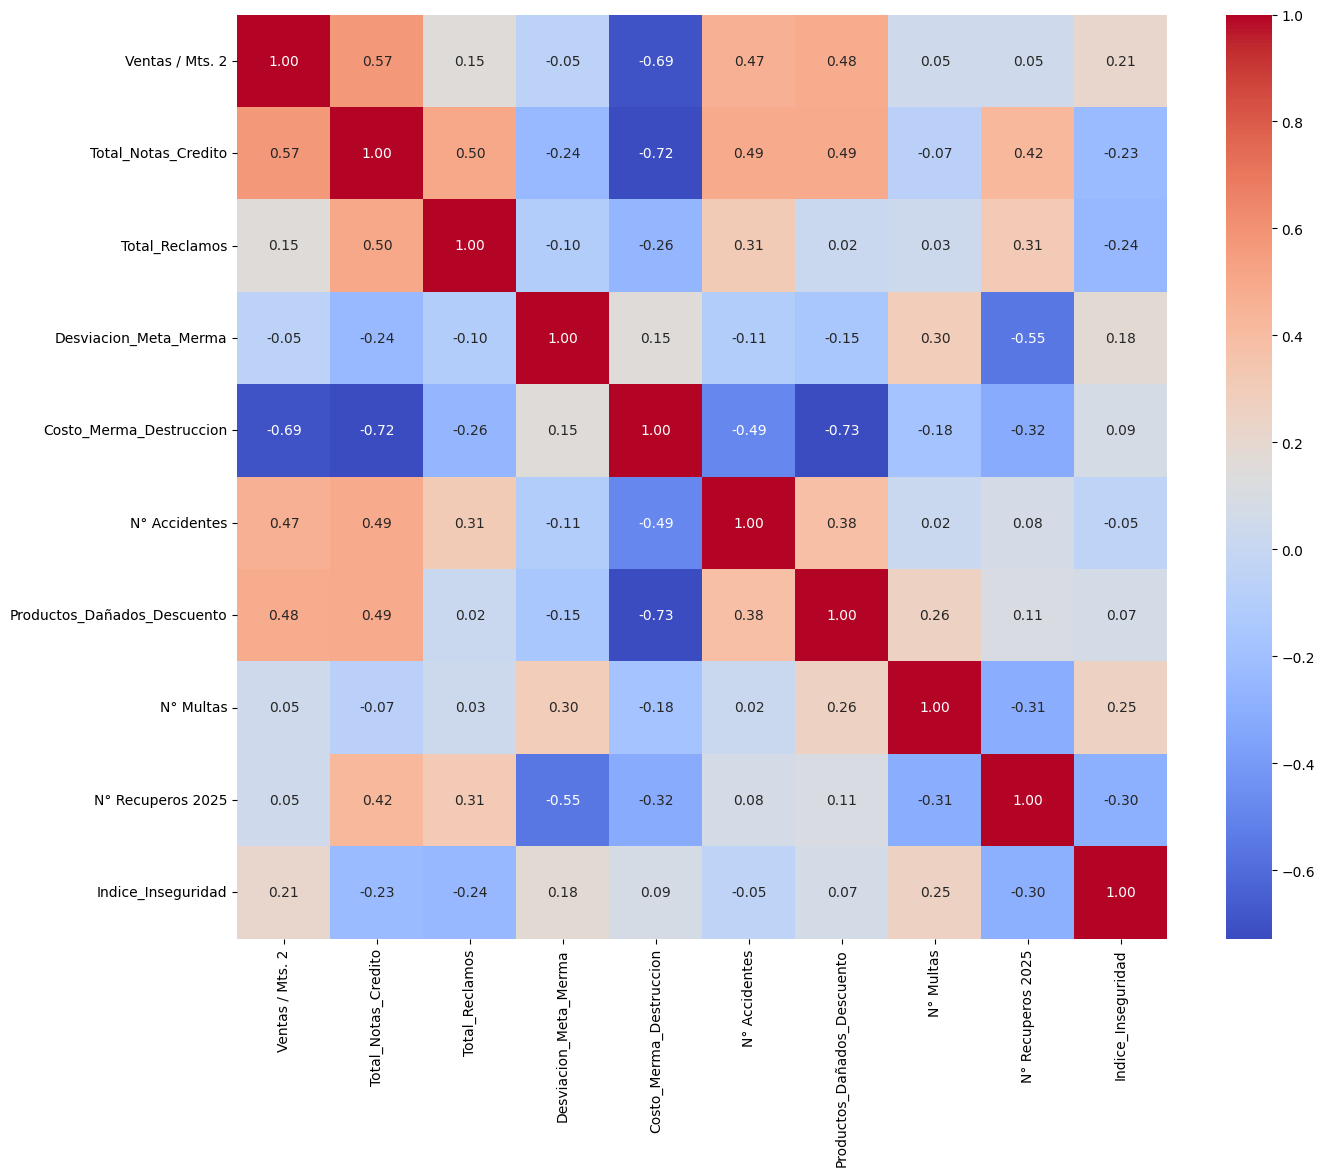

In [ ]:
### Matriz de Correlacion de Propuesta Final

variables_numericas_2 = Reporte_Propuesta_6.drop(
	columns=['Nombre_Sucursal', "Cluster_P3_MinMax_Pesos", "Riesgo_P3_MinMax_Pesos",
			 "RiskScore_P3", "Dañados_sobre_Ventas", "Riesgo_final"],
	errors='ignore'
)
variables_numericas_2 = variables_numericas_2.select_dtypes(include=[np.number])

plt.figure(figsize=(15, 12))
matriz_correlacion = variables_numericas_2.corr()
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
Reporte_Propuesta_6.to_excel("Reporte_Propuesta_6_MinMax_Pesos_2025(Chat Gpt).xlsx", index=False)

##### Vamos a realizar una prueba reemplazamdo Ventas por Ventas por Metro Cuadrado ###


In [ ]:
Metros_Cuadrados = pd.read_excel("Metros Cuadrados Sucursal.xlsx")
Metros_Cuadrados = Metros_Cuadrados.rename(columns={"Tienda": "Nombre_Sucursal"})
Df_Kmeans = Df_Kmeans.merge(Metros_Cuadrados[['Nombre_Sucursal', 'Mts. 2']], on='Nombre_Sucursal', how='left')


In [ ]:
Df_Kmeans['Ventas / Mts. 2'] = Df_Kmeans['Total_Ventas'] / Df_Kmeans['Mts. 2']


--- Perfil promedio de cada cluster (Propuesta 4 - MinMax+Pesos) ---
                                      Ventas / Mts. 2  Total_Notas_Credito  \
Riesgo_Propuesta_6 (Ventas / Mts. 2)                                         
Riesgo Alto                                1305554.07         3.150330e+08   
Riesgo Bajo                                2070489.82         5.361463e+08   
Riesgo Medio                               1136880.74         2.521517e+08   

                                      Desviacion_Meta_Merma  \
Riesgo_Propuesta_6 (Ventas / Mts. 2)                          
Riesgo Alto                                            -0.0   
Riesgo Bajo                                             0.0   
Riesgo Medio                                            0.0   

                                      Productos_Dañados_Descuento  \
Riesgo_Propuesta_6 (Ventas / Mts. 2)                                
Riesgo Alto                                           14178973.19   
Riesgo Bajo     

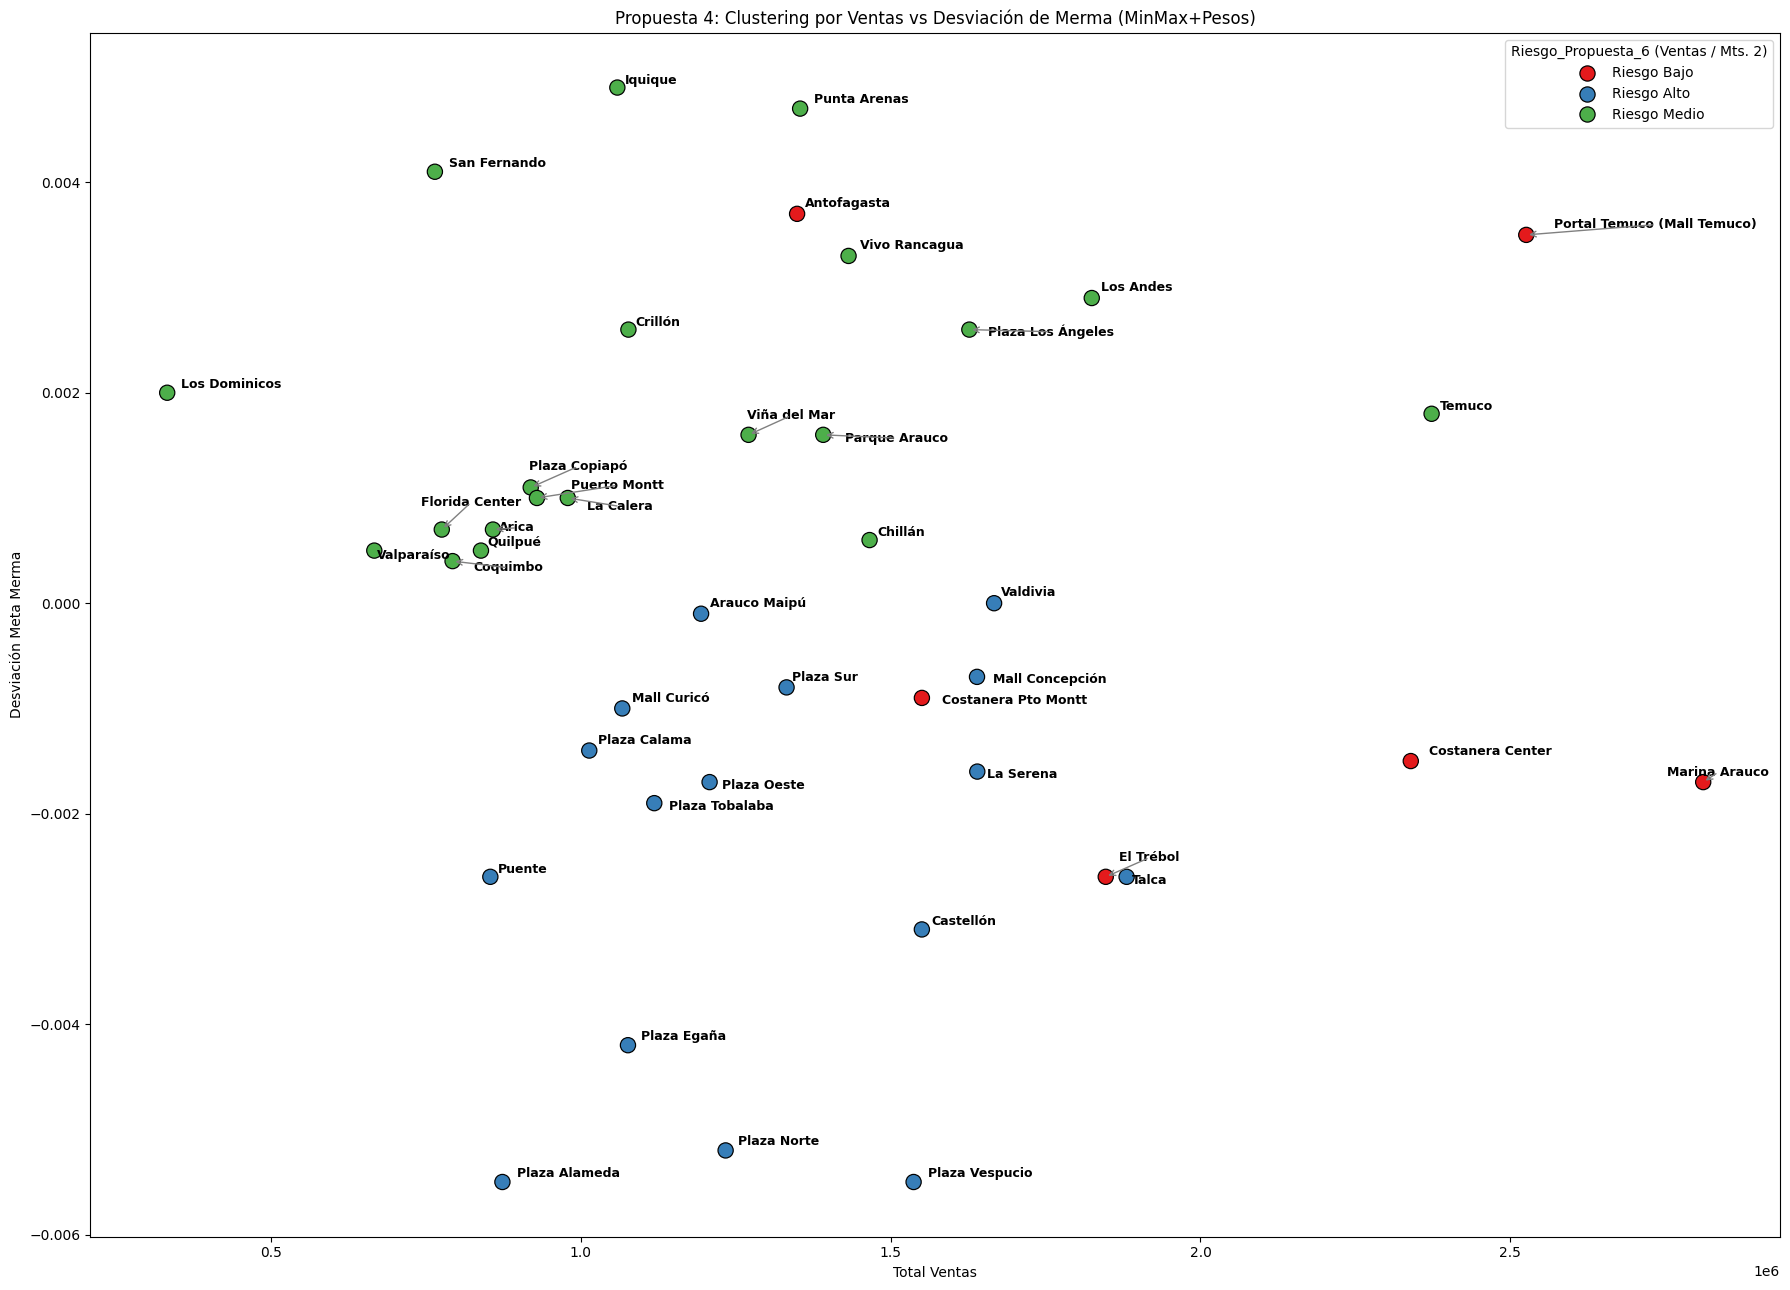


Sucursales en Cluster Riesgo Alto:
['Arauco Maipú', 'Castellón', 'La Serena', 'Mall Concepción', 'Mall Curicó', 'Plaza Alameda', 'Plaza Calama', 'Plaza Egaña', 'Plaza Norte', 'Plaza Oeste', 'Plaza Sur', 'Plaza Tobalaba', 'Plaza Vespucio', 'Puente', 'Talca', 'Valdivia']

Sucursales en Cluster Riesgo Bajo:
['Antofagasta', 'Costanera Center', 'Costanera Pto Montt', 'El Trébol', 'Marina Arauco', 'Portal Temuco (Mall Temuco)']

Sucursales en Cluster Riesgo Medio:
['Arica', 'Chillán', 'Coquimbo', 'Crillón', 'Florida Center', 'Iquique', 'La Calera', 'Los Andes', 'Los Dominicos', 'Parque Arauco', 'Plaza Copiapó', 'Plaza Los Ángeles', 'Puerto Montt', 'Punta Arenas', 'Quilpué', 'San Fernando', 'Temuco', 'Valparaíso', 'Vivo Rancagua', 'Viña del Mar']


In [ ]:
Weights_2 = {
    'Ventas / Mts. 2': 0.140,
    'Total_Notas_Credito': 0.085,
    'Desviacion_Meta_Merma': 0.18,
    'Productos_Dañados_Descuento': 0.180,
    'Costo_Merma_Destruccion': 0.18,
    'N° Accidentes': 0.0725,
    'Total_Reclamos': 0.0725,
    "N° Multas": 0.0325,
    "N° Recuperos 2025": 0.0425,
    "Indice Seguridad": 0.015
}
Variables_Modelo_Weights_2 = list(Weights_2.keys())

# --- 3. Limpiar posibles columnas duplicadas ---
Df_Kmeans = Df_Kmeans.loc[:, ~Df_Kmeans.columns.duplicated()]
if 'Cluster_MixMax_Weighted' in Df_Kmeans.columns:
    Df_Kmeans = Df_Kmeans.drop(columns=['Cluster_MixMax_Weighted'])

# --- 4. Escalamiento MinMax y aplicación de pesos ---
X_Scaled_MinMax_2 = MinMax_Scaler.fit_transform(Df_Kmeans[Variables_Modelo_Weights_2])

# Aplicar los pesos a cada columna
X_Weighted_MinMax_2 = X_Scaled_MinMax_2 * [Weights_2[col] for col in Variables_Modelo_Weights_2]

# --- 5. KMeans Clustering ---
kmeans_Weighted = KMeans(n_clusters=3, random_state=100, n_init=25,  init='k-means++', max_iter=500, tol=0.00002, algorithm='lloyd')
Clusters_Weighted_2 = kmeans_Weighted.fit_predict(X_Weighted_MinMax_2)

# --- 6. Añadir columna de cluster  ---
Df_Kmeans['Cluster_MixMax_Weighted(Ventas / Mts. 2)'] = Clusters_Weighted
Df_Kmeans["Riesgo_Propuesta_6 (Ventas / Mts. 2)"] = Df_Kmeans["Cluster_MixMax_Weighted(Ventas / Mts. 2)"].map(
    {
        0: "Riesgo Bajo",
        1: "Riesgo Medio",
        2: "Riesgo Alto"
    }
)

# --- 7. Resumen de clústeres ---
Resumen_Cluster_Propuesta_6_Ventas_Mts2 = Df_Kmeans.groupby('Riesgo_Propuesta_6 (Ventas / Mts. 2)')[Variables_Modelo_Weights_2].mean().round(2)
print("\n--- Perfil promedio de cada cluster (Propuesta 4 - MinMax+Pesos) ---")
print(Resumen_Cluster_Propuesta_6_Ventas_Mts2)

# --- 8. Visualización básica (ventas vs desviación de merma, por cluster) ---
plt.figure(figsize=(18, 13))
sns.scatterplot(
    data=Df_Kmeans,
    x='Ventas / Mts. 2',
    y='Desviacion_Meta_Merma',
    hue='Riesgo_Propuesta_6 (Ventas / Mts. 2)',
    palette='Set1',
    s=120,
    edgecolor='black'
)

# Crear una lista para ajustar etiquetas automáticamente
texts_MinMax = []
for i, txt in enumerate(Df_Kmeans['Nombre_Sucursal']):
    texts_MinMax.append(
        plt.text(
            Df_Kmeans['Ventas / Mts. 2'].iloc[i], 
            Df_Kmeans['Desviacion_Meta_Merma'].iloc[i], 
            txt, fontsize=9, weight='bold'
        )
    )
# Ajuste automático de etiquetas
adjust_text(texts_MinMax, arrowprops=dict(arrowstyle='->', color='grey', lw=1), force_points=0.25)

plt.title('Propuesta 4: Clustering por Ventas vs Desviación de Merma (MinMax+Pesos)')
plt.xlabel('Total Ventas')
plt.ylabel('Desviación Meta Merma')
plt.tight_layout()
plt.show()

# --- 9. Mostrar sucursales de cada cluster ---
for c in sorted(Df_Kmeans['Riesgo_Propuesta_6 (Ventas / Mts. 2)'].unique()):
    nombres = Df_Kmeans[Df_Kmeans['Riesgo_Propuesta_6 (Ventas / Mts. 2)'] == c]['Nombre_Sucursal'].tolist()
    print(f"\nSucursales en Cluster {c}:")
    print(nombres)


In [ ]:
# === Configuración ===
from sklearn.metrics import davies_bouldin_score

vars_model = [
    "Total_Ventas","Total_Notas_Credito","Total_Reclamos","Desviacion_Meta_Merma",
    "Costo_Merma_Destruccion","N° Accidentes","Productos_Dañados_Descuento",
    "N° Multas","N° Recuperos 2025","Indice_Inseguridad" 
]
w_prior = {
    'Total_Ventas': 0.14, 'Total_Notas_Credito': 0.13,
    'Desviacion_Meta_Merma': 0.16, 'Productos_Dañados_Descuento': 0.16,
    'Costo_Merma_Destruccion': 0.16, 'N° Accidentes': 0.07,
    'Total_Reclamos': 0.07, "N° Multas": 0.05,
    "N° Recuperos 2025": 0.07, "Indice_Inseguridad": 0.03   # si sigues con "Indice Seguridad", cámbialo aquí
}

# Límites por variable (opcional, evita pesos extremos)
bounds = {
    'Total_Ventas': (0.10, 0.17),
    'Desviacion_Meta_Merma': (0.10, 0.17),
    'Productos_Dañados_Descuento': (0.10, 0.17),
    'Costo_Merma_Destruccion': (0.10, 0.17),
    'Total_Notas_Credito': (0.10, 0.15),
}
# para el resto, aplica (0.02, 0.15) por defecto:
default_bounds = (0.02, 0.10)

# === Utilidades rápidas ===
def _project_simplex(v):
    # renormaliza al simplex (suma=1 y no negativos)
    v = np.maximum(v, 1e-9)
    return v / v.sum()

def _sample_weights(prior, n_samples=1000, jitter=0.25):
    # muestrea alrededor del prior (ruido multiplicativo), respeta bounds y renormaliza
    keys = list(prior.keys())
    arr = np.array([prior[k] for k in keys], dtype=float)
    out = []
    for _ in range(n_samples):
        noise = np.random.normal(0.0, jitter, size=arr.size)
        w = arr * (1.0 + noise)
        # clip por variable
        for i,k in enumerate(keys):
            lo, hi = bounds.get(k, default_bounds)
            w[i] = np.clip(w[i], lo, hi)
        w = _project_simplex(w)
        out.append(dict(zip(keys, w.tolist())))
    return out

def _evaluate_weights(W, Xdf, k=3, n_boot=5, sample_frac=0.85, random_state=100):
    # MinMax en todo el set (misma escala), luego bootstrap para estabilidad
    scaler = MinMaxScaler()
    Xmm = pd.DataFrame(scaler.fit_transform(Xdf[vars_model].astype(float)),
                       index=Xdf.index, columns=vars_model)
    w_sqrt = np.sqrt([W[v] for v in vars_model])
    sils, dbs = [], []
    for b in range(n_boot):
        rs = random_state + b
        idx = Xdf.sample(frac=sample_frac, random_state=rs).index
        Xw = Xmm.loc[idx, vars_model].values * w_sqrt
        km = KMeans(n_clusters=k, random_state=rs, n_init=50, init="k-means++", algorithm='lloyd')
        labels = km.fit_predict(Xw)
        sils.append(silhouette_score(Xw, labels))
        dbs.append(davies_bouldin_score(Xw, labels))
    return float(np.mean(sils)), float(np.std(sils)), float(np.mean(dbs))

# === Búsqueda ===
np.random.seed(123)
candidates = _sample_weights(w_prior, n_samples=2000, jitter=0.22)

rows = []
for i, W in enumerate(candidates, 1):
    sil_mean, sil_std, db_mean = _evaluate_weights(W, Df_Kmeans, k=3, n_boot=6, sample_frac=0.85)
    rows.append({
        "sil_mean": sil_mean, "sil_std": sil_std, "db_mean": db_mean, "W": W
    })

# orden: primero mayor silhouette, luego menor std (estabilidad), luego menor DB
rows = sorted(rows, key=lambda r: (-r["sil_mean"], r["sil_std"], r["db_mean"]))
best = rows[0]
print(">> Mejor candidato (k=3)")
print("sil_mean=", round(best["sil_mean"],4), "sil_std=", round(best["sil_std"],4), "db_mean=", round(best["db_mean"],3))
print("Pesos:")
for k,v in best["W"].items():
    print(f"  {k:28s} {v:.3f}")

# (Opcional) Top-5 para comparar
print("\nTOP 5 candidatos:")
for r in rows[:5]:
    print(f"sil={r['sil_mean']:.4f}  std={r['sil_std']:.4f}  db={r['db_mean']:.3f}  ",
          {k:round(v,3) for k,v in r['W'].items()})
    print(f"sil={r['sil_mean']:.4f}  std={r['sil_std']:.4f}  db={r['db_mean']:.3f}  ",
          {k:round(v,3) for k,v in r['W'].items()})



KeyboardInterrupt: 

In [ ]:
# Parámetros
vars_model = [
    "Total_Ventas","Total_Notas_Credito","Total_Reclamos","Desviacion_Meta_Merma",
    "Costo_Merma_Destruccion","N° Accidentes","Productos_Dañados_Descuento",
    "N° Multas","N° Recuperos 2025","Indice_Inseguridad" 
]
w_prior = {
    'Total_Ventas': 0.14, 'Total_Notas_Credito': 0.13,
    'Desviacion_Meta_Merma': 0.16, 'Productos_Dañados_Descuento': 0.16,
    'Costo_Merma_Destruccion': 0.16, 'N° Accidentes': 0.07,
    'Total_Reclamos': 0.07, "N° Multas": 0.05,
    "N° Recuperos 2025": 0.07, "Indice_Inseguridad": 0.03   # si sigues con "Indice Seguridad", cámbialo aquí
}



max_iter = 15
alpha = 0.6  # mezcla con el prior (1.0=todo prior; 0.0=todo datos)

# Inicializa con el prior (simplex)
w = _project_simplex(np.array([w_prior[v] for v in vars_model], float))

scaler = MinMaxScaler()
Xmm = pd.DataFrame(scaler.fit_transform(Df_Kmeans[vars_model].astype(float)),
                   index=Df_Kmeans.index, columns=vars_model)

for it in range(max_iter):
    # K-Means con sqrt(w)
    Xw = Xmm.values * np.sqrt(w)
    km = KMeans(n_clusters=3, random_state=100+it, n_init=50).fit(Xw)
    labels = km.labels_

    # Importancia por variable = var(media_de_cluster) ponderada por tamaño (between-cluster var)
    imp = []
    for j, col in enumerate(vars_model):
        means = Df_Kmeans.groupby(labels)[col].mean()  # en escala original o Xmm[col]
        # mejor usar Xmm (escala comparable):
        means = Xmm.groupby(labels)[col].mean()
        imp.append(np.var(means.values))
    imp = np.array(imp, float)
    imp = imp / (imp.sum() + 1e-12)

    # Mezcla con prior y respeta límites
    w = alpha * w + (1 - alpha) * imp
    # aplica bounds
    for j, k in enumerate(vars_model):
        lo, hi = bounds.get(k, default_bounds)
        w[j] = np.clip(w[j], lo, hi)
    w = _project_simplex(w)

    # Métricas
    sil = silhouette_score(Xw, labels)
    db  = davies_bouldin_score(Xw, labels)
    print(f"Iter {it+1:02d}: silhouette={sil:.4f}  DB={db:.3f}  w_first3={[round(x,3) for x in w[:3]]}")

# Pesos finales
w_fwkm = dict(zip(vars_model, w))
print("\nPesos finales (FW-kmeans-lite):")
for k,v in w_fwkm.items():
    print(f"  {k:28s} {v:.3f}")


Iter 01: silhouette=0.2132  DB=1.534  w_first3=[np.float64(0.152), np.float64(0.122), np.float64(0.066)]
Iter 02: silhouette=0.2340  DB=1.529  w_first3=[np.float64(0.155), np.float64(0.116), np.float64(0.085)]
Iter 03: silhouette=0.2389  DB=1.481  w_first3=[np.float64(0.157), np.float64(0.112), np.float64(0.089)]
Iter 04: silhouette=0.2428  DB=1.471  w_first3=[np.float64(0.157), np.float64(0.109), np.float64(0.091)]
Iter 05: silhouette=0.2449  DB=1.465  w_first3=[np.float64(0.158), np.float64(0.108), np.float64(0.093)]
Iter 06: silhouette=0.2460  DB=1.462  w_first3=[np.float64(0.158), np.float64(0.107), np.float64(0.094)]
Iter 07: silhouette=0.2467  DB=1.460  w_first3=[np.float64(0.158), np.float64(0.106), np.float64(0.094)]
Iter 08: silhouette=0.2471  DB=1.459  w_first3=[np.float64(0.158), np.float64(0.106), np.float64(0.094)]
Iter 09: silhouette=0.2473  DB=1.458  w_first3=[np.float64(0.158), np.float64(0.106), np.float64(0.095)]
Iter 10: silhouette=0.2474  DB=1.458  w_first3=[np.floa

Listo: 'grafico_A_PC1_danio_merma_v24.png' con contornos tipo 'a mano' y sin choques.


<Figure size 640x480 with 0 Axes>

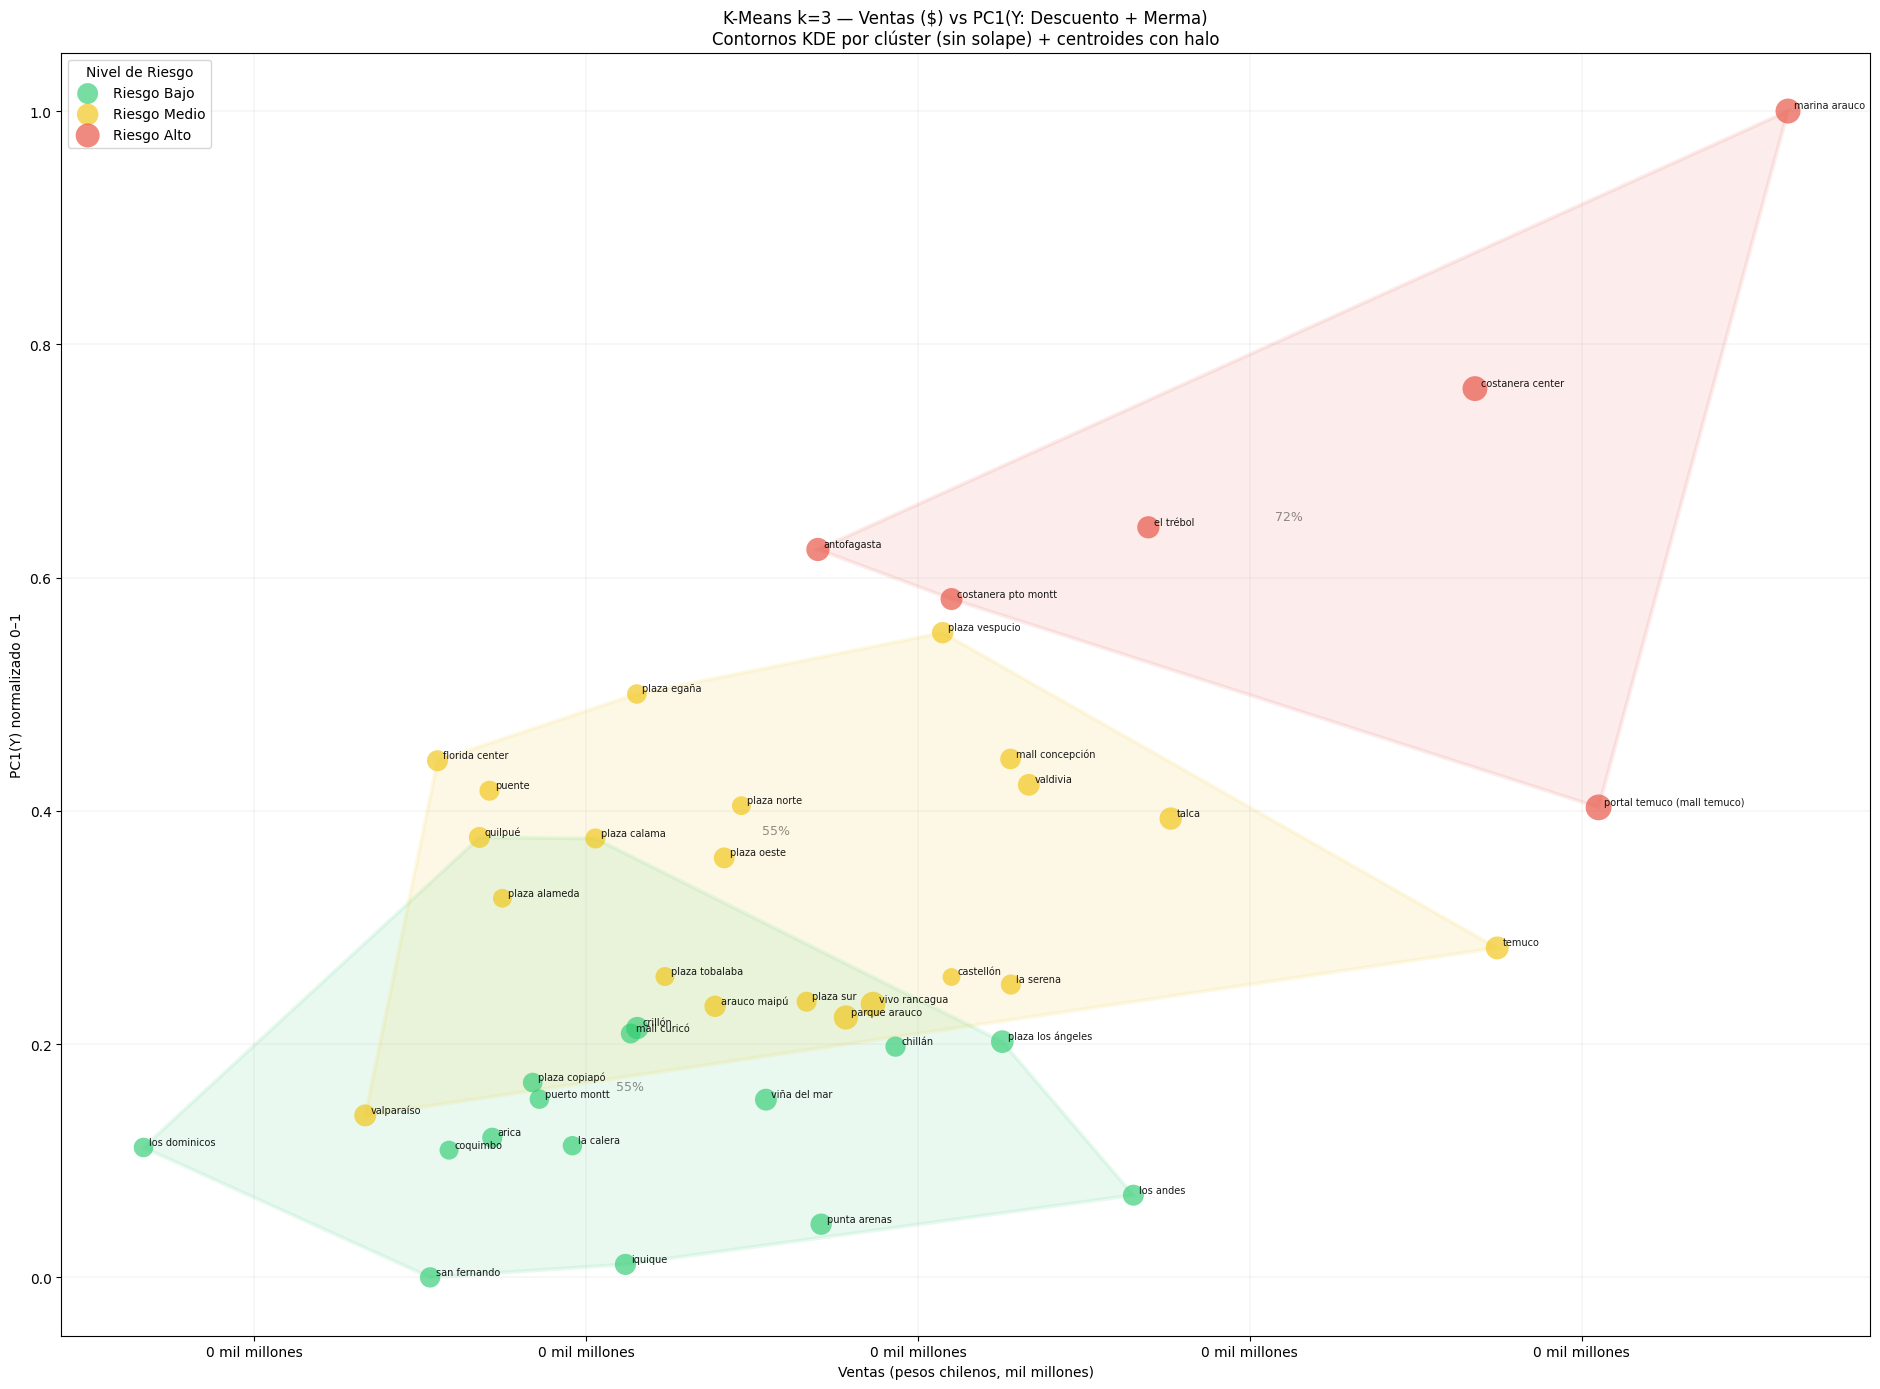

In [ ]:
# ==================== v24 — Contornos KDE por clúster (sin solape) ====================
# Usa objetos que ya tienes: xA_real_v16, yA01_v16, Clusters_Weighted_2025, 
# Riesgo_Propuesta_6, centers_xA_real_v16, centers_yA01_v16, color_map_v16, Reporte_Propuesta_6

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.ticker import FuncFormatter, MaxNLocator
from sklearn.neighbors import KernelDensity

# ---------- helpers ----------
def _fmt_milmill(x, pos): 
    return f"{int(round(x/1e9))} mil millones"

def kde_contour_polygon(x, y, mass=0.75, bw_scale=1.0, grid=400):
    """
    Devuelve un polígono (la mayor isolínea) que encierra ~mass de la densidad KDE.
    - Estandariza (z-score) para que X ($) y Y (0-1) pesen similar en KDE.
    - bw_scale: multiplica la banda de Scott (1.0 = base; <1 más ajustado, >1 más suave).
    """
    xy = np.column_stack([x, y]).astype(float)
    mu = xy.mean(axis=0); sd = xy.std(axis=0) + 1e-12
    z = (xy - mu) / sd

    # ancho de banda de Scott/Silverman en 2D
    n, d = z.shape
    h_scott = n**(-1.0/(d+4))
    bw = h_scott * bw_scale

    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(z)
    # umbral como cuantil de densidades en las propias muestras (aprox. HDR)
    scores = kde.score_samples(z)  # log densidad
    thr = np.quantile(scores, 1.0 - mass)

    # malla en z estandarizada
    mins = z.min(axis=0) - 0.5
    maxs = z.max(axis=0) + 0.5
    gx = np.linspace(mins[0], maxs[0], grid)
    gy = np.linspace(mins[1], maxs[1], grid)
    GX, GY = np.meshgrid(gx, gy)
    grid_pts = np.column_stack([GX.ravel(), GY.ravel()])
    Z = kde.score_samples(grid_pts).reshape(GX.shape)

    # extraer la isolínea principal (nivel = thr)
    cs = plt.contour(GX, GY, Z, levels=[thr])
    # tomar el path más largo
    polys = []
    if hasattr(cs, "collections") and cs.collections:
        for coll in cs.collections:
            paths = getattr(coll, "get_paths", lambda: [])()
            for p in paths:
                v = p.vertices
                if len(v) > 30:
                    polys.append(v)
    plt.clf()  # limpiar el contour auxiliar
    if not polys:  # fallback a convex hull simple si algo falla
        from scipy.spatial import ConvexHull
        hull = ConvexHull(z)
        poly_z = z[hull.vertices]
    else:
        poly_z = max(polys, key=lambda v: v.shape[0])

    # volver a unidades originales del gráfico
    poly = poly_z * sd + mu
    return poly

def polygons_overlap(poly1, poly2, step=10):
    """True si alguna muestra de vértices de un polígono cae dentro del otro (aprox)."""
    from matplotlib.path import Path
    p1, p2 = Path(poly1), Path(poly2)
    return p1.contains_points(poly2[::step]).any() or p2.contains_points(poly1[::step]).any()

# ---------- parámetros visuales (ajústalos si quieres) ----------
# nivel inicial por cluster (fracción de masa cubierta) y suavidad relative
mass_init = {"Riesgo Bajo": 0.75, "Riesgo Medio": 0.78, "Riesgo Alto": 0.72}
bw_scale  = {"Riesgo Bajo": 0.9,  "Riesgo Medio": 1.0,  "Riesgo Alto": 1.1}
mass_min  = 0.55     # no bajar de aquí al resolver solapes
decay     = 0.93     # factor para bajar mass cuando se detecta solape (7% menos cada ronda)
edge_lw   = 2.8
fill_alpha= 0.10

# ---------- construir contornos por clúster, evitando solape ----------
cluster_ids = sorted(set(Clusters_Weighted_2025))
contours = {}   # cid -> (poly, mass_used, color)

# color por mayoría de etiqueta de riesgo dentro del clúster
lvl_by_cid = {}
for cid in cluster_ids:
    lvl_by_cid[cid] = pd.Series(Riesgo_Propuesta_6[Clusters_Weighted_2025==cid]).mode().iloc[0]

# contornos iniciales
for cid in cluster_ids:
    m = (Clusters_Weighted_2025 == cid)
    lvl = lvl_by_cid[cid]
    poly = kde_contour_polygon(xA_real_v16[m], yA01_v16[m],
                               mass=mass_init[lvl], bw_scale=bw_scale[lvl])
    contours[cid] = (poly, mass_init[lvl], color_map_v16[lvl])

# resolver solapes
for _ in range(20):
    pairs = [(i,j) for i in cluster_ids for j in cluster_ids if i<j]
    conflicts = []
    for i,j in pairs:
        if polygons_overlap(contours[i][0], contours[j][0]):
            conflicts.append((i,j))
    if not conflicts:
        break
    for i,j in conflicts:
        for cid in (i,j):
            poly, m_used, col = contours[cid]
            lvl = lvl_by_cid[cid]
            new_m = max(mass_min, m_used*decay)
            if new_m < m_used - 1e-6:
                mask = (Clusters_Weighted_2025 == cid)
                new_poly = kde_contour_polygon(xA_real_v16[mask], yA01_v16[mask],
                                               mass=new_m, bw_scale=bw_scale[lvl])
                contours[cid] = (new_poly, new_m, col)

# ---------- plot ----------
fig, ax = plt.subplots(figsize=(19,14))

# puntos por nivel
for lvl in niveles_riesgo:
    m = (Riesgo_plot == lvl)
    if m.any():
        ax.scatter(xA_real_v16[m], yA01_v16[m],
                   s=(Reporte_Propuesta_6.loc[m,'RiskScore_P3']*600 + 20),
                   c=color_map_v16[lvl], alpha=0.65, edgecolors='none', label=lvl, zorder=2)

        # Añadir etiqueta a cada punto (nombre normalizado)
        # usamos un pequeño desplazamiento para que la etiqueta no tape el marcador
        for ii in np.where(m)[0]:
            ax.annotate(
                names_norm.iloc[ii],
                (xA_real_v16[ii], yA01_v16[ii]),
                xytext=(4,4), textcoords='offset points',
                fontsize=7, alpha=0.9, ha='left', va='center', zorder=5
            )

                  
# contornos KDE
for cid in cluster_ids:
    poly, m_used, col = contours[cid]
    ax.add_patch(Polygon(poly, closed=True, facecolor=col, edgecolor=col,
                         alpha=fill_alpha, lw=edge_lw, zorder=1))
    # etiqueta opcional del porcentaje usado
    cx, cy = poly[:,0].mean(), poly[:,1].mean()
    ax.text(cx, cy, f"{int(round(m_used*100))}%", fontsize=9, color="#333333", ha='center', va='center', alpha=0.55)




# ejes/estilo
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax.xaxis.set_major_formatter(FuncFormatter(_fmt_milmill))
ax.set_title("K-Means k=3 — Ventas ($) vs PC1(Y: Descuento + Merma)\nContornos KDE por clúster (sin solape) + centroides con halo")
ax.set_xlabel("Ventas (pesos chilenos, mil millones)")
ax.set_ylabel("PC1(Y) normalizado 0–1")
ax.grid(True, linewidth=0.3, alpha=0.45, zorder=0)
ax.legend(title="Nivel de Riesgo", frameon=True, loc='upper left')
plt.tight_layout()
plt.savefig("grafico_A_PC1_danio_merma_v24.png", dpi=300, bbox_inches='tight')
# plt.show()

print("Listo: 'grafico_A_PC1_danio_merma_v24.png' con contornos tipo 'a mano' y sin choques.")



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.ticker import FuncFormatter, MaxNLocator
from sklearn.neighbors import KernelDensity

# ---------- helpers ----------
def _fmt_milmill(x, pos): 
    return f"{int(round(x/1e9))} mil millones"

def kde_contour_polygon(x, y, mass=0.75, bw_scale=1.0, grid=400):
    """
    Devuelve un polígono (la mayor isolínea) que encierra ~mass de la densidad KDE.
    - Estandariza (z-score) para que X ($) y Y (0-1) pesen similar en KDE.
    - bw_scale: multiplica la banda de Scott (1.0 = base; <1 más ajustado, >1 más suave).
    """
    xy = np.column_stack([x, y]).astype(float)
    mu = xy.mean(axis=0); sd = xy.std(axis=0) + 1e-12
    z = (xy - mu) / sd

    # ancho de banda de Scott/Silverman en 2D
    n, d = z.shape
    h_scott = n**(-1.0/(d+4))
    bw = h_scott * bw_scale

    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(z)
    # umbral como cuantil de densidades en las propias muestras (aprox. HDR)
    scores = kde.score_samples(z)  # log densidad
    thr = np.quantile(scores, 1.0 - mass)

    # malla en z estandarizada
    mins = z.min(axis=0) - 0.5
    maxs = z.max(axis=0) + 0.5
    gx = np.linspace(mins[0], maxs[0], grid)
    gy = np.linspace(mins[1], maxs[1], grid)
    GX, GY = np.meshgrid(gx, gy)
    grid_pts = np.column_stack([GX.ravel(), GY.ravel()])
    Z = kde.score_samples(grid_pts).reshape(GX.shape)

    # extraer la isolínea principal (nivel = thr)
    cs = plt.contour(GX, GY, Z, levels=[thr])
    # tomar el path más largo
    polys = []
    if hasattr(cs, "collections") and cs.collections:
        for coll in cs.collections:
            paths = getattr(coll, "get_paths", lambda: [])()
            for p in paths:
                v = p.vertices
                if len(v) > 30:
                    polys.append(v)
    plt.clf()  # limpiar el contour auxiliar
    if not polys:  # fallback a convex hull simple si algo falla
        from scipy.spatial import ConvexHull
        hull = ConvexHull(z)
        poly_z = z[hull.vertices]
    else:
        poly_z = max(polys, key=lambda v: v.shape[0])

    # volver a unidades originales del gráfico
    poly = poly_z * sd + mu
    return poly

def polygons_overlap(poly1, poly2, step=10):
    """True si alguna muestra de vértices de un polígono cae dentro del otro (aprox)."""
    from matplotlib.path import Path
    p1, p2 = Path(poly1), Path(poly2)
    return p1.contains_points(poly2[::step]).any() or p2.contains_points(poly1[::step]).any()

# ---------- parámetros visuales (ajústalos si quieres) ----------
# nivel inicial por cluster (fracción de masa cubierta) y suavidad relative
mass_init = {"Riesgo Bajo": 0.75, "Riesgo Medio": 0.78, "Riesgo Alto": 0.72}
bw_scale  = {"Riesgo Bajo": 0.9,  "Riesgo Medio": 1.0,  "Riesgo Alto": 1.1}
mass_min  = 0.55     # no bajar de aquí al resolver solapes
decay     = 0.93     # factor para bajar mass cuando se detecta solape (7% menos cada ronda)
edge_lw   = 2.8
fill_alpha= 0.10

# ---------- construir contornos por clúster, evitando solape ----------
cluster_ids = sorted(set(labels_V12))
contours = {}   # cid -> (poly, mass_used, color)

# color por mayoría de etiqueta de riesgo dentro del clúster
lvl_by_cid = {}
for cid in cluster_ids:
    lvl_by_cid[cid] = pd.Series(Riesgo_Propuesta_6[labels_V12==cid]).mode().iloc[0]

# contornos iniciales
for cid in cluster_ids:
    m = (labels_V12 == cid)
    lvl = lvl_by_cid[cid]
    poly = kde_contour_polygon(xA_real_v16[m], yA01_v16[m],
                               mass=mass_init[lvl], bw_scale=bw_scale[lvl])
    contours[cid] = (poly, mass_init[lvl], color_map_v16[lvl])

# resolver solapes
for _ in range(20):
    pairs = [(i,j) for i in cluster_ids for j in cluster_ids if i<j]
    conflicts = []
    for i,j in pairs:
        if polygons_overlap(contours[i][0], contours[j][0]):
            conflicts.append((i,j))
    if not conflicts:
        break
    for i,j in conflicts:
        for cid in (i,j):
            poly, m_used, col = contours[cid]
            lvl = lvl_by_cid[cid]
            new_m = max(mass_min, m_used*decay)
            if new_m < m_used - 1e-6:
                mask = (labels_V12 == cid)
                new_poly = kde_contour_polygon(xA_real_v16[mask], yA01_v16[mask],
                                               mass=new_m, bw_scale=bw_scale[lvl])
                contours[cid] = (new_poly, new_m, col)

# ---------- plot ----------
fig, ax = plt.subplots(figsize=(21,16))

# puntos por nivel
for lvl in niveles_riesgo:
    m = (Riesgo_plot == lvl)
    if m.any():
        ax.scatter(xA_real_v16[m], yA01_v16[m],
                   s=(report_df_v11.loc[m,'RiskScore_P6_v11']*600 + 20),
                   c=color_map_v16[lvl], alpha=0.65, edgecolors='none', label=lvl, zorder=2)

                  
# contornos KDE
for cid in cluster_ids:
    poly, m_used, col = contours[cid]
    ax.add_patch(Polygon(poly, closed=True, facecolor=col, edgecolor=col,
                         alpha=fill_alpha, lw=edge_lw, zorder=1))
    # etiqueta opcional del porcentaje usado (eliminada según solicitud)
    # cx, cy = poly[:,0].mean(), poly[:,1].mean()
    # ax.text(cx, cy, f"{int(round(m_used*100))}%", fontsize=9, color="#333333", ha='center', va='center', alpha=0.55)

### centroides (color por clúster: verde/amarillo/rojo según color_map_v16)
for idx, cid in enumerate(cluster_ids):
    cx = centers_xA_real_v18[idx]
    cy = centers_yA01_v17[idx]
    lvl = lvl_by_cid[cid]
    col = color_map_v16[lvl]
    ax.scatter(cx, cy, s=420, marker='X', edgecolors='black', linewidths=1.2,
               alpha=0.95, c=col, zorder=3)
### etiquetas en todos los puntos
if col_suc_v16:
    _annotate_all_points(ax, xA_real_v16, yA01_v16,
                         report_df_v11[col_suc_v16].astype(str).values, fontsize=5)


# ejes/estilo
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax.xaxis.set_major_formatter(FuncFormatter(_fmt_milmill))
ax.set_xlabel("Ventas (pesos chilenos, mil millones)")
ax.set_ylabel("PC1(Y) normalizado 0–1")
ax.grid(True, linewidth=0.3, alpha=0.45, zorder=0)
ax.legend(title="Nivel de Riesgo", frameon=True, loc='upper left')
plt.tight_layout()
plt.savefig("grafico_A_PC1_danio_merma_v24.png", dpi=300, bbox_inches='tight')
# plt.show()

print("Listo: 'grafico_A_PC1_danio_merma_v24.png' con contornos tipo 'a mano' y sin choques.")

NameError: name 'labels_V12' is not defined

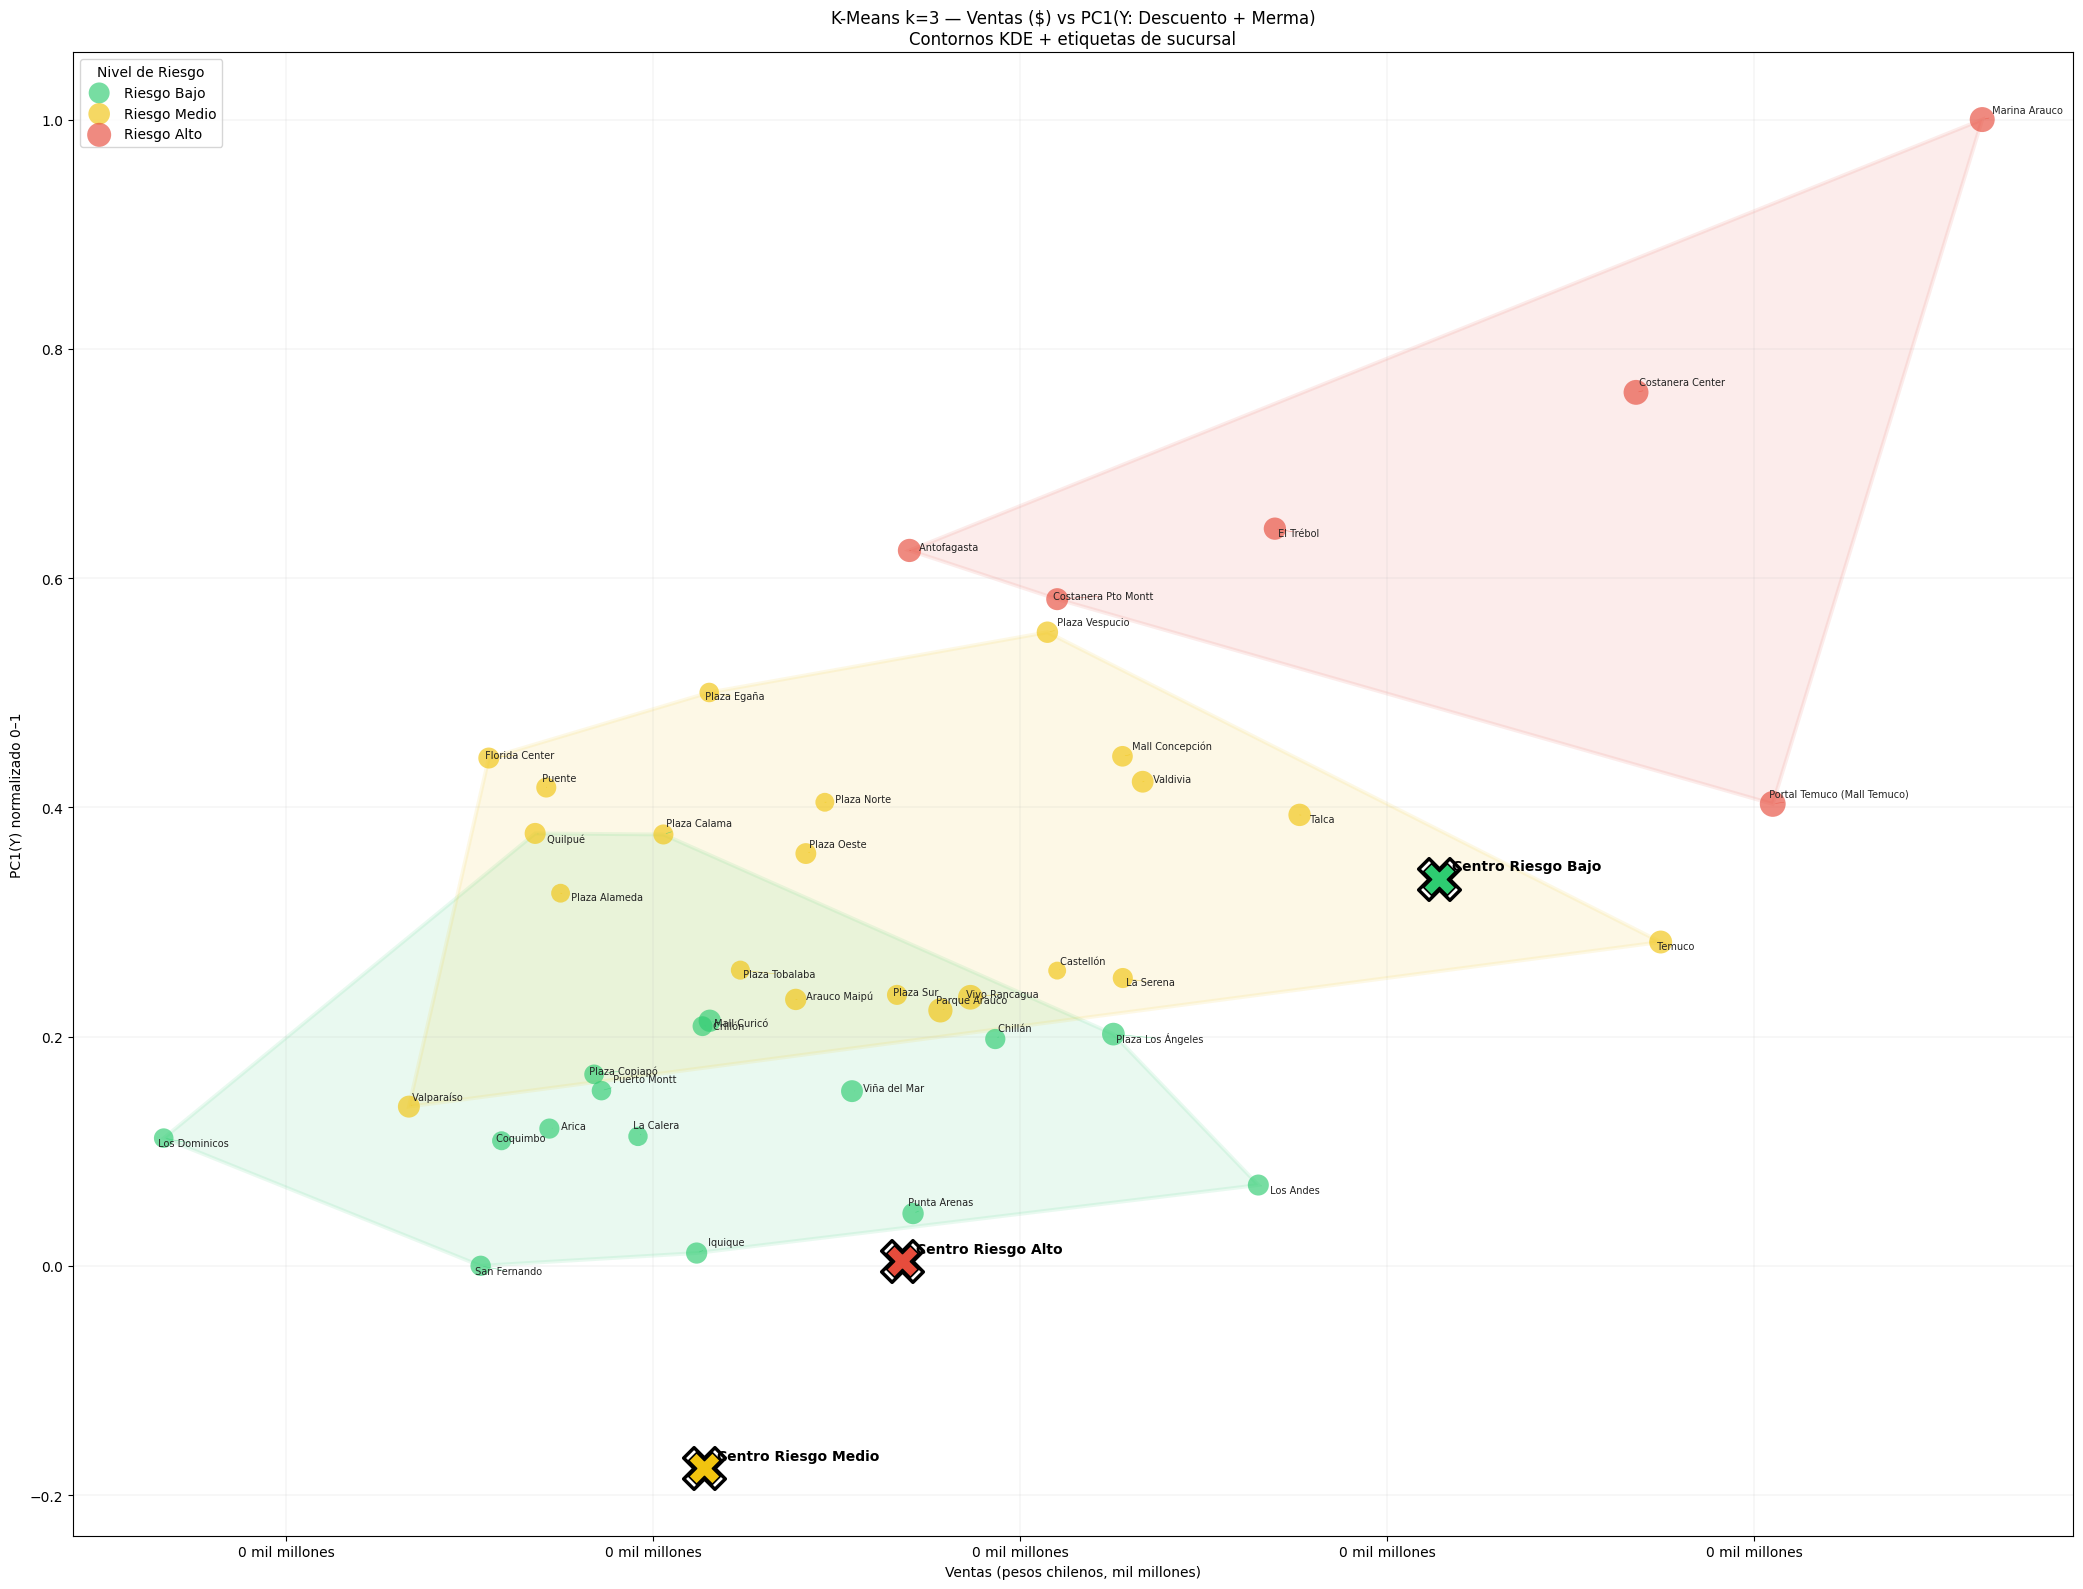

Listo: 'grafico_A_PC1_danio_merma_v25_labels.png' con nombres de todas las sucursales.


In [ ]:
# ==================== Gráfico KDE + etiquetas de sucursales ====================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.ticker import FuncFormatter, MaxNLocator

# ---- detectar columna de sucursal
if 'col_sucursal_v8' in globals() and col_sucursal_v8 in Reporte_Propuesta_6.columns:
    _col_suc = col_sucursal_v8
else:
    _cands = [c for c in Reporte_Propuesta_6.columns if c.lower() in
              ['nombre_sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']]
    _col_suc = _cands[0] if _cands else None

# ---- helpers (si no existen por v24, los definimos)
from matplotlib.path import Path
try:
    kde_contour_polygon
except NameError:
    from sklearn.neighbors import KernelDensity
    def kde_contour_polygon(x, y, mass=0.75, bw_scale=1.0, grid=400):
        xy = np.column_stack([x, y]).astype(float)
        mu = xy.mean(axis=0); sd = xy.std(axis=0) + 1e-12
        z = (xy - mu) / sd
        n, d = z.shape
        h_scott = n**(-1.0/(d+4))
        bw = h_scott * bw_scale
        kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(z)
        scores = kde.score_samples(z)
        thr = np.quantile(scores, 1.0 - mass)
        gx = np.linspace(z[:,0].min()-0.5, z[:,0].max()+0.5, grid)
        gy = np.linspace(z[:,1].min()-0.5, z[:,1].max()+0.5, grid)
        GX, GY = np.meshgrid(gx, gy)
        Z = kde.score_samples(np.column_stack([GX.ravel(), GY.ravel()])).reshape(GX.shape)
        cs = plt.contour(GX, GY, Z, levels=[thr])
        polys = []
        for coll in cs.collections:
            for p in coll.get_paths():
                v = p.vertices
                if len(v) > 30:
                    polys.append(v)
        plt.clf()
        if not polys:
            from scipy.spatial import ConvexHull
            hull = ConvexHull(z); poly_z = z[hull.vertices]
        else:
            poly_z = max(polys, key=lambda v: v.shape[0])
        return poly_z * sd + mu

def polygons_overlap(poly1, poly2, step=10):
    p1, p2 = Path(poly1), Path(poly2)
    return p1.contains_points(poly2[::step]).any() or p2.contains_points(poly1[::step]).any()

def _fmt_milmill(x, pos): 
    return f"{int(round(x/1e9))} mil millones"

# ---- contornos (si no vienen de v24, los recomputamos con los mismos parámetros)
need = ['contours','cluster_ids']
if not all(n in globals() for n in need):
    mass_init = {"Riesgo Bajo": 0.75, "Riesgo Medio": 0.78, "Riesgo Alto": 0.72}
    bw_scale  = {"Riesgo Bajo": 0.9,  "Riesgo Medio": 1.0,  "Riesgo Alto": 1.1}
    mass_min, decay = 0.55, 0.93
    cluster_ids = sorted(set(Clusters_Weighted_2025))
    lvl_by_cid = {cid: pd.Series(Riesgo_Propuesta_6[Clusters_Weighted_2025==cid]).mode().iloc[0] for cid in cluster_ids}
    contours = {}
    for cid in cluster_ids:
        m = (Clusters_Weighted_2025 == cid); lvl = lvl_by_cid[cid]
        contours[cid] = (kde_contour_polygon(xA_real_v16[m], yA01_v16[m],
                                             mass=mass_init[lvl], bw_scale=bw_scale[lvl]),
                         mass_init[lvl], color_map_v16[lvl])
    for _ in range(20):
        pairs = [(i,j) for i in cluster_ids for j in cluster_ids if i<j]
        conflicts = [(i,j) for i,j in pairs if polygons_overlap(contours[i][0], contours[j][0])]
        if not conflicts: break
        for i,j in conflicts:
            for cid in (i,j):
                poly,m_used,col = contours[cid]
                lvl = lvl_by_cid[cid]; new_m = max(mass_min, m_used*decay)
                if new_m < m_used - 1e-6:
                    ms = (Clusters_Weighted_2025 == cid)
                    contours[cid] = (kde_contour_polygon(xA_real_v16[ms], yA01_v16[ms],
                                                         mass=new_m, bw_scale=bw_scale[lvl]),
                                     new_m, col)

# ---- función de etiquetado con desplazamiento ligero y línea guía
def annotate_points(ax, x, y, labels, color, base=6):
    dirs = np.array([[1,0],[0,1],[-1,0],[0,-1],[1,1],[-1,1],[1,-1],[-1,-1]])
    for i, (xi, yi, lab) in enumerate(zip(x, y, labels)):
        dx, dy = dirs[i % len(dirs)] * base
        ax.annotate(f" {lab}", (xi, yi), xytext=(dx, dy), textcoords="offset points",
                    fontsize=7, color="#222",
                    arrowprops=dict(arrowstyle='-', lw=0.4, color=color, alpha=0.6))

# ---- plot con etiquetas
fig, ax = plt.subplots(figsize=(21,16))

# puntos por nivel
for lvl in niveles_riesgo:
    m = (Riesgo_plot == lvl)
    if m.any():
        ax.scatter(xA_real_v16[m], yA01_v16[m],
                   s=(Reporte_Propuesta_6.loc[m,'RiskScore_P3']*600 + 20),
                   c=color_map_v16[lvl], alpha=0.65, edgecolors='none', label=lvl, zorder=2)

# contornos KDE no superpuestos
for cid in cluster_ids:
    poly, m_used, col = contours[cid]
    ax.add_patch(Polygon(poly, closed=True, facecolor=col, edgecolor=col,
                         alpha=0.10, lw=2.8, zorder=1))

# centroides con halo
for cx, cy, rname in zip(centers_xA_real_v16, centers_yA01_v16,
                         getattr(Centroides_Propuesta_6, 'Riesgo_label', pd.Series(['']*len(centers_xA_real_v16)))):
    ax.scatter(cx, cy, s=900, marker='X', c='white', edgecolor='black', linewidths=2.5, zorder=6)
    ax.scatter(cx, cy, s=520, marker='X', c=color_map_v16.get(rname, "#333333"),
               edgecolor='black', linewidths=1.2, zorder=7)
    if rname:
        ax.annotate(f" Centro {rname}", (cx, cy), xytext=(6,6),
                    textcoords='offset points', fontsize=10, fontweight='bold', zorder=8)

# etiquetas de TODAS las sucursales (con ligeros offsets y líneas guía)
if _col_suc:
    for lvl in ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]:
        m = (Riesgo_Propuesta_6 == lvl)
        annotate_points(ax,
                        xA_real_v16[m], yA01_v16[m],
                        Reporte_Propuesta_6.loc[m, _col_suc].astype(str).values,
                        color=color_map_v16[lvl], base=5 if lvl!="Riesgo Bajo" else 6)

# ejes/estilo
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax.xaxis.set_major_formatter(FuncFormatter(_fmt_milmill))
ax.set_title("K-Means k=3 — Ventas ($) vs PC1(Y: Descuento + Merma)\nContornos KDE + etiquetas de sucursal")
ax.set_xlabel("Ventas (pesos chilenos, mil millones)")
ax.set_ylabel("PC1(Y) normalizado 0–1")
ax.grid(True, linewidth=0.3, alpha=0.45, zorder=0)
ax.legend(title="Nivel de Riesgo", frameon=True, loc='upper left')
plt.tight_layout()
plt.savefig("grafico_A_PC1_danio_merma_v25_labels.png", dpi=300, bbox_inches='tight')
plt.show()

print("Listo: 'grafico_A_PC1_danio_merma_v25_labels.png' con nombres de todas las sucursales.")


c:\Users\tvalenzuelah\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\covariance\_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (38.267223223216561 > 38.260028454795297). You may want to try with a higher value of support_fraction (current value: 0.579).
  warnings.warn(
c:\Users\tvalenzuelah\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\covariance\_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (36.463931200706639 > 36.426817310066369). You may want to try with a higher value of support_fraction (current value: 0.611).
  warnings.warn(
c:\Users\tvalenzuelah\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\covariance\_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (36.240177058509019 > 36.165436392125038). You

Listo: 'grafico_A_PC1_danio_merma_v23.png' con elipses sin solaparse.


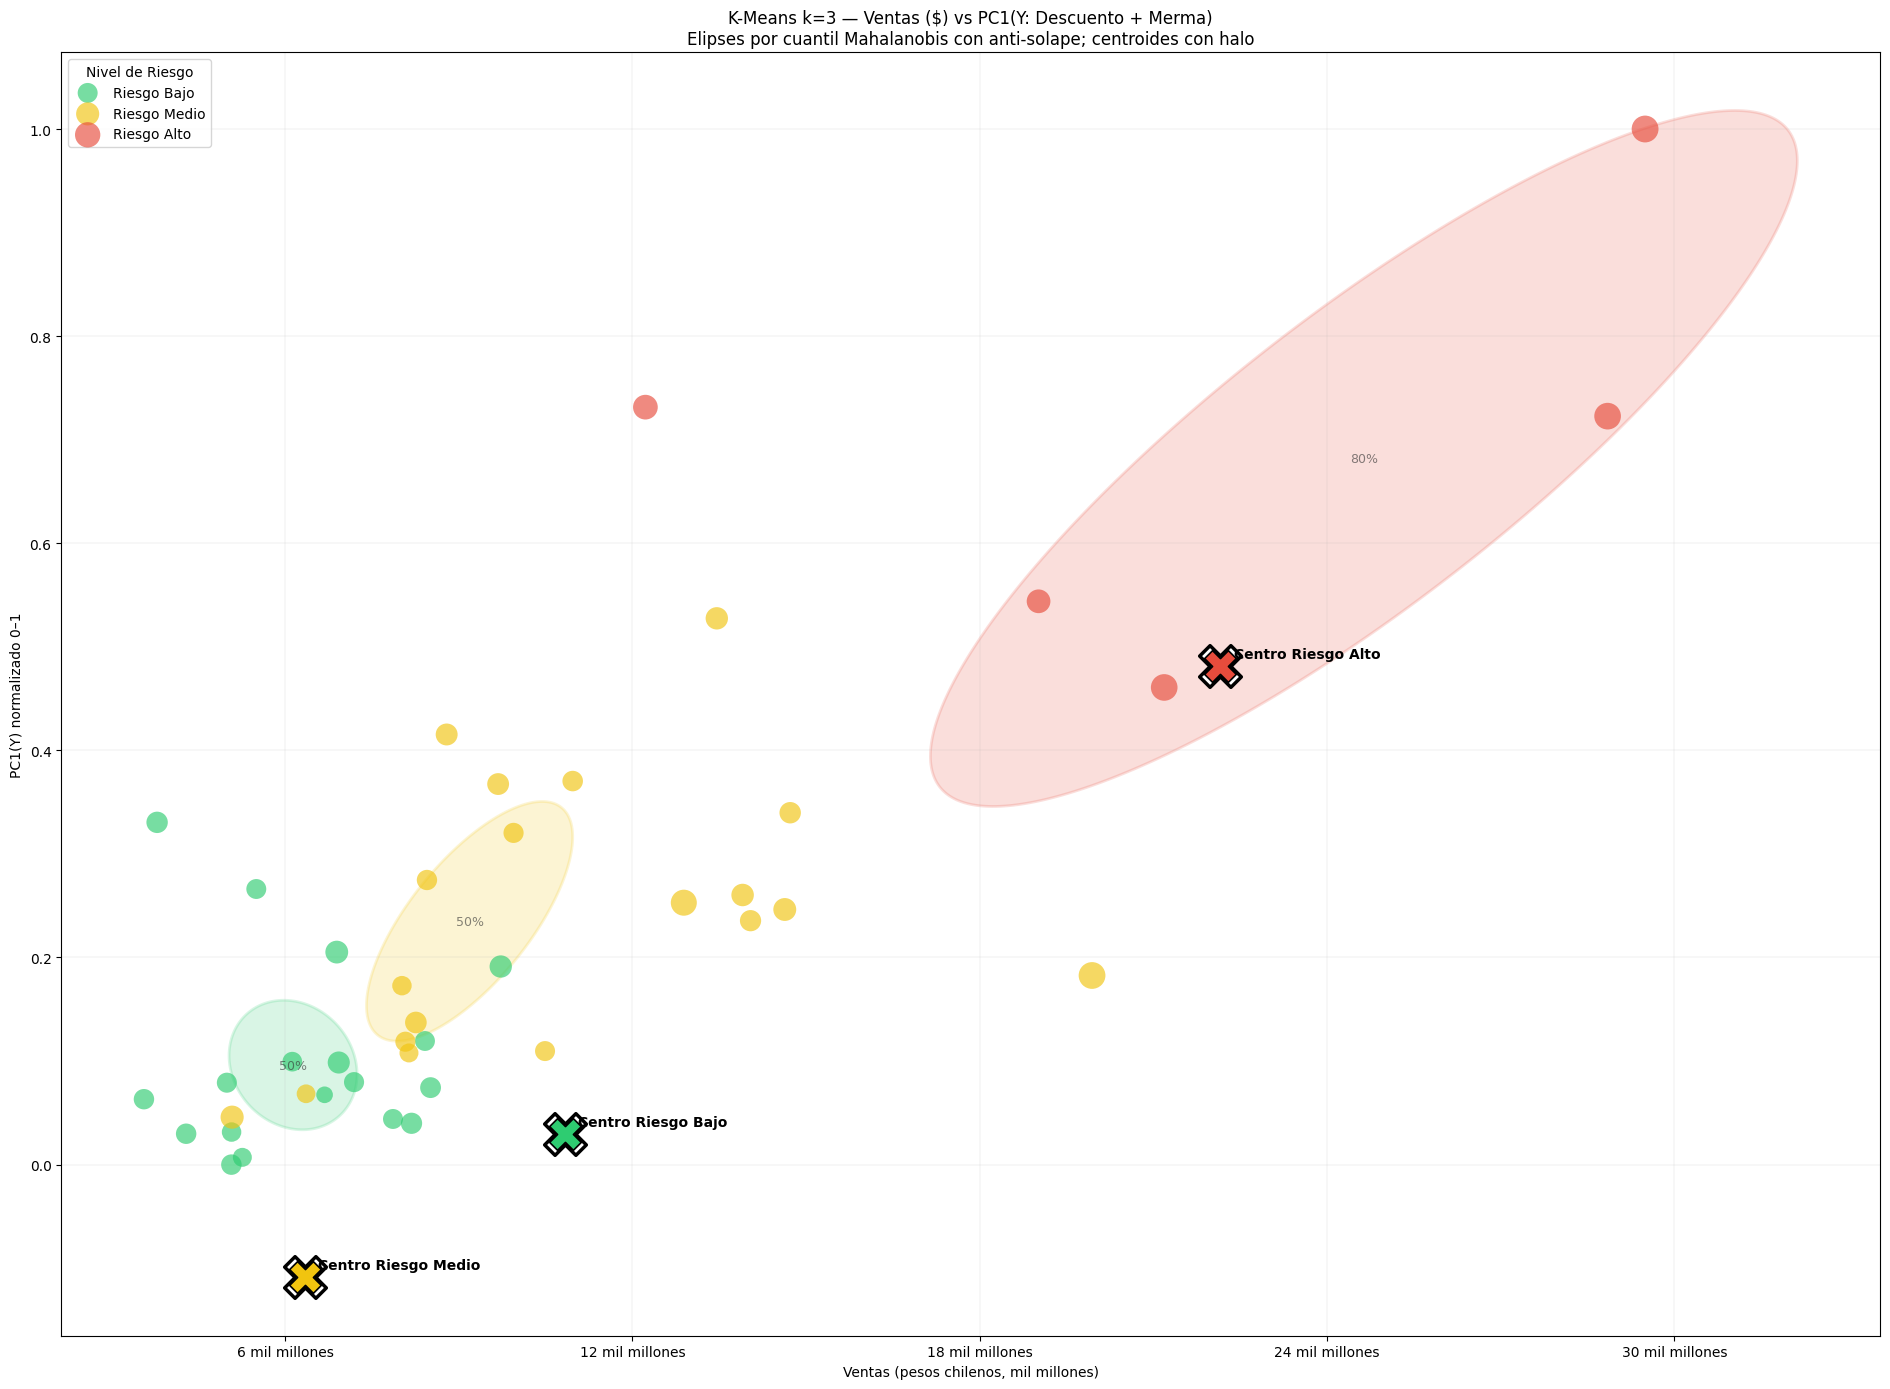

In [ ]:
# ==================== Gráfico A sin elipses superpuestas — v23 ====================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.path import Path
from matplotlib.ticker import FuncFormatter, MaxNLocator

# ---------- Chequeos mínimos ----------
need = ['xA_real_v16','yA01_v16','Clusters_Weighted_2025','Riesgo_Propuesta_6',
        'centers_xA_real_v16','centers_yA01_v16','color_map_v16','Reporte_Propuesta_6']
missing = [n for n in need if n not in globals()]
if missing:
    raise RuntimeError(f"Faltan en memoria: {missing}")

# ---------- Helpers: polígono de elipse por cuantil Mahalanobis ----------
def ellipse_polygon_from_cluster(x, y, q=0.80, n_pts=360, robust=True):
    """
    Devuelve un polígono (Nx2) de la elipse del conjunto {(X-μ)^T Σ^{-1} (X-μ) = r_q},
    donde r_q es el cuantil q de las distancias Mahalanobis al cuadrado del clúster.
    """
    pts = np.column_stack([x, y])
    mu = pts.mean(axis=0)
    cov = np.cov(pts, rowvar=False)
    if robust:
        try:
            from sklearn.covariance import MinCovDet
            m = MinCovDet().fit(pts)
            mu, cov = m.location_, m.covariance_
        except Exception:
            pass
    # cuantil de las distancias reales del clúster
    Cinv = np.linalg.pinv(cov)
    d2 = np.einsum('ij,jk,ik->i', pts-mu, Cinv, pts-mu)  # (x-μ)^T Σ^{-1} (x-μ)
    r2 = np.quantile(d2, q)  # radio^2 a ese cuantil

    # autovalores/vectores para construir elipse
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]

    # semiejes (a,b) escalados por sqrt(r2)
    a, b = np.sqrt(np.clip(vals, 1e-12, None)) * np.sqrt(max(r2, 1e-12))

    # puntos de elipse
    t = np.linspace(0, 2*np.pi, n_pts, endpoint=False)
    circ = np.vstack([np.cos(t)*a, np.sin(t)*b]).T  # (n,2) en base de eigenvectors
    poly = mu + circ @ vecs.T
    return poly

def polygons_overlap(poly1, poly2):
    """Aproximación: hay solape si algún vértice de uno cae dentro del otro (en ambos sentidos)."""
    p1, p2 = Path(poly1), Path(poly2)
    if p1.contains_points(poly2[::8]).any():  # muestrear para acelerar
        return True
    if p2.contains_points(poly1[::8]).any():
        return True
    return False

# ---------- Construir elipses por clúster con anti-solape ----------
cluster_ids = sorted(set(Clusters_Weighted_2025))
# cuantil inicial por clúster (puedes empezar más alto si quieres)
q_init, q_min, decay = 0.80, 0.50, 0.90  # 80% → como mínimo 50%, bajando 10% cuando haya choque
ellipses = {}  # cid -> (poly, q_usado)

# elipses iniciales
for cid in cluster_ids:
    m = (Clusters_Weighted_2025 == cid)
    ellipses[cid] = (ellipse_polygon_from_cluster(xA_real_v16[m], yA01_v16[m], q=q_init, robust=True), q_init)

# iterar mientras haya solapes (hasta 20 rondas)
for _ in range(20):
    pairs = [(i,j) for i in cluster_ids for j in cluster_ids if i<j]
    overlaps = []
    for i,j in pairs:
        if polygons_overlap(ellipses[i][0], ellipses[j][0]):
            overlaps.append((i,j))
    if not overlaps:
        break
    # para cada par en conflicto, reduce suavemente ambos cuantiles
    for i,j in overlaps:
        for cid in (i,j):
            poly,q = ellipses[cid]
            new_q = max(q_min, q*decay)
            if new_q < q - 1e-9:  # solo si realmente bajó
                m = (Clusters_Weighted_2025 == cid)
                poly_new = ellipse_polygon_from_cluster(xA_real_v16[m], yA01_v16[m], q=new_q, robust=True)
                ellipses[cid] = (poly_new, new_q)

# ---------- Plot ----------
def _fmt_milmill(x, pos): return f"{int(round(x/1e9))} mil millones"

fig, ax = plt.subplots(figsize=(19,14))

# puntos (un poco más transparentes)
for lvl in ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]:
    m = (Riesgo_Propuesta_6 == lvl)
    if m.any():
        ax.scatter(xA_real_v16[m], yA01_v16[m],
                   s=(Reporte_Propuesta_6.loc[m,'RiskScore_P3']*600 + 20),
                   c=color_map_v16[lvl], alpha=0.65, edgecolors='none', label=lvl, zorder=2)

# dibujar elipses no superpuestas con relleno suave y borde más visible
for cid in cluster_ids:
    poly, q_used = ellipses[cid]
    # color por mayoría de nivel dentro del clúster
    lvl = pd.Series(Riesgo_Propuesta_6[Clusters_Weighted_2025==cid]).mode().iloc[0]
    face = color_map_v16[lvl]
    ax.add_patch(Polygon(poly, closed=True, facecolor=face, edgecolor=face, alpha=0.18, lw=2.0, zorder=1))
    # opcional: mostrar el cuantil usado
    cx = poly[:,0].mean(); cy = poly[:,1].mean()
    ax.text(cx, cy, f"{int(round(q_used*100))}%", fontsize=9, color="#333333", ha='center', va='center', alpha=0.6)

# centroides con halo (doble capa) + etiqueta
for cx, cy, rname in zip(centers_xA_real_v16, centers_yA01_v16,
                         getattr(Centroides_Propuesta_6,'Riesgo_label', pd.Series(['']*len(centers_xA_real_v16)))):
    ax.scatter(cx, cy, s=900, marker='X', c='white', edgecolor='black', linewidths=2.5, zorder=6)
    ax.scatter(cx, cy, s=520, marker='X', c=color_map_v16.get(rname, "#333333"),
               edgecolor='black', linewidths=1.2, zorder=7)
    if rname:
        ax.annotate(f" Centro {rname}", (cx, cy), xytext=(6,6),
                    textcoords='offset points', fontsize=10, fontweight='bold', zorder=8)

# ejes y leyenda
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax.xaxis.set_major_formatter(FuncFormatter(_fmt_milmill))
ax.set_title("K-Means k=3 — Ventas ($) vs PC1(Y: Descuento + Merma)\n"
             "Elipses por cuantil Mahalanobis con anti-solape; centroides con halo")
ax.set_xlabel("Ventas (pesos chilenos, mil millones)")
ax.set_ylabel("PC1(Y) normalizado 0–1")
ax.grid(True, linewidth=0.3, alpha=0.45, zorder=0)
ax.legend(title="Nivel de Riesgo", frameon=True, loc='upper left')
plt.tight_layout()
plt.savefig("grafico_A_PC1_danio_merma_v23.png", dpi=300, bbox_inches='tight')
# plt.show()

print("Listo: 'grafico_A_PC1_danio_merma_v23.png' con elipses sin solaparse.")

In [ ]:
eed_core_v15 = ['X_scaled_v8','weights_sqrt_v8','reporte_p3_v8']
missing_core_v15 = [n for n in need_core_v15 if n not in globals()]
if missing_core_v15:
    raise RuntimeError(f"Faltan objetos previos: {missing_core_v15}. Ejecuta primero la Propuesta 3 (v8).")
    
# Columna sucursal
if 'col_sucursal_v8' in globals() and col_sucursal_v8 in reporte_p3_v8.columns:
    col_suc_v15 = col_sucursal_v8
else:
    _cands_v15 = [c for c in reporte_p3_v8.columns if c.lower() in
                  ['nombre_sucursal','sucursal','tienda','cod_sucursal','código_sucursal','codigo_sucursal']]
    col_suc_v15 = _cands_v15[0] if _cands_v15 else None

# K-Means k=3 en el espacio completo (MinMax + √peso), si no existe
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as _np
import pandas as pd
import matplotlib.pyplot as plt

X_weighted_v15 = X_scaled_v8.values * weights_sqrt_v8

if all(v in globals() for v in ['labels_k3_v14','riesgo_k3_v14','centroids_df_scaled_v14']):
    labels_k3_v15 = labels_k3_v14
    riesgo_k3_v15  = riesgo_k3_v14
    centroids_df_scaled_v15 = centroids_df_scaled_v14.copy()
else:
    km_k3_v15 = KMeans(n_clusters=3, init="k-means++", tol= 0.00002, n_init=50, random_state=100, max_iter= 500, algorithm= "lloyd") 

    labels_k3_v15 = km_k3_v15.fit_predict(X_weighted_v15)
    sil_k3_v15 = float(silhouette_score(X_weighted_v15, labels_k3_v15))
    risk_tmp_v15 = reporte_p3_v8['RiskScore_P3'].values
    means_tmp_v15 = pd.Series(risk_tmp_v15).groupby(labels_k3_v15).mean().sort_values()
    map_riskname_v15 = {cid: ("Riesgo Bajo" if i==0 else "Riesgo Medio" if i==1 else "Riesgo Alto")
                        for i, cid in enumerate(means_tmp_v15.index)}
    riesgo_k3_v15 = pd.Series(labels_k3_v15).map(map_riskname_v15).values
    centers_weighted_v15 = km_k3_v15.cluster_centers_
    centroids_df_scaled_v15 = pd.DataFrame(centers_weighted_v15 / weights_sqrt_v8,
                                           columns=X_scaled_v8.columns)
    print(f"[k=3] Silhouette (7D MinMax+√peso): {sil_k3_v15:.4f}")

# ---------------- funciones utilitarias ----------------
def _fit_ellipse_from_points(ax, x, y, n_std=1.8, linewidth=1.2, linestyle='--'):
    """
    Dibuja una elipse de cobertura basada en media+covarianza:
    - n_std ~ "cuántas sigmas" (1.8–2.0 suele verse bien)
    - no fija color (usa el por defecto); sin relleno.
    """
    if len(x) < 3:
        return
    cov = _np.cov(x, y)
    vals, vecs = _np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    theta = _np.degrees(_np.arctan2(*vecs[:,0][::-1]))
    width, height = 2 * n_std * _np.sqrt(vals.clip(min=1e-12))
    ell = plt.matplotlib.patches.Ellipse((x.mean(), y.mean()),
                                         width, height, angle=theta,
                                         fill=False, linestyle=linestyle,
                                         linewidth=linewidth)
    ax.add_patch(ell)

def _annotate_all_points(ax, x, y, labels, fontsize=7):
    for xi, yi, txt in zip(x, y, labels):
        ax.annotate(f" {txt}", (xi, yi), xytext=(2,2),
                    textcoords="offset points", fontsize=fontsize)

# ---------------- GRÁFICO A: X=Ventas(0–1), Y=PC1(Descuento + Merma) ----------------
from sklearn.decomposition import PCA
vars_yA_v15 = ['Productos_Dañados_Descuento','Merma_Destruccion_Costo']
pca_yA_v15 = PCA(n_components=1, random_state=42)
pc1A_v15 = pca_yA_v15.fit_transform(X_scaled_v8[vars_yA_v15].values).ravel()

# orientar PC1 a correlación positiva con el riesgo
riskA_v15 = reporte_p3_v8['RiskScore_P3'].values
if _np.corrcoef(pc1A_v15, riskA_v15)[0,1] < 0:
    pc1A_v15 = -pc1A_v15
    compsA_v15 = -pca_yA_v15.components_[0]
else:
    compsA_v15 = pca_yA_v15.components_[0]

# normalizar a 0–1 para el eje Y; X ya está en 0–1 (MinMax)
yA_min_v15, yA_max_v15 = float(pc1A_v15.min()), float(pc1A_v15.max())
yA01_v15 = (pc1A_v15 - yA_min_v15) / (yA_max_v15 - yA_min_v15 + 1e-12)
xA01_v15 = X_scaled_v8['Ventas_Totales'].values

# centroides proyectados en este plano
centers_yA_pc1_v15 = (centroids_df_scaled_v15[vars_yA_v15].values @ compsA_v15.reshape(-1,1)).ravel()
centers_yA01_v15 = (centers_yA_pc1_v15 - yA_min_v15) / (yA_max_v15 - yA_min_v15 + 1e-12)
centers_xA01_v15 = centroids_df_scaled_v15['Ventas_Totales'].values

# plot
plt.figure(figsize=(11,7))
for lvl in ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]:
    m = (riesgo_k3_v15 == lvl)
    if m.any():
        plt.scatter(xA01_v15[m], yA01_v15[m],
                    s=(reporte_p3_v8.loc[m, 'RiskScore_P3']*600 + 20),
                    alpha=0.9, label=lvl)

# Elipses por clúster (usando labels_k3_v15 numéricos)
for cid in sorted(set(labels_k3_v15)):
    mask_c = (labels_k3_v15 == cid)
    _fit_ellipse_from_points(plt.gca(),
                             xA01_v15[mask_c], yA01_v15[mask_c],
                             n_std=1.68, linewidth=0.78, linestyle='-')

# Centroides como marcadores grandes (forma X)
plt.scatter(centers_xA01_v15, centers_yA01_v15,
            s=500, marker='X', linewidths=1.0)

# Etiquetas en TODOS los puntos
if col_suc_v15:
    _annotate_all_points(plt.gca(), xA01_v15, yA01_v15,
                         reporte_p3_v8[col_suc_v15].astype(str).values, fontsize=4)

plt.title("K-Means k=3 — Ventas (X) vs PC1(Y: Descuento + Merma)\nBurbujas ∝ RiskScore_P3; elipses = dispersión por clúster")
plt.xlabel("Ventas (normalizado 0–1)")
plt.ylabel("PC1(Y): Descuento+Merma (normalizado 0–1)")
plt.legend(title="Nivel de Riesgo", frameon=True)
plt.grid(True, linewidth=0.3, alpha=0.5)
plt.tight_layout()
plt.savefig("grafico_A_PC1_danio_merma_v15.png", dpi=300, bbox_inches='tight')
plt.show()

# ---------------- GRÁFICO B: X=Ventas(0–1), Y=Desviación Meta Merma (real) + corte 0 ----------------
xB01_v15 = X_scaled_v8['Ventas_Totales'].values
yB_real_v15 = reporte_p3_v8['Desviacion_Meta_Merma'].astype(float).values

# centroides en unidades reales para Y
yB_min_v15 = float(reporte_p3_v8['Desviacion_Meta_Merma'].min())
yB_max_v15 = float(reporte_p3_v8['Desviacion_Meta_Merma'].max())
centers_yB01_v15 = centroids_df_scaled_v15['Desviacion_Meta_Merma'].values
centers_yB_real_v15 = yB_min_v15 + centers_yB01_v15 * (yB_max_v15 - yB_min_v15 + 1e-12)
centers_xB01_v15 = centroids_df_scaled_v15['Ventas_Totales'].values

plt.figure(figsize=(20,15))
for lvl in ["Riesgo Bajo","Riesgo Medio","Riesgo Alto"]:
    m = (riesgo_k3_v15 == lvl)
    if m.any():
        plt.scatter(xB01_v15[m], yB_real_v15[m],
                    s=(reporte_p3_v8.loc[m, 'RiskScore_P3']*600 + 20),
                    alpha=0.78, label=lvl)

# Elipses por clúster en este plano
for cid in sorted(set(labels_k3_v15)):
    mask_c = (labels_k3_v15 == cid)
    _fit_ellipse_from_points(plt.gca(),
                             xB01_v15[mask_c], yB_real_v15[mask_c],
                             n_std=1.9, linewidth=1.0, linestyle='-')

# Centroides
plt.scatter(centers_xB01_v15, centers_yB_real_v15,
            s=500, marker='X', linewidths=1.0)

# Línea de corte en 0 y sombreado de la zona negativa (si existe)
plt.axhline(0, linestyle='--', linewidth=1.0)
if (yB_real_v15 < 0).any():
    ymin_plot = min(yB_real_v15.min(), centers_yB_real_v15.min())
    plt.fill_between([0,1], ymin_plot, 0, alpha=0.08)

# Etiquetas en TODOS los puntos
if col_suc_v15:
    _annotate_all_points(plt.gca(), xB01_v15, yB_real_v15,
                         reporte_p3_v8[col_suc_v15].astype(str).values, fontsize=7)

plt.title("K-Means k=3 — Ventas (X) vs Desviación Meta Merma (Y)\nCorte en 0; elipses = dispersión por clúster")
plt.xlabel("Ventas (normalizado 0–1)")
plt.ylabel("Desviación Meta Merma (valor real)")
plt.legend(title="Nivel de Riesgo", frameon=True)
plt.grid(True, linewidth=0.3, alpha=0.5)
plt.tight_layout()
plt.savefig("grafico_B_desv_meta_merma_v15.png", dpi=300, bbox_inches='tight')
plt.show()

print("\nListo:")
print(" - grafico_A_PC1_danio_merma_v15.png")
print(" - grafico_B_desv_meta_merma_v15.png")

NameError: name 'need_core_v15' is not defined


📌 Varianza Explicada por el PCA:
[0.93653252]

✅ Dataset listo para aplicar K-Means:
   PCA_Ventas_Notas  Total_Reclamos  Desviacion_Meta_Merma  \
0          0.002285        0.009756               0.132692   
1          0.021210        0.019512               0.077885   
2         -0.108006        0.017073               0.089423   
3         -0.069614        0.002439               0.034615   
4         -0.008004        0.019512               0.087981   

   Costo_Merma_Destruccion  N° Accidentes  Productos_Dañados_Descuento  \
0                 0.043651       0.019512                     0.116454   
1                 0.099969       0.066341                     0.006288   
2                 0.149503       0.003902                     0.021521   
3                 0.117599       0.003902                     0.003175   
4                 0.104847       0.007805                     0.005814   

   N° Multas  
0   0.070000  
1   0.000000  
2   0.023333  
3   0.000000  
4   0.000000  

✅ Sil

Variable  p-valor  Significativo
0                 Total_Ventas   0.0000           True
1          Total_Notas_Credito   0.0000           True
2               Total_Reclamos   0.0342           True
3        Desviacion_Meta_Merma   0.4057          False
4      Costo_Merma_Destruccion   0.0000           True
5                N° Accidentes   0.0005           True
6  Productos_Dañados_Descuento   0.0004           True
7                    N° Multas   0.8500          False

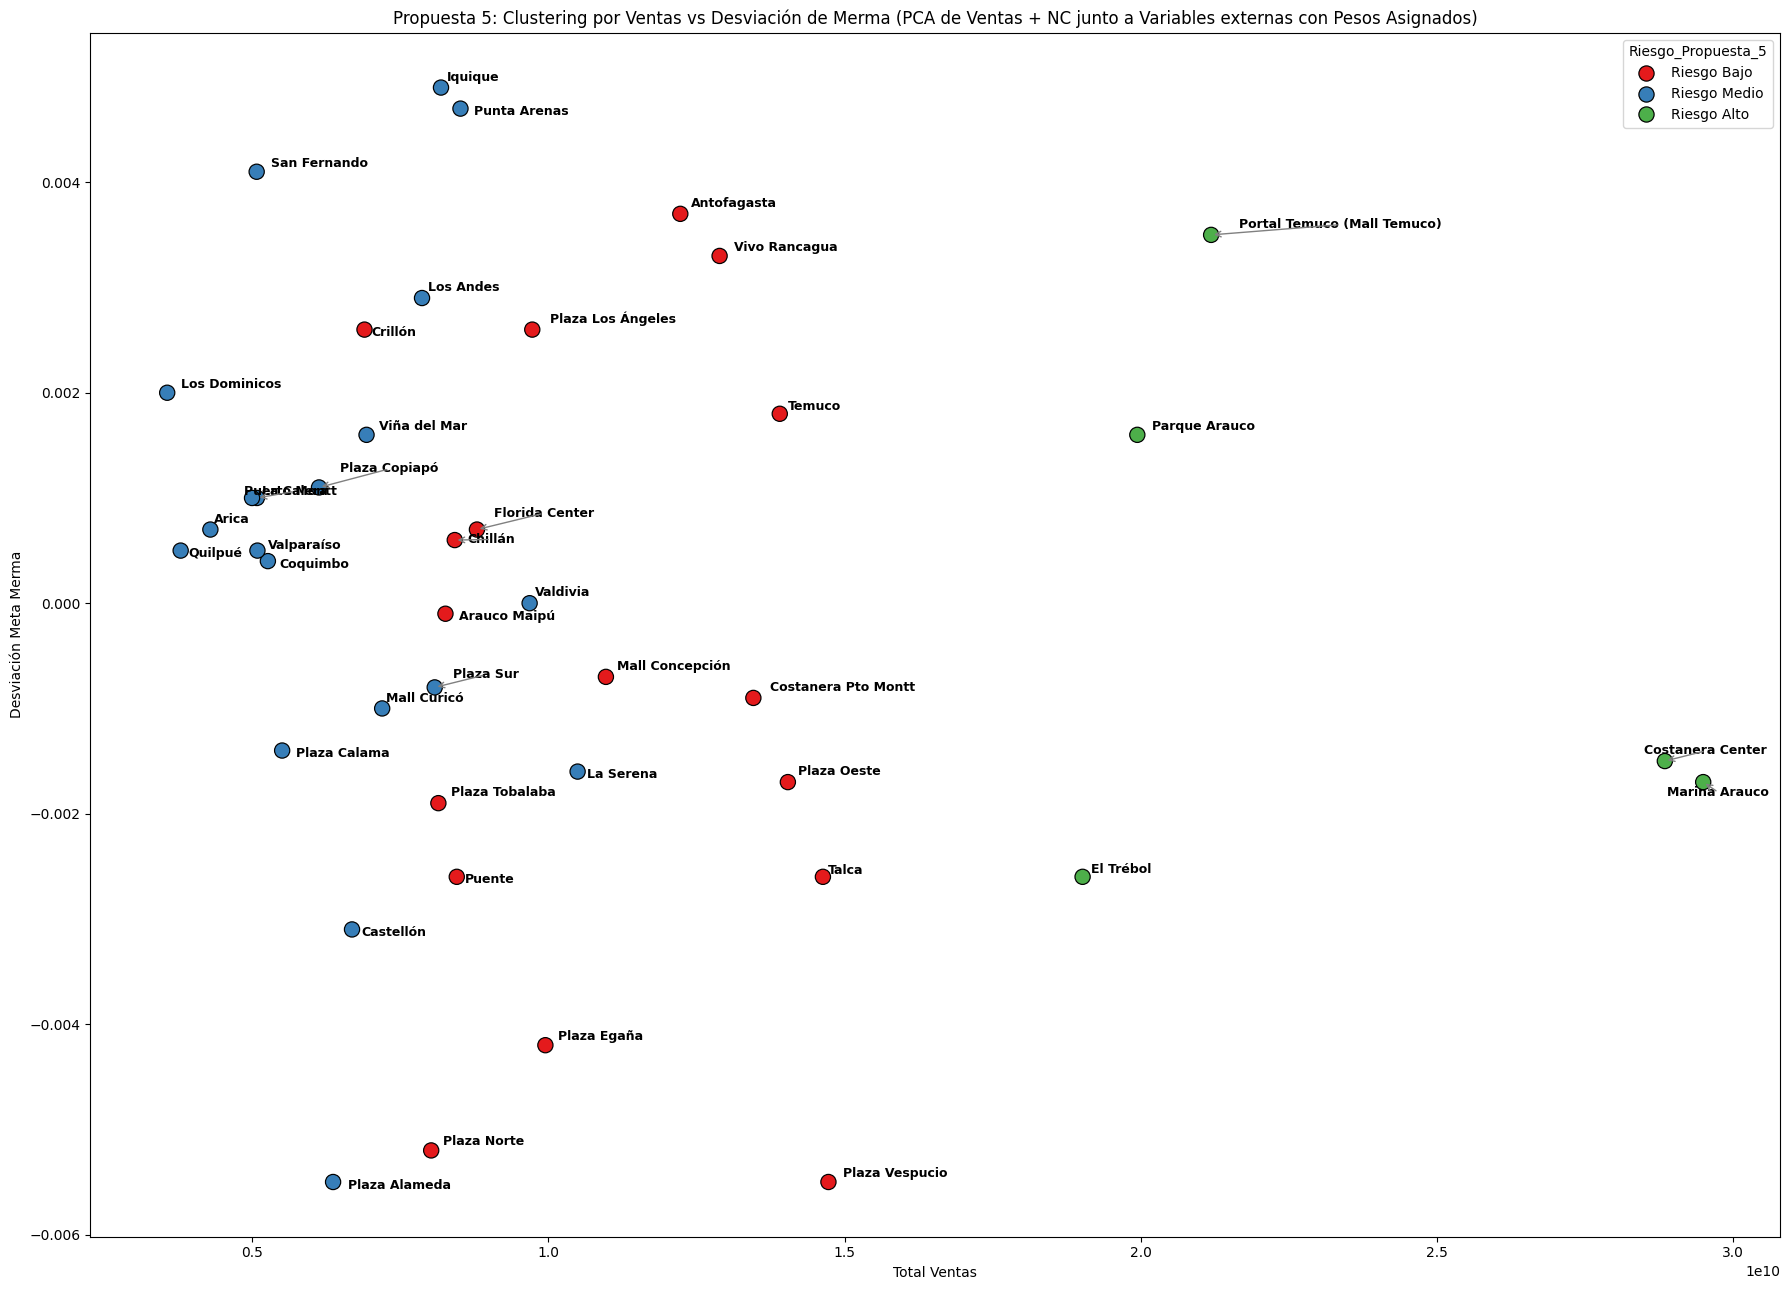


Sucursales en Cluster Riesgo Alto:
['Costanera Center', 'El Trébol', 'Marina Arauco', 'Parque Arauco', 'Portal Temuco (Mall Temuco)']

Sucursales en Cluster Riesgo Bajo:
['Antofagasta', 'Arauco Maipú', 'Chillán', 'Costanera Pto Montt', 'Crillón', 'Florida Center', 'Mall Concepción', 'Plaza Egaña', 'Plaza Los Ángeles', 'Plaza Norte', 'Plaza Oeste', 'Plaza Tobalaba', 'Plaza Vespucio', 'Puente', 'Talca', 'Temuco', 'Vivo Rancagua']

Sucursales en Cluster Riesgo Medio:
['Arica', 'Castellón', 'Coquimbo', 'Iquique', 'La Calera', 'La Serena', 'Los Andes', 'Los Dominicos', 'Mall Curicó', 'Plaza Alameda', 'Plaza Calama', 'Plaza Copiapó', 'Plaza Sur', 'Puerto Montt', 'Punta Arenas', 'Quilpué', 'San Fernando', 'Valdivia', 'Valparaíso', 'Viña del Mar']


In [ ]:
### --- Propuesta 5: K-Means con PCA y Pesos sobre variables seleccionadas --- ###

Variables_PCA_correlacionadas = ["Total_Ventas", 'Total_Notas_Credito']

Variables_externas = ["Total_Reclamos", "Desviacion_Meta_Merma", "Costo_Merma_Destruccion", "N° Accidentes", "Productos_Dañados_Descuento", "N° Multas"]
Weights_P5 = {
    "PCA_Ventas_Notas": 0.30,
    "Total_Reclamos": 0.10,
    "Desviacion_Meta_Merma": 0.15,
    "Costo_Merma_Destruccion": 0.15,
    "N° Accidentes": 0.08,
    "Productos_Dañados_Descuento": 0.15,
    "N° Multas" : 0.07
}
Scaler_Min_Max = MinMaxScaler()
Ventas_NC_Scaled = Scaler_Min_Max.fit_transform(Df_Kmeans[Variables_PCA_correlacionadas])

## --- Aplicamos PCA 1 sobre Ventas y Notas de Credito ---
PCA_Ventas_NC = PCA(n_components=1, random_state=100)
X_PCA_Ventas_NC = PCA_Ventas_NC.fit_transform(Ventas_NC_Scaled)

## --- Agregamos PC Ventas y NC al DataFrame --- ##
Df_Modelo_PCA_Weights = pd.DataFrame()
Df_Modelo_PCA_Weights["PCA_Ventas_Notas"] = X_PCA_Ventas_NC.flatten()

## ---  Ahora procedemos a escalar las variables externas --- ##
Variables_Externas_Scaled = Scaler_Min_Max.fit_transform(Df_Kmeans[Variables_externas])
Df_Variables_Externas_Scaled = pd.DataFrame(Variables_Externas_Scaled, columns=Variables_externas)


for col in Df_Variables_Externas_Scaled.columns:
    Df_Variables_Externas_Scaled[col] *= Weights_P5[col]

Df_Modelo_PCA_Weights['PCA_Ventas_Notas'] *= Weights_P5['PCA_Ventas_Notas']
Df_Modelo_PCA_Weights = pd.concat([Df_Modelo_PCA_Weights, Df_Variables_Externas_Scaled], axis=1)

# --- 4. Verificación previa ---
print("\n📌 Varianza Explicada por el PCA:")
print(PCA_Ventas_NC.explained_variance_ratio_)
print("\n✅ Dataset listo para aplicar K-Means:")
print(Df_Modelo_PCA_Weights.head())

## --- 5. Aplicar K-Means ---
kmeans_p5 = KMeans(n_clusters=K_optimo, random_state=100, n_init= 25)
Clusters_p5 = kmeans_p5.fit_predict(Df_Modelo_PCA_Weights)
Df_Kmeans['Cluster_Propuesta_5'] = Clusters_p5
Df_Kmeans["Riesgo_Propuesta_5"] = Df_Kmeans['Cluster_Propuesta_5'].map(mapping_riesgo)
Resumen_Cluster_Propuesta_5 = Df_Kmeans.groupby('Cluster_Propuesta_5')[Variables_Modelo].mean()

### --- Aplicamos silhouette_score para validar la propuesta 5 ---
score_p5 = silhouette_score(Df_Modelo_PCA_Weights, Clusters_p5)
print(f"\n✅ Silhouette Score Propuesta 5: {score_p5:.4f}")

### --- Aplicamos Test de Medias ANOVA --- ###
resultados_anova_p5 = {}
for var in Variables_Modelo:
    grupos = [grupo[var].values for _, grupo in Df_Kmeans.groupby('Cluster_Propuesta_5')]
    stat, p_value = f_oneway(*grupos)
    resultados_anova_p5[var] = round(p_value, 4)
df_anova_p5 = pd.DataFrame.from_dict(resultados_anova_p5, orient='index', columns=['p-valor'])
df_anova_p5['Significativo'] = df_anova_p5['p-valor'] < 0.05
df_anova_p5.index.name = 'Variable'
df_anova_p5.reset_index(inplace=True)
print("\n✅ Resultados del Test de Medias para Propuesta 5 : Clústeres con PCA y Pesos:")
display(df_anova_p5)

# === Visualización básica (ventas vs desviación de merma, por cluster) --- #
plt.figure(figsize=(18, 13))
sns.scatterplot(
    data=Df_Kmeans,
    x='Total_Ventas',
    y='Desviacion_Meta_Merma',
    hue='Riesgo_Propuesta_5',
    palette='Set1',
    s=120,
    edgecolor='black'
)

# Crear una lista para ajustar etiquetas automáticamente
texts_MinMax = []
for i, txt in enumerate(Df_Kmeans['Nombre_Sucursal']):
    texts_MinMax.append(
        plt.text(
            Df_Kmeans['Total_Ventas'].iloc[i], 
            Df_Kmeans['Desviacion_Meta_Merma'].iloc[i], 
            txt, fontsize=9, weight='bold'
        )
    )
# Ajuste automático de etiquetas
adjust_text(texts_MinMax, arrowprops=dict(arrowstyle='->', color='grey', lw=1), force_points=0.25)

plt.title('Propuesta 5: Clustering por Ventas vs Desviación de Merma (PCA de Ventas + NC junto a Variables externas con Pesos Asignados)')
plt.xlabel('Total Ventas')
plt.ylabel('Desviación Meta Merma')
plt.tight_layout()
plt.show()

# --- 9. Mostrar sucursales de cada cluster ---
for c in sorted(Df_Kmeans['Riesgo_Propuesta_5'].unique()):
    nombres = Df_Kmeans[Df_Kmeans['Riesgo_Propuesta_5'] == c]['Nombre_Sucursal'].tolist()
    print(f"\nSucursales en Cluster {c}:")
    print(nombres)




In [ ]:
Df_Kmeans.to_excel("Resumen_Cluster_Propuesta_5.xlsx", index=False)

Silhouette Score Propuesta PCA+Pesos: 0.4858
                      Variable  p-valor  Significativo
0                 Total_Ventas   0.0000           True
1          Total_Notas_Credito   0.0020           True
2               Total_Reclamos   0.6274          False
3        Desviacion_Meta_Merma   0.4012          False
4                N° Accidentes   0.0775          False
5      Costo_Merma_Destruccion   0.0000           True
6  Productos_Dañados_Descuento   0.0000           True


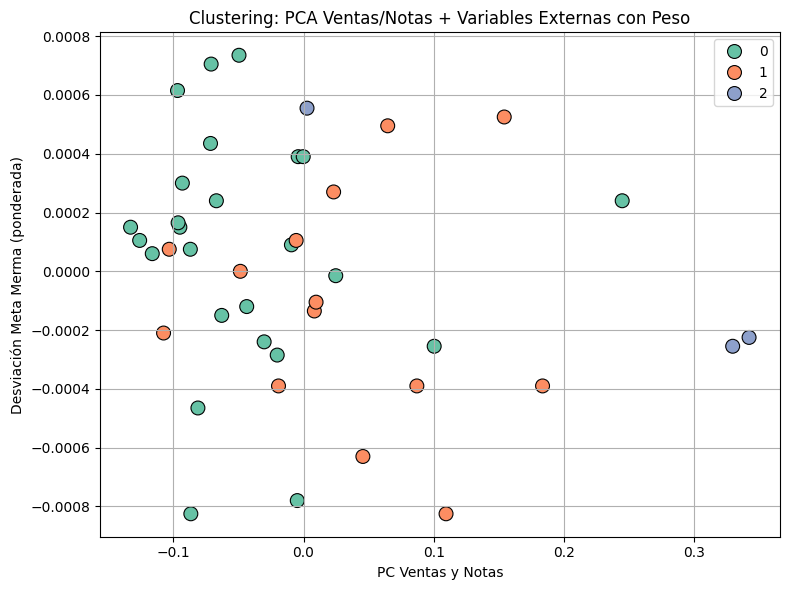

In [ ]:
### Opcional

# === Cargar DataFrame ===
df_kmeans_pesos_v2 = pd.read_excel("Df_Kmeans_2025.xlsx")

# === Definir variables PCA y externas ===
vars_pca_v2 = ['Total_Ventas', 'Total_Notas_Credito']
vars_ext_v2 = [
    'Total_Reclamos',
    'Desviacion_Meta_Merma',
    'N° Accidentes',
    'Costo_Merma_Destruccion',
    'Productos_Dañados_Descuento'
]

pesos_ext_v2 = {
    'Total_Reclamos': 0.10,
    'Desviacion_Meta_Merma': 0.15,
    'N° Accidentes': 0.10,
    'Costo_Merma_Destruccion': 0.15,
    'Productos_Dañados_Descuento': 0.15
}

# === Escalamiento y PCA ===
scaler_pca_v2 = MinMaxScaler()
X_pca_scaled_v2 = scaler_pca_v2.fit_transform(df_kmeans_pesos_v2[vars_pca_v2])

pca_v2 = PCA(n_components=1)
pc_ventas_notas = pca_v2.fit_transform(X_pca_scaled_v2)

df_modelo_pesos_v2 = pd.DataFrame(pc_ventas_notas, columns=['PC_Ventas_Notas'])
df_modelo_pesos_v2['PC_Ventas_Notas'] *= 0.35  # peso combinado

# === Agregar variables externas con pesos ===
for var in vars_ext_v2:
    df_modelo_pesos_v2[var] = df_kmeans_pesos_v2[var] * pesos_ext_v2[var]

# === Aplicar KMeans ===
modelo_kmeans_v2 = KMeans(n_clusters=3, random_state=100)
clusters_v2 = modelo_kmeans_v2.fit_predict(df_modelo_pesos_v2)
df_kmeans_pesos_v2['Cluster_PCA_Pesos'] = clusters_v2

# === Calcular Silhouette Score ===
silhouette_v2 = silhouette_score(df_modelo_pesos_v2, clusters_v2)
print(f"Silhouette Score Propuesta PCA+Pesos: {silhouette_v2:.4f}")

# === Test de Medias ===
resultados_test_medias_v2 = []
for var in vars_pca_v2 + vars_ext_v2:
    grupos = [grupo[var].values for _, grupo in df_kmeans_pesos_v2.groupby('Cluster_PCA_Pesos')]
    stat, p_valor = f_oneway(*grupos)
    resultados_test_medias_v2.append({
        'Variable': var,
        'p-valor': round(p_valor, 4),
        'Significativo': p_valor < 0.05
    })

df_test_medias_v2 = pd.DataFrame(resultados_test_medias_v2)
print(df_test_medias_v2)

# === Visualización ===
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_modelo_pesos_v2['PC_Ventas_Notas'],
    y=df_modelo_pesos_v2['Desviacion_Meta_Merma'],
    hue=clusters_v2,
    palette='Set2',
    s=100,
    edgecolor='black'
)
plt.title('Clustering: PCA Ventas/Notas + Variables Externas con Peso')
plt.xlabel('PC Ventas y Notas')
plt.ylabel('Desviación Meta Merma (ponderada)')
plt.grid(True)
plt.tight_layout()
plt.show()
